<a href="https://colab.research.google.com/github/ShivaP69/Investigation_bias_deepCOVID/blob/main/EditedCovid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import os
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle                                          
import cv2
import sys
from tqdm import tqdm, tqdm_notebook, tnrange
import matplotlib.pyplot as plt
plt.style.use("ggplot")

from skimage.transform import resize
from skimage import morphology
from skimage.io import imread
from sklearn.model_selection import train_test_split

from keras.layers import Input
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from keras.preprocessing.image import  img_to_array
from keras.models import Model
from keras.layers import  BatchNormalization, Activation, Dropout
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('fivethirtyeight')
import pickle 
import os 
import numpy as np
import cv2 
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers

from tensorflow.keras.models import Model

In [ ]:
#classes = ['covid', 'non_covid'] if use ransom shuffel or patient wise data sets
classes=['Covid_images','non_COVID_images']

In [ ]:
def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    
    return int(parts[-2] == classes)

In [ ]:
IMAGE_SIZE = [224, 224]
def decode_img(img):
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img= tf.cast(img,tf.float32) * 1/255
    return tf.image.resize(img, IMAGE_SIZE)

In [ ]:
def process_path(file_path):
    label = get_label(file_path)
    
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img, label

In [ ]:
def dataset_to_numpy_util(dataset, N):
    dataset = dataset.unbatch().batch(N)
    for images, labels in dataset:
        numpy_images = images.numpy()
        numpy_labels = labels.numpy()
        break
    return numpy_images, numpy_labels

In [ ]:
def dataset_to_numpy_util(dataset, N):
    dataset = dataset.unbatch().batch(N)
    for images, labels in dataset:
        numpy_images = images.numpy()
        numpy_labels = labels.numpy()
        break
    return numpy_images, numpy_labels

In [ ]:

%cd '/content/drive/MyDrive/Colab Notebooks/DEEPCOVID/'
path = '/content/drive/MyDrive/covid/'

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/DEEPCOVID/'
/content


In [ ]:
path='/content/drive/MyDrive/covid_images'
path_train = os.path.join(path, 'train' )
path_test=os.path.join(path,'test')
path_val= os.path.join(path,'val')

In [ ]:
train_sample,_ = train_generator[0]

In [ ]:
train = {}
test = {}
val={}
for i in os.listdir(path_train):
    train[i] = os.listdir(os.path.join(path_train, i))
for i in os.listdir(path_test):
    test[i] = os.listdir(os.path.join(path_test, i))
for i in os.listdir(path_val):
  val[i] = os.listdir(os.path.join(path_val, i))

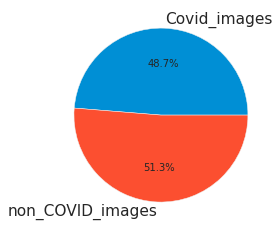

In [ ]:
fig, ax = plt.subplots()
ax.pie(
    [len(train[item]) for item in train],
    labels = train.keys(),
    autopct = "%1.1f%%"
)
fig.show()

In [ ]:
x,y=[len(train[item]) for item in train]

In [ ]:
x

2945

In [ ]:
y

3100

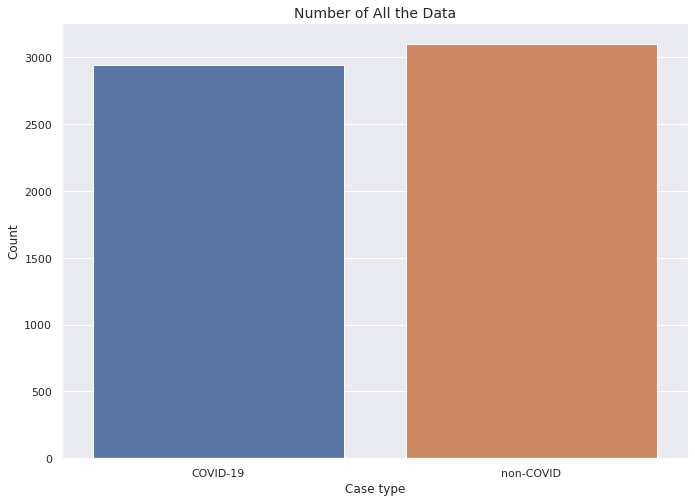

       Cases  Cases_count
0   COVID-19         2945
1  non-COVID         3100


In [ ]:
data = {'Cases':['COVID-19', 'non-COVID'],
        'Cases_count':[x, y]
       }

df = pd.DataFrame(data)

sns.set(style="darkgrid")
plt.figure(figsize=(10,8))
sns.barplot(x=df.index, y= df['Cases_count'].values)
plt.title('Number of All the Data', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(df.index)), ['COVID-19', 'non-COVID'])
plt.show()

print(df)

In [ ]:
# GGO two side


ids_covid = np.sort(next(os.walk(path+'COVID/' ))[1])       #folder name
print('number of COVID cases:', len(ids_covid))
############
df = pd.read_excel(path+'demoghraphic data/DEMOGRAPHIC DATA_final.xlsx')
# for i in range(len(df['file_number'])):
#     df['file_number'][i]= 'S'+ str(int(df['file_number'][i]))

sys.stdout.flush()
GGO=0
COVID=np.zeros((1, 224, 224,1), dtype=np.float32)
for id_ in ids_covid:
  
    ids=next(os.walk(path + 'COVID/'+id_))[2]                 #image name
    a=df.loc[df['file_number']==id_,'Patient number'].to_string()
    a=a[-4:]
    df1 = pd.read_excel(path+'demoghraphic data/'+a+'.xlsx')   #excel file for each patient
    df1 = df1.fillna(0)
    b=df1.loc[(df1['RT-GGO']==1) & (df1['LT-GGO']==1),'image number'].array
    b=shuffle(b)
    L=25
    if len(b)<25:
      L=len(b)
    b=b[:L]
    print("len b : ", len(b))
    directory= '/content/drive/MyDrive/two_sided_ggo/two_sided'
    for n,id1 in tqdm(enumerate(b), total=len(b)): 
    
         img = cv2.imread(path+'COVID/'+id_+'/'+id1+'.jpg') 
         os.chdir(directory)
      
          # List files and directories  
          # in 'C:/Users/Rajnish/Desktop/GeeksforGeeks'  
            
            
          # Filename
         filename = id1+'.jpg'
         if os.path.isfile(filename):
              print ("File exist")
              
         else:
           cv2.imwrite(filename, img)  
            
            
          # Using cv2.imwrite() method
          # Saving the image
         #cv2.imwrite(filename, img)
   





number of COVID cases: 178
len b :  25


  4%|▍         | 1/25 [00:05<02:05,  5.23s/it]

File exist


  8%|▊         | 2/25 [00:05<00:54,  2.35s/it]

File exist


 16%|█▌        | 4/25 [00:06<00:21,  1.02s/it]

File exist


 24%|██▍       | 6/25 [00:07<00:12,  1.58it/s]

File exist


 28%|██▊       | 7/25 [00:07<00:09,  1.97it/s]

File exist


 32%|███▏      | 8/25 [00:07<00:07,  2.29it/s]

File exist


 36%|███▌      | 9/25 [00:07<00:06,  2.50it/s]

File exist


 40%|████      | 10/25 [00:08<00:05,  2.75it/s]

File exist


 44%|████▍     | 11/25 [00:08<00:04,  2.93it/s]

File exist


 52%|█████▏    | 13/25 [00:09<00:04,  2.87it/s]

File exist


 56%|█████▌    | 14/25 [00:09<00:04,  2.66it/s]

File exist


 68%|██████▊   | 17/25 [00:10<00:02,  2.75it/s]

File exist


 72%|███████▏  | 18/25 [00:11<00:02,  2.78it/s]

File exist


 84%|████████▍ | 21/25 [00:12<00:01,  2.59it/s]

File exist


 96%|█████████▌| 24/25 [00:13<00:00,  2.94it/s]

File exist


100%|██████████| 25/25 [00:13<00:00,  1.85it/s]


len b :  25


  4%|▍         | 1/25 [00:00<00:07,  3.09it/s]

File exist


  8%|▊         | 2/25 [00:00<00:07,  3.05it/s]

File exist


 12%|█▏        | 3/25 [00:00<00:06,  3.40it/s]

File exist


 16%|█▌        | 4/25 [00:01<00:06,  3.28it/s]

File exist


 20%|██        | 5/25 [00:01<00:06,  3.26it/s]

File exist


 24%|██▍       | 6/25 [00:01<00:06,  3.13it/s]

File exist


 28%|██▊       | 7/25 [00:02<00:06,  2.96it/s]

File exist


 32%|███▏      | 8/25 [00:02<00:05,  2.93it/s]

File exist


 36%|███▌      | 9/25 [00:02<00:05,  2.86it/s]

File exist


 40%|████      | 10/25 [00:03<00:05,  2.97it/s]

File exist


 44%|████▍     | 11/25 [00:03<00:04,  3.01it/s]

File exist


 48%|████▊     | 12/25 [00:03<00:04,  2.97it/s]

File exist


 52%|█████▏    | 13/25 [00:04<00:03,  3.04it/s]

File exist


 56%|█████▌    | 14/25 [00:04<00:03,  3.18it/s]

File exist


 60%|██████    | 15/25 [00:04<00:03,  2.95it/s]

File exist


 64%|██████▍   | 16/25 [00:05<00:03,  2.83it/s]

File exist


 68%|██████▊   | 17/25 [00:05<00:03,  2.37it/s]

File exist


 72%|███████▏  | 18/25 [00:06<00:02,  2.57it/s]

File exist


 76%|███████▌  | 19/25 [00:06<00:02,  2.78it/s]

File exist


 80%|████████  | 20/25 [00:06<00:01,  3.09it/s]

File exist


 84%|████████▍ | 21/25 [00:07<00:01,  3.10it/s]

File exist


 88%|████████▊ | 22/25 [00:07<00:00,  3.00it/s]

File exist


 92%|█████████▏| 23/25 [00:07<00:00,  3.18it/s]

File exist


 96%|█████████▌| 24/25 [00:07<00:00,  3.49it/s]

File exist


100%|██████████| 25/25 [00:08<00:00,  3.01it/s]

File exist


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  8


 12%|█▎        | 1/8 [00:00<00:03,  1.98it/s]

File exist


 25%|██▌       | 2/8 [00:00<00:02,  2.34it/s]

File exist


 38%|███▊      | 3/8 [00:01<00:01,  2.62it/s]

File exist


 50%|█████     | 4/8 [00:01<00:01,  2.87it/s]

File exist


 62%|██████▎   | 5/8 [00:01<00:01,  2.98it/s]

File exist


 75%|███████▌  | 6/8 [00:02<00:00,  3.20it/s]

File exist


 88%|████████▊ | 7/8 [00:02<00:00,  3.11it/s]

File exist


100%|██████████| 8/8 [00:02<00:00,  2.87it/s]

File exist


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  25


  8%|▊         | 2/25 [00:00<00:07,  3.13it/s]

File exist


 12%|█▏        | 3/25 [00:00<00:06,  3.26it/s]

File exist


 16%|█▌        | 4/25 [00:01<00:06,  3.16it/s]

File exist


 48%|████▊     | 12/25 [00:03<00:04,  2.98it/s]

File exist


100%|██████████| 25/25 [00:08<00:00,  2.97it/s]


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  25


 12%|█▏        | 3/25 [00:00<00:06,  3.20it/s]

File exist


 16%|█▌        | 4/25 [00:01<00:06,  3.23it/s]

File exist


 20%|██        | 5/25 [00:01<00:06,  3.29it/s]

File exist


 28%|██▊       | 7/25 [00:02<00:05,  3.31it/s]

File exist


 36%|███▌      | 9/25 [00:02<00:04,  3.62it/s]

File exist
File exist


 40%|████      | 10/25 [00:03<00:04,  3.46it/s]

File exist


 44%|████▍     | 11/25 [00:03<00:04,  2.99it/s]

File exist


 48%|████▊     | 12/25 [00:03<00:04,  3.08it/s]

File exist


 56%|█████▌    | 14/25 [00:04<00:03,  3.08it/s]

File exist


 60%|██████    | 15/25 [00:04<00:02,  3.42it/s]

File exist


 64%|██████▍   | 16/25 [00:04<00:02,  3.61it/s]

File exist


 72%|███████▏  | 18/25 [00:05<00:02,  3.25it/s]

File exist


 76%|███████▌  | 19/25 [00:05<00:01,  3.33it/s]

File exist


 92%|█████████▏| 23/25 [00:07<00:00,  3.37it/s]

File exist


100%|██████████| 25/25 [00:07<00:00,  3.31it/s]


File exist
len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  25


 16%|█▌        | 4/25 [00:01<00:07,  2.94it/s]

File exist


 20%|██        | 5/25 [00:01<00:06,  2.91it/s]

File exist


 32%|███▏      | 8/25 [00:02<00:05,  2.91it/s]

File exist


 36%|███▌      | 9/25 [00:03<00:05,  2.94it/s]

File exist


 40%|████      | 10/25 [00:03<00:04,  3.12it/s]

File exist


 48%|████▊     | 12/25 [00:04<00:04,  3.09it/s]

File exist


 52%|█████▏    | 13/25 [00:04<00:03,  3.10it/s]

File exist


 56%|█████▌    | 14/25 [00:04<00:03,  3.01it/s]

File exist


 60%|██████    | 15/25 [00:05<00:03,  3.02it/s]

File exist


 64%|██████▍   | 16/25 [00:05<00:02,  3.09it/s]

File exist


 76%|███████▌  | 19/25 [00:06<00:01,  3.04it/s]

File exist


 80%|████████  | 20/25 [00:06<00:02,  2.41it/s]

File exist


 84%|████████▍ | 21/25 [00:07<00:01,  2.60it/s]

File exist


 88%|████████▊ | 22/25 [00:07<00:01,  2.76it/s]

File exist


100%|██████████| 25/25 [00:08<00:00,  2.80it/s]


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  25


  4%|▍         | 1/25 [00:00<00:08,  3.00it/s]

File exist


  8%|▊         | 2/25 [00:00<00:05,  3.85it/s]

File exist


 28%|██▊       | 7/25 [00:01<00:05,  3.48it/s]

File exist


 44%|████▍     | 11/25 [00:03<00:04,  2.93it/s]

File exist


 56%|█████▌    | 14/25 [00:04<00:03,  3.23it/s]

File exist


 68%|██████▊   | 17/25 [00:05<00:02,  3.55it/s]

File exist


 84%|████████▍ | 21/25 [00:06<00:01,  3.14it/s]

File exist


 88%|████████▊ | 22/25 [00:06<00:00,  3.41it/s]

File exist


 96%|█████████▌| 24/25 [00:07<00:00,  2.85it/s]

File exist


100%|██████████| 25/25 [00:07<00:00,  3.18it/s]


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  9


 11%|█         | 1/9 [00:00<00:02,  3.38it/s]

File exist


 22%|██▏       | 2/9 [00:00<00:02,  3.18it/s]

File exist


 33%|███▎      | 3/9 [00:00<00:01,  3.28it/s]

File exist


 44%|████▍     | 4/9 [00:01<00:01,  3.19it/s]

File exist


 56%|█████▌    | 5/9 [00:01<00:01,  3.26it/s]

File exist


 67%|██████▋   | 6/9 [00:01<00:00,  3.38it/s]

File exist


 78%|███████▊  | 7/9 [00:02<00:00,  3.38it/s]

File exist


 89%|████████▉ | 8/9 [00:02<00:00,  3.41it/s]

File exist


100%|██████████| 9/9 [00:02<00:00,  3.31it/s]

File exist


len b :  25


 12%|█▏        | 3/25 [00:00<00:07,  3.03it/s]

File exist


 20%|██        | 5/25 [00:01<00:06,  3.09it/s]

File exist


 24%|██▍       | 6/25 [00:01<00:06,  3.14it/s]

File exist


 92%|█████████▏| 23/25 [00:07<00:00,  3.15it/s]

File exist


100%|██████████| 25/25 [00:07<00:00,  3.15it/s]

File exist


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  25


 20%|██        | 5/25 [00:01<00:06,  3.32it/s]

File exist


 44%|████▍     | 11/25 [00:03<00:04,  3.27it/s]

File exist


 56%|█████▌    | 14/25 [00:04<00:03,  3.15it/s]

File exist


 68%|██████▊   | 17/25 [00:05<00:02,  3.90it/s]

File exist
File exist


 72%|███████▏  | 18/25 [00:05<00:01,  3.53it/s]

File exist


 92%|█████████▏| 23/25 [00:06<00:00,  3.17it/s]

File exist


 96%|█████████▌| 24/25 [00:07<00:00,  3.17it/s]

File exist


100%|██████████| 25/25 [00:07<00:00,  3.33it/s]


len b :  25


  4%|▍         | 1/25 [00:00<00:05,  4.41it/s]

File exist


 24%|██▍       | 6/25 [00:01<00:05,  3.17it/s]

File exist


 84%|████████▍ | 21/25 [00:06<00:01,  3.06it/s]

File exist


 88%|████████▊ | 22/25 [00:06<00:00,  3.40it/s]

File exist


 96%|█████████▌| 24/25 [00:07<00:00,  3.36it/s]

File exist


100%|██████████| 25/25 [00:07<00:00,  3.16it/s]


len b :  25


  4%|▍         | 1/25 [00:00<00:05,  4.47it/s]

File exist


 16%|█▌        | 4/25 [00:01<00:06,  3.12it/s]

File exist


 20%|██        | 5/25 [00:01<00:06,  3.20it/s]

File exist


 36%|███▌      | 9/25 [00:02<00:05,  3.03it/s]

File exist


 40%|████      | 10/25 [00:03<00:04,  3.03it/s]

File exist


 44%|████▍     | 11/25 [00:03<00:04,  3.06it/s]

File exist


 56%|█████▌    | 14/25 [00:05<00:05,  2.13it/s]

File exist


 64%|██████▍   | 16/25 [00:05<00:03,  2.83it/s]

File exist


 80%|████████  | 20/25 [00:06<00:01,  2.99it/s]

File exist


 96%|█████████▌| 24/25 [00:08<00:00,  3.00it/s]

File exist


100%|██████████| 25/25 [00:08<00:00,  2.88it/s]


len b :  14


  7%|▋         | 1/14 [00:00<00:03,  3.53it/s]

File exist


 14%|█▍        | 2/14 [00:00<00:04,  2.52it/s]

File exist


 21%|██▏       | 3/14 [00:01<00:03,  2.79it/s]

File exist


 29%|██▊       | 4/14 [00:01<00:03,  2.85it/s]

File exist


 36%|███▌      | 5/14 [00:01<00:03,  2.99it/s]

File exist


 43%|████▎     | 6/14 [00:02<00:02,  3.11it/s]

File exist


 50%|█████     | 7/14 [00:02<00:02,  3.12it/s]

File exist


 57%|█████▋    | 8/14 [00:02<00:01,  3.20it/s]

File exist


 64%|██████▍   | 9/14 [00:02<00:01,  3.26it/s]

File exist


 71%|███████▏  | 10/14 [00:03<00:01,  3.12it/s]

File exist


 79%|███████▊  | 11/14 [00:03<00:00,  3.16it/s]

File exist


 86%|████████▌ | 12/14 [00:03<00:00,  3.26it/s]

File exist


 93%|█████████▎| 13/14 [00:04<00:00,  3.26it/s]

File exist


100%|██████████| 14/14 [00:04<00:00,  3.12it/s]

File exist


len b :  25


  8%|▊         | 2/25 [00:00<00:06,  3.61it/s]

File exist


100%|██████████| 25/25 [00:07<00:00,  3.14it/s]


len b :  25


 32%|███▏      | 8/25 [00:02<00:04,  3.62it/s]

File exist


 52%|█████▏    | 13/25 [00:04<00:03,  3.21it/s]

File exist


 60%|██████    | 15/25 [00:04<00:02,  3.44it/s]

File exist


 68%|██████▊   | 17/25 [00:05<00:02,  3.51it/s]

File exist


 84%|████████▍ | 21/25 [00:06<00:01,  3.20it/s]

File exist


100%|██████████| 25/25 [00:07<00:00,  3.16it/s]


len b :  25


 12%|█▏        | 3/25 [00:00<00:07,  3.04it/s]

File exist


 20%|██        | 5/25 [00:01<00:06,  3.00it/s]

File exist


 28%|██▊       | 7/25 [00:02<00:05,  3.37it/s]

File exist


 36%|███▌      | 9/25 [00:02<00:04,  4.00it/s]

File exist


 48%|████▊     | 12/25 [00:03<00:03,  3.41it/s]

File exist


 52%|█████▏    | 13/25 [00:03<00:03,  3.33it/s]

File exist


 64%|██████▍   | 16/25 [00:04<00:02,  3.24it/s]

File exist


 72%|███████▏  | 18/25 [00:05<00:02,  3.26it/s]

File exist


 84%|████████▍ | 21/25 [00:06<00:01,  2.91it/s]

File exist


100%|██████████| 25/25 [00:07<00:00,  3.21it/s]

File exist


len b :  0


0it [00:00, ?it/s]


len b :  25


  4%|▍         | 1/25 [00:00<00:05,  4.41it/s]

File exist


  8%|▊         | 2/25 [00:00<00:06,  3.69it/s]

File exist


 16%|█▌        | 4/25 [00:01<00:05,  3.52it/s]

File exist


 28%|██▊       | 7/25 [00:01<00:04,  3.61it/s]

File exist


 32%|███▏      | 8/25 [00:02<00:04,  3.54it/s]

File exist


 36%|███▌      | 9/25 [00:02<00:04,  3.77it/s]

File exist


 40%|████      | 10/25 [00:02<00:04,  3.69it/s]

File exist


 48%|████▊     | 12/25 [00:03<00:03,  4.17it/s]

File exist
File exist


 52%|█████▏    | 13/25 [00:03<00:03,  3.65it/s]

File exist


 56%|█████▌    | 14/25 [00:03<00:03,  3.64it/s]

File exist


 60%|██████    | 15/25 [00:04<00:02,  3.65it/s]

File exist


 68%|██████▊   | 17/25 [00:04<00:02,  3.80it/s]

File exist


 72%|███████▏  | 18/25 [00:04<00:01,  3.91it/s]

File exist


 76%|███████▌  | 19/25 [00:05<00:01,  3.69it/s]

File exist


 88%|████████▊ | 22/25 [00:06<00:00,  3.52it/s]

File exist


 96%|█████████▌| 24/25 [00:06<00:00,  3.41it/s]

File exist


100%|██████████| 25/25 [00:06<00:00,  3.57it/s]

File exist


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  15


  7%|▋         | 1/15 [00:00<00:05,  2.79it/s]

File exist


 13%|█▎        | 2/15 [00:00<00:03,  3.56it/s]

File exist


 20%|██        | 3/15 [00:00<00:03,  3.90it/s]

File exist


 33%|███▎      | 5/15 [00:01<00:02,  3.99it/s]

File exist
File exist


 40%|████      | 6/15 [00:01<00:02,  3.72it/s]

File exist


 47%|████▋     | 7/15 [00:01<00:02,  3.96it/s]

File exist


 53%|█████▎    | 8/15 [00:02<00:01,  3.74it/s]

File exist


 60%|██████    | 9/15 [00:02<00:01,  3.57it/s]

File exist


 67%|██████▋   | 10/15 [00:02<00:01,  3.78it/s]

File exist


 73%|███████▎  | 11/15 [00:03<00:01,  3.57it/s]

File exist


 80%|████████  | 12/15 [00:03<00:00,  3.48it/s]

File exist


 87%|████████▋ | 13/15 [00:03<00:00,  3.70it/s]

File exist


 93%|█████████▎| 14/15 [00:03<00:00,  3.50it/s]

File exist


100%|██████████| 15/15 [00:04<00:00,  3.53it/s]

File exist


len b :  25


  4%|▍         | 1/25 [00:00<00:05,  4.71it/s]

File exist


  8%|▊         | 2/25 [00:00<00:06,  3.72it/s]

File exist


 12%|█▏        | 3/25 [00:00<00:05,  4.03it/s]

File exist


 16%|█▌        | 4/25 [00:01<00:05,  3.50it/s]

File exist


 20%|██        | 5/25 [00:01<00:05,  3.74it/s]

File exist


 24%|██▍       | 6/25 [00:01<00:05,  3.62it/s]

File exist


 28%|██▊       | 7/25 [00:01<00:05,  3.40it/s]

File exist


 32%|███▏      | 8/25 [00:02<00:05,  3.25it/s]

File exist


 36%|███▌      | 9/25 [00:02<00:04,  3.56it/s]

File exist


 40%|████      | 10/25 [00:03<00:05,  2.62it/s]

File exist


 44%|████▍     | 11/25 [00:03<00:05,  2.73it/s]

File exist


 56%|█████▌    | 14/25 [00:04<00:03,  3.27it/s]

File exist
File exist


 64%|██████▍   | 16/25 [00:04<00:02,  3.30it/s]

File exist


 72%|███████▏  | 18/25 [00:05<00:02,  3.35it/s]

File exist


 76%|███████▌  | 19/25 [00:05<00:01,  3.20it/s]

File exist


 80%|████████  | 20/25 [00:06<00:01,  3.30it/s]

File exist


 84%|████████▍ | 21/25 [00:06<00:01,  2.81it/s]

File exist


 88%|████████▊ | 22/25 [00:06<00:01,  2.98it/s]

File exist


 92%|█████████▏| 23/25 [00:07<00:00,  3.30it/s]

File exist


 96%|█████████▌| 24/25 [00:07<00:00,  3.25it/s]

File exist


100%|██████████| 25/25 [00:07<00:00,  3.22it/s]

File exist


len b :  0


0it [00:00, ?it/s]


len b :  25


  4%|▍         | 1/25 [00:00<00:04,  4.94it/s]

File exist


  8%|▊         | 2/25 [00:00<00:05,  4.12it/s]

File exist


 16%|█▌        | 4/25 [00:01<00:06,  3.22it/s]

File exist


 36%|███▌      | 9/25 [00:02<00:05,  3.09it/s]

File exist


 40%|████      | 10/25 [00:03<00:04,  3.11it/s]

File exist


 44%|████▍     | 11/25 [00:03<00:04,  3.21it/s]

File exist


 56%|█████▌    | 14/25 [00:04<00:03,  3.15it/s]

File exist


 60%|██████    | 15/25 [00:04<00:03,  3.20it/s]

File exist


 64%|██████▍   | 16/25 [00:05<00:02,  3.31it/s]

File exist


 68%|██████▊   | 17/25 [00:05<00:02,  3.54it/s]

File exist


 72%|███████▏  | 18/25 [00:05<00:02,  3.17it/s]

File exist


 84%|████████▍ | 21/25 [00:06<00:01,  3.43it/s]

File exist


 92%|█████████▏| 23/25 [00:07<00:00,  3.29it/s]

File exist


 96%|█████████▌| 24/25 [00:07<00:00,  3.28it/s]

File exist


100%|██████████| 25/25 [00:07<00:00,  3.18it/s]


len b :  25


  8%|▊         | 2/25 [00:00<00:06,  3.29it/s]

File exist


 12%|█▏        | 3/25 [00:00<00:06,  3.26it/s]

File exist


 16%|█▌        | 4/25 [00:01<00:06,  3.11it/s]

File exist


 20%|██        | 5/25 [00:01<00:06,  3.10it/s]

File exist


 24%|██▍       | 6/25 [00:01<00:06,  3.12it/s]

File exist


 28%|██▊       | 7/25 [00:02<00:05,  3.21it/s]

File exist


 32%|███▏      | 8/25 [00:02<00:06,  2.48it/s]

File exist


 36%|███▌      | 9/25 [00:03<00:05,  2.67it/s]

File exist


 40%|████      | 10/25 [00:03<00:04,  3.04it/s]

File exist


 44%|████▍     | 11/25 [00:03<00:04,  3.07it/s]

File exist


 52%|█████▏    | 13/25 [00:04<00:03,  3.28it/s]

File exist


 60%|██████    | 15/25 [00:04<00:03,  3.19it/s]

File exist


 72%|███████▏  | 18/25 [00:05<00:02,  3.16it/s]

File exist


 80%|████████  | 20/25 [00:06<00:01,  3.33it/s]

File exist


 88%|████████▊ | 22/25 [00:06<00:00,  3.43it/s]

File exist


 92%|█████████▏| 23/25 [00:07<00:00,  3.47it/s]

File exist


 96%|█████████▌| 24/25 [00:09<00:01,  1.00s/it]

File exist


100%|██████████| 25/25 [00:10<00:00,  2.46it/s]

File exist


len b :  0


0it [00:00, ?it/s]


len b :  25


  4%|▍         | 1/25 [00:00<00:07,  3.33it/s]

File exist


  8%|▊         | 2/25 [00:00<00:07,  3.27it/s]

File exist


 16%|█▌        | 4/25 [00:01<00:06,  3.30it/s]

File exist


 40%|████      | 10/25 [00:03<00:05,  2.54it/s]

File exist


 60%|██████    | 15/25 [00:05<00:03,  3.05it/s]

File exist


100%|██████████| 25/25 [00:08<00:00,  2.91it/s]

File exist


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  25


 20%|██        | 5/25 [00:01<00:06,  3.13it/s]

File exist


 24%|██▍       | 6/25 [00:01<00:05,  3.24it/s]

File exist


 36%|███▌      | 9/25 [00:02<00:05,  3.12it/s]

File exist


 40%|████      | 10/25 [00:03<00:04,  3.07it/s]

File exist


 52%|█████▏    | 13/25 [00:04<00:03,  3.21it/s]

File exist


 60%|██████    | 15/25 [00:04<00:03,  3.14it/s]

File exist


 64%|██████▍   | 16/25 [00:05<00:03,  2.89it/s]

File exist


 84%|████████▍ | 21/25 [00:06<00:01,  3.30it/s]

File exist


 88%|████████▊ | 22/25 [00:07<00:00,  3.31it/s]

File exist


 96%|█████████▌| 24/25 [00:07<00:00,  3.52it/s]

File exist


100%|██████████| 25/25 [00:07<00:00,  3.16it/s]


len b :  25


  4%|▍         | 1/25 [00:00<00:07,  3.01it/s]

File exist


  8%|▊         | 2/25 [00:00<00:07,  3.18it/s]

File exist


 12%|█▏        | 3/25 [00:00<00:06,  3.23it/s]

File exist


 20%|██        | 5/25 [00:01<00:06,  2.92it/s]

File exist


 24%|██▍       | 6/25 [00:01<00:05,  3.37it/s]

File exist


 28%|██▊       | 7/25 [00:02<00:05,  3.40it/s]

File exist


 32%|███▏      | 8/25 [00:02<00:05,  3.40it/s]

File exist


 40%|████      | 10/25 [00:03<00:04,  3.10it/s]

File exist


 44%|████▍     | 11/25 [00:03<00:04,  3.48it/s]

File exist


 52%|█████▏    | 13/25 [00:04<00:03,  3.37it/s]

File exist


 56%|█████▌    | 14/25 [00:04<00:02,  3.68it/s]

File exist


 60%|██████    | 15/25 [00:04<00:02,  3.57it/s]

File exist


 64%|██████▍   | 16/25 [00:04<00:02,  3.88it/s]

File exist


 68%|██████▊   | 17/25 [00:05<00:02,  3.31it/s]

File exist


 72%|███████▏  | 18/25 [00:05<00:01,  3.58it/s]

File exist


 76%|███████▌  | 19/25 [00:05<00:01,  3.46it/s]

File exist


 80%|████████  | 20/25 [00:05<00:01,  3.43it/s]

File exist


 84%|████████▍ | 21/25 [00:06<00:01,  3.72it/s]

File exist


 88%|████████▊ | 22/25 [00:06<00:00,  3.95it/s]

File exist


 92%|█████████▏| 23/25 [00:06<00:00,  3.64it/s]

File exist


 96%|█████████▌| 24/25 [00:06<00:00,  3.79it/s]

File exist


100%|██████████| 25/25 [00:07<00:00,  3.45it/s]

File exist


len b :  0


0it [00:00, ?it/s]


len b :  25


  8%|▊         | 2/25 [00:00<00:06,  3.70it/s]

File exist


 24%|██▍       | 6/25 [00:01<00:06,  3.14it/s]

File exist


 28%|██▊       | 7/25 [00:02<00:06,  2.96it/s]

File exist


 40%|████      | 10/25 [00:03<00:04,  3.27it/s]

File exist


 44%|████▍     | 11/25 [00:03<00:04,  3.25it/s]

File exist


 64%|██████▍   | 16/25 [00:04<00:02,  3.90it/s]

File exist


 80%|████████  | 20/25 [00:06<00:01,  3.05it/s]

File exist


 88%|████████▊ | 22/25 [00:06<00:01,  2.96it/s]

File exist


100%|██████████| 25/25 [00:07<00:00,  3.23it/s]

File exist


len b :  17


  6%|▌         | 1/17 [00:00<00:04,  3.28it/s]

File exist


 12%|█▏        | 2/17 [00:00<00:03,  3.90it/s]

File exist


 18%|█▊        | 3/17 [00:00<00:03,  4.09it/s]

File exist


 24%|██▎       | 4/17 [00:01<00:03,  3.71it/s]

File exist


 29%|██▉       | 5/17 [00:01<00:03,  3.30it/s]

File exist


 35%|███▌      | 6/17 [00:01<00:03,  3.15it/s]

File exist


 41%|████      | 7/17 [00:02<00:02,  3.39it/s]

File exist


 47%|████▋     | 8/17 [00:02<00:02,  3.60it/s]

File exist


 53%|█████▎    | 9/17 [00:02<00:02,  3.74it/s]

File exist


 59%|█████▉    | 10/17 [00:02<00:01,  3.94it/s]

File exist


 65%|██████▍   | 11/17 [00:03<00:01,  3.75it/s]

File exist


 71%|███████   | 12/17 [00:03<00:01,  3.57it/s]

File exist


 76%|███████▋  | 13/17 [00:03<00:01,  3.47it/s]

File exist


 82%|████████▏ | 14/17 [00:03<00:00,  3.42it/s]

File exist


 88%|████████▊ | 15/17 [00:04<00:00,  3.35it/s]

File exist


 94%|█████████▍| 16/17 [00:04<00:00,  3.38it/s]

File exist


100%|██████████| 17/17 [00:04<00:00,  3.54it/s]

File exist


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  25


 12%|█▏        | 3/25 [00:00<00:07,  3.12it/s]

File exist


 16%|█▌        | 4/25 [00:01<00:06,  3.40it/s]

File exist


 20%|██        | 5/25 [00:01<00:05,  3.71it/s]

File exist


 24%|██▍       | 6/25 [00:01<00:05,  3.39it/s]

File exist


 28%|██▊       | 7/25 [00:02<00:05,  3.37it/s]

File exist


 36%|███▌      | 9/25 [00:02<00:05,  3.10it/s]

File exist


 40%|████      | 10/25 [00:03<00:04,  3.05it/s]

File exist


 48%|████▊     | 12/25 [00:03<00:04,  3.18it/s]

File exist


100%|██████████| 25/25 [00:07<00:00,  3.19it/s]

File exist


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  5


 20%|██        | 1/5 [00:00<00:00,  4.48it/s]

File exist


 40%|████      | 2/5 [00:00<00:00,  4.53it/s]

File exist


 60%|██████    | 3/5 [00:00<00:00,  4.34it/s]

File exist


 80%|████████  | 4/5 [00:01<00:00,  3.70it/s]

File exist


100%|██████████| 5/5 [00:01<00:00,  4.05it/s]

File exist


len b :  25


  8%|▊         | 2/25 [00:00<00:07,  3.07it/s]

File exist


 52%|█████▏    | 13/25 [00:04<00:03,  3.43it/s]

File exist


 80%|████████  | 20/25 [00:06<00:01,  3.35it/s]

File exist


100%|██████████| 25/25 [00:07<00:00,  3.29it/s]


len b :  12


  8%|▊         | 1/12 [00:00<00:03,  3.28it/s]

File exist


 17%|█▋        | 2/12 [00:00<00:03,  3.24it/s]

File exist


 25%|██▌       | 3/12 [00:00<00:02,  3.18it/s]

File exist


 42%|████▏     | 5/12 [00:01<00:01,  3.75it/s]

File exist
File exist


 50%|█████     | 6/12 [00:02<00:02,  2.64it/s]

File exist


 58%|█████▊    | 7/12 [00:02<00:01,  2.81it/s]

File exist


 75%|███████▌  | 9/12 [00:02<00:00,  3.42it/s]

File exist
File exist


 92%|█████████▏| 11/12 [00:03<00:00,  3.92it/s]

File exist
File exist


100%|██████████| 12/12 [00:03<00:00,  3.47it/s]


File exist
len b :  25


  4%|▍         | 1/25 [00:00<00:05,  4.54it/s]

File exist


  8%|▊         | 2/25 [00:00<00:05,  4.45it/s]

File exist


 12%|█▏        | 3/25 [00:00<00:05,  3.74it/s]

File exist


 16%|█▌        | 4/25 [00:01<00:06,  3.50it/s]

File exist


 20%|██        | 5/25 [00:01<00:05,  3.34it/s]

File exist


 28%|██▊       | 7/25 [00:02<00:05,  3.20it/s]

File exist


 32%|███▏      | 8/25 [00:02<00:04,  3.52it/s]

File exist


 36%|███▌      | 9/25 [00:02<00:04,  3.83it/s]

File exist


 40%|████      | 10/25 [00:02<00:04,  3.60it/s]

File exist


 44%|████▍     | 11/25 [00:03<00:03,  3.82it/s]

File exist


 48%|████▊     | 12/25 [00:03<00:03,  3.71it/s]

File exist


 52%|█████▏    | 13/25 [00:03<00:03,  3.39it/s]

File exist


 60%|██████    | 15/25 [00:04<00:02,  3.56it/s]

File exist


 68%|██████▊   | 17/25 [00:04<00:02,  3.45it/s]

File exist


 72%|███████▏  | 18/25 [00:05<00:02,  3.38it/s]

File exist


 76%|███████▌  | 19/25 [00:05<00:01,  3.23it/s]

File exist


 80%|████████  | 20/25 [00:05<00:01,  3.24it/s]

File exist


 84%|████████▍ | 21/25 [00:06<00:01,  3.20it/s]

File exist


 92%|█████████▏| 23/25 [00:06<00:00,  3.78it/s]

File exist


 96%|█████████▌| 24/25 [00:06<00:00,  3.55it/s]

File exist


100%|██████████| 25/25 [00:07<00:00,  3.49it/s]

File exist


len b :  25


 12%|█▏        | 3/25 [00:00<00:06,  3.44it/s]

File exist


 20%|██        | 5/25 [00:01<00:06,  3.20it/s]

File exist


 52%|█████▏    | 13/25 [00:03<00:03,  3.43it/s]

File exist


 68%|██████▊   | 17/25 [00:04<00:02,  3.74it/s]

File exist


 80%|████████  | 20/25 [00:05<00:01,  3.48it/s]

File exist


 84%|████████▍ | 21/25 [00:06<00:01,  3.73it/s]

File exist


 96%|█████████▌| 24/25 [00:06<00:00,  3.60it/s]

File exist


100%|██████████| 25/25 [00:07<00:00,  3.49it/s]


len b :  25


 32%|███▏      | 8/25 [00:02<00:05,  3.25it/s]

File exist


100%|██████████| 25/25 [00:08<00:00,  2.96it/s]


len b :  0


0it [00:00, ?it/s]


len b :  25


  4%|▍         | 1/25 [00:00<00:14,  1.62it/s]

File exist


 72%|███████▏  | 18/25 [00:06<00:02,  3.19it/s]

File exist


100%|██████████| 25/25 [00:09<00:00,  2.65it/s]


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  9


 11%|█         | 1/9 [00:00<00:02,  3.39it/s]

File exist


 22%|██▏       | 2/9 [00:00<00:01,  3.52it/s]

File exist


 33%|███▎      | 3/9 [00:00<00:01,  3.36it/s]

File exist


 44%|████▍     | 4/9 [00:01<00:01,  3.25it/s]

File exist


 56%|█████▌    | 5/9 [00:01<00:01,  3.51it/s]

File exist


 67%|██████▋   | 6/9 [00:01<00:00,  3.14it/s]

File exist


 78%|███████▊  | 7/9 [00:02<00:00,  3.15it/s]

File exist


 89%|████████▉ | 8/9 [00:02<00:00,  3.47it/s]

File exist


100%|██████████| 9/9 [00:02<00:00,  3.38it/s]

File exist


len b :  25


 20%|██        | 5/25 [00:01<00:06,  3.15it/s]

File exist


 28%|██▊       | 7/25 [00:02<00:05,  3.12it/s]

File exist


 44%|████▍     | 11/25 [00:03<00:04,  3.09it/s]

File exist


 48%|████▊     | 12/25 [00:03<00:04,  3.13it/s]

File exist


 64%|██████▍   | 16/25 [00:04<00:02,  3.23it/s]

File exist


100%|██████████| 25/25 [00:08<00:00,  3.10it/s]


len b :  25


  4%|▍         | 1/25 [00:00<00:06,  3.56it/s]

File exist


 24%|██▍       | 6/25 [00:01<00:06,  3.11it/s]

File exist


 28%|██▊       | 7/25 [00:02<00:05,  3.12it/s]

File exist


 36%|███▌      | 9/25 [00:02<00:04,  3.49it/s]

File exist
File exist


 40%|████      | 10/25 [00:02<00:03,  3.85it/s]

File exist


 44%|████▍     | 11/25 [00:03<00:03,  3.70it/s]

File exist


 60%|██████    | 15/25 [00:04<00:03,  2.64it/s]

File exist


 64%|██████▍   | 16/25 [00:05<00:02,  3.02it/s]

File exist


 68%|██████▊   | 17/25 [00:05<00:02,  3.35it/s]

File exist


 76%|███████▌  | 19/25 [00:05<00:01,  3.44it/s]

File exist


 84%|████████▍ | 21/25 [00:06<00:01,  3.15it/s]

File exist


 96%|█████████▌| 24/25 [00:07<00:00,  3.34it/s]

File exist


100%|██████████| 25/25 [00:07<00:00,  3.19it/s]


len b :  25


  4%|▍         | 1/25 [00:00<00:07,  3.13it/s]

File exist


 24%|██▍       | 6/25 [00:01<00:06,  3.05it/s]

File exist


 28%|██▊       | 7/25 [00:02<00:05,  3.08it/s]

File exist


 32%|███▏      | 8/25 [00:02<00:05,  3.09it/s]

File exist


 36%|███▌      | 9/25 [00:02<00:05,  3.14it/s]

File exist


100%|██████████| 25/25 [00:08<00:00,  3.05it/s]


len b :  25


  8%|▊         | 2/25 [00:00<00:07,  3.01it/s]

File exist


 64%|██████▍   | 16/25 [00:05<00:03,  2.77it/s]

File exist


100%|██████████| 25/25 [00:08<00:00,  2.94it/s]


len b :  25


  4%|▍         | 1/25 [00:00<00:07,  3.21it/s]

File exist


 36%|███▌      | 9/25 [00:02<00:05,  2.98it/s]

File exist


 40%|████      | 10/25 [00:03<00:04,  3.02it/s]

File exist


 56%|█████▌    | 14/25 [00:04<00:03,  2.85it/s]

File exist


 72%|███████▏  | 18/25 [00:06<00:02,  2.50it/s]

File exist


 92%|█████████▏| 23/25 [00:07<00:00,  3.02it/s]

File exist


100%|██████████| 25/25 [00:08<00:00,  2.95it/s]


len b :  0


0it [00:00, ?it/s]


len b :  25


 12%|█▏        | 3/25 [00:00<00:06,  3.35it/s]

File exist


 20%|██        | 5/25 [00:01<00:05,  3.63it/s]

File exist


 28%|██▊       | 7/25 [00:02<00:04,  3.73it/s]

File exist


 36%|███▌      | 9/25 [00:02<00:04,  3.69it/s]

File exist


 40%|████      | 10/25 [00:02<00:04,  3.46it/s]

File exist


 44%|████▍     | 11/25 [00:03<00:03,  3.59it/s]

File exist


 48%|████▊     | 12/25 [00:03<00:03,  3.54it/s]

File exist


 52%|█████▏    | 13/25 [00:03<00:03,  3.76it/s]

File exist


 60%|██████    | 15/25 [00:04<00:02,  4.01it/s]

File exist
File exist


 64%|██████▍   | 16/25 [00:04<00:02,  3.81it/s]

File exist


 72%|███████▏  | 18/25 [00:05<00:01,  3.75it/s]

File exist
File exist


 76%|███████▌  | 19/25 [00:05<00:01,  3.97it/s]

File exist


 84%|████████▍ | 21/25 [00:05<00:01,  3.18it/s]

File exist


 88%|████████▊ | 22/25 [00:06<00:00,  3.29it/s]

File exist


 92%|█████████▏| 23/25 [00:06<00:00,  3.29it/s]

File exist


 96%|█████████▌| 24/25 [00:06<00:00,  3.46it/s]

File exist


100%|██████████| 25/25 [00:07<00:00,  3.52it/s]

File exist


len b :  25


 20%|██        | 5/25 [00:01<00:06,  3.03it/s]

File exist


 32%|███▏      | 8/25 [00:02<00:05,  3.05it/s]

File exist


 44%|████▍     | 11/25 [00:03<00:04,  3.03it/s]

File exist


 48%|████▊     | 12/25 [00:03<00:04,  3.17it/s]

File exist


 72%|███████▏  | 18/25 [00:06<00:02,  2.91it/s]

File exist


 84%|████████▍ | 21/25 [00:07<00:01,  3.00it/s]

File exist


100%|██████████| 25/25 [00:08<00:00,  2.97it/s]


len b :  25


 16%|█▌        | 4/25 [00:01<00:07,  2.94it/s]

File exist


 48%|████▊     | 12/25 [00:03<00:03,  3.32it/s]

File exist


 80%|████████  | 20/25 [00:06<00:01,  3.38it/s]

File exist


100%|██████████| 25/25 [00:08<00:00,  3.02it/s]


len b :  25


100%|██████████| 25/25 [00:08<00:00,  3.02it/s]


len b :  25


100%|██████████| 25/25 [00:08<00:00,  2.79it/s]


len b :  25


100%|██████████| 25/25 [00:08<00:00,  2.91it/s]


len b :  0


0it [00:00, ?it/s]


len b :  25


100%|██████████| 25/25 [00:08<00:00,  2.89it/s]


len b :  25


100%|██████████| 25/25 [00:10<00:00,  2.34it/s]


len b :  11


100%|██████████| 11/11 [00:03<00:00,  3.01it/s]


len b :  11


100%|██████████| 11/11 [00:03<00:00,  3.12it/s]


len b :  25


100%|██████████| 25/25 [00:08<00:00,  2.94it/s]


len b :  9


100%|██████████| 9/9 [00:03<00:00,  2.93it/s]


len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.23it/s]


len b :  25


100%|██████████| 25/25 [00:08<00:00,  2.98it/s]


len b :  25


100%|██████████| 25/25 [00:08<00:00,  2.83it/s]


len b :  25


100%|██████████| 25/25 [00:08<00:00,  3.05it/s]


len b :  0


0it [00:00, ?it/s]


len b :  4


100%|██████████| 4/4 [00:01<00:00,  2.87it/s]


len b :  0


0it [00:00, ?it/s]


len b :  25


100%|██████████| 25/25 [00:08<00:00,  2.88it/s]


len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.18it/s]


len b :  25


100%|██████████| 25/25 [00:08<00:00,  2.93it/s]


len b :  0


0it [00:00, ?it/s]


len b :  25


100%|██████████| 25/25 [00:08<00:00,  2.90it/s]


len b :  25


100%|██████████| 25/25 [00:08<00:00,  3.05it/s]


len b :  25


100%|██████████| 25/25 [00:08<00:00,  2.95it/s]


len b :  20


100%|██████████| 20/20 [00:06<00:00,  3.00it/s]


len b :  0


0it [00:00, ?it/s]


len b :  25


100%|██████████| 25/25 [00:08<00:00,  2.98it/s]


len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.21it/s]


len b :  25


100%|██████████| 25/25 [00:08<00:00,  3.02it/s]


len b :  0


0it [00:00, ?it/s]


len b :  25


100%|██████████| 25/25 [00:08<00:00,  2.91it/s]


len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.20it/s]


len b :  0


0it [00:00, ?it/s]


len b :  25


100%|██████████| 25/25 [00:08<00:00,  2.88it/s]


len b :  25


100%|██████████| 25/25 [00:09<00:00,  2.77it/s]


len b :  0


0it [00:00, ?it/s]


len b :  25


100%|██████████| 25/25 [00:08<00:00,  3.01it/s]


len b :  25


100%|██████████| 25/25 [00:08<00:00,  2.84it/s]


len b :  21


100%|██████████| 21/21 [00:06<00:00,  3.01it/s]


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  0


0it [00:00, ?it/s]


len b :  25


100%|██████████| 25/25 [00:08<00:00,  2.87it/s]


len b :  25


100%|██████████| 25/25 [00:08<00:00,  3.06it/s]


len b :  8


100%|██████████| 8/8 [00:02<00:00,  3.17it/s]


len b :  25


100%|██████████| 25/25 [00:08<00:00,  2.85it/s]


len b :  0


0it [00:00, ?it/s]


len b :  25


100%|██████████| 25/25 [00:08<00:00,  2.93it/s]


len b :  25


100%|██████████| 25/25 [00:08<00:00,  2.97it/s]


len b :  25


100%|██████████| 25/25 [00:08<00:00,  2.97it/s]


len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.16it/s]


len b :  0


0it [00:00, ?it/s]


len b :  25


100%|██████████| 25/25 [00:08<00:00,  2.84it/s]


len b :  25


100%|██████████| 25/25 [00:08<00:00,  2.88it/s]


len b :  25


 68%|██████▊   | 17/25 [00:05<00:02,  2.87it/s]

In [ ]:
import os 
i=0

for file in os.listdir('/content/drive/MyDrive/two_sided_ggo/two_sided'):
    if file.endswith('.jpg'):

        i+=1
print('the total number of files: ' +str(i))

the total number of files: 2830


In [ ]:
"""
path_train='/content/drive/MyDrive/selected_images_covid'
lst_dict = []
for i in os.listdir(path_train):
    for item in os.listdir(os.path.join(path_train, i)):
      x= str(path_train + '/' + i +'/' +item)
      z= (item.split('_')[0])
      lst_dict.append(x)  """

In [ ]:
data=[]
path_data='/content/drive/MyDrive/selected_images_covid'
Categories=['non_COVID_images','Covid_images']
for cat in Categories:
  path=os.path.join(path_data,cat)
  class_num= Categories.index(cat)
  for img in os.listdir(path):
    try:
      img_array=cv2.imread(os.path.join(path,img))
    
      new_array= cv2.resize(img_array,(224,224))
      data.append([[new_array,class_num]])
    except:
        break  
  
  






In [ ]:
import random
random.shuffle(data)

In [ ]:
len(data)

7557

In [ ]:
covid_images=np.load('/content/drive/MyDrive/covid_images.npy')
covid_labels=np.load('/content/drive/MyDrive/covid_labels.npy')
noncovid_images=np.load('/content/drive/MyDrive/noncovid_images.npy')
noncovid_labels=np.load('/content/drive/MyDrive/noncovid_labels.npy')

In [ ]:
X=[]
Y=[]
for i in data:
  for feature,label in i:
    X.append(feature)
    Y.append(label)

In [ ]:
X= np.array(X)

In [ ]:
labels = np.array(Y)
train_labels = tf.keras.utils.to_categorical(labels, num_classes=2)


In [ ]:
#cross validation
# cross validation
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix, mean_squared_error, classification_report
import seaborn as sns 
from sklearn.model_selection import KFold
import numpy as np
import pickle 
import os 

import cv2 
num_folds = 5

acc_per_fold = []
loss_per_fold = []
precision=[]
recall=[]
specificity=[]
negative=[]
 
inputs=X
targets=train_labels




kfold = KFold(n_splits=num_folds, shuffle=True)
fold_no = 1
for train, test in kfold.split(inputs, targets):
  model = Sequential()
  model.add(Conv2D(64, (3, 3), input_shape=(224,224,3), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
  model.add(BatchNormalization(axis=1))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
  model.add(BatchNormalization(axis=1))

  model.add(Conv2D(16, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
  model.add(BatchNormalization(axis=1))

  model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

  #model.add(Dropout(0.2))
  model.add(Dense(64))
  model.add(Activation('relu'))

  model.add(Dropout(0.2))

  model.add(Dense(2))

  model.add(Activation('sigmoid'))


  #early_stop = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)
  adam = Adam(learning_rate = 0.0001, decay = 1e-5)
  model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=adam,metrics=['acc'])
  
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train],targets[train],batch_size=32,            
              epochs=10)
  
    # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test],batch_size=32, verbose=0)
  print("Scores: " ,scores)
  preds= model.predict(inputs[test])
  preds = np.round(preds,0)
  
  matrix = metrics.confusion_matrix(targets[test].argmax(axis=1), preds.argmax(axis=1))
  FP = matrix.sum(axis=0) - np.diag(matrix)
  FN = matrix.sum(axis=1) - np.diag(matrix)
  TP = np.diag(matrix)
  TN = matrix[:].sum() - (FP + FN + TP)

  TPR = TP/(TP+FN)
  TNR = TN/(TN+FP) 
  PPV = TP/(TP+FP)
  NPV = TN/(TN+FN)
  FPR = FP/(FP+TN)
  FNR = FN/(TP+FN)
  FDR = FP/(TP+FP)

  ACC = (TP+TN)/(TP+FP+FN+TN)

  print('Other Metrics:')
  MSE = mean_squared_error(targets[test], preds)

  print('MSE:', MSE)
  print('Accuracy:', ACC)
  print('Precision (positive predictive value):', PPV)
  print('Recall (Sensitivity, hit rate, true positive rate):', TPR)
  print('Specificity (true negative rate):', TNR)
  print('Negative Predictive Value:', NPV)
  print('Fall out (false positive rate):', FPR)
  print('False Negative Rate:', FNR)
  print('False discovery rate:', FDR)
  precision.append(PPV)
  recall.append(TPR)
  specificity.append(TNR)
  negative.append(NPV)
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
    # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')
print("precision", np.mean(precision))
print("recall", np.mean(recall))
print('specificity',np.mean(specificity) )
print('Negative Predictive Value ',np.mean(negative))


  





In [ ]:
#cross validation
# cross validation
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix, mean_squared_error, classification_report
import seaborn as sns 
from sklearn.model_selection import KFold
import numpy as np
import pickle 
import os 

import cv2 
num_folds = 10

acc_per_fold = []
loss_per_fold = []
precision=[]
recall=[]
specificity=[]
negative=[]
 
inputs=X
targets=train_labels




kfold = KFold(n_splits=num_folds, shuffle=True)
fold_no = 1
for train, test in kfold.split(inputs, targets):
  model = Sequential()
  model.add(Conv2D(64, (3, 3), input_shape=(224,224,3), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
  model.add(BatchNormalization(axis=1))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
  model.add(BatchNormalization(axis=1))

  model.add(Conv2D(16, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
  model.add(BatchNormalization(axis=1))

  model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

  #model.add(Dropout(0.2))
  model.add(Dense(64))
  model.add(Activation('relu'))

  model.add(Dropout(0.2))

  model.add(Dense(2))

  model.add(Activation('sigmoid'))


  #early_stop = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)
  adam = Adam(learning_rate = 0.0001, decay = 1e-5)
  model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=adam,metrics=['acc'])
  
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train],targets[train],batch_size=32,            
              epochs=10)
  
    # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test],batch_size=32, verbose=0)
  print("Scores": scores)
  preds= model.predict(inputs[test])
  preds = np.round(preds,0)
  
  matrix = metrics.confusion_matrix(targets[test].argmax(axis=1), preds.argmax(axis=1))
  FP = matrix.sum(axis=0) - np.diag(matrix)
  FN = matrix.sum(axis=1) - np.diag(matrix)
  TP = np.diag(matrix)
  TN = matrix[:].sum() - (FP + FN + TP)

  TPR = TP/(TP+FN)
  TNR = TN/(TN+FP) 
  PPV = TP/(TP+FP)
  NPV = TN/(TN+FN)
  FPR = FP/(FP+TN)
  FNR = FN/(TP+FN)
  FDR = FP/(TP+FP)

  ACC = (TP+TN)/(TP+FP+FN+TN)

  print('Other Metrics:')
  MSE = mean_squared_error(targets[test], preds)

  print('MSE:', MSE)
  print('Accuracy:', ACC)
  print('Precision (positive predictive value):', PPV)
  print('Recall (Sensitivity, hit rate, true positive rate):', TPR)
  print('Specificity (true negative rate):', TNR)
  print('Negative Predictive Value:', NPV)
  print('Fall out (false positive rate):', FPR)
  print('False Negative Rate:', FNR)
  print('False discovery rate:', FDR)
  precision.append(PPV)
  recall.append(TPR)
  specificity.append(TNR)
  negative.append(NPV)
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
    # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')
print("precision", np.mean(precision))
print("recall", np.mean(recall))
print('specificity',np.mean(specificity) )
print('Negative Predictive Value ',np.mean(negative))


  





SyntaxError: ignored

In [ ]:
#cross validation
# cross validation
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix, mean_squared_error, classification_report
import seaborn as sns 
from sklearn.model_selection import KFold
import numpy as np
import pickle 
import os 

import cv2 
num_folds = 5

acc_per_fold = []
loss_per_fold = []
precision=[]
recall=[]
specificity=[]
negative=[]
 
inputs=X
targets=train_labels




kfold = KFold(n_splits=num_folds, shuffle=True)
fold_no = 1
for train, test in kfold.split(inputs, targets):
  model = Sequential()
  model.add(Conv2D(256 , (3,3) , strides = 1 ,input_shape =(224,224,3), padding = 'same' , activation = 'relu' ))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
  model.add(Dropout(0.1))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Flatten())
  model.add(Dense(units = 128 , activation = 'relu'))
  model.add(Dropout(0.2))
  model.add(Dense(units = 2 , activation = 'sigmoid'))




  #early_stop = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)
  adam = Adam(learning_rate = 0.0001, decay = 1e-5)
  model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=adam,metrics=['acc'])
  
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train],targets[train],batch_size=32,            
              epochs=10)
  
    # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test],batch_size=32, verbose=0)
  print("scores:", scores)

  preds= model.predict(inputs[test])
  preds = np.round(preds,0)
  
  matrix = metrics.confusion_matrix(targets[test].argmax(axis=1), preds.argmax(axis=1))
  FP = matrix.sum(axis=0) - np.diag(matrix)
  FN = matrix.sum(axis=1) - np.diag(matrix)
  TP = np.diag(matrix)
  TN = matrix[:].sum() - (FP + FN + TP)

  TPR = TP/(TP+FN)
  TNR = TN/(TN+FP) 
  PPV = TP/(TP+FP)
  NPV = TN/(TN+FN)
  FPR = FP/(FP+TN)
  FNR = FN/(TP+FN)
  FDR = FP/(TP+FP)

  ACC = (TP+TN)/(TP+FP+FN+TN)

  print('Other Metrics:')
  MSE = mean_squared_error(targets[test], preds)

  print('MSE:', MSE)
  print('Accuracy:', ACC)
  print('Precision (positive predictive value):', PPV)
  print('Recall (Sensitivity, hit rate, true positive rate):', TPR)
  print('Specificity (true negative rate):', TNR)
  print('Negative Predictive Value:', NPV)
  print('Fall out (false positive rate):', FPR)
  print('False Negative Rate:', FNR)
  print('False discovery rate:', FDR)
  precision.append(PPV)
  recall.append(TPR)
  specificity.append(TNR)
  negative.append(NPV)
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
    # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')
print("precision", np.mean(precision))
print("recall", np.mean(recall))
print('specificity',np.mean(specificity) )
print('Negative Predictive Value ',np.mean(negative))


  





------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
117/117 [==============================] - 57s 477ms/step - loss: 0.4670 - acc: 0.7967
Epoch 2/10
117/117 [==============================] - 56s 478ms/step - loss: 0.2463 - acc: 0.8921
Epoch 3/10
117/117 [==============================] - 56s 477ms/step - loss: 0.1290 - acc: 0.9506
Epoch 4/10
117/117 [==============================] - 56s 478ms/step - loss: 0.0729 - acc: 0.9741
Epoch 5/10
117/117 [==============================] - 56s 477ms/step - loss: 0.0367 - acc: 0.9885
Epoch 6/10
117/117 [==============================] - 56s 478ms/step - loss: 0.0263 - acc: 0.9917
Epoch 7/10
117/117 [==============================] - 56s 477ms/step - loss: 0.0195 - acc: 0.9923
Epoch 8/10
117/117 [==============================] - 56s 477ms/step - loss: 0.0135 - acc: 0.9963
Epoch 9/10
117/117 [==============================] - 56s 477ms/step - loss: 0.0150 - acc: 0.9955
Epoch 10/10
117/117 [

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


import os 
i=0

for file in os.listdir("/content/drive/MyDrive/Covid_images/train/covid"):
    if file.endswith('.jpg'):

        i+=1
print('the total number of files: ' +str(i))

the total number of files: 0


In [ ]:
import os
import sys
import shutil


try:
    shutil.rmtree('/content/drive/MyDrive/central_images_patient-wise')
except OSError as e:
    print("Error: %s - %s." % (e.filename, e.strerror))

In [ ]:


import os
try:
    os.makedirs('/content/drive/MyDrive/central_images_patient-wise/test/LGGO')
except OSError:
    pass

In [ ]:

#%cd '/content/drive/MyDrive/Colab Notebooks/EditedCovid/'
path = '/content/drive/MyDrive/covid/'

In [ ]:
ids_covid = np.sort(next(os.walk(path+'COVID/' ))[1]) 

In [ ]:
"""initial=ids_covid"""

In [ ]:
ids_covid

array(['S488640', 'S488650', 'S488670', 'S488690', 'S488710', 'S488720',
       'S488740', 'S488760', 'S488800', 'S489010', 'S489050', 'S489060',
       'S489090', 'S489100', 'S489120', 'S489130', 'S489140', 'S489190',
       'S489200', 'S489380', 'S489390', 'S489440', 'S489470', 'S489480',
       'S489700', 'S489710', 'S489720', 'S489740', 'S489810', 'S489820',
       'S489860', 'S490220', 'S490230', 'S490240', 'S490310', 'S490330'],
      dtype='<U7')

In [ ]:
ids_covid= ids_covid[:int(len(ids_covid)*0.8)]

In [ ]:
ids_covid=ids_covid[int(len(ids_covid)*0.8):]

In [ ]:
total=ids_covid

In [ ]:
len(total)

36

In [ ]:
#test
ids_covid=total[:25]


In [ ]:
#validation
ids_covid_val= total[25:]


In [ ]:
###LGGO (patien-wise)




ids_covid = np.sort(next(os.walk(path+'COVID/' ))[1])       #folder name
print('number of COVID cases:', len(ids_covid))
############
df = pd.read_excel(path+'demoghraphic data/DEMOGRAPHIC DATA_final.xlsx')
# for i in range(len(df['file_number'])):
#     df['file_number'][i]= 'S'+ str(int(df['file_number'][i]))

sys.stdout.flush()
GGO=0
COVID=np.zeros((1, 224, 224,1), dtype=np.float32)
for id_ in ids_covid:
    print(id_)
    #ids=next(os.walk(path + 'COVID/'+id_))[2]                 #image name
    a=df.loc[df['file_number']==id_,'Patient number'].to_string()
    a=a[-4:]
    df1 = pd.read_excel(path+'demoghraphic data/'+a+'.xlsx')   #excel file for each patient
    df1 = df1.fillna(0)
    b=df1.loc[df1['LT-GGO']==1,'image number'].array
    
    #df1['GGO']=df1['RT-GGO']+df1['LT-GGO']-df1['RT-GGO']*df1['LT-GGO']# erturn those slides with at least one GGO in left or right or both
    #df.loc[df['file_number']==id_,'GGO']=np.sum(df1['GGO']) # save the numbers of slides with above condition
    # GGO=GGO+np.sum(df1['GGO'])
    #b=df1.loc[(df1['central']==1 ), 'image number'].array
    b=shuffle(b)
    L=15
    if len(b)<10:
      L=len(b)
    b=b[:L]
    print("len b : ", len(b))
    print(b)
    directory= '/content/drive/MyDrive/central_images_patient-wise/test/LGGO'
    for n,id1 in tqdm(enumerate(b), total=len(b)): 
    
         img = cv2.imread(path+'COVID/'+id_+'/'+id1+'.jpg') 
         
         os.chdir(directory)
      
          # List files and directories  
          # in 'C:/Users/Rajnish/Desktop/GeeksforGeeks'  
            
            
          # Filename
         filename = id1+'.jpg'
            
          # Using cv2.imwrite() method
          # Saving the image
         cv2.imwrite(filename, img)
   
            

     





number of COVID cases: 178
S472710
len b :  15
<PandasArray>
['C001_189', 'C001_200', 'C001_119', 'C001_176', 'C001_197', 'C001_175',
 'C001_165', 'C001_152', 'C001_195', 'C001_185', 'C001_146', 'C001_196',
 'C001_168', 'C001_192', 'C001_151']
Length: 15, dtype: object


100%|██████████| 15/15 [00:08<00:00,  1.73it/s]


S472720
len b :  15
<PandasArray>
['C002_113', 'C002_094', 'C002_214', 'C002_215', 'C002_036', 'C002_061',
 'C002_090', 'C002_117', 'C002_033', 'C002_087', 'C002_042', 'C002_032',
 'C002_106', 'C002_091', 'C002_041']
Length: 15, dtype: object


100%|██████████| 15/15 [00:11<00:00,  1.25it/s]


S472730
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S472790
len b :  8
<PandasArray>
['C004_117', 'C004_111', 'C004_112', 'C004_118', 'C004_113', 'C004_116',
 'C004_115', 'C004_114']
Length: 8, dtype: object


100%|██████████| 8/8 [00:00<00:00, 27.65it/s]


S473770
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S474760
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S474770
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S474970
len b :  15
<PandasArray>
['C008_106', 'C008_079', 'C008_107', 'C008_097', 'C008_098', 'C008_086',
 'C008_089', 'C008_066', 'C008_061', 'C008_062', 'C008_083', 'C008_108',
 'C008_057', 'C008_074', 'C008_087']
Length: 15, dtype: object


100%|██████████| 15/15 [00:12<00:00,  1.20it/s]


S475070
len b :  15
<PandasArray>
['C010_188', 'C010_196', 'C010_198', 'C010_203', 'C010_038', 'C010_055',
 'C010_044', 'C010_043', 'C010_050', 'C010_061', 'C010_191', 'C010_186',
 'C010_192', 'C010_209', 'C010_045']
Length: 15, dtype: object


100%|██████████| 15/15 [00:10<00:00,  1.43it/s]


S475100
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S475330
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S475630
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S475670
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S475840
len b :  15
<PandasArray>
['C017_070', 'C017_173', 'C017_204', 'C017_209', 'C017_126', 'C017_090',
 'C017_166', 'C017_093', 'C017_192', 'C017_168', 'C017_150', 'C017_131',
 'C017_045', 'C017_139', 'C017_186']
Length: 15, dtype: object


100%|██████████| 15/15 [00:11<00:00,  1.32it/s]


S476350
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S476380
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S476710
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S476990
len b :  15
<PandasArray>
['C021_072', 'C021_064', 'C021_097', 'C021_055', 'C021_054', 'C021_090',
 'C021_058', 'C021_106', 'C021_104', 'C021_067', 'C021_096', 'C021_074',
 'C021_060', 'C021_051', 'C021_065']
Length: 15, dtype: object


100%|██████████| 15/15 [00:10<00:00,  1.43it/s]


S477560
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S477690
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S477730
len b :  15
<PandasArray>
['C024_182', 'C024_194', 'C024_195', 'C024_180', 'C024_184', 'C024_165',
 'C024_169', 'C024_190', 'C024_173', 'C024_170', 'C024_181', 'C024_171',
 'C024_176', 'C024_191', 'C024_183']
Length: 15, dtype: object


100%|██████████| 15/15 [00:10<00:00,  1.47it/s]


S477750
len b :  4
<PandasArray>
['C025_080', 'C025_082', 'C025_083', 'C025_081']
Length: 4, dtype: object


100%|██████████| 4/4 [00:00<00:00, 35.86it/s]


S477760
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S477770
len b :  15
<PandasArray>
['C027_046', 'C027_056', 'C027_049', 'C027_120', 'C027_042', 'C027_121',
 'C027_062', 'C027_078', 'C027_075', 'C027_125', 'C027_116', 'C027_111',
 'C027_063', 'C027_185', 'C027_043']
Length: 15, dtype: object


100%|██████████| 15/15 [00:10<00:00,  1.43it/s]


S477970
len b :  8
<PandasArray>
['C028_193', 'C028_189', 'C028_188', 'C028_192', 'C028_190', 'C028_191',
 'C028_195', 'C028_194']
Length: 8, dtype: object


100%|██████████| 8/8 [00:00<00:00, 27.98it/s]


S477990
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S478000
len b :  15
<PandasArray>
['C030_095', 'C030_021', 'C030_069', 'C030_048', 'C030_031', 'C030_153',
 'C030_066', 'C030_071', 'C030_131', 'C030_033', 'C030_092', 'C030_123',
 'C030_050', 'C030_026', 'C030_034']
Length: 15, dtype: object


100%|██████████| 15/15 [00:11<00:00,  1.30it/s]


S478020
len b :  15
<PandasArray>
['C031_097', 'C031_044', 'C031_142', 'C031_091', 'C031_070', 'C031_079',
 'C031_074', 'C031_155', 'C031_154', 'C031_106', 'C031_040', 'C031_108',
 'C031_157', 'C031_076', 'C031_064']
Length: 15, dtype: object


100%|██████████| 15/15 [00:09<00:00,  1.58it/s]


S478690
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S478710
len b :  15
<PandasArray>
['C033_135', 'C033_141', 'C033_161', 'C033_119', 'C033_132', 'C033_130',
 'C033_152', 'C033_115', 'C033_151', 'C033_150', 'C033_166', 'C033_148',
 'C033_126', 'C033_147', 'C033_120']
Length: 15, dtype: object


100%|██████████| 15/15 [00:11<00:00,  1.26it/s]


S478940
len b :  11
<PandasArray>
['C034_153', 'C034_165', 'C034_161', 'C034_154', 'C034_152', 'C034_156',
 'C034_164', 'C034_166', 'C034_163', 'C034_162', 'C034_155']
Length: 11, dtype: object


100%|██████████| 11/11 [00:00<00:00, 39.79it/s]


S479000
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S479320
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S479340
len b :  15
<PandasArray>
['C037_112', 'C037_159', 'C037_163', 'C037_134', 'C037_124', 'C037_108',
 'C037_057', 'C037_181', 'C037_090', 'C037_170', 'C037_076', 'C037_116',
 'C037_172', 'C037_155', 'C037_147']
Length: 15, dtype: object


100%|██████████| 15/15 [00:11<00:00,  1.34it/s]


S479360
len b :  15
<PandasArray>
['C038_139', 'C038_124', 'C038_160', 'C038_177', 'C038_168', 'C038_120',
 'C038_185', 'C038_144', 'C038_023', 'C038_172', 'C038_244', 'C038_130',
 'C038_184', 'C038_175', 'C038_126']
Length: 15, dtype: object


100%|██████████| 15/15 [00:13<00:00,  1.12it/s]


S479370
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S479410
len b :  11
<PandasArray>
['C041_212', 'C041_208', 'C041_213', 'C041_217', 'C041_210', 'C041_211',
 'C041_216', 'C041_218', 'C041_209', 'C041_215', 'C041_214']
Length: 11, dtype: object


100%|██████████| 11/11 [00:00<00:00, 35.82it/s]


S479550
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S479590
len b :  15
<PandasArray>
['C044_223', 'C044_215', 'C044_238', 'C044_226', 'C044_243', 'C044_211',
 'C044_248', 'C044_212', 'C044_206', 'C044_230', 'C044_240', 'C044_213',
 'C044_207', 'C044_221', 'C044_217']
Length: 15, dtype: object


100%|██████████| 15/15 [00:09<00:00,  1.52it/s]


S479610
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S479670
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S479940
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S479980
len b :  15
<PandasArray>
['C048_077', 'C048_168', 'C048_092', 'C048_137', 'C048_094', 'C048_177',
 'C048_089', 'C048_080', 'C048_176', 'C048_079', 'C048_082', 'C048_078',
 'C048_153', 'C048_126', 'C048_155']
Length: 15, dtype: object


100%|██████████| 15/15 [00:09<00:00,  1.57it/s]


S480000
len b :  15
<PandasArray>
['C049_189', 'C049_195', 'C049_095', 'C049_097', 'C049_180', 'C049_160',
 'C049_165', 'C049_211', 'C049_087', 'C049_176', 'C049_123', 'C049_179',
 'C049_050', 'C049_031', 'C049_066']
Length: 15, dtype: object


100%|██████████| 15/15 [00:10<00:00,  1.42it/s]


S480010
len b :  15
<PandasArray>
['C050_171', 'C050_199', 'C050_166', 'C050_204', 'C050_150', 'C050_182',
 'C050_215', 'C050_162', 'C050_198', 'C050_173', 'C050_154', 'C050_186',
 'C050_160', 'C050_156', 'C050_161']
Length: 15, dtype: object


100%|██████████| 15/15 [00:08<00:00,  1.73it/s]


S480020
len b :  15
<PandasArray>
['C051_126', 'C051_104', 'C051_109', 'C051_105', 'C051_118', 'C051_117',
 'C051_101', 'C051_114', 'C051_111', 'C051_089', 'C051_103', 'C051_130',
 'C051_125', 'C051_093', 'C051_091']
Length: 15, dtype: object


100%|██████████| 15/15 [00:08<00:00,  1.72it/s]


S480040
len b :  15
<PandasArray>
['C052_139', 'C052_089', 'C052_086', 'C052_170', 'C052_166', 'C052_105',
 'C052_054', 'C052_143', 'C052_116', 'C052_215', 'C052_213', 'C052_193',
 'C052_097', 'C052_188', 'C052_073']
Length: 15, dtype: object


100%|██████████| 15/15 [00:14<00:00,  1.06it/s]


S480050
len b :  15
<PandasArray>
['C053_114', 'C053_117', 'C053_140', 'C053_180', 'C053_173', 'C053_162',
 'C053_136', 'C053_094', 'C053_158', 'C053_168', 'C053_213', 'C053_160',
 'C053_189', 'C053_119', 'C053_038']
Length: 15, dtype: object


100%|██████████| 15/15 [00:10<00:00,  1.38it/s]


S480250
len b :  15
<PandasArray>
['C054_123', 'C054_087', 'C054_191', 'C054_197', 'C054_215', 'C054_147',
 'C054_165', 'C054_086', 'C054_194', 'C054_218', 'C054_214', 'C054_133',
 'C054_155', 'C054_159', 'C054_138']
Length: 15, dtype: object


100%|██████████| 15/15 [00:10<00:00,  1.48it/s]


S480300
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S480330
len b :  15
<PandasArray>
['C056_153', 'C056_160', 'C056_100', 'C056_116', 'C056_125', 'C056_136',
 'C056_115', 'C056_156', 'C056_159', 'C056_103', 'C056_177', 'C056_122',
 'C056_142', 'C056_165', 'C056_147']
Length: 15, dtype: object


100%|██████████| 15/15 [00:11<00:00,  1.25it/s]


S480340
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S480360
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S480410
len b :  15
<PandasArray>
['C059_169', 'C059_110', 'C059_050', 'C059_117', 'C059_098', 'C059_038',
 'C059_100', 'C059_041', 'C059_122', 'C059_035', 'C059_104', 'C059_109',
 'C059_099', 'C059_039', 'C059_158']
Length: 15, dtype: object


100%|██████████| 15/15 [00:11<00:00,  1.33it/s]


S480430
len b :  15
<PandasArray>
['C060_051', 'C060_153', 'C060_049', 'C060_098', 'C060_155', 'C060_062',
 'C060_099', 'C060_106', 'C060_152', 'C060_147', 'C060_105', 'C060_055',
 'C060_061', 'C060_100', 'C060_050']
Length: 15, dtype: object


100%|██████████| 15/15 [00:05<00:00,  2.68it/s]


S480450
len b :  10
<PandasArray>
['C061_115', 'C061_116', 'C061_114', 'C061_117', 'C061_109', 'C061_108',
 'C061_107', 'C061_110', 'C061_106', 'C061_111']
Length: 10, dtype: object


100%|██████████| 10/10 [00:00<00:00, 38.12it/s]


S480460
len b :  15
<PandasArray>
['C062_109', 'C062_145', 'C062_128', 'C062_147', 'C062_150', 'C062_159',
 'C062_206', 'C062_106', 'C062_191', 'C062_073', 'C062_092', 'C062_190',
 'C062_068', 'C062_066', 'C062_096']
Length: 15, dtype: object


100%|██████████| 15/15 [00:11<00:00,  1.25it/s]


S480760
len b :  15
<PandasArray>
['C063_109', 'C063_072', 'C063_246', 'C063_121', 'C063_239', 'C063_243',
 'C063_236', 'C063_122', 'C063_098', 'C063_244', 'C063_071', 'C063_136',
 'C063_234', 'C063_081', 'C063_125']
Length: 15, dtype: object


100%|██████████| 15/15 [00:09<00:00,  1.58it/s]


S480820
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S481420
len b :  15
<PandasArray>
['C065_153', 'C065_112', 'C065_156', 'C065_173', 'C065_069', 'C065_158',
 'C065_198', 'C065_182', 'C065_183', 'C065_154', 'C065_073', 'C065_123',
 'C065_187', 'C065_180', 'C065_185']
Length: 15, dtype: object


100%|██████████| 15/15 [00:11<00:00,  1.34it/s]


S481430
len b :  15
<PandasArray>
['C066_076', 'C066_087', 'C066_070', 'C066_069', 'C066_112', 'C066_081',
 'C066_115', 'C066_104', 'C066_123', 'C066_083', 'C066_105', 'C066_092',
 'C066_078', 'C066_121', 'C066_072']
Length: 15, dtype: object


100%|██████████| 15/15 [00:13<00:00,  1.08it/s]


S481470
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S481540
len b :  15
<PandasArray>
['C068_139', 'C068_161', 'C068_054', 'C068_104', 'C068_093', 'C068_111',
 'C068_167', 'C068_050', 'C068_125', 'C068_115', 'C068_079', 'C068_113',
 'C068_148', 'C068_110', 'C068_094']
Length: 15, dtype: object


100%|██████████| 15/15 [00:10<00:00,  1.47it/s]


S481550
len b :  15
<PandasArray>
['C069_125', 'C069_197', 'C069_159', 'C069_192', 'C069_167', 'C069_118',
 'C069_140', 'C069_107', 'C069_196', 'C069_186', 'C069_184', 'C069_166',
 'C069_123', 'C069_104', 'C069_162']
Length: 15, dtype: object


100%|██████████| 15/15 [00:10<00:00,  1.47it/s]


S481580
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S481590
len b :  15
<PandasArray>
['C071_031', 'C071_076', 'C071_037', 'C071_238', 'C071_058', 'C071_089',
 'C071_075', 'C071_074', 'C071_033', 'C071_048', 'C071_083', 'C071_088',
 'C071_041', 'C071_243', 'C071_111']
Length: 15, dtype: object


100%|██████████| 15/15 [00:10<00:00,  1.40it/s]


S481700
len b :  15
<PandasArray>
['C072_109', 'C072_041', 'C072_096', 'C072_063', 'C072_100', 'C072_062',
 'C072_073', 'C072_112', 'C072_040', 'C072_064', 'C072_105', 'C072_059',
 'C072_055', 'C072_083', 'C072_084']
Length: 15, dtype: object


100%|██████████| 15/15 [00:09<00:00,  1.61it/s]


S481710
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S481720
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S481730
len b :  15
<PandasArray>
['C075_128', 'C075_057', 'C075_143', 'C075_149', 'C075_083', 'C075_146',
 'C075_155', 'C075_151', 'C075_097', 'C075_081', 'C075_076', 'C075_126',
 'C075_084', 'C075_116', 'C075_144']
Length: 15, dtype: object


100%|██████████| 15/15 [00:12<00:00,  1.25it/s]


S481790
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S482050
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S482160
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S482640
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S482870
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S482960
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S482970
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S482980
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S483210
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S483220
len b :  15
<PandasArray>
['C085_108', 'C085_113', 'C085_122', 'C085_180', 'C085_105', 'C085_212',
 'C085_123', 'C085_114', 'C085_182', 'C085_210', 'C085_215', 'C085_110',
 'C085_121', 'C085_214', 'C085_188']
Length: 15, dtype: object


100%|██████████| 15/15 [00:10<00:00,  1.43it/s]


S483280
len b :  15
<PandasArray>
['C086_057', 'C086_068', 'C086_029', 'C086_011', 'C086_052', 'C086_059',
 'C086_021', 'C086_054', 'C086_200', 'C086_107', 'C086_088', 'C086_066',
 'C086_079', 'C086_041', 'C086_060']
Length: 15, dtype: object


100%|██████████| 15/15 [00:12<00:00,  1.16it/s]


S483340
len b :  15
<PandasArray>
['C087_120', 'C087_121', 'C087_114', 'C087_166', 'C087_169', 'C087_116',
 'C087_115', 'C087_119', 'C087_118', 'C087_167', 'C087_170', 'C087_056',
 'C087_055', 'C087_053', 'C087_117']
Length: 15, dtype: object


100%|██████████| 15/15 [00:02<00:00,  6.56it/s]


S483360
len b :  15
<PandasArray>
['C088_195', 'C088_120', 'C088_174', 'C088_263', 'C088_194', 'C088_247',
 'C088_184', 'C088_188', 'C088_137', 'C088_191', 'C088_121', 'C088_204',
 'C088_117', 'C088_241', 'C088_219']
Length: 15, dtype: object


100%|██████████| 15/15 [00:13<00:00,  1.12it/s]


S483380
len b :  15
<PandasArray>
['C089_069', 'C089_062', 'C089_025', 'C089_110', 'C089_073', 'C089_107',
 'C089_145', 'C089_015', 'C089_080', 'C089_022', 'C089_146', 'C089_067',
 'C089_033', 'C089_027', 'C089_032']
Length: 15, dtype: object


100%|██████████| 15/15 [00:12<00:00,  1.23it/s]


S483390
len b :  15
<PandasArray>
['C090_199', 'C090_148', 'C090_176', 'C090_155', 'C090_050', 'C090_053',
 'C090_026', 'C090_005', 'C090_101', 'C090_060', 'C090_156', 'C090_208',
 'C090_070', 'C090_138', 'C090_190']
Length: 15, dtype: object


100%|██████████| 15/15 [00:13<00:00,  1.13it/s]


S483450
len b :  0
<PandasArray>
[]
Length: 0, dtype: object


0it [00:00, ?it/s]


S483460
len b :  15
<PandasArray>
['C092_184', 'C092_112', 'C092_181', 'C092_145', 'C092_060', 'C092_178',
 'C092_013', 'C092_183', 'C092_018', 'C092_014', 'C092_046', 'C092_099',
 'C092_035', 'C092_024', 'C092_003']
Length: 15, dtype: object


100%|██████████| 15/15 [00:11<00:00,  1.29it/s]


S483530
len b :  15
<PandasArray>
['C093_155', 'C093_165', 'C093_166', 'C093_143', 'C093_179', 'C093_124',
 'C093_120', 'C093_132', 'C093_129', 'C093_121', 'C093_142', 'C093_140',
 'C093_118', 'C093_158', 'C093_139']
Length: 15, dtype: object


100%|██████████| 15/15 [00:10<00:00,  1.48it/s]


S483570
len b :  15
<PandasArray>
['C094_117', 'C094_120', 'C094_108', 'C094_106', 'C094_100', 'C094_116',
 'C094_127', 'C094_128', 'C094_118', 'C094_114', 'C094_102', 'C094_110',
 'C094_113', 'C094_101', 'C094_119']
Length: 15, dtype: object


100%|██████████| 15/15 [00:08<00:00,  1.81it/s]


S483920
len b :  15
<PandasArray>
['C095_120', 'C095_109', 'C095_087', 'C095_124', 'C095_112', 'C095_111',
 'C095_066', 'C095_114', 'C095_071', 'C095_083', 'C095_090', 'C095_093',
 'C095_060', 'C095_115', 'C095_084']
Length: 15, dtype: object


100%|██████████| 15/15 [00:14<00:00,  1.04it/s]


S484050
len b :  15
<PandasArray>
['C096_197', 'C096_100', 'C096_050', 'C096_166', 'C096_154', 'C096_160',
 'C096_087', 'C096_056', 'C096_224', 'C096_019', 'C096_185', 'C096_196',
 'C096_033', 'C096_239', 'C096_203']
Length: 15, dtype: object


100%|██████████| 15/15 [00:14<00:00,  1.03it/s]


S484180
len b :  15
<PandasArray>
['C097_107', 'C097_114', 'C097_078', 'C097_130', 'C097_144', 'C097_129',
 'C097_115', 'C097_099', 'C097_081', 'C097_133', 'C097_168', 'C097_093',
 'C097_167', 'C097_122', 'C097_101']
Length: 15, dtype: object


 27%|██▋       | 4/15 [00:03<00:11,  1.00s/it]

In [ ]:
print(id_)
img= cv2.imread('/content/drive/MyDrive/covid/COVID/S477770/C025_083.jpg')
print(img)

S477770
None


In [ ]:

#ids_covid = np.sort(next(os.walk(path+'COVID/' ))[1])       #folder name
print('number of COVID cases:', len(ids_covid))
############
df = pd.read_excel(path+'demoghraphic data/DEMOGRAPHIC DATA_final.xlsx')
# for i in range(len(df['file_number'])):
#     df['file_number'][i]= 'S'+ str(int(df['file_number'][i]))

sys.stdout.flush()
GGO=0
COVID=np.zeros((1, 224, 224,1), dtype=np.float32)
for id_ in ids_covid:
    print(id_)
    ids=next(os.walk(path + 'COVID/'+id_))[2]                 #image name
    a=df.loc[df['file_number']==id_,'Patient number'].to_string()
    a=a[-4:]
    df1 = pd.read_excel(path+'demoghraphic data/'+a+'.xlsx')   #excel file for each patient
    df1 = df1.fillna(0)
    df1['GGO']=df1['RT-GGO']+df1['LT-GGO']-df1['RT-GGO']*df1['LT-GGO']
    df.loc[df['file_number']==id_,'GGO']=np.sum(df1['GGO'])
    # GGO=GGO+np.sum(df1['GGO'])
    b=df1.loc[(df1['GGO']==1 ), 'image number'].array
    b=shuffle(b)
    L=25
    if len(b)<25:
      L=len(b)
    b=b[:L]
    print("len b : ", len(b))
    directory= '/content/drive/MyDrive/Covid_images/train/covid'
    for n,id1 in tqdm(enumerate(b), total=len(b)): 
    
         img = cv2.imread(path+'COVID/'+id_+'/'+id1+'.jpg') 
         os.chdir(directory)
      
          # List files and directories  
          # in 'C:/Users/Rajnish/Desktop/GeeksforGeeks'  
            
            
          # Filename
         filename = id1+'.jpg'
            
          # Using cv2.imwrite() method
          # Saving the image
         cv2.imwrite(filename, img)
   
            

     



number of COVID cases: 142
S472710
len b :  25


100%|██████████| 25/25 [00:29<00:00,  1.19s/it]


S472720
len b :  25


100%|██████████| 25/25 [00:12<00:00,  2.00it/s]


S472730
len b :  16


100%|██████████| 16/16 [00:01<00:00,  8.71it/s]


S472790
len b :  8


100%|██████████| 8/8 [00:01<00:00,  5.88it/s]


S473770
len b :  0


0it [00:00, ?it/s]


S474760
len b :  25


100%|██████████| 25/25 [00:04<00:00,  5.15it/s]


S474770
len b :  17


100%|██████████| 17/17 [00:02<00:00,  7.01it/s]


S474970
len b :  25


100%|██████████| 25/25 [00:17<00:00,  1.44it/s]


S475070
len b :  25


100%|██████████| 25/25 [00:09<00:00,  2.53it/s]


S475100
len b :  25


100%|██████████| 25/25 [00:05<00:00,  4.51it/s]


S475330
len b :  0


0it [00:00, ?it/s]


S475630
len b :  0


0it [00:00, ?it/s]


S475670
len b :  0


0it [00:00, ?it/s]


S475840
len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.47it/s]


S476350
len b :  0


0it [00:00, ?it/s]


S476380
len b :  25


100%|██████████| 25/25 [00:03<00:00,  6.75it/s]


S476710
len b :  25


100%|██████████| 25/25 [00:04<00:00,  5.67it/s]


S476990
len b :  25


100%|██████████| 25/25 [00:04<00:00,  5.05it/s]


S477560
len b :  25


100%|██████████| 25/25 [00:01<00:00, 16.39it/s]


S477690
len b :  0


0it [00:00, ?it/s]


S477730
len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.40it/s]


S477750
len b :  25


100%|██████████| 25/25 [00:05<00:00,  4.80it/s]


S477760
len b :  18


100%|██████████| 18/18 [00:00<00:00, 22.15it/s]


S477770
len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.31it/s]


S477970
len b :  25


100%|██████████| 25/25 [00:05<00:00,  4.39it/s]


S477990
len b :  0


0it [00:00, ?it/s]


S478000
len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.18it/s]


S478020
len b :  25


100%|██████████| 25/25 [00:06<00:00,  3.60it/s]


S478690
len b :  0


0it [00:00, ?it/s]


S478710
len b :  25


100%|██████████| 25/25 [00:05<00:00,  4.37it/s]


S478940
len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.54it/s]


S479000
len b :  0


0it [00:00, ?it/s]


S479320
len b :  16


100%|██████████| 16/16 [00:00<00:00, 25.14it/s]


S479340
len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.44it/s]


S479360
len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.49it/s]


S479370
len b :  25


100%|██████████| 25/25 [00:05<00:00,  4.79it/s]


S479410
len b :  25


100%|██████████| 25/25 [00:00<00:00, 25.59it/s]


S479550
len b :  0


0it [00:00, ?it/s]


S479590
len b :  25


100%|██████████| 25/25 [00:05<00:00,  4.60it/s]


S479610
len b :  25


100%|██████████| 25/25 [00:03<00:00,  6.52it/s]


S479670
len b :  0


0it [00:00, ?it/s]


S479940
len b :  22


100%|██████████| 22/22 [00:01<00:00, 21.74it/s]


S479980
len b :  25


100%|██████████| 25/25 [00:06<00:00,  3.60it/s]


S480000
len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.56it/s]


S480010
len b :  25


100%|██████████| 25/25 [00:06<00:00,  3.93it/s]


S480020
len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.37it/s]


S480040
len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.18it/s]


S480050
len b :  25


100%|██████████| 25/25 [00:08<00:00,  2.98it/s]


S480250
len b :  25


100%|██████████| 25/25 [00:06<00:00,  3.59it/s]


S480300
len b :  0


0it [00:00, ?it/s]


S480330
len b :  25


100%|██████████| 25/25 [00:06<00:00,  4.06it/s]


S480340
len b :  0


0it [00:00, ?it/s]


S480360
len b :  0


0it [00:00, ?it/s]


S480410
len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.33it/s]


S480430
len b :  25


100%|██████████| 25/25 [00:04<00:00,  5.73it/s]


S480450
len b :  10


100%|██████████| 10/10 [00:00<00:00, 25.64it/s]


S480460
len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.16it/s]


S480760
len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.34it/s]


S480820
len b :  0


0it [00:00, ?it/s]


S481420
len b :  25


100%|██████████| 25/25 [00:06<00:00,  3.79it/s]


S481430
len b :  25


100%|██████████| 25/25 [00:09<00:00,  2.71it/s]


S481470
len b :  25


100%|██████████| 25/25 [00:06<00:00,  3.62it/s]


S481540
len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.44it/s]


S481550
len b :  25


100%|██████████| 25/25 [00:06<00:00,  4.06it/s]


S481580
len b :  25


100%|██████████| 25/25 [00:06<00:00,  3.87it/s]


S481590
len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.23it/s]


S481700
len b :  25


100%|██████████| 25/25 [00:10<00:00,  2.36it/s]


S481710
len b :  25


100%|██████████| 25/25 [00:02<00:00, 12.34it/s]


S481720
len b :  0


0it [00:00, ?it/s]


S481730
len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.35it/s]


S481790
len b :  0


0it [00:00, ?it/s]


S482050
len b :  0


0it [00:00, ?it/s]


S482160
len b :  0


0it [00:00, ?it/s]


S482640
len b :  18


100%|██████████| 18/18 [00:00<00:00, 22.69it/s]


S482870
len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.19it/s]


S482960
len b :  0


0it [00:00, ?it/s]


S482970
len b :  0


0it [00:00, ?it/s]


S482980
len b :  0


0it [00:00, ?it/s]


S483210
len b :  25


100%|██████████| 25/25 [00:05<00:00,  4.42it/s]


S483220
len b :  25


100%|██████████| 25/25 [00:08<00:00,  3.07it/s]


S483280
len b :  25


100%|██████████| 25/25 [00:12<00:00,  1.97it/s]


S483340
len b :  25


100%|██████████| 25/25 [00:05<00:00,  4.68it/s]


S483360
len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.35it/s]


S483380
len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.47it/s]


S483390
len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


S483450
len b :  0


0it [00:00, ?it/s]


S483460
len b :  25


100%|██████████| 25/25 [00:08<00:00,  3.12it/s]


S483530
len b :  25


100%|██████████| 25/25 [00:05<00:00,  4.49it/s]


S483570
len b :  25


100%|██████████| 25/25 [00:02<00:00,  9.74it/s]


S483920
len b :  25


100%|██████████| 25/25 [00:06<00:00,  3.65it/s]


S484050
len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.33it/s]


S484180
len b :  25


100%|██████████| 25/25 [00:06<00:00,  3.86it/s]


S484210
len b :  25


100%|██████████| 25/25 [00:08<00:00,  3.04it/s]


S484310
len b :  25


100%|██████████| 25/25 [00:06<00:00,  3.71it/s]


S484340
len b :  25


100%|██████████| 25/25 [00:08<00:00,  3.09it/s]


S484580
len b :  15


100%|██████████| 15/15 [00:00<00:00, 19.57it/s]


S484610
len b :  25


100%|██████████| 25/25 [00:08<00:00,  2.88it/s]


S484640
len b :  25


100%|██████████| 25/25 [00:08<00:00,  2.80it/s]


S484680
len b :  25


100%|██████████| 25/25 [00:08<00:00,  3.12it/s]


S484840
len b :  25


100%|██████████| 25/25 [00:08<00:00,  3.06it/s]


S484850
len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.17it/s]


S484860
len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.38it/s]


S484900
len b :  25


100%|██████████| 25/25 [00:01<00:00, 16.69it/s]


S485010
len b :  25


100%|██████████| 25/25 [00:06<00:00,  3.64it/s]


S485020
len b :  25


100%|██████████| 25/25 [00:06<00:00,  3.60it/s]


S485030
len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


S485060
len b :  15


100%|██████████| 15/15 [00:00<00:00, 25.70it/s]


S485350
len b :  25


100%|██████████| 25/25 [00:06<00:00,  3.73it/s]


S485380
len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.42it/s]


S485460
len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.23it/s]


S485470
len b :  25


100%|██████████| 25/25 [00:05<00:00,  4.72it/s]


S485480
len b :  25


100%|██████████| 25/25 [00:17<00:00,  1.44it/s]


S486160
len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.14it/s]


S486200
len b :  25


100%|██████████| 25/25 [00:04<00:00,  5.46it/s]


S486230
len b :  25


100%|██████████| 25/25 [00:03<00:00,  6.27it/s]


S486250
len b :  25


100%|██████████| 25/25 [00:04<00:00,  5.94it/s]


S486340
len b :  25


100%|██████████| 25/25 [00:06<00:00,  3.98it/s]


S486360
len b :  25


100%|██████████| 25/25 [00:06<00:00,  4.10it/s]


S486480
len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.39it/s]


S486490
len b :  25


100%|██████████| 25/25 [00:05<00:00,  4.47it/s]


S486660
len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.33it/s]


S486730
len b :  25


100%|██████████| 25/25 [00:08<00:00,  3.12it/s]


S486740
len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.29it/s]


S486900
len b :  25


100%|██████████| 25/25 [00:06<00:00,  3.67it/s]


S486911
len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.45it/s]


S486930
len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.13it/s]


S486940
len b :  25


100%|██████████| 25/25 [00:09<00:00,  2.72it/s]


S486960
len b :  25


100%|██████████| 25/25 [00:08<00:00,  3.04it/s]


S487270
len b :  25


100%|██████████| 25/25 [00:03<00:00,  7.37it/s]


S487450
len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.25it/s]


S487540
len b :  24


100%|██████████| 24/24 [00:01<00:00, 23.80it/s]


S487560
len b :  25


100%|██████████| 25/25 [00:05<00:00,  4.47it/s]


S487970
len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.23it/s]


S487980
len b :  25


100%|██████████| 25/25 [00:08<00:00,  2.94it/s]


S487990
len b :  0


0it [00:00, ?it/s]


S488000
len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.50it/s]


S488040
len b :  25


100%|██████████| 25/25 [00:05<00:00,  4.69it/s]


S488050
len b :  25


100%|██████████| 25/25 [00:05<00:00,  4.20it/s]


S488250
len b :  25


100%|██████████| 25/25 [00:11<00:00,  2.24it/s]


S488270
len b :  11


100%|██████████| 11/11 [00:00<00:00, 25.67it/s]


S488370
len b :  0


0it [00:00, ?it/s]


S488430
len b :  25


100%|██████████| 25/25 [00:07<00:00,  3.38it/s]


In [ ]:
ids_noncovid = np.sort(next(os.walk(path+'non_COVID/' ))[1]) 
ids_noncovid=ids_noncovid[:int(len(ids_noncovid)*0.8)]

In [ ]:
len(ids_noncovid)

124

In [ ]:
ids_noncovid= ids_noncovid[int(len(ids_noncovid)*0.8):]

In [ ]:
ids_noncovid=ids_noncovid[13:]

In [ ]:
'read normal data'
#ids_noncovid = np.sort(next(os.walk(path+'non_COVID/' ))[1]) 
print('number of Normal cases:', len(ids_noncovid))  
sys.stdout.flush()

for id_ in ids_noncovid:
    ids=next(os.walk(path + 'non_COVID/'+id_))[2]
    ids=shuffle(ids)
    #ids=ids[:50]
    L=25
    if len(ids)<25:
      L=len(ids)
    ids=ids[:L]
    directory='/content/drive/MyDrive/Covid_images/train/non_covid'
    for n,id1 in tqdm(enumerate(ids), total=len(ids)): 
        img = cv2.imread(path+'non_COVID/'+id_+'/'+id1)
      
       
        os.chdir(directory)
    
        # List files and directories  
        # in 'C:/Users/Rajnish/Desktop/GeeksforGeeks'  
          
          
        # Filename
        filename = id1+'.jpg'
          
        # Using cv2.imwrite() method
        # Saving the image
        cv2.imwrite(filename, img)

number of Normal cases: 124


100%|██████████| 25/25 [00:10<00:00,  2.46it/s]
0it [00:00, ?it/s]
100%|██████████| 25/25 [00:08<00:00,  2.82it/s]


In [ ]:
import os
try:
    os.makedirs('/content/drive/MyDrive/smaller')
except OSError:
    pass

In [ ]:
import os 
i=0
x=[]
for file in os.listdir("/content/drive/MyDrive/central_images/LGGO"):
    if file.endswith('.jpg'):

        i+=1
print('the total number of files: ' +str(i))

the total number of files: 0


In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/EditedCovid/'
path = '/content/drive/MyDrive/covid/'

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/EditedCovid/'
/content


In [ ]:
#test subsamples

ids_covid = np.sort(next(os.walk(path+'COVID/' ))[1])       #folder name
print('number of COVID cases:', len(ids_covid))
############
df = pd.read_excel(path+'demoghraphic data/DEMOGRAPHIC DATA_final.xlsx')
# for i in range(len(df['file_number'])):
#     df['file_number'][i]= 'S'+ str(int(df['file_number'][i]))

sys.stdout.flush()
GGO=0
COVID=np.zeros((1, 224, 224,1), dtype=np.float32)
for id_ in ids_covid:
    print(id_)
    ids=next(os.walk(path + 'COVID/'+id_))[2]                 #image name
    a=df.loc[df['file_number']==id_,'Patient number'].to_string()
    a=a[-4:]
    df1 = pd.read_excel(path+'demoghraphic data/'+a+'.xlsx')   #excel file for each patient
    df1 = df1.fillna(0)
    b=df1.loc[df1['LT-central']==1,'image number'].array
    
    #df1['GGO']=df1['RT-GGO']+df1['LT-GGO']-df1['RT-GGO']*df1['LT-GGO']# erturn those slides with at least one GGO in left or right or both
    #df.loc[df['file_number']==id_,'GGO']=np.sum(df1['GGO']) # save the numbers of slides with above condition
    # GGO=GGO+np.sum(df1['GGO'])
    #b=df1.loc[(df1['central']==1 ), 'image number'].array
    b=shuffle(b)
    L=100
    if len(b)<100:
      L=len(b)
    b=b[:L]
    print("len b : ", len(b))
    directory= '/content/drive/MyDrive/central_images/LT'
    for n,id1 in tqdm(enumerate(b), total=len(b)): 
    
         img = cv2.imread(path+'COVID/'+id_+'/'+id1+'.jpg') 
         os.chdir(directory)
      
          # List files and directories  
          # in 'C:/Users/Rajnish/Desktop/GeeksforGeeks'  
            
            
          # Filename
         filename = id1+'.jpg'
            
          # Using cv2.imwrite() method
          # Saving the image
         cv2.imwrite(filename, img)
   
            

     



number of COVID cases: 178
S472710
len b :  0


0it [00:00, ?it/s]

S472720


len b :  0


0it [00:00, ?it/s]

S472730


len b :  0


0it [00:00, ?it/s]

S472790


len b :  31


100%|██████████| 31/31 [00:04<00:00,  6.84it/s]


S473770
len b :  0


0it [00:00, ?it/s]

S474760


len b :  0


0it [00:00, ?it/s]

S474770


len b :  0


0it [00:00, ?it/s]

S474970


len b :  0


0it [00:00, ?it/s]

S475070


len b :  0


0it [00:00, ?it/s]

S475100


len b :  0


0it [00:00, ?it/s]

S475330


len b :  0


0it [00:00, ?it/s]

S475630


len b :  0


0it [00:00, ?it/s]

S475670


len b :  0


0it [00:00, ?it/s]

S475840


len b :  0


0it [00:00, ?it/s]

S476350


len b :  0


0it [00:00, ?it/s]

S476380


len b :  0


0it [00:00, ?it/s]

S476710


len b :  0


0it [00:00, ?it/s]

S476990


len b :  0


0it [00:00, ?it/s]

S477560


len b :  0


0it [00:00, ?it/s]

S477690


len b :  0


0it [00:00, ?it/s]

S477730


len b :  0


0it [00:00, ?it/s]

S477750


len b :  0


0it [00:00, ?it/s]

S477760


len b :  0


0it [00:00, ?it/s]

S477770


len b :  0


0it [00:00, ?it/s]

S477970


len b :  0


0it [00:00, ?it/s]

S477990


len b :  0


0it [00:00, ?it/s]

S478000


len b :  0


0it [00:00, ?it/s]

S478020


len b :  0


0it [00:00, ?it/s]

S478690


len b :  0


0it [00:00, ?it/s]

S478710


len b :  15


100%|██████████| 15/15 [00:03<00:00,  4.24it/s]


S478940
len b :  0


0it [00:00, ?it/s]

S479000


len b :  0


0it [00:00, ?it/s]

S479320


len b :  0


0it [00:00, ?it/s]

S479340


len b :  9


100%|██████████| 9/9 [00:04<00:00,  2.22it/s]


S479360
len b :  0


0it [00:00, ?it/s]

S479370


len b :  0


0it [00:00, ?it/s]

S479410


len b :  0


0it [00:00, ?it/s]

S479550


len b :  0


0it [00:00, ?it/s]

S479590


len b :  0


0it [00:00, ?it/s]

S479610


len b :  25


100%|██████████| 25/25 [00:03<00:00,  6.28it/s]


S479670
len b :  0


0it [00:00, ?it/s]

S479940


len b :  0


0it [00:00, ?it/s]

S479980


len b :  0


0it [00:00, ?it/s]

S480000


len b :  17


100%|██████████| 17/17 [00:03<00:00,  4.46it/s]


S480010
len b :  0


0it [00:00, ?it/s]

S480020


len b :  0


0it [00:00, ?it/s]

S480040


len b :  0


0it [00:00, ?it/s]

S480050


len b :  13


100%|██████████| 13/13 [00:03<00:00,  4.07it/s]


S480250
len b :  53


100%|██████████| 53/53 [00:05<00:00, 10.44it/s]


S480300
len b :  0


0it [00:00, ?it/s]

S480330


len b :  0


0it [00:00, ?it/s]

S480340


len b :  0


0it [00:00, ?it/s]

S480360


len b :  0


0it [00:00, ?it/s]

S480410


len b :  0


0it [00:00, ?it/s]

S480430


len b :  0


0it [00:00, ?it/s]

S480450


len b :  0


0it [00:00, ?it/s]

S480460


len b :  0


0it [00:00, ?it/s]

S480760


len b :  0


0it [00:00, ?it/s]

S480820


len b :  0


0it [00:00, ?it/s]

S481420


len b :  0


0it [00:00, ?it/s]

S481430


len b :  0


0it [00:00, ?it/s]

S481470


len b :  0


0it [00:00, ?it/s]

S481540


len b :  0


0it [00:00, ?it/s]

S481550


len b :  0


0it [00:00, ?it/s]

S481580


len b :  0


0it [00:00, ?it/s]

S481590


len b :  0


0it [00:00, ?it/s]

S481700


len b :  0


0it [00:00, ?it/s]

S481710


len b :  0


0it [00:00, ?it/s]

S481720


len b :  0


0it [00:00, ?it/s]

S481730


len b :  0


0it [00:00, ?it/s]

S481790


len b :  0


0it [00:00, ?it/s]

S482050


len b :  0


0it [00:00, ?it/s]

S482160


len b :  0


0it [00:00, ?it/s]

S482640


len b :  0


0it [00:00, ?it/s]

S482870


len b :  0


0it [00:00, ?it/s]

S482960


len b :  0


0it [00:00, ?it/s]

S482970


len b :  0


0it [00:00, ?it/s]

S482980


len b :  0


0it [00:00, ?it/s]

S483210


len b :  0


0it [00:00, ?it/s]

S483220


len b :  19


100%|██████████| 19/19 [00:04<00:00,  4.60it/s]


S483280
len b :  0


0it [00:00, ?it/s]

S483340


len b :  0


0it [00:00, ?it/s]

S483360


len b :  0


0it [00:00, ?it/s]

S483380


len b :  0


0it [00:00, ?it/s]

S483390


len b :  0


0it [00:00, ?it/s]

S483450


len b :  0


0it [00:00, ?it/s]

S483460


len b :  0


0it [00:00, ?it/s]

S483530


len b :  0


0it [00:00, ?it/s]

S483570


len b :  0


0it [00:00, ?it/s]

S483920


len b :  0


0it [00:00, ?it/s]

S484050


len b :  0


0it [00:00, ?it/s]

S484180


len b :  15


100%|██████████| 15/15 [00:03<00:00,  3.93it/s]


S484210
len b :  0


0it [00:00, ?it/s]

S484310


len b :  0


0it [00:00, ?it/s]

S484340


len b :  0


0it [00:00, ?it/s]

S484580


len b :  0


0it [00:00, ?it/s]

S484610


len b :  0


0it [00:00, ?it/s]

S484640


len b :  0


0it [00:00, ?it/s]

S484680


len b :  23


100%|██████████| 23/23 [00:03<00:00,  6.09it/s]


S484840
len b :  0


0it [00:00, ?it/s]

S484850


len b :  0


0it [00:00, ?it/s]

S484860


len b :  0


0it [00:00, ?it/s]

S484900


len b :  0


0it [00:00, ?it/s]

S485010


len b :  11


100%|██████████| 11/11 [00:03<00:00,  2.97it/s]


S485020
len b :  0


0it [00:00, ?it/s]

S485030


len b :  0


0it [00:00, ?it/s]

S485060


len b :  0


0it [00:00, ?it/s]

S485350


len b :  0


0it [00:00, ?it/s]

S485380


len b :  0


0it [00:00, ?it/s]

S485460


len b :  0


0it [00:00, ?it/s]

S485470


len b :  0


0it [00:00, ?it/s]

S485480


len b :  0


0it [00:00, ?it/s]

S486160


len b :  0


0it [00:00, ?it/s]

S486200


len b :  0


0it [00:00, ?it/s]

S486230


len b :  0


0it [00:00, ?it/s]

S486250


len b :  0


0it [00:00, ?it/s]

S486340


len b :  0


0it [00:00, ?it/s]

S486360


len b :  0


0it [00:00, ?it/s]

S486480


len b :  0


0it [00:00, ?it/s]

S486490


len b :  0


0it [00:00, ?it/s]

S486660


len b :  0


0it [00:00, ?it/s]

S486730


len b :  0


0it [00:00, ?it/s]

S486740


len b :  0


0it [00:00, ?it/s]

S486900


len b :  0


0it [00:00, ?it/s]

S486911


len b :  0


0it [00:00, ?it/s]

S486930


len b :  0


0it [00:00, ?it/s]

S486940


len b :  100


100%|██████████| 100/100 [00:07<00:00, 13.77it/s]


S486960
len b :  0


0it [00:00, ?it/s]

S487270


len b :  0


0it [00:00, ?it/s]

S487450


len b :  0


0it [00:00, ?it/s]

S487540


len b :  0


0it [00:00, ?it/s]

S487560


len b :  35


100%|██████████| 35/35 [00:04<00:00,  7.73it/s]


S487970
len b :  0


0it [00:00, ?it/s]

S487980


len b :  0


0it [00:00, ?it/s]

S487990


len b :  0


0it [00:00, ?it/s]

S488000


len b :  0


0it [00:00, ?it/s]

S488040


len b :  96


100%|██████████| 96/96 [00:06<00:00, 15.05it/s]


S488050
len b :  0


0it [00:00, ?it/s]

S488250


len b :  0


0it [00:00, ?it/s]

S488270


len b :  0


0it [00:00, ?it/s]

S488370


len b :  0


0it [00:00, ?it/s]

S488430


len b :  0


0it [00:00, ?it/s]

S488640


len b :  0


0it [00:00, ?it/s]

S488650


len b :  0


0it [00:00, ?it/s]

S488670


len b :  0


0it [00:00, ?it/s]

S488690


len b :  0


0it [00:00, ?it/s]

S488710


len b :  0


0it [00:00, ?it/s]

S488720


len b :  0


0it [00:00, ?it/s]

S488740


len b :  0


0it [00:00, ?it/s]

S488760


len b :  0


0it [00:00, ?it/s]

S488800


len b :  0


0it [00:00, ?it/s]

S489010


len b :  0


0it [00:00, ?it/s]

S489050


len b :  0


0it [00:00, ?it/s]

S489060


len b :  0


0it [00:00, ?it/s]

S489090


len b :  100


100%|██████████| 100/100 [00:06<00:00, 14.47it/s]


S489100
len b :  0


0it [00:00, ?it/s]

S489120


len b :  0


0it [00:00, ?it/s]

S489130


len b :  100


100%|██████████| 100/100 [00:07<00:00, 14.04it/s]


S489140
len b :  0


0it [00:00, ?it/s]

S489190


len b :  0


0it [00:00, ?it/s]

S489200


len b :  0


0it [00:00, ?it/s]

S489380


len b :  0


0it [00:00, ?it/s]

S489390


len b :  0


0it [00:00, ?it/s]

S489440


len b :  29


100%|██████████| 29/29 [00:03<00:00,  7.65it/s]


S489470
len b :  0


0it [00:00, ?it/s]

S489480


len b :  0


0it [00:00, ?it/s]

S489700


len b :  0


0it [00:00, ?it/s]

S489710


len b :  100


100%|██████████| 100/100 [00:06<00:00, 14.40it/s]


S489720
len b :  0


0it [00:00, ?it/s]

S489740


len b :  0


0it [00:00, ?it/s]

S489810


len b :  0


0it [00:00, ?it/s]

S489820


len b :  100


100%|██████████| 100/100 [00:07<00:00, 13.33it/s]


S489860
len b :  0


0it [00:00, ?it/s]

S490220


len b :  100


100%|██████████| 100/100 [00:06<00:00, 16.63it/s]


S490230
len b :  0


0it [00:00, ?it/s]

S490240


len b :  39


100%|██████████| 39/39 [00:04<00:00,  8.33it/s]


S490310
len b :  0


0it [00:00, ?it/s]

S490330


len b :  0


0it [00:00, ?it/s]


In [ ]:
# delete a folder
import os
import sys
import shutil


try:
    shutil.rmtree('/content/drive/MyDrive/split_covid_central')
except OSError as e:
    print("Error: %s - %s." % (e.filename, e.strerror))

In [ ]:
import os 
i=0
x=[]
for file in os.listdir('/content/drive/MyDrive/splitting/RT'):
    if file.endswith('.jpg'):

        i+=1
print('the total number of files: ' +str(i))

the total number of files: 1510


In [ ]:
#test subsamples

ids_covid = np.sort(next(os.walk(path+'COVID/' ))[1])       #folder name
print('number of COVID cases:', len(ids_covid))
############
df = pd.read_excel(path+'demoghraphic data/DEMOGRAPHIC DATA_final.xlsx')
# for i in range(len(df['file_number'])):
#     df['file_number'][i]= 'S'+ str(int(df['file_number'][i]))

sys.stdout.flush()
GGO=0
COVID=np.zeros((1, 224, 224,1), dtype=np.float32)
for id_ in ids_covid:
    print(id_)
    ids=next(os.walk(path + 'COVID/'+id_))[2]                 #image name
    a=df.loc[df['file_number']==id_,'Patient number'].to_string()
    a=a[-4:]
    df1 = pd.read_excel(path+'demoghraphic data/'+a+'.xlsx')   #excel file for each patient
    df1 = df1.fillna(0)
    b=df1.loc[df1['RT-central']==1,'image number'].array
    
    #df1['GGO']=df1['RT-GGO']+df1['LT-GGO']-df1['RT-GGO']*df1['LT-GGO']# erturn those slides with at least one GGO in left or right or both
    #df.loc[df['file_number']==id_,'GGO']=np.sum(df1['GGO']) # save the numbers of slides with above condition
    # GGO=GGO+np.sum(df1['GGO'])
    #b=df1.loc[(df1['central']==1 ), 'image number'].array
    b=shuffle(b)
    L=100
    if len(b)<100:
      L=len(b)
    b=b[:L]
    print("len b : ", len(b))
    directory= '/content/drive/MyDrive/central_images/RT'
    for n,id1 in tqdm(enumerate(b), total=len(b)): 
    
         img = cv2.imread(path+'COVID/'+id_+'/'+id1+'.jpg') 
         os.chdir(directory)
      
          # List files and directories  
          # in 'C:/Users/Rajnish/Desktop/GeeksforGeeks'  
            
            
          # Filename
         filename = id1+'.jpg'
            
          # Using cv2.imwrite() method
          # Saving the image
         cv2.imwrite(filename, img)
   
            

     



number of COVID cases: 178
S472710
len b :  0


0it [00:00, ?it/s]


S472720
len b :  0


0it [00:00, ?it/s]


S472730
len b :  0


0it [00:00, ?it/s]

S472790


len b :  0


0it [00:00, ?it/s]

S473770


len b :  0


0it [00:00, ?it/s]


S474760
len b :  0


0it [00:00, ?it/s]


S474770
len b :  23


100%|██████████| 23/23 [00:03<00:00,  6.69it/s]


S474970
len b :  8


100%|██████████| 8/8 [00:02<00:00,  2.93it/s]


S475070
len b :  71


100%|██████████| 71/71 [00:05<00:00, 11.87it/s]


S475100
len b :  0


0it [00:00, ?it/s]


S475330
len b :  100


100%|██████████| 100/100 [00:06<00:00, 15.30it/s]


S475630
len b :  0


0it [00:00, ?it/s]


S475670
len b :  21


100%|██████████| 21/21 [00:03<00:00,  6.20it/s]


S475840
len b :  8


100%|██████████| 8/8 [00:03<00:00,  2.50it/s]


S476350
len b :  0


0it [00:00, ?it/s]


S476380
len b :  0


0it [00:00, ?it/s]


S476710
len b :  0


0it [00:00, ?it/s]


S476990
len b :  0


0it [00:00, ?it/s]


S477560
len b :  0


0it [00:00, ?it/s]


S477690
len b :  0


0it [00:00, ?it/s]


S477730
len b :  72


100%|██████████| 72/72 [00:05<00:00, 12.87it/s]


S477750
len b :  3


100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


S477760
len b :  0


0it [00:00, ?it/s]


S477770
len b :  14


100%|██████████| 14/14 [00:03<00:00,  3.65it/s]


S477970
len b :  36


100%|██████████| 36/36 [00:04<00:00,  7.95it/s]


S477990
len b :  0


0it [00:00, ?it/s]


S478000
len b :  0


0it [00:00, ?it/s]


S478020
len b :  0


0it [00:00, ?it/s]


S478690
len b :  0


0it [00:00, ?it/s]


S478710
len b :  0


0it [00:00, ?it/s]


S478940
len b :  0


0it [00:00, ?it/s]


S479000
len b :  0


0it [00:00, ?it/s]


S479320
len b :  0


0it [00:00, ?it/s]


S479340
len b :  0


0it [00:00, ?it/s]


S479360
len b :  0


0it [00:00, ?it/s]


S479370
len b :  0


0it [00:00, ?it/s]


S479410
len b :  0


0it [00:00, ?it/s]

S479550


len b :  0


0it [00:00, ?it/s]

S479590


len b :  0


0it [00:00, ?it/s]

S479610


len b :  0


0it [00:00, ?it/s]

S479670


len b :  0


0it [00:00, ?it/s]

S479940


len b :  0


0it [00:00, ?it/s]

S479980


len b :  0


0it [00:00, ?it/s]


S480000
len b :  41


100%|██████████| 41/41 [00:01<00:00, 21.22it/s]


S480010
len b :  0


0it [00:00, ?it/s]


S480020
len b :  0


0it [00:00, ?it/s]


S480040
len b :  0


0it [00:00, ?it/s]


S480050
len b :  62


100%|██████████| 62/62 [00:02<00:00, 22.37it/s]


S480250
len b :  72


100%|██████████| 72/72 [00:02<00:00, 24.43it/s]


S480300
len b :  0


0it [00:00, ?it/s]


S480330
len b :  0


0it [00:00, ?it/s]


S480340
len b :  0


0it [00:00, ?it/s]


S480360
len b :  0


0it [00:00, ?it/s]


S480410
len b :  0


0it [00:00, ?it/s]


S480430
len b :  33


100%|██████████| 33/33 [00:04<00:00,  8.04it/s]


S480450
len b :  0


0it [00:00, ?it/s]


S480460
len b :  0


0it [00:00, ?it/s]


S480760
len b :  0


0it [00:00, ?it/s]


S480820
len b :  0


0it [00:00, ?it/s]


S481420
len b :  0


0it [00:00, ?it/s]


S481430
len b :  0


0it [00:00, ?it/s]


S481470
len b :  0


0it [00:00, ?it/s]


S481540
len b :  0


0it [00:00, ?it/s]


S481550
len b :  29


100%|██████████| 29/29 [00:04<00:00,  6.74it/s]


S481580
len b :  0


0it [00:00, ?it/s]


S481590
len b :  100


100%|██████████| 100/100 [00:07<00:00, 13.02it/s]


S481700
len b :  44


100%|██████████| 44/44 [00:06<00:00,  7.14it/s]


S481710
len b :  0


0it [00:00, ?it/s]


S481720
len b :  0


0it [00:00, ?it/s]


S481730
len b :  0


0it [00:00, ?it/s]


S481790
len b :  0


0it [00:00, ?it/s]


S482050
len b :  0


0it [00:00, ?it/s]


S482160
len b :  0


0it [00:00, ?it/s]


S482640
len b :  0


0it [00:00, ?it/s]

S482870


len b :  0


0it [00:00, ?it/s]

S482960


len b :  0


0it [00:00, ?it/s]

S482970


len b :  0


0it [00:00, ?it/s]

S482980


len b :  0


0it [00:00, ?it/s]

S483210


len b :  0


0it [00:00, ?it/s]

S483220


len b :  33


100%|██████████| 33/33 [00:01<00:00, 22.39it/s]


S483280
len b :  0


0it [00:00, ?it/s]


S483340
len b :  0


0it [00:00, ?it/s]


S483360
len b :  0


0it [00:00, ?it/s]


S483380
len b :  0


0it [00:00, ?it/s]


S483390
len b :  0


0it [00:00, ?it/s]


S483450
len b :  0


0it [00:00, ?it/s]

S483460


len b :  0


0it [00:00, ?it/s]


S483530
len b :  0


0it [00:00, ?it/s]


S483570
len b :  0


0it [00:00, ?it/s]

S483920


len b :  0


0it [00:00, ?it/s]


S484050
len b :  22


100%|██████████| 22/22 [00:03<00:00,  5.93it/s]


S484180
len b :  0


0it [00:00, ?it/s]


S484210
len b :  0


0it [00:00, ?it/s]


S484310
len b :  0


0it [00:00, ?it/s]


S484340
len b :  0


0it [00:00, ?it/s]


S484580
len b :  0


0it [00:00, ?it/s]


S484610
len b :  0


0it [00:00, ?it/s]


S484640
len b :  0


0it [00:00, ?it/s]

S484680


len b :  0


0it [00:00, ?it/s]


S484840
len b :  0


0it [00:00, ?it/s]


S484850
len b :  0


0it [00:00, ?it/s]

S484860


len b :  0


0it [00:00, ?it/s]

S484900


len b :  0


0it [00:00, ?it/s]


S485010
len b :  19


100%|██████████| 19/19 [00:01<00:00, 18.64it/s]


S485020
len b :  0


0it [00:00, ?it/s]


S485030
len b :  0


0it [00:00, ?it/s]


S485060
len b :  0


0it [00:00, ?it/s]


S485350
len b :  0


0it [00:00, ?it/s]


S485380
len b :  0


0it [00:00, ?it/s]


S485460
len b :  53


100%|██████████| 53/53 [00:05<00:00,  9.68it/s]


S485470
len b :  0


0it [00:00, ?it/s]


S485480
len b :  0


0it [00:00, ?it/s]


S486160
len b :  0


0it [00:00, ?it/s]


S486200
len b :  0


0it [00:00, ?it/s]


S486230
len b :  0


0it [00:00, ?it/s]


S486250
len b :  0


0it [00:00, ?it/s]


S486340
len b :  0


0it [00:00, ?it/s]


S486360
len b :  0


0it [00:00, ?it/s]


S486480
len b :  0


0it [00:00, ?it/s]


S486490
len b :  0


0it [00:00, ?it/s]

S486660


len b :  0


0it [00:00, ?it/s]


S486730
len b :  0


0it [00:00, ?it/s]


S486740
len b :  0


0it [00:00, ?it/s]


S486900
len b :  0


0it [00:00, ?it/s]


S486911
len b :  0


0it [00:00, ?it/s]

S486930


len b :  0


0it [00:00, ?it/s]

S486940


len b :  0


0it [00:00, ?it/s]

S486960


len b :  0


0it [00:00, ?it/s]


S487270
len b :  11


100%|██████████| 11/11 [00:02<00:00,  4.47it/s]


S487450
len b :  0


0it [00:00, ?it/s]


S487540
len b :  0


0it [00:00, ?it/s]


S487560
len b :  0


0it [00:00, ?it/s]

S487970


len b :  0


0it [00:00, ?it/s]


S487980
len b :  0


0it [00:00, ?it/s]


S487990
len b :  0


0it [00:00, ?it/s]

S488000


len b :  78


100%|██████████| 78/78 [00:06<00:00, 11.35it/s]


S488040
len b :  0


0it [00:00, ?it/s]


S488050
len b :  0


0it [00:00, ?it/s]


S488250
len b :  0


0it [00:00, ?it/s]


S488270
len b :  0


0it [00:00, ?it/s]


S488370
len b :  0


0it [00:00, ?it/s]


S488430
len b :  0


0it [00:00, ?it/s]


S488640
len b :  0


0it [00:00, ?it/s]


S488650
len b :  0


0it [00:00, ?it/s]


S488670
len b :  0


0it [00:00, ?it/s]

S488690


len b :  0


0it [00:00, ?it/s]

S488710


len b :  0


0it [00:00, ?it/s]


S488720
len b :  0


0it [00:00, ?it/s]


S488740
len b :  0


0it [00:00, ?it/s]


S488760
len b :  0


0it [00:00, ?it/s]

S488800


len b :  0


0it [00:00, ?it/s]

S489010


len b :  0


0it [00:00, ?it/s]

S489050


len b :  0


0it [00:00, ?it/s]

S489060


len b :  0


0it [00:00, ?it/s]

S489090


len b :  0


0it [00:00, ?it/s]


S489100
len b :  0


0it [00:00, ?it/s]

S489120


len b :  100


100%|██████████| 100/100 [00:07<00:00, 12.57it/s]


S489130
len b :  0


0it [00:00, ?it/s]


S489140
len b :  0


0it [00:00, ?it/s]


S489190
len b :  0


0it [00:00, ?it/s]


S489200
len b :  0


0it [00:00, ?it/s]


S489380
len b :  0


0it [00:00, ?it/s]


S489390
len b :  0


0it [00:00, ?it/s]


S489440
len b :  34


100%|██████████| 34/34 [00:01<00:00, 21.51it/s]


S489470
len b :  0


0it [00:00, ?it/s]


S489480
len b :  0


0it [00:00, ?it/s]


S489700
len b :  36


100%|██████████| 36/36 [00:04<00:00,  8.24it/s]


S489710
len b :  100


100%|██████████| 100/100 [00:04<00:00, 20.90it/s]


S489720
len b :  0


0it [00:00, ?it/s]


S489740
len b :  0


0it [00:00, ?it/s]


S489810
len b :  0


0it [00:00, ?it/s]


S489820
len b :  84


100%|██████████| 84/84 [00:03<00:00, 24.08it/s]


S489860
len b :  12


100%|██████████| 12/12 [00:03<00:00,  3.03it/s]


S490220
len b :  95


100%|██████████| 95/95 [00:04<00:00, 22.23it/s]


S490230
len b :  0


0it [00:00, ?it/s]


S490240
len b :  0


0it [00:00, ?it/s]


S490310
len b :  0


0it [00:00, ?it/s]


S490330
len b :  96


100%|██████████| 96/96 [00:07<00:00, 12.44it/s]


In [ ]:
#test subsamples

ids_covid = np.sort(next(os.walk(path+'COVID/' ))[1])       #folder name
print('number of COVID cases:', len(ids_covid))
############
df = pd.read_excel(path+'demoghraphic data/DEMOGRAPHIC DATA_final.xlsx')
# for i in range(len(df['file_number'])):
#     df['file_number'][i]= 'S'+ str(int(df['file_number'][i]))

sys.stdout.flush()
GGO=0
COVID=np.zeros((1, 224, 224,1), dtype=np.float32)
for id_ in ids_covid:
    print(id_)
    ids=next(os.walk(path + 'COVID/'+id_))[2]                 #image name
    a=df.loc[df['file_number']==id_,'Patient number'].to_string()
    a=a[-4:]
    df1 = pd.read_excel(path+'demoghraphic data/'+a+'.xlsx')   #excel file for each patient
    df1 = df1.fillna(0)
    b=df1.loc[df1['RT-GGO']==1,'image number'].array
    
    #df1['GGO']=df1['RT-GGO']+df1['LT-GGO']-df1['RT-GGO']*df1['LT-GGO']# erturn those slides with at least one GGO in left or right or both
    #df.loc[df['file_number']==id_,'GGO']=np.sum(df1['GGO']) # save the numbers of slides with above condition
    # GGO=GGO+np.sum(df1['GGO'])
    #b=df1.loc[(df1['central']==1 ), 'image number'].array
    b=shuffle(b)
    L=7
    if len(b)<7:
      L=len(b)
    b=b[:L]
    print("len b : ", len(b))
    directory= '/content/drive/MyDrive/central_images/RGGO'
    for n,id1 in tqdm(enumerate(b), total=len(b)): 
    
         img = cv2.imread(path+'COVID/'+id_+'/'+id1+'.jpg') 
         os.chdir(directory)
      
          # List files and directories  
          # in 'C:/Users/Rajnish/Desktop/GeeksforGeeks'  
            
            
          # Filename
         filename = id1+'.jpg'
            
          # Using cv2.imwrite() method
          # Saving the image
         cv2.imwrite(filename, img)
   
            

     



number of COVID cases: 178
S472710
len b :  7


100%|██████████| 7/7 [00:03<00:00,  1.99it/s]


S472720
len b :  7


100%|██████████| 7/7 [00:03<00:00,  1.92it/s]


S472730
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.13it/s]


S472790
len b :  0


0it [00:00, ?it/s]


S473770
len b :  0


0it [00:00, ?it/s]


S474760
len b :  7


100%|██████████| 7/7 [00:04<00:00,  1.62it/s]


S474770
len b :  7


100%|██████████| 7/7 [00:00<00:00, 15.61it/s]


S474970
len b :  7


100%|██████████| 7/7 [00:00<00:00, 16.19it/s]


S475070
len b :  7


100%|██████████| 7/7 [00:00<00:00, 15.25it/s]


S475100
len b :  7


100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


S475330
len b :  0


0it [00:00, ?it/s]


S475630
len b :  0


0it [00:00, ?it/s]


S475670
len b :  0


0it [00:00, ?it/s]


S475840
len b :  7


100%|██████████| 7/7 [00:00<00:00, 12.52it/s]


S476350
len b :  0


0it [00:00, ?it/s]


S476380
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.31it/s]


S476710
len b :  7


100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


S476990
len b :  0


0it [00:00, ?it/s]


S477560
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


S477690
len b :  0


0it [00:00, ?it/s]


S477730
len b :  7


100%|██████████| 7/7 [00:00<00:00, 16.14it/s]


S477750
len b :  7


100%|██████████| 7/7 [00:00<00:00, 17.24it/s]


S477760
len b :  7


100%|██████████| 7/7 [00:04<00:00,  1.53it/s]


S477770
len b :  7


100%|██████████| 7/7 [00:00<00:00, 15.39it/s]


S477970
len b :  7


100%|██████████| 7/7 [00:00<00:00, 15.43it/s]


S477990
len b :  0


0it [00:00, ?it/s]


S478000
len b :  0


0it [00:00, ?it/s]


S478020
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


S478690
len b :  0


0it [00:00, ?it/s]


S478710
len b :  7


100%|██████████| 7/7 [00:00<00:00, 15.49it/s]


S478940
len b :  7


100%|██████████| 7/7 [00:03<00:00,  1.99it/s]


S479000
len b :  0


0it [00:00, ?it/s]


S479320
len b :  7


100%|██████████| 7/7 [00:02<00:00,  2.55it/s]


S479340
len b :  7


100%|██████████| 7/7 [00:00<00:00, 13.65it/s]


S479360
len b :  7


100%|██████████| 7/7 [00:03<00:00,  1.99it/s]


S479370
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.22it/s]


S479410
len b :  7


100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


S479550
len b :  0


0it [00:00, ?it/s]


S479590
len b :  7


100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


S479610
len b :  7


100%|██████████| 7/7 [00:00<00:00, 14.32it/s]


S479670
len b :  0


0it [00:00, ?it/s]


S479940
len b :  7


100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


S479980
len b :  7


100%|██████████| 7/7 [00:02<00:00,  2.40it/s]


S480000
len b :  7


100%|██████████| 7/7 [00:00<00:00, 11.38it/s]


S480010
len b :  7


100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


S480020
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.33it/s]


S480040
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.33it/s]


S480050
len b :  7


100%|██████████| 7/7 [00:00<00:00, 15.79it/s]


S480250
len b :  7


100%|██████████| 7/7 [00:00<00:00, 15.16it/s]


S480300
len b :  0


0it [00:00, ?it/s]


S480330
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.26it/s]


S480340
len b :  0


0it [00:00, ?it/s]


S480360
len b :  0


0it [00:00, ?it/s]


S480410
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


S480430
len b :  7


100%|██████████| 7/7 [00:00<00:00, 13.80it/s]


S480450
len b :  0


0it [00:00, ?it/s]


S480460
len b :  7


100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


S480760
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


S480820
len b :  0


0it [00:00, ?it/s]


S481420
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.31it/s]


S481430
len b :  0


0it [00:00, ?it/s]


S481470
len b :  7


100%|██████████| 7/7 [00:03<00:00,  1.80it/s]


S481540
len b :  7


100%|██████████| 7/7 [00:03<00:00,  1.90it/s]


S481550
len b :  7


100%|██████████| 7/7 [00:00<00:00, 15.40it/s]


S481580
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


S481590
len b :  7


100%|██████████| 7/7 [00:00<00:00, 13.67it/s]


S481700
len b :  7


100%|██████████| 7/7 [00:00<00:00, 11.82it/s]


S481710
len b :  7


100%|██████████| 7/7 [00:02<00:00,  2.42it/s]


S481720
len b :  0


0it [00:00, ?it/s]


S481730
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.16it/s]


S481790
len b :  0


0it [00:00, ?it/s]


S482050
len b :  0


0it [00:00, ?it/s]


S482160
len b :  0


0it [00:00, ?it/s]


S482640
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


S482870
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.20it/s]


S482960
len b :  0


0it [00:00, ?it/s]


S482970
len b :  0


0it [00:00, ?it/s]


S482980
len b :  0


0it [00:00, ?it/s]


S483210
len b :  7


100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


S483220
len b :  7


100%|██████████| 7/7 [00:00<00:00,  9.97it/s]


S483280
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


S483340
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.15it/s]


S483360
len b :  7


100%|██████████| 7/7 [00:02<00:00,  2.34it/s]


S483380
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.20it/s]


S483390
len b :  7


100%|██████████| 7/7 [00:02<00:00,  2.38it/s]


S483450
len b :  0


0it [00:00, ?it/s]


S483460
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


S483530
len b :  0


0it [00:00, ?it/s]


S483570
len b :  0


0it [00:00, ?it/s]


S483920
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


S484050
len b :  7


100%|██████████| 7/7 [00:00<00:00, 13.74it/s]


S484180
len b :  7


100%|██████████| 7/7 [00:00<00:00, 14.14it/s]


S484210
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.00it/s]


S484310
len b :  7


100%|██████████| 7/7 [00:01<00:00,  3.59it/s]


S484340
len b :  7


100%|██████████| 7/7 [00:02<00:00,  2.39it/s]


S484580
len b :  0


0it [00:00, ?it/s]


S484610
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


S484640
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.24it/s]


S484680
len b :  7


100%|██████████| 7/7 [00:00<00:00, 14.78it/s]


S484840
len b :  7


100%|██████████| 7/7 [00:01<00:00,  3.53it/s]


S484850
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


S484860
len b :  7


100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


S484900
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.15it/s]


S485010
len b :  7


100%|██████████| 7/7 [00:00<00:00, 13.78it/s]


S485020
len b :  7


100%|██████████| 7/7 [00:02<00:00,  2.36it/s]


S485030
len b :  7


100%|██████████| 7/7 [00:04<00:00,  1.66it/s]


S485060
len b :  7


100%|██████████| 7/7 [00:02<00:00,  2.42it/s]


S485350
len b :  7


100%|██████████| 7/7 [00:03<00:00,  1.89it/s]


S485380
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


S485460
len b :  7


100%|██████████| 7/7 [00:00<00:00, 13.98it/s]


S485470
len b :  7


100%|██████████| 7/7 [00:02<00:00,  3.15it/s]


S485480
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.13it/s]


S486160
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


S486200
len b :  7


100%|██████████| 7/7 [00:04<00:00,  1.49it/s]


S486230
len b :  7


100%|██████████| 7/7 [00:02<00:00,  2.90it/s]


S486250
len b :  7


100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


S486340
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.31it/s]


S486360
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.13it/s]


S486480
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


S486490
len b :  7


100%|██████████| 7/7 [00:02<00:00,  2.76it/s]


S486660
len b :  7


100%|██████████| 7/7 [00:02<00:00,  2.96it/s]


S486730
len b :  7


100%|██████████| 7/7 [00:02<00:00,  2.88it/s]


S486740
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.30it/s]


S486900
len b :  7


100%|██████████| 7/7 [00:04<00:00,  1.55it/s]


S486911
len b :  7


100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


S486930
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.19it/s]


S486940
len b :  7


100%|██████████| 7/7 [00:00<00:00, 13.75it/s]


S486960
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.26it/s]


S487270
len b :  7


100%|██████████| 7/7 [00:00<00:00, 15.56it/s]


S487450
len b :  7


100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


S487540
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.26it/s]


S487560
len b :  0


0it [00:00, ?it/s]


S487970
len b :  7


100%|██████████| 7/7 [00:04<00:00,  1.46it/s]


S487980
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.23it/s]


S487990
len b :  0


0it [00:00, ?it/s]


S488000
len b :  7


100%|██████████| 7/7 [00:00<00:00, 13.17it/s]


S488040
len b :  7


100%|██████████| 7/7 [00:00<00:00, 14.48it/s]


S488050
len b :  7


100%|██████████| 7/7 [00:04<00:00,  1.62it/s]


S488250
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.24it/s]


S488270
len b :  0


0it [00:00, ?it/s]


S488370
len b :  0


0it [00:00, ?it/s]


S488430
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.28it/s]


S488640
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


S488650
len b :  7


100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


S488670
len b :  7


100%|██████████| 7/7 [00:02<00:00,  3.10it/s]


S488690
len b :  7


100%|██████████| 7/7 [00:02<00:00,  3.47it/s]


S488710
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


S488720
len b :  7


100%|██████████| 7/7 [00:02<00:00,  2.88it/s]


S488740
len b :  7


100%|██████████| 7/7 [00:02<00:00,  2.45it/s]


S488760
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.17it/s]


S488800
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.13it/s]


S489010
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


S489050
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.01it/s]


S489060
len b :  7


100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


S489090
len b :  7


100%|██████████| 7/7 [00:00<00:00, 10.88it/s]


S489100
len b :  0


0it [00:00, ?it/s]


S489120
len b :  7


100%|██████████| 7/7 [00:00<00:00, 13.65it/s]


S489130
len b :  7


100%|██████████| 7/7 [00:00<00:00,  9.59it/s]


S489140
len b :  7


100%|██████████| 7/7 [00:02<00:00,  2.39it/s]


S489190
len b :  7


100%|██████████| 7/7 [00:02<00:00,  2.36it/s]


S489200
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.22it/s]


S489380
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.14it/s]


S489390
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.31it/s]


S489440
len b :  7


100%|██████████| 7/7 [00:00<00:00, 14.38it/s]


S489470
len b :  0


0it [00:00, ?it/s]


S489480
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.17it/s]


S489700
len b :  7


100%|██████████| 7/7 [00:00<00:00, 12.35it/s]


S489710
len b :  7


100%|██████████| 7/7 [00:00<00:00, 13.15it/s]


S489720
len b :  7


100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


S489740
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


S489810
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.25it/s]


S489820
len b :  7


100%|██████████| 7/7 [00:00<00:00, 13.46it/s]


S489860
len b :  0


0it [00:00, ?it/s]


S490220
len b :  7


100%|██████████| 7/7 [00:00<00:00, 16.43it/s]


S490230
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.28it/s]


S490240
len b :  7


100%|██████████| 7/7 [00:00<00:00,  7.33it/s]


S490310
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.25it/s]


S490330
len b :  7


100%|██████████| 7/7 [00:00<00:00, 14.54it/s]


In [ ]:
#test subsamples

ids_covid = np.sort(next(os.walk(path+'COVID/' ))[1])       #folder name
print('number of COVID cases:', len(ids_covid))
############
df = pd.read_excel(path+'demoghraphic data/DEMOGRAPHIC DATA_final.xlsx')
# for i in range(len(df['file_number'])):
#     df['file_number'][i]= 'S'+ str(int(df['file_number'][i]))

sys.stdout.flush()
GGO=0
COVID=np.zeros((1, 224, 224,1), dtype=np.float32)
for id_ in ids_covid:
    print(id_)
    ids=next(os.walk(path + 'COVID/'+id_))[2]                 #image name
    a=df.loc[df['file_number']==id_,'Patient number'].to_string()
    a=a[-4:]
    df1 = pd.read_excel(path+'demoghraphic data/'+a+'.xlsx')   #excel file for each patient
    df1 = df1.fillna(0)
    b=df1.loc[df1['LT-GGO']==1,'image number'].array
    
    #df1['GGO']=df1['RT-GGO']+df1['LT-GGO']-df1['RT-GGO']*df1['LT-GGO']# erturn those slides with at least one GGO in left or right or both
    #df.loc[df['file_number']==id_,'GGO']=np.sum(df1['GGO']) # save the numbers of slides with above condition
    # GGO=GGO+np.sum(df1['GGO'])
    #b=df1.loc[(df1['central']==1 ), 'image number'].array
    b=shuffle(b)
    L=7
    if len(b)<7:
      L=len(b)
    b=b[:L]
    print("len b : ", len(b))
    directory= '/content/drive/MyDrive/central_images/LGGO'
    for n,id1 in tqdm(enumerate(b), total=len(b)): 
    
         img = cv2.imread(path+'COVID/'+id_+'/'+id1+'.jpg') 
         os.chdir(directory)
      
          # List files and directories  
          # in 'C:/Users/Rajnish/Desktop/GeeksforGeeks'  
            
            
          # Filename
         filename = id1+'.jpg'
            
          # Using cv2.imwrite() method
          # Saving the image
         cv2.imwrite(filename, img)
   
            

     



number of COVID cases: 178
S472710
len b :  7


100%|██████████| 7/7 [00:00<00:00, 14.12it/s]


S472720
len b :  7


100%|██████████| 7/7 [00:00<00:00, 13.39it/s]


S472730
len b :  0


0it [00:00, ?it/s]


S472790
len b :  7


100%|██████████| 7/7 [00:00<00:00,  9.77it/s]


S473770
len b :  0


0it [00:00, ?it/s]


S474760
len b :  0


0it [00:00, ?it/s]


S474770
len b :  0


0it [00:00, ?it/s]


S474970
len b :  7


100%|██████████| 7/7 [00:00<00:00, 15.85it/s]


S475070
len b :  7


100%|██████████| 7/7 [00:00<00:00, 15.82it/s]


S475100
len b :  0


0it [00:00, ?it/s]


S475330
len b :  0


0it [00:00, ?it/s]


S475630
len b :  0


0it [00:00, ?it/s]


S475670
len b :  0


0it [00:00, ?it/s]


S475840
len b :  7


100%|██████████| 7/7 [00:00<00:00, 14.25it/s]


S476350
len b :  0


0it [00:00, ?it/s]


S476380
len b :  0


0it [00:00, ?it/s]


S476710
len b :  0


0it [00:00, ?it/s]


S476990
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.27it/s]


S477560
len b :  0


0it [00:00, ?it/s]


S477690
len b :  0


0it [00:00, ?it/s]


S477730
len b :  7


100%|██████████| 7/7 [00:00<00:00, 15.44it/s]


S477750
len b :  4


100%|██████████| 4/4 [00:00<00:00, 11.23it/s]


S477760
len b :  0


0it [00:00, ?it/s]


S477770
len b :  7


100%|██████████| 7/7 [00:00<00:00, 17.66it/s]


S477970
len b :  7


100%|██████████| 7/7 [00:00<00:00, 16.44it/s]


S477990
len b :  0


0it [00:00, ?it/s]


S478000
len b :  7


100%|██████████| 7/7 [00:02<00:00,  2.38it/s]


S478020
len b :  7


100%|██████████| 7/7 [00:00<00:00, 14.25it/s]


S478690
len b :  0


0it [00:00, ?it/s]


S478710
len b :  7


100%|██████████| 7/7 [00:00<00:00, 17.03it/s]


S478940
len b :  7


100%|██████████| 7/7 [00:00<00:00, 14.87it/s]


S479000
len b :  0


0it [00:00, ?it/s]


S479320
len b :  0


0it [00:00, ?it/s]


S479340
len b :  7


100%|██████████| 7/7 [00:00<00:00, 10.63it/s]


S479360
len b :  7


100%|██████████| 7/7 [00:00<00:00, 13.52it/s]


S479370
len b :  0


0it [00:00, ?it/s]


S479410
len b :  7


100%|██████████| 7/7 [00:00<00:00, 14.25it/s]


S479550
len b :  0


0it [00:00, ?it/s]


S479590
len b :  7


100%|██████████| 7/7 [00:00<00:00, 14.99it/s]


S479610
len b :  0


0it [00:00, ?it/s]


S479670
len b :  0


0it [00:00, ?it/s]


S479940
len b :  0


0it [00:00, ?it/s]


S479980
len b :  7


100%|██████████| 7/7 [00:00<00:00, 14.48it/s]


S480000
len b :  7


100%|██████████| 7/7 [00:00<00:00, 13.20it/s]


S480010
len b :  7


100%|██████████| 7/7 [00:00<00:00, 13.99it/s]


S480020
len b :  7


100%|██████████| 7/7 [00:00<00:00, 13.75it/s]


S480040
len b :  7


100%|██████████| 7/7 [00:00<00:00, 15.30it/s]


S480050
len b :  7


100%|██████████| 7/7 [00:00<00:00, 14.31it/s]


S480250
len b :  7


100%|██████████| 7/7 [00:00<00:00, 12.54it/s]


S480300
len b :  0


0it [00:00, ?it/s]


S480330
len b :  7


100%|██████████| 7/7 [00:00<00:00, 15.22it/s]


S480340
len b :  0


0it [00:00, ?it/s]


S480360
len b :  0


0it [00:00, ?it/s]


S480410
len b :  7


100%|██████████| 7/7 [00:00<00:00, 12.67it/s]


S480430
len b :  7


100%|██████████| 7/7 [00:00<00:00, 13.45it/s]


S480450
len b :  7


100%|██████████| 7/7 [00:02<00:00,  2.45it/s]


S480460
len b :  7


100%|██████████| 7/7 [00:00<00:00, 13.62it/s]


S480760
len b :  7


100%|██████████| 7/7 [00:00<00:00, 12.62it/s]


S480820
len b :  0


0it [00:00, ?it/s]


S481420
len b :  7


100%|██████████| 7/7 [00:00<00:00, 15.68it/s]


S481430
len b :  7


100%|██████████| 7/7 [00:04<00:00,  1.58it/s]


S481470
len b :  0


0it [00:00, ?it/s]


S481540
len b :  7


100%|██████████| 7/7 [00:00<00:00, 13.52it/s]


S481550
len b :  7


100%|██████████| 7/7 [00:00<00:00, 13.38it/s]


S481580
len b :  0


0it [00:00, ?it/s]


S481590
len b :  7


100%|██████████| 7/7 [00:00<00:00, 14.16it/s]


S481700
len b :  7


100%|██████████| 7/7 [00:00<00:00, 11.16it/s]


S481710
len b :  0


0it [00:00, ?it/s]


S481720
len b :  0


0it [00:00, ?it/s]


S481730
len b :  7


100%|██████████| 7/7 [00:00<00:00, 15.62it/s]


S481790
len b :  0


0it [00:00, ?it/s]


S482050
len b :  0


0it [00:00, ?it/s]


S482160
len b :  0


0it [00:00, ?it/s]


S482640
len b :  0


0it [00:00, ?it/s]


S482870
len b :  0


0it [00:00, ?it/s]


S482960
len b :  0


0it [00:00, ?it/s]


S482970
len b :  0


0it [00:00, ?it/s]


S482980
len b :  0


0it [00:00, ?it/s]


S483210
len b :  0


0it [00:00, ?it/s]


S483220
len b :  7


100%|██████████| 7/7 [00:00<00:00, 13.61it/s]


S483280
len b :  7


100%|██████████| 7/7 [00:00<00:00, 14.41it/s]


S483340
len b :  7


100%|██████████| 7/7 [00:00<00:00, 15.24it/s]


S483360
len b :  7


100%|██████████| 7/7 [00:00<00:00, 13.19it/s]


S483380
len b :  7


100%|██████████| 7/7 [00:00<00:00, 13.30it/s]


S483390
len b :  7


100%|██████████| 7/7 [00:00<00:00, 15.64it/s]


S483450
len b :  0


0it [00:00, ?it/s]


S483460
len b :  7


100%|██████████| 7/7 [00:00<00:00, 14.43it/s]


S483530
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.24it/s]


S483570
len b :  7


100%|██████████| 7/7 [00:04<00:00,  1.64it/s]


S483920
len b :  7


100%|██████████| 7/7 [00:00<00:00, 14.37it/s]


S484050
len b :  7


100%|██████████| 7/7 [00:00<00:00, 14.00it/s]


S484180
len b :  7


100%|██████████| 7/7 [00:00<00:00, 12.89it/s]


S484210
len b :  7


100%|██████████| 7/7 [00:00<00:00, 14.69it/s]


S484310
len b :  7


100%|██████████| 7/7 [00:00<00:00, 15.69it/s]


S484340
len b :  7


100%|██████████| 7/7 [00:00<00:00, 15.10it/s]


S484580
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.25it/s]


S484610
len b :  7


100%|██████████| 7/7 [00:00<00:00, 13.48it/s]


S484640
len b :  7


100%|██████████| 7/7 [00:00<00:00, 13.70it/s]


S484680
len b :  7


100%|██████████| 7/7 [00:00<00:00, 13.14it/s]


S484840
len b :  7


100%|██████████| 7/7 [00:00<00:00, 17.81it/s]


S484850
len b :  7


100%|██████████| 7/7 [00:00<00:00, 14.54it/s]


S484860
len b :  7


100%|██████████| 7/7 [00:00<00:00, 13.33it/s]


S484900
len b :  5


100%|██████████| 5/5 [00:00<00:00, 11.09it/s]


S485010
len b :  7


100%|██████████| 7/7 [00:00<00:00, 12.68it/s]


S485020
len b :  7


100%|██████████| 7/7 [00:00<00:00, 15.74it/s]


S485030
len b :  7


100%|██████████| 7/7 [00:00<00:00, 12.63it/s]


S485060
len b :  7


100%|██████████| 7/7 [00:00<00:00, 16.75it/s]


S485350
len b :  7


100%|██████████| 7/7 [00:00<00:00, 14.70it/s]


S485380
len b :  7


100%|██████████| 7/7 [00:00<00:00, 14.26it/s]


S485460
len b :  7


100%|██████████| 7/7 [00:00<00:00, 14.33it/s]


S485470
len b :  7


100%|██████████| 7/7 [00:00<00:00, 15.24it/s]


S485480
len b :  7


100%|██████████| 7/7 [00:00<00:00, 14.92it/s]


S486160
len b :  7


100%|██████████| 7/7 [00:00<00:00, 13.73it/s]


S486200
len b :  0


0it [00:00, ?it/s]


S486230
len b :  7


100%|██████████| 7/7 [00:00<00:00, 17.78it/s]


S486250
len b :  0


0it [00:00, ?it/s]


S486340
len b :  7


100%|██████████| 7/7 [00:00<00:00, 16.37it/s]


S486360
len b :  7


100%|██████████| 7/7 [00:00<00:00, 15.11it/s]


S486480
len b :  7


100%|██████████| 7/7 [00:00<00:00, 13.63it/s]


S486490
len b :  7


100%|██████████| 7/7 [00:00<00:00, 15.05it/s]


S486660
len b :  7


100%|██████████| 7/7 [00:00<00:00, 16.61it/s]


S486730
len b :  7


100%|██████████| 7/7 [00:00<00:00, 17.18it/s]


S486740
len b :  7


100%|██████████| 7/7 [00:00<00:00, 13.90it/s]


S486900
len b :  7


100%|██████████| 7/7 [00:00<00:00, 15.04it/s]


S486911
len b :  0


0it [00:00, ?it/s]


S486930
len b :  7


100%|██████████| 7/7 [00:00<00:00, 14.43it/s]


S486940
len b :  7


100%|██████████| 7/7 [00:00<00:00, 15.24it/s]


S486960
len b :  7


100%|██████████| 7/7 [00:00<00:00, 14.91it/s]


S487270
len b :  6


100%|██████████| 6/6 [00:00<00:00, 16.50it/s]


S487450
len b :  7


100%|██████████| 7/7 [00:00<00:00, 15.21it/s]


S487540
len b :  7


100%|██████████| 7/7 [00:00<00:00, 13.12it/s]


S487560
len b :  7


100%|██████████| 7/7 [00:00<00:00,  9.26it/s]


S487970
len b :  7


100%|██████████| 7/7 [00:00<00:00, 11.27it/s]


S487980
len b :  7


100%|██████████| 7/7 [00:00<00:00, 15.95it/s]


S487990
len b :  0


0it [00:00, ?it/s]


S488000
len b :  7


100%|██████████| 7/7 [00:00<00:00, 14.86it/s]


S488040
len b :  7


100%|██████████| 7/7 [00:00<00:00, 16.46it/s]


S488050
len b :  7


100%|██████████| 7/7 [00:00<00:00, 12.95it/s]


S488250
len b :  7


100%|██████████| 7/7 [00:00<00:00, 13.20it/s]


S488270
len b :  7


100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


S488370
len b :  0


0it [00:00, ?it/s]


S488430
len b :  7


100%|██████████| 7/7 [00:00<00:00, 14.64it/s]


S488640
len b :  7


100%|██████████| 7/7 [00:00<00:00, 15.10it/s]


S488650
len b :  7


100%|██████████| 7/7 [00:00<00:00, 13.95it/s]


S488670
len b :  7


100%|██████████| 7/7 [00:00<00:00, 15.35it/s]


S488690
len b :  7


100%|██████████| 7/7 [00:00<00:00, 16.83it/s]


S488710
len b :  7


100%|██████████| 7/7 [00:00<00:00, 10.71it/s]


S488720
len b :  7


100%|██████████| 7/7 [00:00<00:00, 15.57it/s]


S488740
len b :  7


100%|██████████| 7/7 [00:00<00:00, 14.98it/s]


S488760
len b :  7


100%|██████████| 7/7 [00:00<00:00, 15.78it/s]


S488800
len b :  0


0it [00:00, ?it/s]


S489010
len b :  7


100%|██████████| 7/7 [00:00<00:00, 16.10it/s]


S489050
len b :  7


100%|██████████| 7/7 [00:00<00:00, 13.98it/s]


S489060
len b :  7


100%|██████████| 7/7 [00:00<00:00, 14.29it/s]


S489090
len b :  7


100%|██████████| 7/7 [00:00<00:00, 13.45it/s]


S489100
len b :  7


100%|██████████| 7/7 [00:03<00:00,  2.31it/s]


S489120
len b :  7


100%|██████████| 7/7 [00:00<00:00, 14.38it/s]


S489130
len b :  7


100%|██████████| 7/7 [00:00<00:00, 12.70it/s]


S489140
len b :  7


100%|██████████| 7/7 [00:00<00:00, 14.65it/s]


S489190
len b :  7


100%|██████████| 7/7 [00:00<00:00, 12.99it/s]


S489200
len b :  7


100%|██████████| 7/7 [00:00<00:00, 10.79it/s]


S489380
len b :  7


100%|██████████| 7/7 [00:00<00:00, 14.58it/s]


S489390
len b :  0


0it [00:00, ?it/s]


S489440
len b :  7


100%|██████████| 7/7 [00:00<00:00, 14.43it/s]


S489470
len b :  7


100%|██████████| 7/7 [00:02<00:00,  2.75it/s]


S489480
len b :  7


100%|██████████| 7/7 [00:00<00:00, 12.64it/s]


S489700
len b :  7


100%|██████████| 7/7 [00:00<00:00, 15.27it/s]


S489710
len b :  7


100%|██████████| 7/7 [00:00<00:00, 10.43it/s]


S489720
len b :  0


0it [00:00, ?it/s]


S489740
len b :  7


100%|██████████| 7/7 [00:00<00:00, 14.03it/s]


S489810
len b :  7


100%|██████████| 7/7 [00:00<00:00, 15.05it/s]


S489820
len b :  7


100%|██████████| 7/7 [00:00<00:00, 14.77it/s]


S489860
len b :  0


0it [00:00, ?it/s]


S490220
len b :  7


100%|██████████| 7/7 [00:00<00:00, 15.31it/s]


S490230
len b :  7


100%|██████████| 7/7 [00:00<00:00, 15.58it/s]


S490240
len b :  7


100%|██████████| 7/7 [00:00<00:00, 17.34it/s]


S490310
len b :  7


100%|██████████| 7/7 [00:00<00:00, 13.46it/s]


S490330
len b :  7


100%|██████████| 7/7 [00:00<00:00, 14.62it/s]


In [ ]:
import os
try:
    os.makedirs('/content/drive/MyDrive/split_covid_central')
except OSError:
    pass

In [ ]:
import os
try:
    os.makedirs('/content/drive/MyDrive/splitting')
except OSError:
    pass

In [ ]:
pip install split_folders

In [ ]:
#prepare data for cross-validatiion


data=[]
path_data='/content/drive/MyDrive/central_images'
Categories=['LGGO','LT','RGGO','RT']
for cat in Categories:
  path=os.path.join(path_data,cat)
  class_num= Categories.index(cat)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img))
    new_array= cv2.resize(img_array,(224,224))
    data.append([[new_array,class_num]])

In [ ]:
import random
random.shuffle(data)

In [ ]:

X=[]
Y=[]
for i in data:
  for feature,label in i:
    X.append(feature)
    Y.append(label)
X= np.array(X)   

labels = np.array(Y)
train_labels = tf.keras.utils.to_categorical(labels, num_classes=4)

In [ ]:
  model = Sequential()
  model.add(Conv2D(256 , (3,3) , strides = 1 ,input_shape =(224,224,3), padding = 'same' , activation = 'relu' ))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
  model.add(Dropout(0.1))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Flatten())
  model.add(Dense(units = 128 , activation = 'relu'))
  model.add(Dropout(0.2))
  model.add(Dense(units = 2 , activation = 'sigmoid'))

In [ ]:
early_stop = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)
opt = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=opt,metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X , train_labels , test_size=0.2, random_state=32)
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size=0.20, random_state=32)

In [ ]:
history = model.fit(X_train,y_train,batch_size=32, validation_data=[X_val,y_val] ,          
              epochs=30)

In [ ]:
history = model.fit(train_generator,steps_per_epoch=train_generator.samples/32 ,batch_size=32, callbacks=[early_stop], validation_data=validation_generator,validation_steps=validation_generator.samples/32, epochs=10)

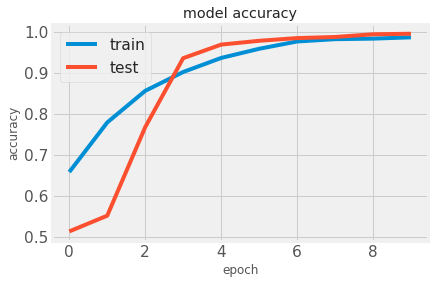

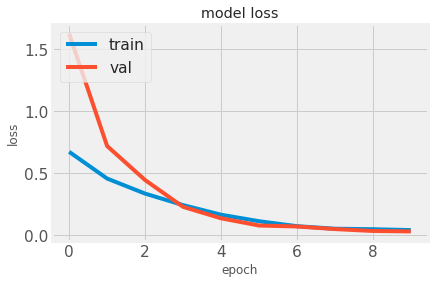

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

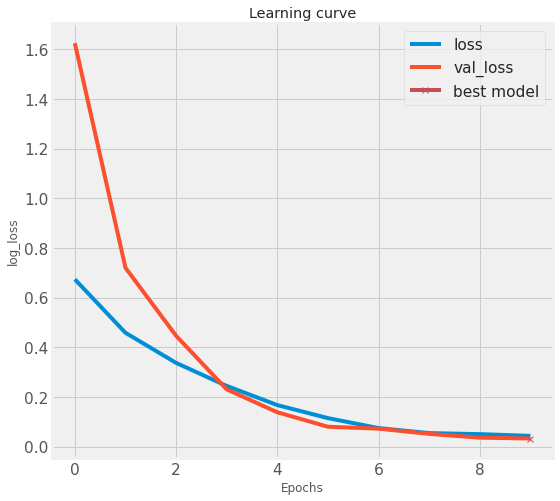

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot( np.argmin(history.history["val_loss"]), np.min(history.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

In [ ]:
from keras.models import load_model
history=load_model('/content/drive/MyDrive/model.h5')

In [ ]:
model.save('/content/drive/MyDrive/model.h5')

In [ ]:
model=history

In [ ]:
batch_index=0
predict_list=[]
target=[]
while batch_index <= test_generator.batch_index:
    data,label = test_generator.next()
    prediction=model.predict(data)
    j=0
    for i in prediction:
      flat_arr = i.ravel().tolist()
      max_value = max(flat_arr)
      max_index = flat_arr.index(max_value)
      predict_list.append(max_index)
      new_label= label[j].tolist()
      max_value=max(new_label)
      max_index=new_label.index(max_value)
      target.append(max_index)
      j+=1
     



    batch_index = batch_index + 1

[Text(0, 0.5, 'covid'), Text(0, 1.5, 'non_cvoid')]

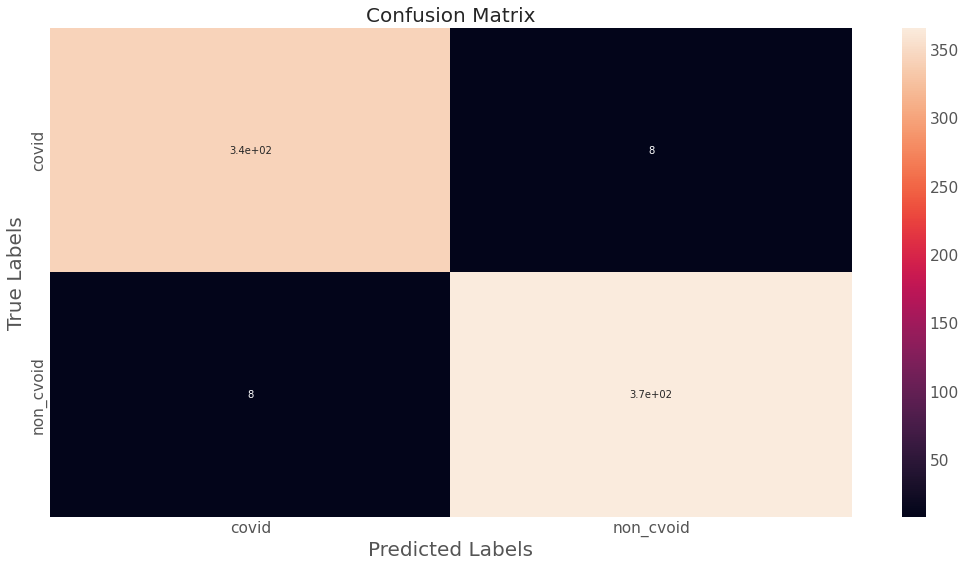

In [ ]:
from sklearn.metrics import confusion_matrix

import seaborn as sns 
labels=['covid', 'non_cvoid']
#matrix = confusion_matrix(binary_predictions, y_test.argmax(axis=1))
matrix = confusion_matrix(predict_list, target)
plt.figure(figsize=(16, 9))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
precisions, recalls, thresholds = precision_recall_curve(target, predict_list)
fpr, tpr, thresholds2 = roc_curve(target, predict_list )

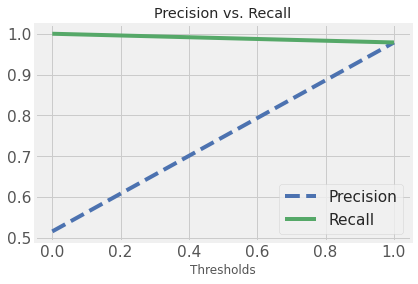

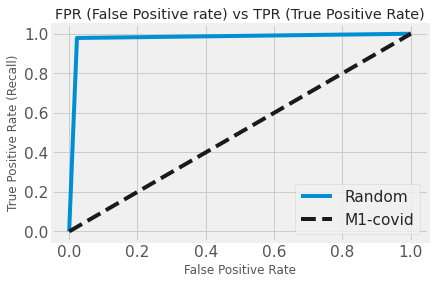

In [ ]:
def plot_precision_recall(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--') # all except last 
    plt.plot(thresholds, recalls[:-1], 'g-')
    plt.title('Precision vs. Recall')
    plt.xlabel('Thresholds')
    plt.legend(['Precision', 'Recall'], loc='best')
    plt.show()

def plot_roc(fpr, tpr):
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('FPR (False Positive rate) vs TPR (True Positive Rate)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.legend(['M1-covid', 'Random'], loc='best')
    plt.show()
    
plot_precision_recall(precisions, recalls, thresholds)
plot_roc(fpr, tpr)

In [ ]:
from sklearn.metrics import confusion_matrix

import seaborn as sns 
labels=['LGGO','LT-central','RGGO','RT-central']
#matrix = confusion_matrix(binary_predictions, y_test.argmax(axis=1))
matrix = confusion_matrix(predict_list, target)
plt.figure(figsize=(16, 9))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
#datagenerator
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Flatten
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=(224,224,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))

model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

#model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(0.2))

model.add(Dense(4))

model.add(Activation('sigmoid'))

early_stop = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)
opt = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=opt,metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(train_generator, batch_size=32, callbacks=[early_stop], validation_data=validation_generator, epochs=10)

Epoch 1/10
189/189 [==============================] - 877s 4s/step - loss: 0.6919 - acc: 0.6387 - val_loss: 1.2498 - val_acc: 0.4874
Epoch 2/10
189/189 [==============================] - 130s 687ms/step - loss: 0.4987 - acc: 0.7585 - val_loss: 0.6317 - val_acc: 0.6358
Epoch 3/10
189/189 [==============================] - 128s 676ms/step - loss: 0.3753 - acc: 0.8333 - val_loss: 0.4566 - val_acc: 0.8000
Epoch 4/10
189/189 [==============================] - 128s 675ms/step - loss: 0.2567 - acc: 0.8973 - val_loss: 0.2485 - val_acc: 0.9113
Epoch 5/10
189/189 [==============================] - 128s 675ms/step - loss: 0.1743 - acc: 0.9330 - val_loss: 0.1393 - val_acc: 0.9536
Epoch 6/10
189/189 [==============================] - 128s 675ms/step - loss: 0.1151 - acc: 0.9629 - val_loss: 0.1163 - val_acc: 0.9735
Epoch 7/10
189/189 [==============================] - 129s 681ms/step - loss: 0.0907 - acc: 0.9687 - val_loss: 0.1520 - val_acc: 0.9404
Epoch 8/10
189/189 [==============================]

In [ ]:
model.save('/content/drive/MyDrive/model.h5')

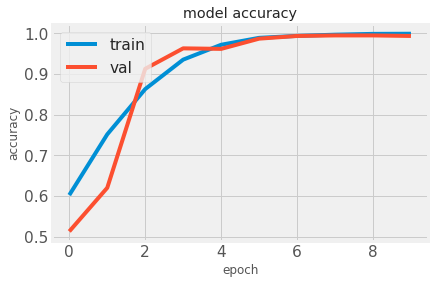

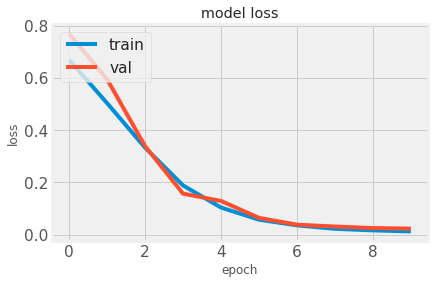

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

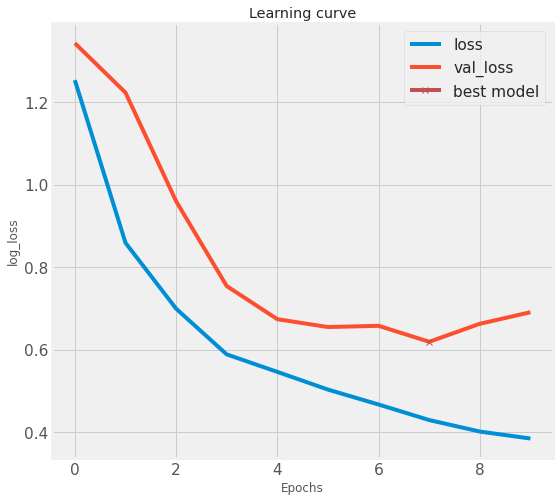

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot( np.argmin(history.history["val_loss"]), np.min(history.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

In [ ]:
batch_index=0
predict_list=[]
target=[]
while batch_index <= test_generator.batch_index:
    data,label = test_generator.next()
    prediction=model.predict(data)
    j=0
    for i in prediction:
      flat_arr = i.ravel().tolist()
      max_value = max(flat_arr)
      max_index = flat_arr.index(max_value)
      predict_list.append(max_index)
      new_label= label[j].tolist()
      max_value=max(new_label)
      max_index=new_label.index(max_value)
      target.append(max_index)
      j+=1
     



    batch_index = batch_index + 1

[Text(0, 0.5, 'LGGO'),
 Text(0, 1.5, 'LT-central'),
 Text(0, 2.5, 'RGGO'),
 Text(0, 3.5, 'RT-central')]

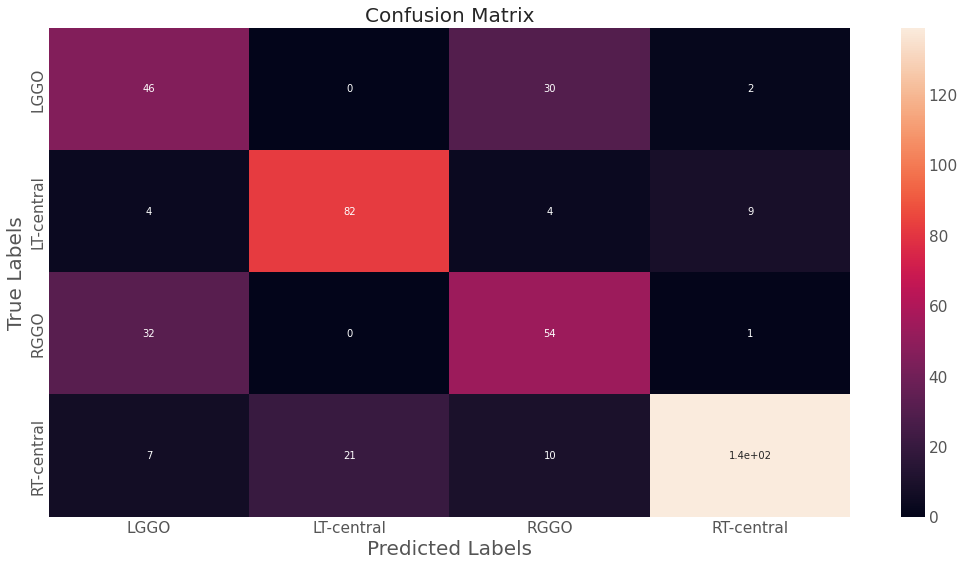

In [ ]:


from sklearn.metrics import confusion_matrix

import seaborn as sns 
labels=['LGGO','LT-central','RGGO','RT-central']
#matrix = confusion_matrix(binary_predictions, y_test.argmax(axis=1))
matrix = confusion_matrix(predict_list, target)
plt.figure(figsize=(16, 9))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
'read covid data'
ids_covid = np.sort(next(os.walk(path+'COVID/' ))[1])       #folder name
print('number of COVID cases:', len(ids_covid))
############
df = pd.read_excel(path+'demoghraphic data/DEMOGRAPHIC DATA_final.xlsx')
# for i in range(len(df['file_number'])):
#     df['file_number'][i]= 'S'+ str(int(df['file_number'][i]))

sys.stdout.flush()
GGO=0
COVID=np.zeros((1, 224, 224,1), dtype=np.float32)
for id_ in ids_covid:
    print(id_)
    ids=next(os.walk(path + 'COVID/'+id_))[2]                 #image name
    a=df.loc[df['file_number']==id_,'Patient number'].to_string()
    a=a[-4:]
    df1 = pd.read_excel(path+'demoghraphic data/'+a+'.xlsx')   #excel file for each patient
    df1 = df1.fillna(0)
    df1['GGO']=df1['RT-GGO']+df1['LT-GGO']-df1['RT-GGO']*df1['LT-GGO']
    df.loc[df['file_number']==id_,'GGO']=np.sum(df1['GGO'])
    # GGO=GGO+np.sum(df1['GGO'])
    b=df1.loc[(df1['GGO']==1 ), 'image number'].array
    b=shuffle(b)
    L=70
    if len(b)<70:
      L=len(b)
    b=b[:L]
    print("len b : ", len(b))
    directory= '/content/drive/MyDrive/BigCovid_Data'
    for n,id1 in tqdm(enumerate(b), total=len(b)): 
    
         img = cv2.imread(path+'COVID/'+id_+'/'+id1+'.jpg') 
         img = cv2.imread(path+'COVID/'+id_+'/'+id1+'.jpg') 
         os.chdir(directory)
      
          # List files and directories  
          # in 'C:/Users/Rajnish/Desktop/GeeksforGeeks'  
            
            
          # Filename
         filename = id1+'.jpg'
         if os.path.isfile(filename):
              print ("File exist")
              pass
         else:
           cv2.imwrite(filename, img)  


number of COVID cases: 178
S472710
len b :  70


  3%|▎         | 2/70 [00:02<01:06,  1.02it/s]

File exist


  4%|▍         | 3/70 [00:02<01:03,  1.06it/s]

File exist


  6%|▌         | 4/70 [00:04<01:06,  1.00s/it]

File exist


  7%|▋         | 5/70 [00:04<01:03,  1.02it/s]

File exist


  9%|▊         | 6/70 [00:05<01:01,  1.05it/s]

File exist


 11%|█▏        | 8/70 [00:07<01:01,  1.01it/s]

File exist


 14%|█▍        | 10/70 [00:09<00:47,  1.26it/s]

File exist


 20%|██        | 14/70 [00:13<00:58,  1.05s/it]

File exist


 21%|██▏       | 15/70 [00:14<00:52,  1.04it/s]

File exist


 23%|██▎       | 16/70 [00:15<00:51,  1.04it/s]

File exist


 26%|██▌       | 18/70 [00:17<00:53,  1.03s/it]

File exist


 29%|██▊       | 20/70 [00:19<00:53,  1.07s/it]

File exist


 30%|███       | 21/70 [00:20<00:52,  1.08s/it]

File exist


 31%|███▏      | 22/70 [00:21<00:52,  1.09s/it]

File exist


 33%|███▎      | 23/70 [00:23<00:53,  1.14s/it]

File exist


 36%|███▌      | 25/70 [00:25<00:51,  1.14s/it]

File exist


 40%|████      | 28/70 [00:28<00:46,  1.11s/it]

File exist


 41%|████▏     | 29/70 [00:29<00:43,  1.06s/it]

File exist


 43%|████▎     | 30/70 [00:30<00:42,  1.07s/it]

File exist


 46%|████▌     | 32/70 [00:32<00:40,  1.07s/it]

File exist


 51%|█████▏    | 36/70 [00:36<00:32,  1.06it/s]

File exist


 53%|█████▎    | 37/70 [00:37<00:31,  1.05it/s]

File exist


 57%|█████▋    | 40/70 [00:39<00:28,  1.06it/s]

File exist


 59%|█████▊    | 41/70 [00:41<00:28,  1.00it/s]

File exist


 61%|██████▏   | 43/70 [00:42<00:25,  1.04it/s]

File exist


 64%|██████▍   | 45/70 [00:44<00:24,  1.04it/s]

File exist


 71%|███████▏  | 50/70 [00:50<00:22,  1.10s/it]

File exist


 74%|███████▍  | 52/70 [00:52<00:19,  1.10s/it]

File exist


 76%|███████▌  | 53/70 [00:53<00:18,  1.07s/it]

File exist


 79%|███████▊  | 55/70 [00:55<00:14,  1.00it/s]

File exist


 81%|████████▏ | 57/70 [00:58<00:14,  1.12s/it]

File exist


 86%|████████▌ | 60/70 [01:01<00:10,  1.08s/it]

File exist


 90%|█████████ | 63/70 [01:04<00:07,  1.14s/it]

File exist


 91%|█████████▏| 64/70 [01:05<00:06,  1.12s/it]

File exist


 93%|█████████▎| 65/70 [01:06<00:05,  1.05s/it]

File exist


 96%|█████████▌| 67/70 [01:09<00:03,  1.14s/it]

File exist


 99%|█████████▊| 69/70 [01:11<00:01,  1.11s/it]

File exist


100%|██████████| 70/70 [01:12<00:00,  1.03s/it]

File exist
S472720


len b :  70


  3%|▎         | 2/70 [00:02<01:14,  1.09s/it]

File exist


  6%|▌         | 4/70 [00:03<00:59,  1.11it/s]

File exist


  9%|▊         | 6/70 [00:06<01:12,  1.14s/it]

File exist


 11%|█▏        | 8/70 [00:08<01:03,  1.02s/it]

File exist


 13%|█▎        | 9/70 [00:08<00:55,  1.09it/s]

File exist


 16%|█▌        | 11/70 [00:10<00:51,  1.14it/s]

File exist


 17%|█▋        | 12/70 [00:11<00:55,  1.04it/s]

File exist


 20%|██        | 14/70 [00:13<00:58,  1.05s/it]

File exist


 21%|██▏       | 15/70 [00:14<00:53,  1.02it/s]

File exist


 26%|██▌       | 18/70 [00:17<00:49,  1.05it/s]

File exist


 27%|██▋       | 19/70 [00:18<00:50,  1.01it/s]

File exist


 29%|██▊       | 20/70 [00:19<00:50,  1.01s/it]

File exist


 30%|███       | 21/70 [00:20<00:49,  1.01s/it]

File exist


 36%|███▌      | 25/70 [00:24<00:42,  1.07it/s]

File exist


 37%|███▋      | 26/70 [00:25<00:39,  1.10it/s]

File exist


 39%|███▊      | 27/70 [00:26<00:40,  1.06it/s]

File exist


 40%|████      | 28/70 [00:27<00:41,  1.00it/s]

File exist


 41%|████▏     | 29/70 [00:28<00:42,  1.03s/it]

File exist


 44%|████▍     | 31/70 [00:30<00:39,  1.02s/it]

File exist


 47%|████▋     | 33/70 [00:32<00:36,  1.01it/s]

File exist


 50%|█████     | 35/70 [00:34<00:33,  1.04it/s]

File exist


 53%|█████▎    | 37/70 [00:36<00:34,  1.04s/it]

File exist


 54%|█████▍    | 38/70 [00:37<00:33,  1.05s/it]

File exist


 57%|█████▋    | 40/70 [00:39<00:31,  1.05s/it]

File exist


 59%|█████▊    | 41/70 [00:40<00:31,  1.08s/it]

File exist


 60%|██████    | 42/70 [00:41<00:28,  1.03s/it]

File exist


 61%|██████▏   | 43/70 [00:42<00:27,  1.00s/it]

File exist


 63%|██████▎   | 44/70 [00:43<00:26,  1.04s/it]

File exist


 64%|██████▍   | 45/70 [00:44<00:23,  1.04it/s]

File exist


 66%|██████▌   | 46/70 [00:45<00:21,  1.13it/s]

File exist


 69%|██████▊   | 48/70 [00:47<00:18,  1.19it/s]

File exist


 70%|███████   | 49/70 [00:47<00:16,  1.24it/s]

File exist


 71%|███████▏  | 50/70 [00:48<00:17,  1.16it/s]

File exist


 73%|███████▎  | 51/70 [00:50<00:18,  1.00it/s]

File exist


 79%|███████▊  | 55/70 [00:54<00:15,  1.00s/it]

File exist


 80%|████████  | 56/70 [00:55<00:14,  1.04s/it]

File exist


 87%|████████▋ | 61/70 [01:00<00:08,  1.04it/s]

File exist


 89%|████████▊ | 62/70 [01:01<00:07,  1.01it/s]

File exist


 91%|█████████▏| 64/70 [01:03<00:05,  1.03it/s]

File exist


 93%|█████████▎| 65/70 [01:04<00:05,  1.01s/it]

File exist


 94%|█████████▍| 66/70 [01:05<00:04,  1.03s/it]

File exist


 97%|█████████▋| 68/70 [01:07<00:02,  1.05s/it]

File exist


100%|██████████| 70/70 [01:09<00:00,  1.01it/s]


S472730
len b :  16


  6%|▋         | 1/16 [00:00<00:10,  1.43it/s]

File exist


 12%|█▎        | 2/16 [00:01<00:11,  1.24it/s]

File exist


 19%|█▉        | 3/16 [00:02<00:11,  1.14it/s]

File exist


 25%|██▌       | 4/16 [00:03<00:10,  1.11it/s]

File exist


 31%|███▏      | 5/16 [00:04<00:10,  1.02it/s]

File exist


 38%|███▊      | 6/16 [00:05<00:08,  1.12it/s]

File exist


 44%|████▍     | 7/16 [00:06<00:08,  1.07it/s]

File exist


 50%|█████     | 8/16 [00:07<00:07,  1.01it/s]

File exist


 56%|█████▋    | 9/16 [00:08<00:06,  1.07it/s]

File exist


 62%|██████▎   | 10/16 [00:09<00:05,  1.04it/s]

File exist


 69%|██████▉   | 11/16 [00:10<00:04,  1.07it/s]

File exist


 75%|███████▌  | 12/16 [00:10<00:03,  1.14it/s]

File exist


 81%|████████▏ | 13/16 [00:11<00:02,  1.24it/s]

File exist


 88%|████████▊ | 14/16 [00:12<00:01,  1.26it/s]

File exist


 94%|█████████▍| 15/16 [00:13<00:00,  1.24it/s]

File exist


100%|██████████| 16/16 [00:14<00:00,  1.14it/s]

File exist
S472790


len b :  8


 12%|█▎        | 1/8 [00:00<00:05,  1.33it/s]

File exist


 25%|██▌       | 2/8 [00:01<00:04,  1.22it/s]

File exist


 38%|███▊      | 3/8 [00:02<00:03,  1.28it/s]

File exist


 50%|█████     | 4/8 [00:03<00:03,  1.27it/s]

File exist


 62%|██████▎   | 5/8 [00:04<00:02,  1.23it/s]

File exist


 75%|███████▌  | 6/8 [00:04<00:01,  1.16it/s]

File exist


 88%|████████▊ | 7/8 [00:06<00:00,  1.06it/s]

File exist


100%|██████████| 8/8 [00:07<00:00,  1.12it/s]

File exist
S473770


len b :  0


0it [00:00, ?it/s]

S474760


len b :  30


  3%|▎         | 1/30 [00:01<00:30,  1.06s/it]

File exist


  7%|▋         | 2/30 [00:02<00:33,  1.21s/it]

File exist


 10%|█         | 3/30 [00:03<00:27,  1.02s/it]

File exist


 13%|█▎        | 4/30 [00:04<00:25,  1.04it/s]

File exist


 17%|█▋        | 5/30 [00:04<00:23,  1.05it/s]

File exist


 20%|██        | 6/30 [00:06<00:24,  1.00s/it]

File exist


 23%|██▎       | 7/30 [00:07<00:23,  1.00s/it]

File exist


 27%|██▋       | 8/30 [00:07<00:19,  1.10it/s]

File exist


 30%|███       | 9/30 [00:08<00:18,  1.14it/s]

File exist


 33%|███▎      | 10/30 [00:09<00:18,  1.06it/s]

File exist


 37%|███▋      | 11/30 [00:10<00:17,  1.12it/s]

File exist


 40%|████      | 12/30 [00:11<00:15,  1.16it/s]

File exist


 43%|████▎     | 13/30 [00:12<00:15,  1.09it/s]

File exist


 47%|████▋     | 14/30 [00:13<00:14,  1.13it/s]

File exist


 50%|█████     | 15/30 [00:13<00:13,  1.15it/s]

File exist


 53%|█████▎    | 16/30 [00:14<00:12,  1.11it/s]

File exist


 57%|█████▋    | 17/30 [00:15<00:12,  1.06it/s]

File exist


 60%|██████    | 18/30 [00:17<00:11,  1.03it/s]

File exist


 63%|██████▎   | 19/30 [00:18<00:11,  1.04s/it]

File exist


 67%|██████▋   | 20/30 [00:18<00:09,  1.05it/s]

File exist


 70%|███████   | 21/30 [00:19<00:08,  1.11it/s]

File exist


 73%|███████▎  | 22/30 [00:20<00:06,  1.15it/s]

File exist


 77%|███████▋  | 23/30 [00:21<00:05,  1.19it/s]

File exist


 80%|████████  | 24/30 [00:22<00:04,  1.20it/s]

File exist


 83%|████████▎ | 25/30 [00:22<00:04,  1.23it/s]

File exist


 87%|████████▋ | 26/30 [00:23<00:03,  1.25it/s]

File exist


 90%|█████████ | 27/30 [00:24<00:02,  1.27it/s]

File exist


 93%|█████████▎| 28/30 [00:25<00:01,  1.28it/s]

File exist


 97%|█████████▋| 29/30 [00:25<00:00,  1.29it/s]

File exist


100%|██████████| 30/30 [00:26<00:00,  1.12it/s]

File exist
S474770


len b :  17


  6%|▌         | 1/17 [00:00<00:12,  1.28it/s]

File exist


 12%|█▏        | 2/17 [00:01<00:14,  1.01it/s]

File exist


 18%|█▊        | 3/17 [00:02<00:13,  1.04it/s]

File exist


 24%|██▎       | 4/17 [00:03<00:11,  1.13it/s]

File exist


 29%|██▉       | 5/17 [00:04<00:09,  1.25it/s]

File exist


 35%|███▌      | 6/17 [00:04<00:08,  1.34it/s]

File exist


 41%|████      | 7/17 [00:05<00:07,  1.27it/s]

File exist


 47%|████▋     | 8/17 [00:06<00:07,  1.23it/s]

File exist


 53%|█████▎    | 9/17 [00:07<00:06,  1.26it/s]

File exist


 59%|█████▉    | 10/17 [00:08<00:05,  1.23it/s]

File exist


 65%|██████▍   | 11/17 [00:09<00:04,  1.24it/s]

File exist


 71%|███████   | 12/17 [00:09<00:04,  1.25it/s]

File exist


 76%|███████▋  | 13/17 [00:10<00:03,  1.15it/s]

File exist


 82%|████████▏ | 14/17 [00:11<00:02,  1.19it/s]

File exist


 88%|████████▊ | 15/17 [00:12<00:01,  1.21it/s]

File exist


 94%|█████████▍| 16/17 [00:13<00:00,  1.24it/s]

File exist


100%|██████████| 17/17 [00:14<00:00,  1.20it/s]

File exist
S474970


len b :  70


  1%|▏         | 1/70 [00:01<01:13,  1.07s/it]

File exist


  3%|▎         | 2/70 [00:01<01:01,  1.11it/s]

File exist


  4%|▍         | 3/70 [00:02<00:56,  1.18it/s]

File exist


  6%|▌         | 4/70 [00:03<01:02,  1.05it/s]

File exist


  7%|▋         | 5/70 [00:04<00:57,  1.13it/s]

File exist


 10%|█         | 7/70 [00:06<00:54,  1.16it/s]

File exist


 11%|█▏        | 8/70 [00:06<00:51,  1.21it/s]

File exist


 14%|█▍        | 10/70 [00:08<00:52,  1.14it/s]

File exist


 16%|█▌        | 11/70 [00:09<00:50,  1.17it/s]

File exist


 19%|█▊        | 13/70 [00:11<00:45,  1.24it/s]

File exist


 21%|██▏       | 15/70 [00:13<00:49,  1.12it/s]

File exist


 24%|██▍       | 17/70 [00:14<00:41,  1.27it/s]

File exist


 26%|██▌       | 18/70 [00:15<00:42,  1.22it/s]

File exist


 29%|██▊       | 20/70 [00:16<00:39,  1.26it/s]

File exist


 30%|███       | 21/70 [00:17<00:43,  1.14it/s]

File exist


 31%|███▏      | 22/70 [00:18<00:40,  1.18it/s]

File exist


 33%|███▎      | 23/70 [00:19<00:39,  1.19it/s]

File exist


 34%|███▍      | 24/70 [00:20<00:38,  1.21it/s]

File exist


 36%|███▌      | 25/70 [00:21<00:43,  1.04it/s]

File exist


 39%|███▊      | 27/70 [00:23<00:40,  1.07it/s]

File exist


 41%|████▏     | 29/70 [00:25<00:37,  1.09it/s]

File exist


 44%|████▍     | 31/70 [00:27<00:35,  1.09it/s]

File exist


 46%|████▌     | 32/70 [00:27<00:33,  1.12it/s]

File exist


 50%|█████     | 35/70 [00:30<00:29,  1.21it/s]

File exist


 51%|█████▏    | 36/70 [00:31<00:27,  1.24it/s]

File exist


 53%|█████▎    | 37/70 [00:31<00:26,  1.26it/s]

File exist


 54%|█████▍    | 38/70 [00:32<00:25,  1.27it/s]

File exist


 59%|█████▊    | 41/70 [00:35<00:23,  1.24it/s]

File exist


 60%|██████    | 42/70 [00:35<00:22,  1.24it/s]

File exist


 61%|██████▏   | 43/70 [00:36<00:21,  1.27it/s]

File exist


 63%|██████▎   | 44/70 [00:37<00:22,  1.16it/s]

File exist


 66%|██████▌   | 46/70 [00:39<00:20,  1.18it/s]

File exist


 67%|██████▋   | 47/70 [00:40<00:18,  1.22it/s]

File exist


 69%|██████▊   | 48/70 [00:41<00:18,  1.17it/s]

File exist


 70%|███████   | 49/70 [00:41<00:17,  1.20it/s]

File exist


 71%|███████▏  | 50/70 [00:42<00:18,  1.11it/s]

File exist


 73%|███████▎  | 51/70 [00:43<00:16,  1.16it/s]

File exist


 77%|███████▋  | 54/70 [00:46<00:14,  1.11it/s]

File exist


 81%|████████▏ | 57/70 [00:49<00:11,  1.16it/s]

File exist


 84%|████████▍ | 59/70 [00:50<00:09,  1.14it/s]

File exist


 87%|████████▋ | 61/70 [00:52<00:07,  1.15it/s]

File exist


 89%|████████▊ | 62/70 [00:53<00:06,  1.19it/s]

File exist


 91%|█████████▏| 64/70 [00:55<00:04,  1.22it/s]

File exist


 93%|█████████▎| 65/70 [00:56<00:04,  1.13it/s]

File exist


 94%|█████████▍| 66/70 [00:56<00:03,  1.18it/s]

File exist


 96%|█████████▌| 67/70 [00:57<00:02,  1.21it/s]

File exist


100%|██████████| 70/70 [01:00<00:00,  1.16it/s]

File exist
S475070


len b :  70


  1%|▏         | 1/70 [00:00<01:02,  1.10it/s]

File exist


  4%|▍         | 3/70 [00:02<00:54,  1.22it/s]

File exist


  6%|▌         | 4/70 [00:03<01:00,  1.09it/s]

File exist


  7%|▋         | 5/70 [00:04<00:56,  1.15it/s]

File exist


 13%|█▎        | 9/70 [00:07<00:51,  1.19it/s]

File exist


 14%|█▍        | 10/70 [00:08<00:55,  1.09it/s]

File exist


 17%|█▋        | 12/70 [00:10<00:49,  1.17it/s]

File exist


 19%|█▊        | 13/70 [00:11<00:47,  1.20it/s]

File exist


 21%|██▏       | 15/70 [00:12<00:41,  1.33it/s]

File exist


 26%|██▌       | 18/70 [00:14<00:38,  1.36it/s]

File exist


 27%|██▋       | 19/70 [00:15<00:37,  1.35it/s]

File exist


 33%|███▎      | 23/70 [00:18<00:36,  1.28it/s]

File exist


 34%|███▍      | 24/70 [00:19<00:36,  1.27it/s]

File exist


 41%|████▏     | 29/70 [00:23<00:34,  1.18it/s]

File exist


 43%|████▎     | 30/70 [00:24<00:32,  1.22it/s]

File exist


 44%|████▍     | 31/70 [00:25<00:32,  1.19it/s]

File exist


 46%|████▌     | 32/70 [00:26<00:31,  1.21it/s]

File exist


 47%|████▋     | 33/70 [00:27<00:30,  1.23it/s]

File exist


 49%|████▊     | 34/70 [00:27<00:28,  1.25it/s]

File exist


 51%|█████▏    | 36/70 [00:29<00:26,  1.27it/s]

File exist


 54%|█████▍    | 38/70 [00:30<00:24,  1.33it/s]

File exist


 60%|██████    | 42/70 [00:34<00:22,  1.22it/s]

File exist


 63%|██████▎   | 44/70 [00:35<00:19,  1.33it/s]

File exist


 70%|███████   | 49/70 [00:39<00:15,  1.34it/s]

File exist


 71%|███████▏  | 50/70 [00:40<00:14,  1.34it/s]

File exist


 76%|███████▌  | 53/70 [00:42<00:12,  1.39it/s]

File exist


 80%|████████  | 56/70 [00:45<00:11,  1.21it/s]

File exist


 81%|████████▏ | 57/70 [00:45<00:10,  1.24it/s]

File exist


 83%|████████▎ | 58/70 [00:46<00:10,  1.19it/s]

File exist


 87%|████████▋ | 61/70 [00:49<00:06,  1.32it/s]

File exist


 89%|████████▊ | 62/70 [00:49<00:05,  1.38it/s]

File exist


 90%|█████████ | 63/70 [00:50<00:05,  1.38it/s]

File exist


 91%|█████████▏| 64/70 [00:51<00:04,  1.36it/s]

File exist


 97%|█████████▋| 68/70 [00:54<00:01,  1.21it/s]

File exist


 99%|█████████▊| 69/70 [00:55<00:00,  1.23it/s]

File exist


100%|██████████| 70/70 [00:56<00:00,  1.25it/s]


S475100
len b :  55


  2%|▏         | 1/55 [00:01<00:59,  1.09s/it]

File exist


  4%|▎         | 2/55 [00:01<00:44,  1.19it/s]

File exist


  5%|▌         | 3/55 [00:02<00:47,  1.09it/s]

File exist


  7%|▋         | 4/55 [00:03<00:45,  1.12it/s]

File exist


  9%|▉         | 5/55 [00:04<00:45,  1.09it/s]

File exist


 11%|█         | 6/55 [00:05<00:51,  1.05s/it]

File exist


 13%|█▎        | 7/55 [00:06<00:50,  1.05s/it]

File exist


 15%|█▍        | 8/55 [00:07<00:46,  1.01it/s]

File exist


 16%|█▋        | 9/55 [00:08<00:43,  1.07it/s]

File exist


 18%|█▊        | 10/55 [00:09<00:40,  1.12it/s]

File exist


 20%|██        | 11/55 [00:10<00:40,  1.10it/s]

File exist


 22%|██▏       | 12/55 [00:11<00:36,  1.18it/s]

File exist


 24%|██▎       | 13/55 [00:12<00:39,  1.07it/s]

File exist


 25%|██▌       | 14/55 [00:12<00:36,  1.13it/s]

File exist


 27%|██▋       | 15/55 [00:14<00:39,  1.02it/s]

File exist


 29%|██▉       | 16/55 [00:15<00:39,  1.01s/it]

File exist


 31%|███       | 17/55 [00:16<00:35,  1.06it/s]

File exist


 33%|███▎      | 18/55 [00:16<00:33,  1.12it/s]

File exist


 35%|███▍      | 19/55 [00:17<00:31,  1.15it/s]

File exist


 36%|███▋      | 20/55 [00:18<00:29,  1.18it/s]

File exist


 38%|███▊      | 21/55 [00:19<00:28,  1.20it/s]

File exist


 40%|████      | 22/55 [00:20<00:28,  1.16it/s]

File exist


 42%|████▏     | 23/55 [00:21<00:29,  1.08it/s]

File exist


 44%|████▎     | 24/55 [00:22<00:29,  1.05it/s]

File exist


 45%|████▌     | 25/55 [00:23<00:29,  1.02it/s]

File exist


 47%|████▋     | 26/55 [00:24<00:28,  1.01it/s]

File exist


 49%|████▉     | 27/55 [00:25<00:28,  1.02s/it]

File exist


 51%|█████     | 28/55 [00:26<00:25,  1.07it/s]

File exist


 53%|█████▎    | 29/55 [00:27<00:25,  1.01it/s]

File exist


 55%|█████▍    | 30/55 [00:28<00:24,  1.04it/s]

File exist


 56%|█████▋    | 31/55 [00:28<00:21,  1.09it/s]

File exist


 58%|█████▊    | 32/55 [00:29<00:20,  1.14it/s]

File exist


 60%|██████    | 33/55 [00:30<00:18,  1.17it/s]

File exist


 62%|██████▏   | 34/55 [00:31<00:19,  1.06it/s]

File exist


 64%|██████▎   | 35/55 [00:32<00:17,  1.12it/s]

File exist


 65%|██████▌   | 36/55 [00:33<00:16,  1.15it/s]

File exist


 67%|██████▋   | 37/55 [00:34<00:15,  1.19it/s]

File exist


 69%|██████▉   | 38/55 [00:35<00:15,  1.10it/s]

File exist


 71%|███████   | 39/55 [00:35<00:13,  1.15it/s]

File exist


 73%|███████▎  | 40/55 [00:36<00:12,  1.18it/s]

File exist


 75%|███████▍  | 41/55 [00:37<00:11,  1.24it/s]

File exist


 76%|███████▋  | 42/55 [00:38<00:11,  1.10it/s]

File exist


 78%|███████▊  | 43/55 [00:39<00:10,  1.13it/s]

File exist


 80%|████████  | 44/55 [00:40<00:11,  1.00s/it]

File exist


 82%|████████▏ | 45/55 [00:41<00:09,  1.01it/s]

File exist


 84%|████████▎ | 46/55 [00:42<00:08,  1.08it/s]

File exist


 85%|████████▌ | 47/55 [00:43<00:07,  1.12it/s]

File exist


 87%|████████▋ | 48/55 [00:44<00:06,  1.14it/s]

File exist


 89%|████████▉ | 49/55 [00:44<00:05,  1.18it/s]

File exist


 91%|█████████ | 50/55 [00:45<00:04,  1.22it/s]

File exist


 93%|█████████▎| 51/55 [00:46<00:03,  1.15it/s]

File exist


 95%|█████████▍| 52/55 [00:47<00:02,  1.18it/s]

File exist


 96%|█████████▋| 53/55 [00:48<00:01,  1.14it/s]

File exist


 98%|█████████▊| 54/55 [00:49<00:00,  1.18it/s]

File exist


100%|██████████| 55/55 [00:50<00:00,  1.10it/s]

File exist
S475330


len b :  0


0it [00:00, ?it/s]

S475630


len b :  0


0it [00:00, ?it/s]

S475670


len b :  0


0it [00:00, ?it/s]

S475840


len b :  70


  6%|▌         | 4/70 [00:03<00:58,  1.13it/s]

File exist


 13%|█▎        | 9/70 [00:07<00:51,  1.18it/s]

File exist


 16%|█▌        | 11/70 [00:08<00:47,  1.25it/s]

File exist


 17%|█▋        | 12/70 [00:09<00:45,  1.27it/s]

File exist


 19%|█▊        | 13/70 [00:10<00:49,  1.15it/s]

File exist


 23%|██▎       | 16/70 [00:13<00:44,  1.23it/s]

File exist


 24%|██▍       | 17/70 [00:13<00:43,  1.22it/s]

File exist


 27%|██▋       | 19/70 [00:15<00:36,  1.40it/s]

File exist


 34%|███▍      | 24/70 [00:19<00:36,  1.28it/s]

File exist


 37%|███▋      | 26/70 [00:20<00:34,  1.29it/s]

File exist


 43%|████▎     | 30/70 [00:24<00:33,  1.21it/s]

File exist


 44%|████▍     | 31/70 [00:24<00:31,  1.25it/s]

File exist


 57%|█████▋    | 40/70 [00:32<00:23,  1.28it/s]

File exist


 69%|██████▊   | 48/70 [00:38<00:16,  1.31it/s]

File exist


 70%|███████   | 49/70 [00:39<00:15,  1.32it/s]

File exist


 71%|███████▏  | 50/70 [00:39<00:15,  1.32it/s]

File exist


 77%|███████▋  | 54/70 [00:42<00:12,  1.29it/s]

File exist


 83%|████████▎ | 58/70 [00:46<00:10,  1.17it/s]

File exist


 84%|████████▍ | 59/70 [00:47<00:09,  1.21it/s]

File exist


 86%|████████▌ | 60/70 [00:47<00:07,  1.29it/s]

File exist


 90%|█████████ | 63/70 [00:50<00:06,  1.07it/s]

File exist


 91%|█████████▏| 64/70 [00:51<00:05,  1.12it/s]

File exist


 96%|█████████▌| 67/70 [00:54<00:02,  1.18it/s]

File exist


 99%|█████████▊| 69/70 [00:55<00:00,  1.25it/s]

File exist


100%|██████████| 70/70 [00:56<00:00,  1.24it/s]

File exist
S476350


len b :  0


0it [00:00, ?it/s]

S476380


len b :  40


  2%|▎         | 1/40 [00:00<00:28,  1.36it/s]

File exist


  5%|▌         | 2/40 [00:01<00:29,  1.31it/s]

File exist


  8%|▊         | 3/40 [00:02<00:28,  1.28it/s]

File exist


 10%|█         | 4/40 [00:03<00:28,  1.28it/s]

File exist


 12%|█▎        | 5/40 [00:03<00:27,  1.27it/s]

File exist


 15%|█▌        | 6/40 [00:04<00:26,  1.27it/s]

File exist


 18%|█▊        | 7/40 [00:05<00:26,  1.27it/s]

File exist


 20%|██        | 8/40 [00:06<00:28,  1.14it/s]

File exist


 22%|██▎       | 9/40 [00:07<00:27,  1.12it/s]

File exist


 25%|██▌       | 10/40 [00:08<00:29,  1.03it/s]

File exist


 28%|██▊       | 11/40 [00:09<00:27,  1.05it/s]

File exist


 30%|███       | 12/40 [00:10<00:24,  1.15it/s]

File exist


 32%|███▎      | 13/40 [00:10<00:22,  1.19it/s]

File exist


 35%|███▌      | 14/40 [00:11<00:23,  1.12it/s]

File exist


 38%|███▊      | 15/40 [00:12<00:21,  1.16it/s]

File exist


 40%|████      | 16/40 [00:13<00:20,  1.19it/s]

File exist


 42%|████▎     | 17/40 [00:14<00:19,  1.20it/s]

File exist


 45%|████▌     | 18/40 [00:15<00:18,  1.22it/s]

File exist


 48%|████▊     | 19/40 [00:15<00:16,  1.26it/s]

File exist


 50%|█████     | 20/40 [00:16<00:14,  1.34it/s]

File exist


 52%|█████▎    | 21/40 [00:17<00:14,  1.34it/s]

File exist


 55%|█████▌    | 22/40 [00:17<00:12,  1.39it/s]

File exist


 57%|█████▊    | 23/40 [00:18<00:13,  1.28it/s]

File exist


 60%|██████    | 24/40 [00:19<00:12,  1.24it/s]

File exist


 62%|██████▎   | 25/40 [00:20<00:11,  1.32it/s]

File exist


 65%|██████▌   | 26/40 [00:21<00:10,  1.32it/s]

File exist


 68%|██████▊   | 27/40 [00:21<00:09,  1.32it/s]

File exist


 70%|███████   | 28/40 [00:22<00:08,  1.35it/s]

File exist


 72%|███████▎  | 29/40 [00:23<00:08,  1.34it/s]

File exist


 75%|███████▌  | 30/40 [00:24<00:07,  1.34it/s]

File exist


 78%|███████▊  | 31/40 [00:24<00:06,  1.38it/s]

File exist


 80%|████████  | 32/40 [00:25<00:06,  1.32it/s]

File exist


 82%|████████▎ | 33/40 [00:26<00:05,  1.39it/s]

File exist


 85%|████████▌ | 34/40 [00:27<00:04,  1.23it/s]

File exist


 88%|████████▊ | 35/40 [00:27<00:03,  1.30it/s]

File exist


 90%|█████████ | 36/40 [00:28<00:02,  1.36it/s]

File exist


 92%|█████████▎| 37/40 [00:29<00:02,  1.34it/s]

File exist


 95%|█████████▌| 38/40 [00:30<00:01,  1.34it/s]

File exist


 98%|█████████▊| 39/40 [00:30<00:00,  1.39it/s]

File exist


100%|██████████| 40/40 [00:31<00:00,  1.27it/s]

File exist
S476710


len b :  43


  2%|▏         | 1/43 [00:00<00:21,  1.92it/s]

File exist


  5%|▍         | 2/43 [00:01<00:21,  1.90it/s]

File exist


  7%|▋         | 3/43 [00:01<00:20,  1.94it/s]

File exist


  9%|▉         | 4/43 [00:02<00:25,  1.55it/s]

File exist


 12%|█▏        | 5/43 [00:02<00:21,  1.79it/s]

File exist


 14%|█▍        | 6/43 [00:03<00:23,  1.61it/s]

File exist


 16%|█▋        | 7/43 [00:04<00:23,  1.54it/s]

File exist


 19%|█▊        | 8/43 [00:05<00:23,  1.46it/s]

File exist


 21%|██        | 9/43 [00:05<00:23,  1.44it/s]

File exist


 23%|██▎       | 10/43 [00:06<00:23,  1.41it/s]

File exist


 26%|██▌       | 11/43 [00:07<00:23,  1.39it/s]

File exist


 28%|██▊       | 12/43 [00:07<00:22,  1.37it/s]

File exist


 30%|███       | 13/43 [00:08<00:19,  1.50it/s]

File exist


 33%|███▎      | 14/43 [00:09<00:17,  1.61it/s]

File exist


 35%|███▍      | 15/43 [00:09<00:16,  1.65it/s]

File exist


 37%|███▋      | 16/43 [00:10<00:17,  1.55it/s]

File exist


 40%|███▉      | 17/43 [00:10<00:16,  1.53it/s]

File exist


 42%|████▏     | 18/43 [00:11<00:16,  1.55it/s]

File exist


 44%|████▍     | 19/43 [00:12<00:14,  1.66it/s]

File exist


 47%|████▋     | 20/43 [00:12<00:12,  1.78it/s]

File exist


 49%|████▉     | 21/43 [00:13<00:13,  1.58it/s]

File exist


 51%|█████     | 22/43 [00:14<00:13,  1.51it/s]

File exist


 53%|█████▎    | 23/43 [00:14<00:13,  1.47it/s]

File exist


 56%|█████▌    | 24/43 [00:15<00:13,  1.42it/s]

File exist


 58%|█████▊    | 25/43 [00:16<00:11,  1.56it/s]

File exist


 60%|██████    | 26/43 [00:16<00:10,  1.56it/s]

File exist


 63%|██████▎   | 27/43 [00:17<00:09,  1.68it/s]

File exist


 65%|██████▌   | 28/43 [00:18<00:10,  1.38it/s]

File exist


 67%|██████▋   | 29/43 [00:19<00:10,  1.35it/s]

File exist


 70%|██████▉   | 30/43 [00:19<00:08,  1.48it/s]

File exist


 72%|███████▏  | 31/43 [00:20<00:08,  1.45it/s]

File exist


 74%|███████▍  | 32/43 [00:20<00:06,  1.57it/s]

File exist


 77%|███████▋  | 33/43 [00:21<00:06,  1.64it/s]

File exist


 79%|███████▉  | 34/43 [00:22<00:06,  1.47it/s]

File exist


 81%|████████▏ | 35/43 [00:22<00:05,  1.46it/s]

File exist


 84%|████████▎ | 36/43 [00:23<00:04,  1.58it/s]

File exist


 86%|████████▌ | 37/43 [00:23<00:03,  1.70it/s]

File exist


 88%|████████▊ | 38/43 [00:24<00:02,  1.70it/s]

File exist


 91%|█████████ | 39/43 [00:24<00:02,  1.80it/s]

File exist


 93%|█████████▎| 40/43 [00:25<00:01,  1.64it/s]

File exist


 95%|█████████▌| 41/43 [00:26<00:01,  1.48it/s]

File exist


 98%|█████████▊| 42/43 [00:26<00:00,  1.66it/s]

File exist


100%|██████████| 43/43 [00:27<00:00,  1.55it/s]

File exist
S476990


len b :  65


  2%|▏         | 1/65 [00:00<00:50,  1.27it/s]

File exist


  3%|▎         | 2/65 [00:01<00:49,  1.27it/s]

File exist


  5%|▍         | 3/65 [00:02<00:49,  1.24it/s]

File exist


  6%|▌         | 4/65 [00:03<00:48,  1.26it/s]

File exist


  8%|▊         | 5/65 [00:03<00:47,  1.26it/s]

File exist


  9%|▉         | 6/65 [00:04<00:45,  1.31it/s]

File exist


 11%|█         | 7/65 [00:05<00:45,  1.27it/s]

File exist


 12%|█▏        | 8/65 [00:06<00:45,  1.27it/s]

File exist


 14%|█▍        | 9/65 [00:07<00:43,  1.29it/s]

File exist


 15%|█▌        | 10/65 [00:07<00:45,  1.22it/s]

File exist


 17%|█▋        | 11/65 [00:08<00:43,  1.24it/s]

File exist


 18%|█▊        | 12/65 [00:09<00:42,  1.25it/s]

File exist


 20%|██        | 13/65 [00:10<00:41,  1.26it/s]

File exist


 22%|██▏       | 14/65 [00:11<00:40,  1.25it/s]

File exist


 23%|██▎       | 15/65 [00:11<00:38,  1.30it/s]

File exist


 25%|██▍       | 16/65 [00:12<00:37,  1.31it/s]

File exist


 26%|██▌       | 17/65 [00:13<00:35,  1.34it/s]

File exist


 28%|██▊       | 18/65 [00:14<00:35,  1.33it/s]

File exist


 29%|██▉       | 19/65 [00:14<00:35,  1.29it/s]

File exist


 31%|███       | 20/65 [00:15<00:35,  1.28it/s]

File exist


 32%|███▏      | 21/65 [00:16<00:34,  1.28it/s]

File exist


 34%|███▍      | 22/65 [00:17<00:33,  1.27it/s]

File exist


 35%|███▌      | 23/65 [00:17<00:31,  1.31it/s]

File exist


 37%|███▋      | 24/65 [00:18<00:31,  1.30it/s]

File exist


 38%|███▊      | 25/65 [00:19<00:30,  1.30it/s]

File exist


 40%|████      | 26/65 [00:20<00:33,  1.16it/s]

File exist


 42%|████▏     | 27/65 [00:21<00:31,  1.19it/s]

File exist


 43%|████▎     | 28/65 [00:22<00:32,  1.13it/s]

File exist


 45%|████▍     | 29/65 [00:23<00:31,  1.15it/s]

File exist


 46%|████▌     | 30/65 [00:24<00:29,  1.18it/s]

File exist


 48%|████▊     | 31/65 [00:24<00:28,  1.20it/s]

File exist


 49%|████▉     | 32/65 [00:25<00:26,  1.22it/s]

File exist


 51%|█████     | 33/65 [00:26<00:25,  1.25it/s]

File exist


 52%|█████▏    | 34/65 [00:27<00:23,  1.30it/s]

File exist


 54%|█████▍    | 35/65 [00:27<00:20,  1.45it/s]

File exist


 55%|█████▌    | 36/65 [00:28<00:20,  1.42it/s]

File exist


 57%|█████▋    | 37/65 [00:28<00:19,  1.44it/s]

File exist


 58%|█████▊    | 38/65 [00:29<00:19,  1.39it/s]

File exist


 60%|██████    | 39/65 [00:30<00:19,  1.34it/s]

File exist


 62%|██████▏   | 40/65 [00:31<00:18,  1.33it/s]

File exist


 63%|██████▎   | 41/65 [00:32<00:17,  1.34it/s]

File exist


 65%|██████▍   | 42/65 [00:32<00:17,  1.30it/s]

File exist


 66%|██████▌   | 43/65 [00:33<00:16,  1.32it/s]

File exist


 68%|██████▊   | 44/65 [00:34<00:15,  1.31it/s]

File exist


 69%|██████▉   | 45/65 [00:35<00:15,  1.28it/s]

File exist


 71%|███████   | 46/65 [00:35<00:14,  1.32it/s]

File exist


 72%|███████▏  | 47/65 [00:36<00:13,  1.32it/s]

File exist


 74%|███████▍  | 48/65 [00:37<00:13,  1.29it/s]

File exist


 75%|███████▌  | 49/65 [00:38<00:12,  1.30it/s]

File exist


 77%|███████▋  | 50/65 [00:39<00:11,  1.30it/s]

File exist


 78%|███████▊  | 51/65 [00:39<00:10,  1.27it/s]

File exist


 80%|████████  | 52/65 [00:40<00:10,  1.28it/s]

File exist


 82%|████████▏ | 53/65 [00:41<00:09,  1.27it/s]

File exist


 83%|████████▎ | 54/65 [00:42<00:08,  1.27it/s]

File exist


 85%|████████▍ | 55/65 [00:43<00:08,  1.22it/s]

File exist


 86%|████████▌ | 56/65 [00:43<00:07,  1.23it/s]

File exist


 88%|████████▊ | 57/65 [00:44<00:06,  1.25it/s]

File exist


 89%|████████▉ | 58/65 [00:45<00:05,  1.27it/s]

File exist


 91%|█████████ | 59/65 [00:46<00:04,  1.27it/s]

File exist


 92%|█████████▏| 60/65 [00:46<00:03,  1.29it/s]

File exist


 94%|█████████▍| 61/65 [00:47<00:03,  1.25it/s]

File exist


 95%|█████████▌| 62/65 [00:48<00:02,  1.25it/s]

File exist


 97%|█████████▋| 63/65 [00:49<00:01,  1.28it/s]

File exist


 98%|█████████▊| 64/65 [00:50<00:00,  1.33it/s]

File exist


100%|██████████| 65/65 [00:50<00:00,  1.28it/s]

File exist
S477560


len b :  27


  4%|▎         | 1/27 [00:00<00:19,  1.31it/s]

File exist


  7%|▋         | 2/27 [00:01<00:18,  1.34it/s]

File exist


 11%|█         | 3/27 [00:02<00:17,  1.33it/s]

File exist


 15%|█▍        | 4/27 [00:03<00:17,  1.32it/s]

File exist


 19%|█▊        | 5/27 [00:03<00:17,  1.23it/s]

File exist


 22%|██▏       | 6/27 [00:04<00:17,  1.18it/s]

File exist


 26%|██▌       | 7/27 [00:05<00:15,  1.27it/s]

File exist


 30%|██▉       | 8/27 [00:06<00:14,  1.29it/s]

File exist


 33%|███▎      | 9/27 [00:07<00:13,  1.29it/s]

File exist


 37%|███▋      | 10/27 [00:07<00:13,  1.26it/s]

File exist


 41%|████      | 11/27 [00:08<00:12,  1.29it/s]

File exist


 44%|████▍     | 12/27 [00:09<00:11,  1.31it/s]

File exist


 48%|████▊     | 13/27 [00:10<00:10,  1.35it/s]

File exist


 52%|█████▏    | 14/27 [00:10<00:09,  1.41it/s]

File exist


 56%|█████▌    | 15/27 [00:11<00:08,  1.38it/s]

File exist


 59%|█████▉    | 16/27 [00:12<00:08,  1.33it/s]

File exist


 63%|██████▎   | 17/27 [00:13<00:08,  1.20it/s]

File exist


 67%|██████▋   | 18/27 [00:14<00:07,  1.23it/s]

File exist


 70%|███████   | 19/27 [00:14<00:06,  1.27it/s]

File exist


 74%|███████▍  | 20/27 [00:15<00:05,  1.28it/s]

File exist


 78%|███████▊  | 21/27 [00:16<00:04,  1.35it/s]

File exist


 81%|████████▏ | 22/27 [00:17<00:03,  1.28it/s]

File exist


 85%|████████▌ | 23/27 [00:17<00:03,  1.28it/s]

File exist


 89%|████████▉ | 24/27 [00:18<00:02,  1.34it/s]

File exist


 93%|█████████▎| 25/27 [00:19<00:01,  1.33it/s]

File exist


 96%|█████████▋| 26/27 [00:20<00:00,  1.33it/s]

File exist


100%|██████████| 27/27 [00:20<00:00,  1.30it/s]

File exist
S477690


len b :  0


0it [00:00, ?it/s]

S477730


len b :  70


  1%|▏         | 1/70 [00:00<00:46,  1.49it/s]

File exist


  4%|▍         | 3/70 [00:02<00:52,  1.29it/s]

File exist


  6%|▌         | 4/70 [00:03<00:50,  1.30it/s]

File exist


  9%|▊         | 6/70 [00:04<00:51,  1.25it/s]

File exist


 10%|█         | 7/70 [00:05<00:49,  1.27it/s]

File exist


 14%|█▍        | 10/70 [00:07<00:47,  1.25it/s]

File exist


 17%|█▋        | 12/70 [00:09<00:45,  1.27it/s]

File exist


 20%|██        | 14/70 [00:11<00:44,  1.25it/s]

File exist


 26%|██▌       | 18/70 [00:14<00:40,  1.28it/s]

File exist


 27%|██▋       | 19/70 [00:15<00:45,  1.12it/s]

File exist


 29%|██▊       | 20/70 [00:16<00:41,  1.22it/s]

File exist


 30%|███       | 21/70 [00:16<00:37,  1.29it/s]

File exist


 37%|███▋      | 26/70 [00:21<00:37,  1.17it/s]

File exist


 40%|████      | 28/70 [00:22<00:34,  1.22it/s]

File exist


 47%|████▋     | 33/70 [00:26<00:28,  1.28it/s]

File exist


 49%|████▊     | 34/70 [00:27<00:28,  1.27it/s]

File exist


 50%|█████     | 35/70 [00:28<00:26,  1.32it/s]

File exist


 51%|█████▏    | 36/70 [00:28<00:26,  1.30it/s]

File exist


 56%|█████▌    | 39/70 [00:31<00:24,  1.26it/s]

File exist


 57%|█████▋    | 40/70 [00:32<00:23,  1.25it/s]

File exist


 60%|██████    | 42/70 [00:33<00:21,  1.28it/s]

File exist


 61%|██████▏   | 43/70 [00:34<00:20,  1.29it/s]

File exist


 64%|██████▍   | 45/70 [00:36<00:19,  1.31it/s]

File exist


 74%|███████▍  | 52/70 [00:41<00:13,  1.29it/s]

File exist


 77%|███████▋  | 54/70 [00:43<00:13,  1.21it/s]

File exist


 86%|████████▌ | 60/70 [00:47<00:07,  1.29it/s]

File exist


 89%|████████▊ | 62/70 [00:49<00:06,  1.18it/s]

File exist


 90%|█████████ | 63/70 [00:50<00:05,  1.22it/s]

File exist


 91%|█████████▏| 64/70 [00:51<00:05,  1.11it/s]

File exist


 93%|█████████▎| 65/70 [00:52<00:04,  1.16it/s]

File exist


 94%|█████████▍| 66/70 [00:52<00:03,  1.21it/s]

File exist


 97%|█████████▋| 68/70 [00:54<00:01,  1.24it/s]

File exist


100%|██████████| 70/70 [00:56<00:00,  1.24it/s]

File exist
S477750


len b :  48


  2%|▏         | 1/48 [00:01<00:55,  1.19s/it]

File exist


  4%|▍         | 2/48 [00:01<00:43,  1.06it/s]

File exist


  6%|▋         | 3/48 [00:03<00:44,  1.00it/s]

File exist


  8%|▊         | 4/48 [00:04<00:45,  1.04s/it]

File exist


 10%|█         | 5/48 [00:04<00:41,  1.04it/s]

File exist


 12%|█▎        | 6/48 [00:06<00:45,  1.09s/it]

File exist


 15%|█▍        | 7/48 [00:07<00:39,  1.03it/s]

File exist


 17%|█▋        | 8/48 [00:07<00:36,  1.09it/s]

File exist


 19%|█▉        | 9/48 [00:08<00:34,  1.14it/s]

File exist


 21%|██        | 10/48 [00:09<00:35,  1.08it/s]

File exist


 23%|██▎       | 11/48 [00:10<00:32,  1.14it/s]

File exist


 25%|██▌       | 12/48 [00:11<00:29,  1.21it/s]

File exist


 27%|██▋       | 13/48 [00:11<00:28,  1.24it/s]

File exist


 29%|██▉       | 14/48 [00:12<00:27,  1.23it/s]

File exist


 31%|███▏      | 15/48 [00:13<00:31,  1.05it/s]

File exist


 33%|███▎      | 16/48 [00:14<00:28,  1.11it/s]

File exist


 35%|███▌      | 17/48 [00:15<00:26,  1.16it/s]

File exist


 38%|███▊      | 18/48 [00:16<00:25,  1.18it/s]

File exist


 40%|███▉      | 19/48 [00:17<00:23,  1.21it/s]

File exist


 42%|████▏     | 20/48 [00:17<00:22,  1.23it/s]

File exist


 44%|████▍     | 21/48 [00:18<00:21,  1.25it/s]

File exist


 46%|████▌     | 22/48 [00:19<00:20,  1.28it/s]

File exist


 48%|████▊     | 23/48 [00:20<00:18,  1.33it/s]

File exist


 50%|█████     | 24/48 [00:20<00:18,  1.33it/s]

File exist


 52%|█████▏    | 25/48 [00:21<00:17,  1.31it/s]

File exist


 54%|█████▍    | 26/48 [00:22<00:19,  1.16it/s]

File exist


 56%|█████▋    | 27/48 [00:23<00:17,  1.19it/s]

File exist


 58%|█████▊    | 28/48 [00:24<00:16,  1.21it/s]

File exist


 60%|██████    | 29/48 [00:25<00:16,  1.12it/s]

File exist


 62%|██████▎   | 30/48 [00:26<00:15,  1.15it/s]

File exist


 65%|██████▍   | 31/48 [00:26<00:13,  1.22it/s]

File exist


 67%|██████▋   | 32/48 [00:27<00:13,  1.22it/s]

File exist


 69%|██████▉   | 33/48 [00:28<00:12,  1.22it/s]

File exist


 71%|███████   | 34/48 [00:29<00:11,  1.25it/s]

File exist


 73%|███████▎  | 35/48 [00:30<00:10,  1.26it/s]

File exist


 75%|███████▌  | 36/48 [00:30<00:09,  1.31it/s]

File exist


 77%|███████▋  | 37/48 [00:31<00:08,  1.31it/s]

File exist


 79%|███████▉  | 38/48 [00:32<00:08,  1.22it/s]

File exist


 81%|████████▏ | 39/48 [00:33<00:07,  1.24it/s]

File exist


 83%|████████▎ | 40/48 [00:34<00:06,  1.17it/s]

File exist


 85%|████████▌ | 41/48 [00:35<00:06,  1.09it/s]

File exist


 88%|████████▊ | 42/48 [00:36<00:05,  1.14it/s]

File exist


 90%|████████▉ | 43/48 [00:36<00:04,  1.22it/s]

File exist


 92%|█████████▏| 44/48 [00:37<00:03,  1.13it/s]

File exist


 94%|█████████▍| 45/48 [00:39<00:03,  1.03s/it]

File exist


 96%|█████████▌| 46/48 [00:39<00:01,  1.08it/s]

File exist


 98%|█████████▊| 47/48 [00:40<00:00,  1.12it/s]

File exist


100%|██████████| 48/48 [00:41<00:00,  1.16it/s]

File exist
S477760


len b :  18


  6%|▌         | 1/18 [00:00<00:12,  1.37it/s]

File exist


 11%|█         | 2/18 [00:01<00:14,  1.10it/s]

File exist


 17%|█▋        | 3/18 [00:02<00:13,  1.15it/s]

File exist


 22%|██▏       | 4/18 [00:03<00:11,  1.22it/s]

File exist


 28%|██▊       | 5/18 [00:04<00:10,  1.25it/s]

File exist


 33%|███▎      | 6/18 [00:04<00:09,  1.28it/s]

File exist


 39%|███▉      | 7/18 [00:05<00:08,  1.28it/s]

File exist


 44%|████▍     | 8/18 [00:06<00:07,  1.28it/s]

File exist


 50%|█████     | 9/18 [00:07<00:07,  1.28it/s]

File exist


 56%|█████▌    | 10/18 [00:07<00:06,  1.30it/s]

File exist


 61%|██████    | 11/18 [00:08<00:05,  1.21it/s]

File exist


 67%|██████▋   | 12/18 [00:09<00:04,  1.25it/s]

File exist


 72%|███████▏  | 13/18 [00:10<00:03,  1.27it/s]

File exist


 78%|███████▊  | 14/18 [00:11<00:03,  1.30it/s]

File exist


 83%|████████▎ | 15/18 [00:11<00:02,  1.27it/s]

File exist


 89%|████████▉ | 16/18 [00:12<00:01,  1.32it/s]

File exist


 94%|█████████▍| 17/18 [00:13<00:00,  1.34it/s]

File exist


100%|██████████| 18/18 [00:14<00:00,  1.28it/s]

File exist
S477770


len b :  70


  1%|▏         | 1/70 [00:00<00:51,  1.35it/s]

File exist


  6%|▌         | 4/70 [00:03<00:50,  1.30it/s]

File exist


 11%|█▏        | 8/70 [00:06<00:50,  1.22it/s]

File exist


 13%|█▎        | 9/70 [00:07<00:54,  1.11it/s]

File exist


 14%|█▍        | 10/70 [00:08<00:57,  1.05it/s]

File exist


 16%|█▌        | 11/70 [00:09<00:52,  1.12it/s]

File exist


 19%|█▊        | 13/70 [00:10<00:46,  1.21it/s]

File exist


 21%|██▏       | 15/70 [00:12<00:48,  1.14it/s]

File exist


 23%|██▎       | 16/70 [00:13<00:44,  1.21it/s]

File exist


 24%|██▍       | 17/70 [00:14<00:42,  1.25it/s]

File exist


 27%|██▋       | 19/70 [00:15<00:40,  1.27it/s]

File exist


 29%|██▊       | 20/70 [00:16<00:39,  1.28it/s]

File exist


 30%|███       | 21/70 [00:17<00:38,  1.28it/s]

File exist


 31%|███▏      | 22/70 [00:18<00:38,  1.25it/s]

File exist


 33%|███▎      | 23/70 [00:18<00:37,  1.26it/s]

File exist


 34%|███▍      | 24/70 [00:19<00:35,  1.28it/s]

File exist


 36%|███▌      | 25/70 [00:20<00:34,  1.31it/s]

File exist


 37%|███▋      | 26/70 [00:21<00:33,  1.31it/s]

File exist


 39%|███▊      | 27/70 [00:21<00:32,  1.33it/s]

File exist


 43%|████▎     | 30/70 [00:24<00:33,  1.18it/s]

File exist


 47%|████▋     | 33/70 [00:26<00:29,  1.25it/s]

File exist


 50%|█████     | 35/70 [00:28<00:28,  1.24it/s]

File exist


 51%|█████▏    | 36/70 [00:29<00:26,  1.28it/s]

File exist


 53%|█████▎    | 37/70 [00:30<00:28,  1.16it/s]

File exist


 56%|█████▌    | 39/70 [00:31<00:25,  1.21it/s]

File exist


 57%|█████▋    | 40/70 [00:32<00:26,  1.12it/s]

File exist


 59%|█████▊    | 41/70 [00:33<00:24,  1.18it/s]

File exist


 63%|██████▎   | 44/70 [00:35<00:18,  1.38it/s]

File exist


 66%|██████▌   | 46/70 [00:37<00:17,  1.35it/s]

File exist


 67%|██████▋   | 47/70 [00:37<00:17,  1.33it/s]

File exist


 69%|██████▊   | 48/70 [00:38<00:16,  1.32it/s]

File exist


 70%|███████   | 49/70 [00:39<00:15,  1.32it/s]

File exist


 71%|███████▏  | 50/70 [00:40<00:15,  1.32it/s]

File exist


 73%|███████▎  | 51/70 [00:40<00:14,  1.33it/s]

File exist


 76%|███████▌  | 53/70 [00:41<00:10,  1.61it/s]

File exist


 77%|███████▋  | 54/70 [00:42<00:10,  1.53it/s]

File exist


 79%|███████▊  | 55/70 [00:43<00:12,  1.25it/s]

File exist


 80%|████████  | 56/70 [00:44<00:09,  1.41it/s]

File exist


 81%|████████▏ | 57/70 [00:45<00:09,  1.36it/s]

File exist


 86%|████████▌ | 60/70 [00:47<00:08,  1.19it/s]

File exist


 87%|████████▋ | 61/70 [00:48<00:07,  1.20it/s]

File exist


 89%|████████▊ | 62/70 [00:49<00:06,  1.20it/s]

File exist


 90%|█████████ | 63/70 [00:50<00:05,  1.22it/s]

File exist


 91%|█████████▏| 64/70 [00:51<00:04,  1.21it/s]

File exist


 94%|█████████▍| 66/70 [00:52<00:03,  1.22it/s]

File exist


 96%|█████████▌| 67/70 [00:53<00:02,  1.29it/s]

File exist


100%|██████████| 70/70 [00:55<00:00,  1.26it/s]

File exist
S477970


len b :  56


  2%|▏         | 1/56 [00:00<00:44,  1.24it/s]

File exist


  4%|▎         | 2/56 [00:01<00:42,  1.27it/s]

File exist


  5%|▌         | 3/56 [00:02<00:41,  1.28it/s]

File exist


  7%|▋         | 4/56 [00:03<00:39,  1.32it/s]

File exist


  9%|▉         | 5/56 [00:04<00:44,  1.15it/s]

File exist


 11%|█         | 6/56 [00:04<00:41,  1.20it/s]

File exist


 12%|█▎        | 7/56 [00:05<00:40,  1.21it/s]

File exist


 14%|█▍        | 8/56 [00:06<00:38,  1.26it/s]

File exist


 16%|█▌        | 9/56 [00:07<00:37,  1.25it/s]

File exist


 18%|█▊        | 10/56 [00:08<00:36,  1.28it/s]

File exist


 20%|█▉        | 11/56 [00:08<00:35,  1.28it/s]

File exist


 21%|██▏       | 12/56 [00:09<00:35,  1.24it/s]

File exist


 23%|██▎       | 13/56 [00:10<00:34,  1.26it/s]

File exist


 25%|██▌       | 14/56 [00:11<00:33,  1.24it/s]

File exist


 27%|██▋       | 15/56 [00:11<00:31,  1.31it/s]

File exist


 29%|██▊       | 16/56 [00:12<00:30,  1.31it/s]

File exist


 30%|███       | 17/56 [00:13<00:30,  1.28it/s]

File exist


 32%|███▏      | 18/56 [00:14<00:29,  1.28it/s]

File exist


 34%|███▍      | 19/56 [00:15<00:29,  1.27it/s]

File exist


 36%|███▌      | 20/56 [00:16<00:31,  1.13it/s]

File exist


 38%|███▊      | 21/56 [00:16<00:29,  1.17it/s]

File exist


 39%|███▉      | 22/56 [00:17<00:28,  1.18it/s]

File exist


 41%|████      | 23/56 [00:18<00:27,  1.21it/s]

File exist


 43%|████▎     | 24/56 [00:19<00:25,  1.27it/s]

File exist


 45%|████▍     | 25/56 [00:20<00:24,  1.28it/s]

File exist


 46%|████▋     | 26/56 [00:20<00:23,  1.29it/s]

File exist


 48%|████▊     | 27/56 [00:21<00:22,  1.28it/s]

File exist


 50%|█████     | 28/56 [00:22<00:22,  1.27it/s]

File exist


 52%|█████▏    | 29/56 [00:23<00:21,  1.24it/s]

File exist


 54%|█████▎    | 30/56 [00:24<00:20,  1.25it/s]

File exist


 55%|█████▌    | 31/56 [00:24<00:19,  1.25it/s]

File exist


 57%|█████▋    | 32/56 [00:25<00:19,  1.25it/s]

File exist


 59%|█████▉    | 33/56 [00:26<00:18,  1.26it/s]

File exist


 61%|██████    | 34/56 [00:27<00:17,  1.26it/s]

File exist


 62%|██████▎   | 35/56 [00:28<00:16,  1.25it/s]

File exist


 64%|██████▍   | 36/56 [00:28<00:15,  1.29it/s]

File exist


 66%|██████▌   | 37/56 [00:29<00:14,  1.28it/s]

File exist


 68%|██████▊   | 38/56 [00:30<00:14,  1.21it/s]

File exist


 70%|██████▉   | 39/56 [00:31<00:13,  1.29it/s]

File exist


 71%|███████▏  | 40/56 [00:31<00:12,  1.30it/s]

File exist


 73%|███████▎  | 41/56 [00:32<00:11,  1.31it/s]

File exist


 75%|███████▌  | 42/56 [00:33<00:11,  1.25it/s]

File exist


 77%|███████▋  | 43/56 [00:34<00:10,  1.27it/s]

File exist


 79%|███████▊  | 44/56 [00:35<00:09,  1.27it/s]

File exist


 80%|████████  | 45/56 [00:35<00:08,  1.28it/s]

File exist


 82%|████████▏ | 46/56 [00:36<00:08,  1.23it/s]

File exist


 84%|████████▍ | 47/56 [00:37<00:07,  1.25it/s]

File exist


 86%|████████▌ | 48/56 [00:38<00:06,  1.24it/s]

File exist


 88%|████████▊ | 49/56 [00:39<00:05,  1.24it/s]

File exist


 89%|████████▉ | 50/56 [00:39<00:04,  1.25it/s]

File exist


 91%|█████████ | 51/56 [00:40<00:04,  1.25it/s]

File exist


 93%|█████████▎| 52/56 [00:41<00:03,  1.30it/s]

File exist


 95%|█████████▍| 53/56 [00:42<00:02,  1.34it/s]

File exist


 96%|█████████▋| 54/56 [00:42<00:01,  1.32it/s]

File exist


 98%|█████████▊| 55/56 [00:43<00:00,  1.31it/s]

File exist


100%|██████████| 56/56 [00:44<00:00,  1.26it/s]

File exist
S477990


len b :  0


0it [00:00, ?it/s]

S478000


len b :  70


  1%|▏         | 1/70 [00:00<00:59,  1.16it/s]

File exist


  4%|▍         | 3/70 [00:02<00:57,  1.17it/s]

File exist


  7%|▋         | 5/70 [00:04<00:54,  1.19it/s]

File exist


  9%|▊         | 6/70 [00:05<00:54,  1.18it/s]

File exist


 10%|█         | 7/70 [00:05<00:52,  1.20it/s]

File exist


 16%|█▌        | 11/70 [00:09<00:54,  1.08it/s]

File exist


 17%|█▋        | 12/70 [00:10<00:54,  1.06it/s]

File exist


 19%|█▊        | 13/70 [00:11<00:52,  1.09it/s]

File exist


 20%|██        | 14/70 [00:12<00:48,  1.17it/s]

File exist


 24%|██▍       | 17/70 [00:14<00:44,  1.19it/s]

File exist


 31%|███▏      | 22/70 [00:19<00:41,  1.15it/s]

File exist


 34%|███▍      | 24/70 [00:21<00:38,  1.20it/s]

File exist


 36%|███▌      | 25/70 [00:22<00:41,  1.09it/s]

File exist


 43%|████▎     | 30/70 [00:26<00:38,  1.04it/s]

File exist


 46%|████▌     | 32/70 [00:28<00:34,  1.09it/s]

File exist


 47%|████▋     | 33/70 [00:29<00:33,  1.12it/s]

File exist


 49%|████▊     | 34/70 [00:30<00:34,  1.05it/s]

File exist


 51%|█████▏    | 36/70 [00:32<00:30,  1.13it/s]

File exist


 54%|█████▍    | 38/70 [00:33<00:28,  1.12it/s]

File exist


 57%|█████▋    | 40/70 [00:36<00:29,  1.03it/s]

File exist


 60%|██████    | 42/70 [00:37<00:27,  1.01it/s]

File exist


 63%|██████▎   | 44/70 [00:39<00:23,  1.12it/s]

File exist


 67%|██████▋   | 47/70 [00:42<00:21,  1.07it/s]

File exist


 69%|██████▊   | 48/70 [00:43<00:21,  1.01it/s]

File exist


 70%|███████   | 49/70 [00:44<00:21,  1.03s/it]

File exist


 71%|███████▏  | 50/70 [00:45<00:19,  1.04it/s]

File exist


 73%|███████▎  | 51/70 [00:46<00:19,  1.01s/it]

File exist


 77%|███████▋  | 54/70 [00:49<00:15,  1.06it/s]

File exist


 79%|███████▊  | 55/70 [00:50<00:14,  1.04it/s]

File exist


 81%|████████▏ | 57/70 [00:52<00:12,  1.04it/s]

File exist


 83%|████████▎ | 58/70 [00:53<00:11,  1.09it/s]

File exist


 86%|████████▌ | 60/70 [00:54<00:08,  1.16it/s]

File exist


 87%|████████▋ | 61/70 [00:55<00:07,  1.19it/s]

File exist


 91%|█████████▏| 64/70 [00:58<00:05,  1.02it/s]

File exist


 96%|█████████▌| 67/70 [01:01<00:02,  1.13it/s]

File exist


 97%|█████████▋| 68/70 [01:02<00:01,  1.15it/s]

File exist


 99%|█████████▊| 69/70 [01:03<00:00,  1.17it/s]

File exist


100%|██████████| 70/70 [01:03<00:00,  1.10it/s]


S478020
len b :  70


  4%|▍         | 3/70 [00:02<00:55,  1.20it/s]

File exist


  9%|▊         | 6/70 [00:05<00:54,  1.18it/s]

File exist


 10%|█         | 7/70 [00:06<00:59,  1.07it/s]

File exist


 11%|█▏        | 8/70 [00:07<00:57,  1.07it/s]

File exist


 13%|█▎        | 9/70 [00:07<00:53,  1.13it/s]

File exist


 16%|█▌        | 11/70 [00:09<00:49,  1.20it/s]

File exist


 20%|██        | 14/70 [00:11<00:45,  1.23it/s]

File exist


 27%|██▋       | 19/70 [00:16<00:44,  1.14it/s]

File exist


 29%|██▊       | 20/70 [00:17<00:42,  1.18it/s]

File exist


 31%|███▏      | 22/70 [00:18<00:38,  1.24it/s]

File exist


 33%|███▎      | 23/70 [00:19<00:37,  1.25it/s]

File exist


 39%|███▊      | 27/70 [00:23<00:37,  1.14it/s]

File exist


 43%|████▎     | 30/70 [00:25<00:32,  1.25it/s]

File exist


 44%|████▍     | 31/70 [00:26<00:29,  1.31it/s]

File exist


 49%|████▊     | 34/70 [00:28<00:29,  1.23it/s]

File exist


 51%|█████▏    | 36/70 [00:30<00:26,  1.28it/s]

File exist


 53%|█████▎    | 37/70 [00:30<00:24,  1.33it/s]

File exist


 57%|█████▋    | 40/70 [00:33<00:25,  1.17it/s]

File exist


 63%|██████▎   | 44/70 [00:36<00:22,  1.15it/s]

File exist


 64%|██████▍   | 45/70 [00:37<00:22,  1.09it/s]

File exist


 67%|██████▋   | 47/70 [00:39<00:22,  1.03it/s]

File exist


 71%|███████▏  | 50/70 [00:42<00:18,  1.07it/s]

File exist


 73%|███████▎  | 51/70 [00:43<00:17,  1.07it/s]

File exist


 76%|███████▌  | 53/70 [00:45<00:14,  1.14it/s]

File exist


 79%|███████▊  | 55/70 [00:46<00:12,  1.18it/s]

File exist


 80%|████████  | 56/70 [00:47<00:11,  1.18it/s]

File exist


 93%|█████████▎| 65/70 [00:55<00:04,  1.19it/s]

File exist


 96%|█████████▌| 67/70 [00:57<00:02,  1.18it/s]

File exist


 97%|█████████▋| 68/70 [00:58<00:01,  1.15it/s]

File exist


100%|██████████| 70/70 [01:00<00:00,  1.15it/s]


S478690
len b :  0


0it [00:00, ?it/s]

S478710


len b :  70


  3%|▎         | 2/70 [00:01<00:58,  1.17it/s]

File exist


  4%|▍         | 3/70 [00:02<00:59,  1.13it/s]

File exist


  6%|▌         | 4/70 [00:03<00:58,  1.12it/s]

File exist


  7%|▋         | 5/70 [00:04<01:00,  1.07it/s]

File exist


  9%|▊         | 6/70 [00:05<00:59,  1.08it/s]

File exist


 10%|█         | 7/70 [00:06<00:57,  1.09it/s]

File exist


 11%|█▏        | 8/70 [00:07<00:55,  1.12it/s]

File exist


 13%|█▎        | 9/70 [00:08<00:55,  1.10it/s]

File exist


 16%|█▌        | 11/70 [00:10<00:58,  1.00it/s]

File exist


 17%|█▋        | 12/70 [00:11<00:56,  1.04it/s]

File exist


 19%|█▊        | 13/70 [00:12<00:53,  1.06it/s]

File exist


 20%|██        | 14/70 [00:12<00:50,  1.12it/s]

File exist


 21%|██▏       | 15/70 [00:13<00:48,  1.14it/s]

File exist


 24%|██▍       | 17/70 [00:15<00:48,  1.09it/s]

File exist


 26%|██▌       | 18/70 [00:16<00:46,  1.11it/s]

File exist


 27%|██▋       | 19/70 [00:17<00:46,  1.10it/s]

File exist


 29%|██▊       | 20/70 [00:18<00:45,  1.10it/s]

File exist


 30%|███       | 21/70 [00:19<00:42,  1.16it/s]

File exist


 31%|███▏      | 22/70 [00:20<00:45,  1.06it/s]

File exist


 33%|███▎      | 23/70 [00:21<00:44,  1.05it/s]

File exist


 34%|███▍      | 24/70 [00:21<00:42,  1.09it/s]

File exist


 39%|███▊      | 27/70 [00:24<00:36,  1.18it/s]

File exist


 40%|████      | 28/70 [00:25<00:39,  1.07it/s]

File exist


 43%|████▎     | 30/70 [00:27<00:34,  1.15it/s]

File exist


 44%|████▍     | 31/70 [00:28<00:36,  1.06it/s]

File exist


 47%|████▋     | 33/70 [00:29<00:33,  1.12it/s]

File exist


 49%|████▊     | 34/70 [00:30<00:32,  1.12it/s]

File exist


 50%|█████     | 35/70 [00:31<00:32,  1.08it/s]

File exist


 51%|█████▏    | 36/70 [00:32<00:32,  1.04it/s]

File exist


 56%|█████▌    | 39/70 [00:35<00:26,  1.18it/s]

File exist


 59%|█████▊    | 41/70 [00:37<00:25,  1.13it/s]

File exist


 60%|██████    | 42/70 [00:37<00:23,  1.17it/s]

File exist


 63%|██████▎   | 44/70 [00:39<00:21,  1.20it/s]

File exist


 64%|██████▍   | 45/70 [00:40<00:20,  1.21it/s]

File exist


 66%|██████▌   | 46/70 [00:41<00:19,  1.23it/s]

File exist


 67%|██████▋   | 47/70 [00:41<00:18,  1.24it/s]

File exist


 69%|██████▊   | 48/70 [00:42<00:17,  1.26it/s]

File exist


 70%|███████   | 49/70 [00:43<00:16,  1.26it/s]

File exist


 71%|███████▏  | 50/70 [00:44<00:15,  1.29it/s]

File exist


 73%|███████▎  | 51/70 [00:44<00:14,  1.29it/s]

File exist


 74%|███████▍  | 52/70 [00:45<00:14,  1.24it/s]

File exist


 76%|███████▌  | 53/70 [00:46<00:13,  1.24it/s]

File exist


 77%|███████▋  | 54/70 [00:47<00:12,  1.24it/s]

File exist


 79%|███████▊  | 55/70 [00:48<00:12,  1.24it/s]

File exist


 81%|████████▏ | 57/70 [00:49<00:10,  1.28it/s]

File exist


 83%|████████▎ | 58/70 [00:50<00:09,  1.27it/s]

File exist


 84%|████████▍ | 59/70 [00:51<00:08,  1.29it/s]

File exist


 87%|████████▋ | 61/70 [00:52<00:06,  1.32it/s]

File exist


 89%|████████▊ | 62/70 [00:53<00:06,  1.26it/s]

File exist


 90%|█████████ | 63/70 [00:54<00:05,  1.21it/s]

File exist


 91%|█████████▏| 64/70 [00:55<00:04,  1.27it/s]

File exist


 93%|█████████▎| 65/70 [00:56<00:04,  1.20it/s]

File exist


 94%|█████████▍| 66/70 [00:57<00:03,  1.22it/s]

File exist


 96%|█████████▌| 67/70 [00:58<00:02,  1.14it/s]

File exist


 97%|█████████▋| 68/70 [00:58<00:01,  1.18it/s]

File exist


 99%|█████████▊| 69/70 [00:59<00:00,  1.19it/s]

File exist


100%|██████████| 70/70 [01:00<00:00,  1.16it/s]

File exist
S478940


len b :  69


  1%|▏         | 1/69 [00:00<00:52,  1.30it/s]

File exist


  3%|▎         | 2/69 [00:01<00:50,  1.32it/s]

File exist


  4%|▍         | 3/69 [00:02<00:43,  1.52it/s]

File exist


  6%|▌         | 4/69 [00:02<00:46,  1.40it/s]

File exist


  7%|▋         | 5/69 [00:03<00:38,  1.65it/s]

File exist


  9%|▊         | 6/69 [00:03<00:40,  1.55it/s]

File exist


 10%|█         | 7/69 [00:04<00:43,  1.44it/s]

File exist


 12%|█▏        | 8/69 [00:05<00:45,  1.34it/s]

File exist


 13%|█▎        | 9/69 [00:06<00:40,  1.49it/s]

File exist


 14%|█▍        | 10/69 [00:07<00:50,  1.17it/s]

File exist


 16%|█▌        | 11/69 [00:08<00:51,  1.13it/s]

File exist


 17%|█▋        | 12/69 [00:08<00:43,  1.30it/s]

File exist


 19%|█▉        | 13/69 [00:09<00:37,  1.48it/s]

File exist


 20%|██        | 14/69 [00:10<00:40,  1.34it/s]

File exist


 22%|██▏       | 15/69 [00:11<00:42,  1.26it/s]

File exist


 23%|██▎       | 16/69 [00:11<00:36,  1.44it/s]

File exist


 25%|██▍       | 17/69 [00:12<00:39,  1.32it/s]

File exist


 26%|██▌       | 18/69 [00:13<00:40,  1.25it/s]

File exist


 28%|██▊       | 19/69 [00:13<00:35,  1.39it/s]

File exist


 29%|██▉       | 20/69 [00:14<00:36,  1.33it/s]

File exist


 30%|███       | 21/69 [00:15<00:32,  1.47it/s]

File exist


 32%|███▏      | 22/69 [00:16<00:32,  1.44it/s]

File exist


 33%|███▎      | 23/69 [00:16<00:34,  1.34it/s]

File exist


 35%|███▍      | 24/69 [00:17<00:36,  1.25it/s]

File exist


 36%|███▌      | 25/69 [00:18<00:36,  1.22it/s]

File exist


 38%|███▊      | 26/69 [00:19<00:31,  1.38it/s]

File exist


 39%|███▉      | 27/69 [00:19<00:30,  1.38it/s]

File exist


 41%|████      | 28/69 [00:20<00:31,  1.29it/s]

File exist


 42%|████▏     | 29/69 [00:21<00:30,  1.29it/s]

File exist


 43%|████▎     | 30/69 [00:22<00:29,  1.31it/s]

File exist


 45%|████▍     | 31/69 [00:22<00:26,  1.45it/s]

File exist


 46%|████▋     | 32/69 [00:23<00:23,  1.55it/s]

File exist


 48%|████▊     | 33/69 [00:24<00:28,  1.28it/s]

File exist


 49%|████▉     | 34/69 [00:25<00:26,  1.32it/s]

File exist


 51%|█████     | 35/69 [00:26<00:28,  1.19it/s]

File exist


 52%|█████▏    | 36/69 [00:27<00:28,  1.17it/s]

File exist


 54%|█████▎    | 37/69 [00:27<00:27,  1.16it/s]

File exist


 55%|█████▌    | 38/69 [00:28<00:27,  1.15it/s]

File exist


 57%|█████▋    | 39/69 [00:29<00:25,  1.19it/s]

File exist


 58%|█████▊    | 40/69 [00:30<00:23,  1.23it/s]

File exist


 59%|█████▉    | 41/69 [00:30<00:20,  1.38it/s]

File exist


 61%|██████    | 42/69 [00:31<00:20,  1.33it/s]

File exist


 62%|██████▏   | 43/69 [00:32<00:19,  1.30it/s]

File exist


 64%|██████▍   | 44/69 [00:33<00:19,  1.30it/s]

File exist


 65%|██████▌   | 45/69 [00:34<00:18,  1.30it/s]

File exist


 67%|██████▋   | 46/69 [00:34<00:17,  1.28it/s]

File exist


 68%|██████▊   | 47/69 [00:35<00:17,  1.28it/s]

File exist


 70%|██████▉   | 48/69 [00:36<00:16,  1.29it/s]

File exist


 71%|███████   | 49/69 [00:36<00:14,  1.42it/s]

File exist


 72%|███████▏  | 50/69 [00:37<00:13,  1.37it/s]

File exist


 74%|███████▍  | 51/69 [00:38<00:11,  1.51it/s]

File exist


 75%|███████▌  | 52/69 [00:38<00:11,  1.46it/s]

File exist


 77%|███████▋  | 53/69 [00:39<00:10,  1.56it/s]

File exist


 78%|███████▊  | 54/69 [00:40<00:10,  1.44it/s]

File exist


 80%|███████▉  | 55/69 [00:41<00:11,  1.25it/s]

File exist


 81%|████████  | 56/69 [00:42<00:10,  1.30it/s]

File exist


 83%|████████▎ | 57/69 [00:42<00:08,  1.34it/s]

File exist


 84%|████████▍ | 58/69 [00:43<00:07,  1.48it/s]

File exist


 86%|████████▌ | 59/69 [00:44<00:06,  1.43it/s]

File exist


 87%|████████▋ | 60/69 [00:44<00:06,  1.40it/s]

File exist


 88%|████████▊ | 61/69 [00:45<00:05,  1.37it/s]

File exist


 90%|████████▉ | 62/69 [00:46<00:05,  1.33it/s]

File exist


 91%|█████████▏| 63/69 [00:47<00:04,  1.36it/s]

File exist


 93%|█████████▎| 64/69 [00:47<00:03,  1.33it/s]

File exist


 94%|█████████▍| 65/69 [00:48<00:03,  1.32it/s]

File exist


 96%|█████████▌| 66/69 [00:49<00:02,  1.37it/s]

File exist


 97%|█████████▋| 67/69 [00:50<00:01,  1.35it/s]

File exist


 99%|█████████▊| 68/69 [00:50<00:00,  1.24it/s]

File exist


100%|██████████| 69/69 [00:52<00:00,  1.32it/s]

File exist
S479000


len b :  0


0it [00:00, ?it/s]

S479320


len b :  16


  6%|▋         | 1/16 [00:00<00:11,  1.31it/s]

File exist


 12%|█▎        | 2/16 [00:01<00:10,  1.34it/s]

File exist


 19%|█▉        | 3/16 [00:02<00:09,  1.33it/s]

File exist


 25%|██▌       | 4/16 [00:02<00:07,  1.51it/s]

File exist


 31%|███▏      | 5/16 [00:03<00:06,  1.66it/s]

File exist


 38%|███▊      | 6/16 [00:03<00:05,  1.78it/s]

File exist


 44%|████▍     | 7/16 [00:04<00:04,  1.88it/s]

File exist


 50%|█████     | 8/16 [00:04<00:04,  1.92it/s]

File exist


 56%|█████▋    | 9/16 [00:05<00:04,  1.69it/s]

File exist


 62%|██████▎   | 10/16 [00:05<00:03,  1.75it/s]

File exist


 69%|██████▉   | 11/16 [00:06<00:02,  1.80it/s]

File exist


 75%|███████▌  | 12/16 [00:07<00:02,  1.85it/s]

File exist


 81%|████████▏ | 13/16 [00:07<00:01,  1.87it/s]

File exist


 88%|████████▊ | 14/16 [00:08<00:01,  1.92it/s]

File exist


 94%|█████████▍| 15/16 [00:08<00:00,  1.73it/s]

File exist


100%|██████████| 16/16 [00:09<00:00,  1.69it/s]

File exist
S479340


len b :  70


  4%|▍         | 3/70 [00:02<00:48,  1.38it/s]

File exist


  7%|▋         | 5/70 [00:03<00:52,  1.25it/s]

File exist


 10%|█         | 7/70 [00:05<00:46,  1.35it/s]

File exist


 11%|█▏        | 8/70 [00:06<00:46,  1.34it/s]

File exist


 13%|█▎        | 9/70 [00:06<00:46,  1.31it/s]

File exist


 17%|█▋        | 12/70 [00:09<00:44,  1.30it/s]

File exist


 20%|██        | 14/70 [00:10<00:44,  1.26it/s]

File exist


 21%|██▏       | 15/70 [00:11<00:43,  1.27it/s]

File exist


 23%|██▎       | 16/70 [00:12<00:42,  1.27it/s]

File exist


 27%|██▋       | 19/70 [00:14<00:40,  1.27it/s]

File exist


 31%|███▏      | 22/70 [00:17<00:36,  1.32it/s]

File exist


 33%|███▎      | 23/70 [00:17<00:35,  1.31it/s]

File exist


 34%|███▍      | 24/70 [00:18<00:35,  1.31it/s]

File exist


 37%|███▋      | 26/70 [00:20<00:36,  1.21it/s]

File exist


 40%|████      | 28/70 [00:21<00:33,  1.26it/s]

File exist


 47%|████▋     | 33/70 [00:25<00:28,  1.28it/s]

File exist


 49%|████▊     | 34/70 [00:26<00:27,  1.29it/s]

File exist


 50%|█████     | 35/70 [00:27<00:31,  1.12it/s]

File exist


 51%|█████▏    | 36/70 [00:28<00:30,  1.10it/s]

File exist


 54%|█████▍    | 38/70 [00:30<00:26,  1.20it/s]

File exist


 57%|█████▋    | 40/70 [00:32<00:26,  1.12it/s]

File exist


 59%|█████▊    | 41/70 [00:32<00:25,  1.16it/s]

File exist


 60%|██████    | 42/70 [00:33<00:22,  1.23it/s]

File exist


 64%|██████▍   | 45/70 [00:35<00:19,  1.25it/s]

File exist


 69%|██████▊   | 48/70 [00:38<00:17,  1.28it/s]

File exist


 71%|███████▏  | 50/70 [00:39<00:15,  1.29it/s]

File exist


 73%|███████▎  | 51/70 [00:40<00:14,  1.33it/s]

File exist


 74%|███████▍  | 52/70 [00:41<00:13,  1.30it/s]

File exist


 80%|████████  | 56/70 [00:44<00:10,  1.32it/s]

File exist


 81%|████████▏ | 57/70 [00:45<00:10,  1.28it/s]

File exist


 90%|█████████ | 63/70 [00:49<00:05,  1.26it/s]

File exist


 91%|█████████▏| 64/70 [00:50<00:04,  1.27it/s]

File exist


 97%|█████████▋| 68/70 [00:53<00:01,  1.28it/s]

File exist


100%|██████████| 70/70 [00:55<00:00,  1.26it/s]


S479360
len b :  70


  1%|▏         | 1/70 [00:00<00:53,  1.28it/s]

File exist


  4%|▍         | 3/70 [00:02<01:00,  1.10it/s]

File exist


  6%|▌         | 4/70 [00:03<01:00,  1.09it/s]

File exist


 11%|█▏        | 8/70 [00:07<01:01,  1.01it/s]

File exist


 14%|█▍        | 10/70 [00:09<00:56,  1.07it/s]

File exist


 19%|█▊        | 13/70 [00:12<00:52,  1.08it/s]

File exist


 21%|██▏       | 15/70 [00:14<00:48,  1.12it/s]

File exist


 23%|██▎       | 16/70 [00:14<00:47,  1.13it/s]

File exist


 26%|██▌       | 18/70 [00:16<00:50,  1.02it/s]

File exist


 29%|██▊       | 20/70 [00:18<00:46,  1.07it/s]

File exist


 30%|███       | 21/70 [00:19<00:44,  1.11it/s]

File exist


 31%|███▏      | 22/70 [00:20<00:43,  1.11it/s]

File exist


 33%|███▎      | 23/70 [00:21<00:44,  1.05it/s]

File exist


 34%|███▍      | 24/70 [00:22<00:41,  1.10it/s]

File exist


 47%|████▋     | 33/70 [00:30<00:36,  1.02it/s]

File exist


 49%|████▊     | 34/70 [00:31<00:33,  1.08it/s]

File exist


 50%|█████     | 35/70 [00:32<00:31,  1.11it/s]

File exist


 56%|█████▌    | 39/70 [00:35<00:24,  1.25it/s]

File exist


 59%|█████▊    | 41/70 [00:37<00:22,  1.27it/s]

File exist


 64%|██████▍   | 45/70 [00:40<00:21,  1.18it/s]

File exist


 69%|██████▊   | 48/70 [00:43<00:19,  1.12it/s]

File exist


 73%|███████▎  | 51/70 [00:46<00:15,  1.21it/s]

File exist


 74%|███████▍  | 52/70 [00:47<00:16,  1.12it/s]

File exist


 77%|███████▋  | 54/70 [00:48<00:13,  1.21it/s]

File exist


 79%|███████▊  | 55/70 [00:49<00:12,  1.21it/s]

File exist


 80%|████████  | 56/70 [00:50<00:11,  1.24it/s]

File exist


 83%|████████▎ | 58/70 [00:52<00:10,  1.14it/s]

File exist


 89%|████████▊ | 62/70 [00:56<00:07,  1.00it/s]

File exist


 90%|█████████ | 63/70 [00:57<00:06,  1.03it/s]

File exist


 94%|█████████▍| 66/70 [00:59<00:03,  1.07it/s]

File exist


 99%|█████████▊| 69/70 [01:02<00:00,  1.12it/s]

File exist


100%|██████████| 70/70 [01:03<00:00,  1.10it/s]

File exist
S479370


len b :  45


  2%|▏         | 1/45 [00:00<00:34,  1.29it/s]

File exist


  4%|▍         | 2/45 [00:01<00:33,  1.28it/s]

File exist


  7%|▋         | 3/45 [00:02<00:32,  1.28it/s]

File exist


  9%|▉         | 4/45 [00:03<00:31,  1.30it/s]

File exist


 11%|█         | 5/45 [00:04<00:41,  1.03s/it]

File exist


 13%|█▎        | 6/45 [00:05<00:37,  1.04it/s]

File exist


 16%|█▌        | 7/45 [00:06<00:37,  1.02it/s]

File exist


 18%|█▊        | 8/45 [00:07<00:38,  1.05s/it]

File exist


 20%|██        | 9/45 [00:08<00:36,  1.00s/it]

File exist


 22%|██▏       | 10/45 [00:09<00:36,  1.03s/it]

File exist


 24%|██▍       | 11/45 [00:10<00:32,  1.05it/s]

File exist


 27%|██▋       | 12/45 [00:11<00:29,  1.11it/s]

File exist


 29%|██▉       | 13/45 [00:12<00:28,  1.13it/s]

File exist


 31%|███       | 14/45 [00:12<00:26,  1.18it/s]

File exist


 33%|███▎      | 15/45 [00:13<00:24,  1.21it/s]

File exist


 36%|███▌      | 16/45 [00:14<00:24,  1.16it/s]

File exist


 38%|███▊      | 17/45 [00:15<00:25,  1.08it/s]

File exist


 40%|████      | 18/45 [00:16<00:26,  1.04it/s]

File exist


 42%|████▏     | 19/45 [00:17<00:25,  1.04it/s]

File exist


 44%|████▍     | 20/45 [00:18<00:24,  1.02it/s]

File exist


 47%|████▋     | 21/45 [00:19<00:22,  1.08it/s]

File exist


 49%|████▉     | 22/45 [00:20<00:20,  1.10it/s]

File exist


 51%|█████     | 23/45 [00:21<00:22,  1.03s/it]

File exist


 53%|█████▎    | 24/45 [00:22<00:21,  1.03s/it]

File exist


 56%|█████▌    | 25/45 [00:23<00:19,  1.04it/s]

File exist


 58%|█████▊    | 26/45 [00:24<00:17,  1.11it/s]

File exist


 60%|██████    | 27/45 [00:25<00:16,  1.07it/s]

File exist


 62%|██████▏   | 28/45 [00:26<00:15,  1.09it/s]

File exist


 64%|██████▍   | 29/45 [00:27<00:15,  1.04it/s]

File exist


 67%|██████▋   | 30/45 [00:27<00:13,  1.10it/s]

File exist


 69%|██████▉   | 31/45 [00:28<00:12,  1.12it/s]

File exist


 71%|███████   | 32/45 [00:29<00:11,  1.12it/s]

File exist


 73%|███████▎  | 33/45 [00:30<00:10,  1.17it/s]

File exist


 76%|███████▌  | 34/45 [00:31<00:08,  1.22it/s]

File exist


 78%|███████▊  | 35/45 [00:32<00:08,  1.17it/s]

File exist


 80%|████████  | 36/45 [00:33<00:08,  1.12it/s]

File exist


 82%|████████▏ | 37/45 [00:33<00:07,  1.13it/s]

File exist


 84%|████████▍ | 38/45 [00:34<00:06,  1.16it/s]

File exist


 87%|████████▋ | 39/45 [00:35<00:05,  1.16it/s]

File exist


 89%|████████▉ | 40/45 [00:36<00:04,  1.19it/s]

File exist


 91%|█████████ | 41/45 [00:37<00:03,  1.27it/s]

File exist


 93%|█████████▎| 42/45 [00:37<00:02,  1.24it/s]

File exist


 96%|█████████▌| 43/45 [00:38<00:01,  1.20it/s]

File exist


 98%|█████████▊| 44/45 [00:39<00:00,  1.22it/s]

File exist


100%|██████████| 45/45 [00:40<00:00,  1.11it/s]

File exist
S479410


len b :  25


  4%|▍         | 1/25 [00:00<00:22,  1.07it/s]

File exist


  8%|▊         | 2/25 [00:01<00:19,  1.20it/s]

File exist


 12%|█▏        | 3/25 [00:02<00:17,  1.27it/s]

File exist


 16%|█▌        | 4/25 [00:03<00:16,  1.28it/s]

File exist


 20%|██        | 5/25 [00:03<00:15,  1.30it/s]

File exist


 24%|██▍       | 6/25 [00:04<00:15,  1.24it/s]

File exist


 28%|██▊       | 7/25 [00:05<00:13,  1.35it/s]

File exist


 32%|███▏      | 8/25 [00:06<00:12,  1.34it/s]

File exist


 36%|███▌      | 9/25 [00:06<00:11,  1.41it/s]

File exist


 40%|████      | 10/25 [00:07<00:11,  1.28it/s]

File exist


 44%|████▍     | 11/25 [00:08<00:10,  1.28it/s]

File exist


 48%|████▊     | 12/25 [00:09<00:10,  1.23it/s]

File exist


 52%|█████▏    | 13/25 [00:10<00:10,  1.12it/s]

File exist


 56%|█████▌    | 14/25 [00:11<00:09,  1.14it/s]

File exist


 60%|██████    | 15/25 [00:11<00:08,  1.24it/s]

File exist


 64%|██████▍   | 16/25 [00:12<00:07,  1.27it/s]

File exist


 68%|██████▊   | 17/25 [00:13<00:06,  1.29it/s]

File exist


 72%|███████▏  | 18/25 [00:14<00:05,  1.22it/s]

File exist


 76%|███████▌  | 19/25 [00:15<00:05,  1.19it/s]

File exist


 80%|████████  | 20/25 [00:16<00:04,  1.23it/s]

File exist


 84%|████████▍ | 21/25 [00:16<00:03,  1.27it/s]

File exist


 88%|████████▊ | 22/25 [00:17<00:02,  1.24it/s]

File exist


 92%|█████████▏| 23/25 [00:18<00:01,  1.27it/s]

File exist


 96%|█████████▌| 24/25 [00:19<00:00,  1.29it/s]

File exist


100%|██████████| 25/25 [00:19<00:00,  1.26it/s]

File exist
S479550


len b :  0


0it [00:00, ?it/s]

S479590


len b :  69


  1%|▏         | 1/69 [00:00<00:59,  1.14it/s]

File exist


  3%|▎         | 2/69 [00:01<00:55,  1.21it/s]

File exist


  4%|▍         | 3/69 [00:02<00:52,  1.26it/s]

File exist


  6%|▌         | 4/69 [00:03<00:54,  1.20it/s]

File exist


  7%|▋         | 5/69 [00:03<00:49,  1.31it/s]

File exist


  9%|▊         | 6/69 [00:04<00:46,  1.37it/s]

File exist


 10%|█         | 7/69 [00:05<00:46,  1.32it/s]

File exist


 12%|█▏        | 8/69 [00:06<00:45,  1.33it/s]

File exist


 13%|█▎        | 9/69 [00:07<00:47,  1.27it/s]

File exist


 14%|█▍        | 10/69 [00:07<00:47,  1.24it/s]

File exist


 16%|█▌        | 11/69 [00:08<00:46,  1.24it/s]

File exist


 17%|█▋        | 12/69 [00:09<00:44,  1.27it/s]

File exist


 19%|█▉        | 13/69 [00:10<00:43,  1.28it/s]

File exist


 20%|██        | 14/69 [00:10<00:38,  1.43it/s]

File exist


 22%|██▏       | 15/69 [00:11<00:38,  1.39it/s]

File exist


 23%|██▎       | 16/69 [00:12<00:40,  1.32it/s]

File exist


 25%|██▍       | 17/69 [00:13<00:43,  1.19it/s]

File exist


 26%|██▌       | 18/69 [00:14<00:42,  1.21it/s]

File exist


 28%|██▊       | 19/69 [00:14<00:40,  1.23it/s]

File exist


 29%|██▉       | 20/69 [00:15<00:39,  1.23it/s]

File exist


 30%|███       | 21/69 [00:16<00:38,  1.25it/s]

File exist


 32%|███▏      | 22/69 [00:17<00:37,  1.25it/s]

File exist


 33%|███▎      | 23/69 [00:18<00:37,  1.23it/s]

File exist


 35%|███▍      | 24/69 [00:19<00:36,  1.22it/s]

File exist


 36%|███▌      | 25/69 [00:19<00:37,  1.19it/s]

File exist


 38%|███▊      | 26/69 [00:20<00:35,  1.22it/s]

File exist


 39%|███▉      | 27/69 [00:21<00:34,  1.21it/s]

File exist


 41%|████      | 28/69 [00:22<00:34,  1.19it/s]

File exist


 42%|████▏     | 29/69 [00:23<00:32,  1.22it/s]

File exist


 43%|████▎     | 30/69 [00:23<00:30,  1.26it/s]

File exist


 45%|████▍     | 31/69 [00:24<00:28,  1.33it/s]

File exist


 46%|████▋     | 32/69 [00:25<00:29,  1.25it/s]

File exist


 48%|████▊     | 33/69 [00:26<00:30,  1.19it/s]

File exist


 49%|████▉     | 34/69 [00:27<00:28,  1.23it/s]

File exist


 51%|█████     | 35/69 [00:27<00:27,  1.26it/s]

File exist


 52%|█████▏    | 36/69 [00:28<00:24,  1.32it/s]

File exist


 54%|█████▎    | 37/69 [00:29<00:24,  1.33it/s]

File exist


 55%|█████▌    | 38/69 [00:30<00:23,  1.32it/s]

File exist


 57%|█████▋    | 39/69 [00:31<00:25,  1.20it/s]

File exist


 58%|█████▊    | 40/69 [00:31<00:23,  1.22it/s]

File exist


 59%|█████▉    | 41/69 [00:32<00:21,  1.29it/s]

File exist


 61%|██████    | 42/69 [00:33<00:21,  1.26it/s]

File exist


 62%|██████▏   | 43/69 [00:34<00:21,  1.19it/s]

File exist


 64%|██████▍   | 44/69 [00:35<00:21,  1.14it/s]

File exist


 65%|██████▌   | 45/69 [00:36<00:23,  1.04it/s]

File exist


 67%|██████▋   | 46/69 [00:37<00:21,  1.07it/s]

File exist


 68%|██████▊   | 47/69 [00:38<00:19,  1.12it/s]

File exist


 70%|██████▉   | 48/69 [00:38<00:18,  1.14it/s]

File exist


 71%|███████   | 49/69 [00:39<00:17,  1.18it/s]

File exist


 72%|███████▏  | 50/69 [00:40<00:16,  1.16it/s]

File exist


 74%|███████▍  | 51/69 [00:41<00:14,  1.20it/s]

File exist


 75%|███████▌  | 52/69 [00:42<00:14,  1.17it/s]

File exist


 77%|███████▋  | 53/69 [00:43<00:13,  1.21it/s]

File exist


 78%|███████▊  | 54/69 [00:43<00:12,  1.25it/s]

File exist


 80%|███████▉  | 55/69 [00:44<00:10,  1.32it/s]

File exist


 81%|████████  | 56/69 [00:45<00:10,  1.19it/s]

File exist


 83%|████████▎ | 57/69 [00:46<00:09,  1.22it/s]

File exist


 84%|████████▍ | 58/69 [00:47<00:08,  1.25it/s]

File exist


 86%|████████▌ | 59/69 [00:47<00:07,  1.35it/s]

File exist


 87%|████████▋ | 60/69 [00:48<00:07,  1.20it/s]

File exist


 88%|████████▊ | 61/69 [00:49<00:06,  1.15it/s]

File exist


 90%|████████▉ | 62/69 [00:50<00:06,  1.13it/s]

File exist


 91%|█████████▏| 63/69 [00:51<00:04,  1.22it/s]

File exist


 93%|█████████▎| 64/69 [00:51<00:03,  1.25it/s]

File exist


 94%|█████████▍| 65/69 [00:52<00:03,  1.27it/s]

File exist


 96%|█████████▌| 66/69 [00:53<00:02,  1.35it/s]

File exist


 97%|█████████▋| 67/69 [00:54<00:01,  1.28it/s]

File exist


 99%|█████████▊| 68/69 [00:55<00:00,  1.24it/s]

File exist


100%|██████████| 69/69 [00:55<00:00,  1.24it/s]

File exist
S479610


len b :  37


  3%|▎         | 1/37 [00:00<00:32,  1.12it/s]

File exist


  5%|▌         | 2/37 [00:01<00:32,  1.08it/s]

File exist


  8%|▊         | 3/37 [00:02<00:31,  1.09it/s]

File exist


 11%|█         | 4/37 [00:03<00:28,  1.16it/s]

File exist


 14%|█▎        | 5/37 [00:04<00:26,  1.21it/s]

File exist


 16%|█▌        | 6/37 [00:04<00:24,  1.29it/s]

File exist


 19%|█▉        | 7/37 [00:05<00:23,  1.29it/s]

File exist


 22%|██▏       | 8/37 [00:06<00:23,  1.24it/s]

File exist


 24%|██▍       | 9/37 [00:07<00:26,  1.07it/s]

File exist


 27%|██▋       | 10/37 [00:08<00:24,  1.12it/s]

File exist


 30%|██▉       | 11/37 [00:09<00:24,  1.06it/s]

File exist


 32%|███▏      | 12/37 [00:10<00:23,  1.07it/s]

File exist


 35%|███▌      | 13/37 [00:11<00:21,  1.11it/s]

File exist


 38%|███▊      | 14/37 [00:12<00:19,  1.16it/s]

File exist


 41%|████      | 15/37 [00:12<00:18,  1.21it/s]

File exist


 43%|████▎     | 16/37 [00:13<00:17,  1.23it/s]

File exist


 46%|████▌     | 17/37 [00:14<00:15,  1.27it/s]

File exist


 49%|████▊     | 18/37 [00:15<00:14,  1.28it/s]

File exist


 51%|█████▏    | 19/37 [00:16<00:14,  1.27it/s]

File exist


 54%|█████▍    | 20/37 [00:16<00:13,  1.24it/s]

File exist


 57%|█████▋    | 21/37 [00:17<00:12,  1.31it/s]

File exist


 59%|█████▉    | 22/37 [00:18<00:11,  1.31it/s]

File exist


 62%|██████▏   | 23/37 [00:19<00:10,  1.32it/s]

File exist


 65%|██████▍   | 24/37 [00:19<00:09,  1.33it/s]

File exist


 68%|██████▊   | 25/37 [00:20<00:09,  1.32it/s]

File exist


 70%|███████   | 26/37 [00:21<00:08,  1.32it/s]

File exist


 73%|███████▎  | 27/37 [00:22<00:07,  1.32it/s]

File exist


 76%|███████▌  | 28/37 [00:23<00:07,  1.20it/s]

File exist


 78%|███████▊  | 29/37 [00:23<00:06,  1.24it/s]

File exist


 81%|████████  | 30/37 [00:24<00:06,  1.14it/s]

File exist


 84%|████████▍ | 31/37 [00:25<00:05,  1.13it/s]

File exist


 86%|████████▋ | 32/37 [00:26<00:04,  1.18it/s]

File exist


 89%|████████▉ | 33/37 [00:27<00:03,  1.21it/s]

File exist


 92%|█████████▏| 34/37 [00:28<00:02,  1.23it/s]

File exist


 95%|█████████▍| 35/37 [00:29<00:01,  1.14it/s]

File exist


 97%|█████████▋| 36/37 [00:30<00:00,  1.09it/s]

File exist


100%|██████████| 37/37 [00:30<00:00,  1.19it/s]

File exist
S479670


len b :  0


0it [00:00, ?it/s]

S479940


len b :  22


  5%|▍         | 1/22 [00:01<00:22,  1.07s/it]

File exist


  9%|▉         | 2/22 [00:01<00:18,  1.05it/s]

File exist


 14%|█▎        | 3/22 [00:02<00:16,  1.15it/s]

File exist


 18%|█▊        | 4/22 [00:03<00:15,  1.15it/s]

File exist


 23%|██▎       | 5/22 [00:04<00:14,  1.18it/s]

File exist


 27%|██▋       | 6/22 [00:05<00:13,  1.14it/s]

File exist


 32%|███▏      | 7/22 [00:06<00:12,  1.18it/s]

File exist


 36%|███▋      | 8/22 [00:07<00:12,  1.08it/s]

File exist


 41%|████      | 9/22 [00:07<00:11,  1.13it/s]

File exist


 45%|████▌     | 10/22 [00:08<00:10,  1.17it/s]

File exist


 50%|█████     | 11/22 [00:09<00:09,  1.20it/s]

File exist


 55%|█████▍    | 12/22 [00:10<00:08,  1.23it/s]

File exist


 59%|█████▉    | 13/22 [00:11<00:07,  1.20it/s]

File exist


 64%|██████▎   | 14/22 [00:11<00:06,  1.22it/s]

File exist


 68%|██████▊   | 15/22 [00:12<00:05,  1.19it/s]

File exist


 73%|███████▎  | 16/22 [00:13<00:04,  1.23it/s]

File exist


 77%|███████▋  | 17/22 [00:14<00:04,  1.24it/s]

File exist


 82%|████████▏ | 18/22 [00:15<00:03,  1.14it/s]

File exist


 86%|████████▋ | 19/22 [00:16<00:02,  1.14it/s]

File exist


 91%|█████████ | 20/22 [00:17<00:01,  1.04it/s]

File exist


 95%|█████████▌| 21/22 [00:18<00:00,  1.04it/s]

File exist


100%|██████████| 22/22 [00:19<00:00,  1.14it/s]

File exist
S479980


len b :  70


  1%|▏         | 1/70 [00:00<00:53,  1.30it/s]

File exist


  3%|▎         | 2/70 [00:01<00:55,  1.22it/s]

File exist


  4%|▍         | 3/70 [00:02<00:56,  1.18it/s]

File exist


 10%|█         | 7/70 [00:05<00:47,  1.33it/s]

File exist


 11%|█▏        | 8/70 [00:06<00:47,  1.29it/s]

File exist


 13%|█▎        | 9/70 [00:07<00:47,  1.28it/s]

File exist


 14%|█▍        | 10/70 [00:07<00:45,  1.33it/s]

File exist


 19%|█▊        | 13/70 [00:09<00:41,  1.37it/s]

File exist


 20%|██        | 14/70 [00:10<00:41,  1.35it/s]

File exist


 26%|██▌       | 18/70 [00:13<00:41,  1.25it/s]

File exist


 31%|███▏      | 22/70 [00:17<00:36,  1.31it/s]

File exist


 33%|███▎      | 23/70 [00:17<00:34,  1.37it/s]

File exist


 34%|███▍      | 24/70 [00:18<00:39,  1.16it/s]

File exist


 39%|███▊      | 27/70 [00:21<00:33,  1.28it/s]

File exist


 41%|████▏     | 29/70 [00:22<00:31,  1.29it/s]

File exist


 44%|████▍     | 31/70 [00:24<00:30,  1.26it/s]

File exist


 46%|████▌     | 32/70 [00:25<00:30,  1.25it/s]

File exist


 49%|████▊     | 34/70 [00:26<00:28,  1.27it/s]

File exist


 54%|█████▍    | 38/70 [00:29<00:25,  1.26it/s]

File exist


 59%|█████▊    | 41/70 [00:32<00:23,  1.22it/s]

File exist


 63%|██████▎   | 44/70 [00:35<00:21,  1.20it/s]

File exist


 64%|██████▍   | 45/70 [00:35<00:20,  1.21it/s]

File exist


 70%|███████   | 49/70 [00:38<00:15,  1.34it/s]

File exist


 71%|███████▏  | 50/70 [00:39<00:14,  1.37it/s]

File exist


 73%|███████▎  | 51/70 [00:40<00:14,  1.36it/s]

File exist


 76%|███████▌  | 53/70 [00:41<00:12,  1.32it/s]

File exist


 80%|████████  | 56/70 [00:44<00:11,  1.22it/s]

File exist


 81%|████████▏ | 57/70 [00:45<00:10,  1.27it/s]

File exist


 84%|████████▍ | 59/70 [00:46<00:08,  1.28it/s]

File exist


 86%|████████▌ | 60/70 [00:47<00:07,  1.29it/s]

File exist


 87%|████████▋ | 61/70 [00:48<00:07,  1.28it/s]

File exist


 91%|█████████▏| 64/70 [00:50<00:04,  1.26it/s]

File exist


 93%|█████████▎| 65/70 [00:51<00:03,  1.27it/s]

File exist


 97%|█████████▋| 68/70 [00:54<00:01,  1.06it/s]

File exist


100%|██████████| 70/70 [00:56<00:00,  1.25it/s]


S480000
len b :  70


  3%|▎         | 2/70 [00:01<01:05,  1.04it/s]

File exist


  4%|▍         | 3/70 [00:02<00:58,  1.14it/s]

File exist


  9%|▊         | 6/70 [00:05<00:54,  1.18it/s]

File exist


 11%|█▏        | 8/70 [00:06<00:51,  1.20it/s]

File exist


 24%|██▍       | 17/70 [00:14<00:45,  1.17it/s]

File exist


 26%|██▌       | 18/70 [00:15<00:43,  1.20it/s]

File exist


 27%|██▋       | 19/70 [00:15<00:40,  1.27it/s]

File exist


 29%|██▊       | 20/70 [00:16<00:38,  1.29it/s]

File exist


 30%|███       | 21/70 [00:17<00:40,  1.22it/s]

File exist


 31%|███▏      | 22/70 [00:18<00:38,  1.26it/s]

File exist


 33%|███▎      | 23/70 [00:19<00:37,  1.26it/s]

File exist


 34%|███▍      | 24/70 [00:19<00:35,  1.31it/s]

File exist


 39%|███▊      | 27/70 [00:22<00:35,  1.20it/s]

File exist


 47%|████▋     | 33/70 [00:27<00:32,  1.15it/s]

File exist


 51%|█████▏    | 36/70 [00:30<00:32,  1.05it/s]

File exist


 54%|█████▍    | 38/70 [00:32<00:33,  1.06s/it]

File exist


 61%|██████▏   | 43/70 [00:37<00:23,  1.16it/s]

File exist


 63%|██████▎   | 44/70 [00:37<00:22,  1.17it/s]

File exist


 64%|██████▍   | 45/70 [00:38<00:22,  1.10it/s]

File exist


 66%|██████▌   | 46/70 [00:40<00:24,  1.04s/it]

File exist


 70%|███████   | 49/70 [00:42<00:18,  1.11it/s]

File exist


 71%|███████▏  | 50/70 [00:43<00:17,  1.16it/s]

File exist


 73%|███████▎  | 51/70 [00:44<00:15,  1.20it/s]

File exist


 76%|███████▌  | 53/70 [00:46<00:14,  1.17it/s]

File exist


 86%|████████▌ | 60/70 [00:53<00:10,  1.04s/it]

File exist


 87%|████████▋ | 61/70 [00:54<00:09,  1.01s/it]

File exist


 97%|█████████▋| 68/70 [01:00<00:01,  1.09it/s]

File exist


100%|██████████| 70/70 [01:02<00:00,  1.11it/s]


S480010
len b :  70


  1%|▏         | 1/70 [00:00<00:50,  1.38it/s]

File exist


  3%|▎         | 2/70 [00:01<00:50,  1.35it/s]

File exist


  4%|▍         | 3/70 [00:02<00:42,  1.56it/s]

File exist


  6%|▌         | 4/70 [00:02<00:44,  1.47it/s]

File exist


 11%|█▏        | 8/70 [00:05<00:42,  1.45it/s]

File exist


 13%|█▎        | 9/70 [00:05<00:38,  1.59it/s]

File exist


 14%|█▍        | 10/70 [00:06<00:35,  1.69it/s]

File exist


 16%|█▌        | 11/70 [00:07<00:39,  1.49it/s]

File exist


 20%|██        | 14/70 [00:09<00:39,  1.41it/s]

File exist


 24%|██▍       | 17/70 [00:11<00:35,  1.49it/s]

File exist


 26%|██▌       | 18/70 [00:11<00:30,  1.70it/s]

File exist


 27%|██▋       | 19/70 [00:12<00:30,  1.68it/s]

File exist


 29%|██▊       | 20/70 [00:13<00:29,  1.70it/s]

File exist


 31%|███▏      | 22/70 [00:14<00:33,  1.45it/s]

File exist


 36%|███▌      | 25/70 [00:16<00:33,  1.36it/s]

File exist


 41%|████▏     | 29/70 [00:19<00:25,  1.58it/s]

File exist


 46%|████▌     | 32/70 [00:21<00:26,  1.43it/s]

File exist


 47%|████▋     | 33/70 [00:22<00:26,  1.40it/s]

File exist


 49%|████▊     | 34/70 [00:23<00:29,  1.23it/s]

File exist


 51%|█████▏    | 36/70 [00:24<00:25,  1.36it/s]

File exist


 54%|█████▍    | 38/70 [00:26<00:25,  1.27it/s]

File exist


 57%|█████▋    | 40/70 [00:28<00:27,  1.08it/s]

File exist


 60%|██████    | 42/70 [00:30<00:23,  1.18it/s]

File exist


 61%|██████▏   | 43/70 [00:30<00:22,  1.22it/s]

File exist


 64%|██████▍   | 45/70 [00:32<00:17,  1.41it/s]

File exist


 67%|██████▋   | 47/70 [00:32<00:13,  1.76it/s]

File exist


 71%|███████▏  | 50/70 [00:34<00:12,  1.56it/s]

File exist


 73%|███████▎  | 51/70 [00:35<00:13,  1.42it/s]

File exist


 76%|███████▌  | 53/70 [00:37<00:12,  1.34it/s]

File exist


 79%|███████▊  | 55/70 [00:38<00:09,  1.56it/s]

File exist


 81%|████████▏ | 57/70 [00:40<00:08,  1.46it/s]

File exist


 83%|████████▎ | 58/70 [00:40<00:07,  1.57it/s]

File exist


 86%|████████▌ | 60/70 [00:41<00:06,  1.66it/s]

File exist


 87%|████████▋ | 61/70 [00:42<00:05,  1.77it/s]

File exist


 89%|████████▊ | 62/70 [00:42<00:05,  1.59it/s]

File exist


 91%|█████████▏| 64/70 [00:44<00:04,  1.43it/s]

File exist


 93%|█████████▎| 65/70 [00:45<00:03,  1.40it/s]

File exist


 96%|█████████▌| 67/70 [00:46<00:02,  1.45it/s]

File exist


 99%|█████████▊| 69/70 [00:47<00:00,  1.69it/s]

File exist


100%|██████████| 70/70 [00:48<00:00,  1.46it/s]

File exist
S480020


len b :  70


 13%|█▎        | 9/70 [00:07<00:49,  1.22it/s]

File exist


 16%|█▌        | 11/70 [00:08<00:45,  1.29it/s]

File exist


 19%|█▊        | 13/70 [00:10<00:43,  1.30it/s]

File exist


 20%|██        | 14/70 [00:11<00:40,  1.38it/s]

File exist


 24%|██▍       | 17/70 [00:13<00:41,  1.28it/s]

File exist


 26%|██▌       | 18/70 [00:14<00:38,  1.35it/s]

File exist


 27%|██▋       | 19/70 [00:14<00:38,  1.31it/s]

File exist


 29%|██▊       | 20/70 [00:15<00:38,  1.30it/s]

File exist


 31%|███▏      | 22/70 [00:17<00:36,  1.31it/s]

File exist


 36%|███▌      | 25/70 [00:19<00:33,  1.33it/s]

File exist


 37%|███▋      | 26/70 [00:20<00:33,  1.31it/s]

File exist


 40%|████      | 28/70 [00:21<00:32,  1.30it/s]

File exist


 47%|████▋     | 33/70 [00:26<00:30,  1.22it/s]

File exist


 49%|████▊     | 34/70 [00:27<00:34,  1.05it/s]

File exist


 54%|█████▍    | 38/70 [00:30<00:26,  1.22it/s]

File exist


 59%|█████▊    | 41/70 [00:32<00:22,  1.31it/s]

File exist


 67%|██████▋   | 47/70 [00:37<00:18,  1.25it/s]

File exist


 69%|██████▊   | 48/70 [00:38<00:17,  1.26it/s]

File exist


 73%|███████▎  | 51/70 [00:40<00:13,  1.36it/s]

File exist


 77%|███████▋  | 54/70 [00:42<00:11,  1.42it/s]

File exist


 79%|███████▊  | 55/70 [00:43<00:10,  1.48it/s]

File exist


 80%|████████  | 56/70 [00:43<00:09,  1.49it/s]

File exist


 90%|█████████ | 63/70 [00:49<00:05,  1.34it/s]

File exist


 96%|█████████▌| 67/70 [00:52<00:02,  1.25it/s]

File exist


100%|██████████| 70/70 [00:54<00:00,  1.28it/s]


S480040
len b :  70


  1%|▏         | 1/70 [00:00<01:04,  1.07it/s]

File exist


  3%|▎         | 2/70 [00:01<00:56,  1.20it/s]

File exist


  4%|▍         | 3/70 [00:02<00:55,  1.21it/s]

File exist


 10%|█         | 7/70 [00:05<00:49,  1.27it/s]

File exist


 16%|█▌        | 11/70 [00:08<00:46,  1.28it/s]

File exist


 17%|█▋        | 12/70 [00:09<00:45,  1.28it/s]

File exist


 19%|█▊        | 13/70 [00:10<00:44,  1.28it/s]

File exist


 20%|██        | 14/70 [00:11<00:46,  1.20it/s]

File exist


 21%|██▏       | 15/70 [00:12<00:43,  1.27it/s]

File exist


 24%|██▍       | 17/70 [00:13<00:37,  1.41it/s]

File exist


 26%|██▌       | 18/70 [00:14<00:37,  1.37it/s]

File exist


 27%|██▋       | 19/70 [00:14<00:33,  1.50it/s]

File exist


 31%|███▏      | 22/70 [00:16<00:35,  1.36it/s]

File exist


 34%|███▍      | 24/70 [00:18<00:34,  1.34it/s]

File exist


 37%|███▋      | 26/70 [00:20<00:34,  1.28it/s]

File exist


 43%|████▎     | 30/70 [00:23<00:32,  1.24it/s]

File exist


 49%|████▊     | 34/70 [00:26<00:28,  1.27it/s]

File exist


 54%|█████▍    | 38/70 [00:29<00:25,  1.26it/s]

File exist


 64%|██████▍   | 45/70 [00:35<00:20,  1.25it/s]

File exist


 67%|██████▋   | 47/70 [00:37<00:19,  1.17it/s]

File exist


 71%|███████▏  | 50/70 [00:38<00:13,  1.53it/s]

File exist


 77%|███████▋  | 54/70 [00:42<00:12,  1.30it/s]

File exist


 80%|████████  | 56/70 [00:43<00:10,  1.29it/s]

File exist


 81%|████████▏ | 57/70 [00:44<00:10,  1.23it/s]

File exist


 84%|████████▍ | 59/70 [00:45<00:07,  1.38it/s]

File exist


 93%|█████████▎| 65/70 [00:51<00:04,  1.13it/s]

File exist


 94%|█████████▍| 66/70 [00:52<00:03,  1.17it/s]

File exist


 96%|█████████▌| 67/70 [00:53<00:02,  1.17it/s]

File exist


100%|██████████| 70/70 [00:55<00:00,  1.27it/s]

File exist
S480050


len b :  70


  1%|▏         | 1/70 [00:00<00:52,  1.30it/s]

File exist


  9%|▊         | 6/70 [00:04<00:52,  1.22it/s]

File exist


 10%|█         | 7/70 [00:05<00:51,  1.23it/s]

File exist


 13%|█▎        | 9/70 [00:07<00:52,  1.16it/s]

File exist


 20%|██        | 14/70 [00:11<00:50,  1.10it/s]

File exist


 23%|██▎       | 16/70 [00:13<00:48,  1.11it/s]

File exist


 33%|███▎      | 23/70 [00:19<00:43,  1.08it/s]

File exist


 39%|███▊      | 27/70 [00:23<00:39,  1.09it/s]

File exist


 46%|████▌     | 32/70 [00:28<00:37,  1.01it/s]

File exist


 47%|████▋     | 33/70 [00:29<00:35,  1.03it/s]

File exist


 57%|█████▋    | 40/70 [00:35<00:25,  1.18it/s]

File exist


 60%|██████    | 42/70 [00:36<00:22,  1.22it/s]

File exist


 66%|██████▌   | 46/70 [00:40<00:19,  1.26it/s]

File exist


 76%|███████▌  | 53/70 [00:45<00:13,  1.31it/s]

File exist


 77%|███████▋  | 54/70 [00:46<00:12,  1.29it/s]

File exist


 84%|████████▍ | 59/70 [00:50<00:09,  1.18it/s]

File exist


 89%|████████▊ | 62/70 [00:53<00:07,  1.04it/s]

File exist


 90%|█████████ | 63/70 [00:54<00:06,  1.11it/s]

File exist


 93%|█████████▎| 65/70 [00:56<00:04,  1.20it/s]

File exist


100%|██████████| 70/70 [01:00<00:00,  1.16it/s]

File exist
S480250


len b :  70


  4%|▍         | 3/70 [00:02<00:55,  1.20it/s]

File exist


 11%|█▏        | 8/70 [00:06<00:49,  1.25it/s]

File exist


 19%|█▊        | 13/70 [00:10<00:46,  1.21it/s]

File exist


 20%|██        | 14/70 [00:11<00:45,  1.23it/s]

File exist


 24%|██▍       | 17/70 [00:13<00:43,  1.23it/s]

File exist


 27%|██▋       | 19/70 [00:15<00:43,  1.18it/s]

File exist


 31%|███▏      | 22/70 [00:17<00:37,  1.30it/s]

File exist


 33%|███▎      | 23/70 [00:18<00:35,  1.31it/s]

File exist


 36%|███▌      | 25/70 [00:20<00:34,  1.29it/s]

File exist


 39%|███▊      | 27/70 [00:21<00:33,  1.27it/s]

File exist


 40%|████      | 28/70 [00:22<00:33,  1.27it/s]

File exist


 43%|████▎     | 30/70 [00:24<00:31,  1.27it/s]

File exist


 46%|████▌     | 32/70 [00:25<00:29,  1.27it/s]

File exist


 50%|█████     | 35/70 [00:28<00:27,  1.26it/s]

File exist


 51%|█████▏    | 36/70 [00:28<00:27,  1.26it/s]

File exist


 53%|█████▎    | 37/70 [00:29<00:24,  1.35it/s]

File exist


 57%|█████▋    | 40/70 [00:31<00:22,  1.33it/s]

File exist


 60%|██████    | 42/70 [00:33<00:23,  1.21it/s]

File exist


 63%|██████▎   | 44/70 [00:35<00:20,  1.26it/s]

File exist


 64%|██████▍   | 45/70 [00:36<00:19,  1.27it/s]

File exist


 69%|██████▊   | 48/70 [00:38<00:16,  1.30it/s]

File exist


 70%|███████   | 49/70 [00:39<00:17,  1.23it/s]

File exist


 71%|███████▏  | 50/70 [00:40<00:16,  1.24it/s]

File exist


 73%|███████▎  | 51/70 [00:41<00:16,  1.17it/s]

File exist


 79%|███████▊  | 55/70 [00:44<00:12,  1.24it/s]

File exist


 80%|████████  | 56/70 [00:44<00:11,  1.26it/s]

File exist


 81%|████████▏ | 57/70 [00:45<00:11,  1.18it/s]

File exist


 83%|████████▎ | 58/70 [00:46<00:10,  1.16it/s]

File exist


 90%|█████████ | 63/70 [00:51<00:06,  1.10it/s]

File exist


 91%|█████████▏| 64/70 [00:52<00:05,  1.14it/s]

File exist


 93%|█████████▎| 65/70 [00:53<00:04,  1.05it/s]

File exist


 94%|█████████▍| 66/70 [00:54<00:03,  1.14it/s]

File exist


 99%|█████████▊| 69/70 [00:56<00:00,  1.14it/s]

File exist


100%|██████████| 70/70 [00:57<00:00,  1.21it/s]


S480300
len b :  0


0it [00:00, ?it/s]

S480330


len b :  70


  1%|▏         | 1/70 [00:00<00:52,  1.31it/s]

File exist


  4%|▍         | 3/70 [00:02<00:52,  1.28it/s]

File exist


  6%|▌         | 4/70 [00:02<00:41,  1.58it/s]

File exist


 14%|█▍        | 10/70 [00:07<00:44,  1.35it/s]

File exist


 31%|███▏      | 22/70 [00:15<00:35,  1.37it/s]

File exist


 33%|███▎      | 23/70 [00:16<00:34,  1.35it/s]

File exist


 36%|███▌      | 25/70 [00:18<00:36,  1.24it/s]

File exist


 39%|███▊      | 27/70 [00:19<00:33,  1.30it/s]

File exist


 40%|████      | 28/70 [00:20<00:33,  1.26it/s]

File exist


 47%|████▋     | 33/70 [00:23<00:22,  1.66it/s]

File exist


 49%|████▊     | 34/70 [00:24<00:23,  1.55it/s]

File exist


 50%|█████     | 35/70 [00:25<00:27,  1.25it/s]

File exist


 53%|█████▎    | 37/70 [00:27<00:26,  1.24it/s]

File exist


 56%|█████▌    | 39/70 [00:28<00:24,  1.26it/s]

File exist


 57%|█████▋    | 40/70 [00:29<00:23,  1.27it/s]

File exist


 63%|██████▎   | 44/70 [00:32<00:20,  1.26it/s]

File exist


 64%|██████▍   | 45/70 [00:33<00:17,  1.45it/s]

File exist


 66%|██████▌   | 46/70 [00:34<00:17,  1.38it/s]

File exist


 69%|██████▊   | 48/70 [00:35<00:16,  1.36it/s]

File exist


 70%|███████   | 49/70 [00:36<00:15,  1.34it/s]

File exist


 74%|███████▍  | 52/70 [00:39<00:14,  1.23it/s]

File exist


 76%|███████▌  | 53/70 [00:39<00:11,  1.45it/s]

File exist


 77%|███████▋  | 54/70 [00:40<00:10,  1.47it/s]

File exist


 79%|███████▊  | 55/70 [00:40<00:10,  1.48it/s]

File exist


 80%|████████  | 56/70 [00:41<00:10,  1.31it/s]

File exist


 81%|████████▏ | 57/70 [00:42<00:10,  1.24it/s]

File exist


 83%|████████▎ | 58/70 [00:43<00:09,  1.28it/s]

File exist


 86%|████████▌ | 60/70 [00:44<00:07,  1.40it/s]

File exist


 87%|████████▋ | 61/70 [00:45<00:06,  1.45it/s]

File exist


 89%|████████▊ | 62/70 [00:46<00:05,  1.41it/s]

File exist


 91%|█████████▏| 64/70 [00:47<00:03,  1.62it/s]

File exist


 93%|█████████▎| 65/70 [00:47<00:03,  1.47it/s]

File exist


 96%|█████████▌| 67/70 [00:49<00:02,  1.36it/s]

File exist


 99%|█████████▊| 69/70 [00:51<00:00,  1.30it/s]

File exist


100%|██████████| 70/70 [00:52<00:00,  1.35it/s]


S480340
len b :  0


0it [00:00, ?it/s]

S480360


len b :  0


0it [00:00, ?it/s]

S480410


len b :  70


  3%|▎         | 2/70 [00:01<00:56,  1.19it/s]

File exist


  6%|▌         | 4/70 [00:03<00:54,  1.22it/s]

File exist


  7%|▋         | 5/70 [00:04<00:51,  1.26it/s]

File exist


  9%|▊         | 6/70 [00:04<00:48,  1.32it/s]

File exist


 16%|█▌        | 11/70 [00:08<00:46,  1.27it/s]

File exist


 17%|█▋        | 12/70 [00:09<00:45,  1.27it/s]

File exist


 23%|██▎       | 16/70 [00:12<00:42,  1.27it/s]

File exist


 26%|██▌       | 18/70 [00:14<00:41,  1.27it/s]

File exist


 30%|███       | 21/70 [00:16<00:37,  1.31it/s]

File exist


 34%|███▍      | 24/70 [00:19<00:37,  1.22it/s]

File exist


 36%|███▌      | 25/70 [00:19<00:36,  1.24it/s]

File exist


 37%|███▋      | 26/70 [00:20<00:35,  1.23it/s]

File exist


 41%|████▏     | 29/70 [00:23<00:32,  1.25it/s]

File exist


 43%|████▎     | 30/70 [00:24<00:35,  1.13it/s]

File exist


 47%|████▋     | 33/70 [00:26<00:32,  1.15it/s]

File exist


 50%|█████     | 35/70 [00:28<00:29,  1.20it/s]

File exist


 56%|█████▌    | 39/70 [00:31<00:24,  1.24it/s]

File exist


 57%|█████▋    | 40/70 [00:32<00:23,  1.28it/s]

File exist


 59%|█████▊    | 41/70 [00:33<00:22,  1.28it/s]

File exist


 61%|██████▏   | 43/70 [00:34<00:21,  1.23it/s]

File exist


 67%|██████▋   | 47/70 [00:38<00:19,  1.19it/s]

File exist


 69%|██████▊   | 48/70 [00:39<00:18,  1.20it/s]

File exist


 70%|███████   | 49/70 [00:39<00:17,  1.22it/s]

File exist


 71%|███████▏  | 50/70 [00:40<00:15,  1.29it/s]

File exist


 73%|███████▎  | 51/70 [00:41<00:14,  1.29it/s]

File exist


 80%|████████  | 56/70 [00:45<00:10,  1.30it/s]

File exist


 81%|████████▏ | 57/70 [00:46<00:09,  1.31it/s]

File exist


 83%|████████▎ | 58/70 [00:46<00:09,  1.31it/s]

File exist


 91%|█████████▏| 64/70 [00:51<00:04,  1.31it/s]

File exist


100%|██████████| 70/70 [00:56<00:00,  1.24it/s]

File exist
S480430


len b :  60


  2%|▏         | 1/60 [00:00<00:49,  1.19it/s]

File exist


  3%|▎         | 2/60 [00:01<00:42,  1.35it/s]

File exist


  5%|▌         | 3/60 [00:02<00:44,  1.28it/s]

File exist


  7%|▋         | 4/60 [00:03<00:46,  1.22it/s]

File exist


  8%|▊         | 5/60 [00:04<00:44,  1.23it/s]

File exist


 10%|█         | 6/60 [00:04<00:42,  1.26it/s]

File exist


 12%|█▏        | 7/60 [00:05<00:44,  1.19it/s]

File exist


 13%|█▎        | 8/60 [00:06<00:41,  1.26it/s]

File exist


 15%|█▌        | 9/60 [00:07<00:40,  1.26it/s]

File exist


 17%|█▋        | 10/60 [00:07<00:37,  1.32it/s]

File exist


 18%|█▊        | 11/60 [00:08<00:37,  1.30it/s]

File exist


 20%|██        | 12/60 [00:09<00:37,  1.27it/s]

File exist


 22%|██▏       | 13/60 [00:10<00:35,  1.31it/s]

File exist


 23%|██▎       | 14/60 [00:11<00:38,  1.18it/s]

File exist


 25%|██▌       | 15/60 [00:12<00:37,  1.20it/s]

File exist


 27%|██▋       | 16/60 [00:12<00:36,  1.21it/s]

File exist


 28%|██▊       | 17/60 [00:13<00:34,  1.25it/s]

File exist


 30%|███       | 18/60 [00:14<00:32,  1.30it/s]

File exist


 32%|███▏      | 19/60 [00:15<00:31,  1.32it/s]

File exist


 33%|███▎      | 20/60 [00:15<00:30,  1.31it/s]

File exist


 35%|███▌      | 21/60 [00:16<00:29,  1.30it/s]

File exist


 37%|███▋      | 22/60 [00:17<00:28,  1.34it/s]

File exist


 38%|███▊      | 23/60 [00:18<00:27,  1.33it/s]

File exist


 40%|████      | 24/60 [00:18<00:28,  1.27it/s]

File exist


 42%|████▏     | 25/60 [00:19<00:27,  1.28it/s]

File exist


 43%|████▎     | 26/60 [00:20<00:26,  1.27it/s]

File exist


 45%|████▌     | 27/60 [00:21<00:26,  1.27it/s]

File exist


 47%|████▋     | 28/60 [00:21<00:23,  1.34it/s]

File exist


 48%|████▊     | 29/60 [00:22<00:23,  1.32it/s]

File exist


 50%|█████     | 30/60 [00:23<00:22,  1.34it/s]

File exist


 52%|█████▏    | 31/60 [00:24<00:20,  1.38it/s]

File exist


 53%|█████▎    | 32/60 [00:24<00:19,  1.41it/s]

File exist


 55%|█████▌    | 33/60 [00:25<00:20,  1.32it/s]

File exist


 57%|█████▋    | 34/60 [00:26<00:18,  1.39it/s]

File exist


 58%|█████▊    | 35/60 [00:27<00:19,  1.30it/s]

File exist


 60%|██████    | 36/60 [00:27<00:18,  1.30it/s]

File exist


 62%|██████▏   | 37/60 [00:28<00:18,  1.24it/s]

File exist


 63%|██████▎   | 38/60 [00:29<00:17,  1.25it/s]

File exist


 65%|██████▌   | 39/60 [00:30<00:16,  1.28it/s]

File exist


 67%|██████▋   | 40/60 [00:31<00:15,  1.27it/s]

File exist


 68%|██████▊   | 41/60 [00:31<00:14,  1.27it/s]

File exist


 70%|███████   | 42/60 [00:33<00:16,  1.10it/s]

File exist


 72%|███████▏  | 43/60 [00:33<00:15,  1.13it/s]

File exist


 73%|███████▎  | 44/60 [00:34<00:13,  1.17it/s]

File exist


 75%|███████▌  | 45/60 [00:35<00:12,  1.19it/s]

File exist


 77%|███████▋  | 46/60 [00:36<00:11,  1.21it/s]

File exist


 78%|███████▊  | 47/60 [00:37<00:10,  1.27it/s]

File exist


 80%|████████  | 48/60 [00:37<00:09,  1.32it/s]

File exist


 82%|████████▏ | 49/60 [00:38<00:09,  1.21it/s]

File exist


 83%|████████▎ | 50/60 [00:39<00:08,  1.12it/s]

File exist


 85%|████████▌ | 51/60 [00:40<00:07,  1.22it/s]

File exist


 87%|████████▋ | 52/60 [00:41<00:06,  1.20it/s]

File exist


 88%|████████▊ | 53/60 [00:41<00:05,  1.26it/s]

File exist


 90%|█████████ | 54/60 [00:42<00:04,  1.24it/s]

File exist


 92%|█████████▏| 55/60 [00:43<00:04,  1.25it/s]

File exist


 93%|█████████▎| 56/60 [00:44<00:03,  1.26it/s]

File exist


 95%|█████████▌| 57/60 [00:45<00:02,  1.28it/s]

File exist


 97%|█████████▋| 58/60 [00:45<00:01,  1.34it/s]

File exist


 98%|█████████▊| 59/60 [00:46<00:00,  1.32it/s]

File exist


100%|██████████| 60/60 [00:47<00:00,  1.27it/s]

File exist
S480450


len b :  10


 10%|█         | 1/10 [00:00<00:05,  1.58it/s]

File exist


 20%|██        | 2/10 [00:01<00:05,  1.39it/s]

File exist


 30%|███       | 3/10 [00:02<00:05,  1.31it/s]

File exist


 40%|████      | 4/10 [00:03<00:04,  1.28it/s]

File exist


 50%|█████     | 5/10 [00:03<00:03,  1.28it/s]

File exist


 60%|██████    | 6/10 [00:04<00:03,  1.28it/s]

File exist


 70%|███████   | 7/10 [00:05<00:02,  1.26it/s]

File exist


 80%|████████  | 8/10 [00:06<00:01,  1.27it/s]

File exist


 90%|█████████ | 9/10 [00:06<00:00,  1.28it/s]

File exist


100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

File exist
S480460


len b :  70


  1%|▏         | 1/70 [00:00<00:58,  1.17it/s]

File exist


  3%|▎         | 2/70 [00:01<01:07,  1.01it/s]

File exist


  6%|▌         | 4/70 [00:03<00:58,  1.12it/s]

File exist


  7%|▋         | 5/70 [00:04<00:54,  1.18it/s]

File exist


  9%|▊         | 6/70 [00:05<00:53,  1.19it/s]

File exist


 10%|█         | 7/70 [00:06<00:54,  1.16it/s]

File exist


 11%|█▏        | 8/70 [00:07<00:54,  1.13it/s]

File exist


 13%|█▎        | 9/70 [00:07<00:52,  1.16it/s]

File exist


 16%|█▌        | 11/70 [00:09<00:53,  1.10it/s]

File exist


 24%|██▍       | 17/70 [00:14<00:43,  1.23it/s]

File exist


 26%|██▌       | 18/70 [00:15<00:41,  1.27it/s]

File exist


 34%|███▍      | 24/70 [00:20<00:37,  1.22it/s]

File exist


 40%|████      | 28/70 [00:24<00:39,  1.06it/s]

File exist


 43%|████▎     | 30/70 [00:25<00:34,  1.15it/s]

File exist


 56%|█████▌    | 39/70 [00:32<00:24,  1.29it/s]

File exist


 59%|█████▊    | 41/70 [00:34<00:22,  1.30it/s]

File exist


 60%|██████    | 42/70 [00:35<00:21,  1.31it/s]

File exist


 61%|██████▏   | 43/70 [00:35<00:20,  1.29it/s]

File exist


 63%|██████▎   | 44/70 [00:36<00:20,  1.29it/s]

File exist


 64%|██████▍   | 45/70 [00:37<00:19,  1.31it/s]

File exist


 67%|██████▋   | 47/70 [00:39<00:19,  1.15it/s]

File exist


 70%|███████   | 49/70 [00:40<00:17,  1.22it/s]

File exist


 76%|███████▌  | 53/70 [00:43<00:13,  1.28it/s]

File exist


 81%|████████▏ | 57/70 [00:47<00:10,  1.26it/s]

File exist


 86%|████████▌ | 60/70 [00:49<00:08,  1.19it/s]

File exist


 87%|████████▋ | 61/70 [00:50<00:07,  1.23it/s]

File exist


 89%|████████▊ | 62/70 [00:51<00:06,  1.23it/s]

File exist


 94%|█████████▍| 66/70 [00:54<00:02,  1.40it/s]

File exist


100%|██████████| 70/70 [00:57<00:00,  1.22it/s]

File exist
S480760


len b :  70


  1%|▏         | 1/70 [00:00<00:53,  1.29it/s]

File exist


  4%|▍         | 3/70 [00:02<00:50,  1.32it/s]

File exist


  6%|▌         | 4/70 [00:02<00:48,  1.37it/s]

File exist


 10%|█         | 7/70 [00:05<00:52,  1.19it/s]

File exist


 11%|█▏        | 8/70 [00:06<00:48,  1.28it/s]

File exist


 14%|█▍        | 10/70 [00:07<00:45,  1.32it/s]

File exist


 17%|█▋        | 12/70 [00:08<00:38,  1.49it/s]

File exist


 21%|██▏       | 15/70 [00:11<00:43,  1.25it/s]

File exist


 24%|██▍       | 17/70 [00:12<00:32,  1.62it/s]

File exist


 26%|██▌       | 18/70 [00:13<00:34,  1.52it/s]

File exist


 27%|██▋       | 19/70 [00:13<00:34,  1.47it/s]

File exist


 31%|███▏      | 22/70 [00:15<00:33,  1.44it/s]

File exist


 34%|███▍      | 24/70 [00:17<00:31,  1.44it/s]

File exist


 37%|███▋      | 26/70 [00:18<00:31,  1.39it/s]

File exist


 39%|███▊      | 27/70 [00:19<00:30,  1.42it/s]

File exist


 40%|████      | 28/70 [00:20<00:30,  1.37it/s]

File exist


 43%|████▎     | 30/70 [00:21<00:26,  1.50it/s]

File exist


 44%|████▍     | 31/70 [00:22<00:27,  1.43it/s]

File exist


 47%|████▋     | 33/70 [00:23<00:26,  1.40it/s]

File exist


 49%|████▊     | 34/70 [00:24<00:27,  1.29it/s]

File exist


 50%|█████     | 35/70 [00:25<00:24,  1.45it/s]

File exist


 51%|█████▏    | 36/70 [00:25<00:23,  1.42it/s]

File exist


 53%|█████▎    | 37/70 [00:26<00:23,  1.38it/s]

File exist


 57%|█████▋    | 40/70 [00:28<00:16,  1.79it/s]

File exist


 59%|█████▊    | 41/70 [00:29<00:17,  1.64it/s]

File exist


 61%|██████▏   | 43/70 [00:30<00:17,  1.55it/s]

File exist


 63%|██████▎   | 44/70 [00:30<00:14,  1.76it/s]

File exist


 64%|██████▍   | 45/70 [00:31<00:15,  1.63it/s]

File exist


 67%|██████▋   | 47/70 [00:32<00:14,  1.62it/s]

File exist


 69%|██████▊   | 48/70 [00:33<00:13,  1.59it/s]

File exist


 73%|███████▎  | 51/70 [00:36<00:14,  1.31it/s]

File exist


 76%|███████▌  | 53/70 [00:37<00:14,  1.18it/s]

File exist


 77%|███████▋  | 54/70 [00:38<00:13,  1.22it/s]

File exist


 79%|███████▊  | 55/70 [00:39<00:12,  1.20it/s]

File exist


 80%|████████  | 56/70 [00:40<00:11,  1.24it/s]

File exist


 81%|████████▏ | 57/70 [00:41<00:10,  1.26it/s]

File exist


 83%|████████▎ | 58/70 [00:41<00:09,  1.29it/s]

File exist


 87%|████████▋ | 61/70 [00:43<00:06,  1.44it/s]

File exist


 89%|████████▊ | 62/70 [00:44<00:04,  1.61it/s]

File exist


 99%|█████████▊| 69/70 [00:50<00:00,  1.29it/s]

File exist


100%|██████████| 70/70 [00:50<00:00,  1.38it/s]

File exist
S480820


len b :  0


0it [00:00, ?it/s]

S481420


len b :  70


  3%|▎         | 2/70 [00:01<00:54,  1.25it/s]

File exist


 13%|█▎        | 9/70 [00:07<00:47,  1.29it/s]

File exist


 17%|█▋        | 12/70 [00:09<00:43,  1.34it/s]

File exist


 20%|██        | 14/70 [00:10<00:40,  1.37it/s]

File exist


 24%|██▍       | 17/70 [00:13<00:41,  1.27it/s]

File exist


 26%|██▌       | 18/70 [00:13<00:41,  1.27it/s]

File exist


 30%|███       | 21/70 [00:16<00:41,  1.17it/s]

File exist


 31%|███▏      | 22/70 [00:17<00:39,  1.21it/s]

File exist


 37%|███▋      | 26/70 [00:20<00:32,  1.34it/s]

File exist


 40%|████      | 28/70 [00:22<00:32,  1.29it/s]

File exist


 41%|████▏     | 29/70 [00:22<00:31,  1.29it/s]

File exist


 43%|████▎     | 30/70 [00:23<00:31,  1.27it/s]

File exist


 44%|████▍     | 31/70 [00:24<00:31,  1.26it/s]

File exist


 46%|████▌     | 32/70 [00:25<00:30,  1.25it/s]

File exist


 54%|█████▍    | 38/70 [00:29<00:25,  1.28it/s]

File exist


 59%|█████▊    | 41/70 [00:32<00:21,  1.33it/s]

File exist


 60%|██████    | 42/70 [00:32<00:20,  1.34it/s]

File exist


 64%|██████▍   | 45/70 [00:35<00:20,  1.24it/s]

File exist


 66%|██████▌   | 46/70 [00:36<00:19,  1.22it/s]

File exist


 70%|███████   | 49/70 [00:38<00:17,  1.23it/s]

File exist


 74%|███████▍  | 52/70 [00:41<00:14,  1.22it/s]

File exist


 76%|███████▌  | 53/70 [00:41<00:13,  1.30it/s]

File exist


 77%|███████▋  | 54/70 [00:42<00:13,  1.20it/s]

File exist


 79%|███████▊  | 55/70 [00:43<00:11,  1.28it/s]

File exist


 83%|████████▎ | 58/70 [00:45<00:09,  1.29it/s]

File exist


 84%|████████▍ | 59/70 [00:46<00:08,  1.31it/s]

File exist


 86%|████████▌ | 60/70 [00:47<00:07,  1.29it/s]

File exist


 90%|█████████ | 63/70 [00:49<00:05,  1.26it/s]

File exist


 93%|█████████▎| 65/70 [00:51<00:04,  1.20it/s]

File exist


 94%|█████████▍| 66/70 [00:52<00:03,  1.20it/s]

File exist


 99%|█████████▊| 69/70 [00:54<00:00,  1.22it/s]

File exist


100%|██████████| 70/70 [00:55<00:00,  1.26it/s]


S481430
len b :  57


  2%|▏         | 1/57 [00:00<00:43,  1.28it/s]

File exist


  4%|▎         | 2/57 [00:01<00:43,  1.27it/s]

File exist


  5%|▌         | 3/57 [00:02<00:42,  1.28it/s]

File exist


  7%|▋         | 4/57 [00:03<00:41,  1.28it/s]

File exist


  9%|▉         | 5/57 [00:03<00:41,  1.26it/s]

File exist


 11%|█         | 6/57 [00:04<00:39,  1.28it/s]

File exist


 12%|█▏        | 7/57 [00:05<00:39,  1.28it/s]

File exist


 14%|█▍        | 8/57 [00:06<00:38,  1.28it/s]

File exist


 16%|█▌        | 9/57 [00:07<00:39,  1.21it/s]

File exist


 18%|█▊        | 10/57 [00:08<00:38,  1.21it/s]

File exist


 19%|█▉        | 11/57 [00:08<00:37,  1.21it/s]

File exist


 21%|██        | 12/57 [00:09<00:36,  1.25it/s]

File exist


 23%|██▎       | 13/57 [00:10<00:34,  1.27it/s]

File exist


 25%|██▍       | 14/57 [00:11<00:35,  1.22it/s]

File exist


 26%|██▋       | 15/57 [00:11<00:33,  1.25it/s]

File exist


 28%|██▊       | 16/57 [00:12<00:32,  1.28it/s]

File exist


 30%|██▉       | 17/57 [00:13<00:30,  1.33it/s]

File exist


 32%|███▏      | 18/57 [00:14<00:29,  1.31it/s]

File exist


 33%|███▎      | 19/57 [00:14<00:29,  1.30it/s]

File exist


 35%|███▌      | 20/57 [00:15<00:28,  1.29it/s]

File exist


 37%|███▋      | 21/57 [00:16<00:27,  1.30it/s]

File exist


 39%|███▊      | 22/57 [00:17<00:26,  1.30it/s]

File exist


 40%|████      | 23/57 [00:18<00:26,  1.29it/s]

File exist


 42%|████▏     | 24/57 [00:18<00:25,  1.29it/s]

File exist


 44%|████▍     | 25/57 [00:19<00:27,  1.18it/s]

File exist


 46%|████▌     | 26/57 [00:20<00:25,  1.24it/s]

File exist


 47%|████▋     | 27/57 [00:21<00:26,  1.14it/s]

File exist


 49%|████▉     | 28/57 [00:22<00:25,  1.14it/s]

File exist


 51%|█████     | 29/57 [00:23<00:23,  1.17it/s]

File exist


 53%|█████▎    | 30/57 [00:24<00:22,  1.21it/s]

File exist


 54%|█████▍    | 31/57 [00:24<00:20,  1.25it/s]

File exist


 56%|█████▌    | 32/57 [00:25<00:20,  1.25it/s]

File exist


 58%|█████▊    | 33/57 [00:26<00:18,  1.27it/s]

File exist


 60%|█████▉    | 34/57 [00:27<00:18,  1.27it/s]

File exist


 61%|██████▏   | 35/57 [00:27<00:17,  1.27it/s]

File exist


 63%|██████▎   | 36/57 [00:28<00:17,  1.22it/s]

File exist


 65%|██████▍   | 37/57 [00:29<00:16,  1.20it/s]

File exist


 67%|██████▋   | 38/57 [00:30<00:15,  1.19it/s]

File exist


 68%|██████▊   | 39/57 [00:31<00:16,  1.12it/s]

File exist


 70%|███████   | 40/57 [00:32<00:14,  1.16it/s]

File exist


 72%|███████▏  | 41/57 [00:33<00:13,  1.20it/s]

File exist


 74%|███████▎  | 42/57 [00:33<00:12,  1.23it/s]

File exist


 75%|███████▌  | 43/57 [00:34<00:10,  1.28it/s]

File exist


 77%|███████▋  | 44/57 [00:35<00:10,  1.29it/s]

File exist


 79%|███████▉  | 45/57 [00:36<00:09,  1.27it/s]

File exist


 81%|████████  | 46/57 [00:36<00:08,  1.29it/s]

File exist


 82%|████████▏ | 47/57 [00:37<00:07,  1.38it/s]

File exist


 84%|████████▍ | 48/57 [00:38<00:07,  1.22it/s]

File exist


 86%|████████▌ | 49/57 [00:39<00:06,  1.22it/s]

File exist


 88%|████████▊ | 50/57 [00:40<00:05,  1.24it/s]

File exist


 89%|████████▉ | 51/57 [00:40<00:04,  1.26it/s]

File exist


 91%|█████████ | 52/57 [00:41<00:03,  1.26it/s]

File exist


 93%|█████████▎| 53/57 [00:42<00:03,  1.28it/s]

File exist


 95%|█████████▍| 54/57 [00:43<00:02,  1.24it/s]

File exist


 96%|█████████▋| 55/57 [00:44<00:01,  1.28it/s]

File exist


 98%|█████████▊| 56/57 [00:44<00:00,  1.29it/s]

File exist


100%|██████████| 57/57 [00:45<00:00,  1.25it/s]

File exist
S481470


len b :  70


  1%|▏         | 1/70 [00:00<00:54,  1.27it/s]

File exist


  3%|▎         | 2/70 [00:01<00:46,  1.45it/s]

File exist


  4%|▍         | 3/70 [00:02<00:54,  1.23it/s]

File exist


  6%|▌         | 4/70 [00:03<00:52,  1.26it/s]

File exist


  7%|▋         | 5/70 [00:03<00:50,  1.28it/s]

File exist


  9%|▊         | 6/70 [00:04<00:50,  1.27it/s]

File exist


 10%|█         | 7/70 [00:05<00:51,  1.22it/s]

File exist


 11%|█▏        | 8/70 [00:06<00:49,  1.24it/s]

File exist


 13%|█▎        | 9/70 [00:07<00:49,  1.24it/s]

File exist


 14%|█▍        | 10/70 [00:07<00:48,  1.23it/s]

File exist


 16%|█▌        | 11/70 [00:08<00:46,  1.28it/s]

File exist


 17%|█▋        | 12/70 [00:09<00:43,  1.34it/s]

File exist


 19%|█▊        | 13/70 [00:10<00:47,  1.21it/s]

File exist


 20%|██        | 14/70 [00:11<00:46,  1.21it/s]

File exist


 21%|██▏       | 15/70 [00:11<00:44,  1.24it/s]

File exist


 23%|██▎       | 16/70 [00:12<00:42,  1.26it/s]

File exist


 24%|██▍       | 17/70 [00:13<00:45,  1.17it/s]

File exist


 26%|██▌       | 18/70 [00:14<00:43,  1.20it/s]

File exist


 27%|██▋       | 19/70 [00:15<00:41,  1.23it/s]

File exist


 29%|██▊       | 20/70 [00:16<00:44,  1.14it/s]

File exist


 30%|███       | 21/70 [00:17<00:43,  1.14it/s]

File exist


 31%|███▏      | 22/70 [00:17<00:40,  1.20it/s]

File exist


 33%|███▎      | 23/70 [00:18<00:39,  1.21it/s]

File exist


 34%|███▍      | 24/70 [00:19<00:36,  1.25it/s]

File exist


 36%|███▌      | 25/70 [00:20<00:35,  1.26it/s]

File exist


 37%|███▋      | 26/70 [00:21<00:36,  1.22it/s]

File exist


 39%|███▊      | 27/70 [00:21<00:34,  1.24it/s]

File exist


 40%|████      | 28/70 [00:22<00:32,  1.28it/s]

File exist


 41%|████▏     | 29/70 [00:23<00:31,  1.30it/s]

File exist


 43%|████▎     | 30/70 [00:24<00:33,  1.20it/s]

File exist


 44%|████▍     | 31/70 [00:25<00:31,  1.22it/s]

File exist


 46%|████▌     | 32/70 [00:26<00:33,  1.14it/s]

File exist


 47%|████▋     | 33/70 [00:26<00:29,  1.25it/s]

File exist


 49%|████▊     | 34/70 [00:27<00:27,  1.29it/s]

File exist


 50%|█████     | 35/70 [00:28<00:28,  1.24it/s]

File exist


 51%|█████▏    | 36/70 [00:29<00:26,  1.27it/s]

File exist


 53%|█████▎    | 37/70 [00:29<00:25,  1.28it/s]

File exist


 54%|█████▍    | 38/70 [00:30<00:24,  1.33it/s]

File exist


 56%|█████▌    | 39/70 [00:31<00:24,  1.28it/s]

File exist


 57%|█████▋    | 40/70 [00:32<00:23,  1.28it/s]

File exist


 59%|█████▊    | 41/70 [00:32<00:22,  1.28it/s]

File exist


 60%|██████    | 42/70 [00:33<00:21,  1.30it/s]

File exist


 61%|██████▏   | 43/70 [00:34<00:20,  1.29it/s]

File exist


 63%|██████▎   | 44/70 [00:35<00:20,  1.26it/s]

File exist


 64%|██████▍   | 45/70 [00:36<00:19,  1.26it/s]

File exist


 66%|██████▌   | 46/70 [00:36<00:19,  1.26it/s]

File exist


 67%|██████▋   | 47/70 [00:37<00:19,  1.17it/s]

File exist


 69%|██████▊   | 48/70 [00:38<00:18,  1.19it/s]

File exist


 70%|███████   | 49/70 [00:39<00:17,  1.21it/s]

File exist


 71%|███████▏  | 50/70 [00:40<00:16,  1.23it/s]

File exist


 73%|███████▎  | 51/70 [00:41<00:14,  1.28it/s]

File exist


 74%|███████▍  | 52/70 [00:41<00:14,  1.28it/s]

File exist


 76%|███████▌  | 53/70 [00:42<00:12,  1.32it/s]

File exist


 77%|███████▋  | 54/70 [00:43<00:11,  1.37it/s]

File exist


 79%|███████▊  | 55/70 [00:43<00:11,  1.33it/s]

File exist


 80%|████████  | 56/70 [00:45<00:11,  1.17it/s]

File exist


 81%|████████▏ | 57/70 [00:45<00:10,  1.23it/s]

File exist


 83%|████████▎ | 58/70 [00:46<00:10,  1.15it/s]

File exist


 84%|████████▍ | 59/70 [00:47<00:08,  1.26it/s]

File exist


 86%|████████▌ | 60/70 [00:48<00:07,  1.33it/s]

File exist


 87%|████████▋ | 61/70 [00:48<00:06,  1.31it/s]

File exist


 89%|████████▊ | 62/70 [00:49<00:06,  1.33it/s]

File exist


 90%|█████████ | 63/70 [00:50<00:05,  1.31it/s]

File exist


 91%|█████████▏| 64/70 [00:51<00:04,  1.29it/s]

File exist


 93%|█████████▎| 65/70 [00:51<00:03,  1.26it/s]

File exist


 94%|█████████▍| 66/70 [00:52<00:03,  1.29it/s]

File exist


 96%|█████████▌| 67/70 [00:53<00:02,  1.37it/s]

File exist


 97%|█████████▋| 68/70 [00:54<00:01,  1.34it/s]

File exist


 99%|█████████▊| 69/70 [00:54<00:00,  1.36it/s]

File exist


100%|██████████| 70/70 [00:55<00:00,  1.25it/s]

File exist
S481540


len b :  70


  1%|▏         | 1/70 [00:00<00:48,  1.43it/s]

File exist


  3%|▎         | 2/70 [00:01<00:46,  1.46it/s]

File exist


  4%|▍         | 3/70 [00:02<00:54,  1.24it/s]

File exist


  6%|▌         | 4/70 [00:03<00:50,  1.32it/s]

File exist


  9%|▊         | 6/70 [00:04<00:56,  1.14it/s]

File exist


 10%|█         | 7/70 [00:05<00:52,  1.20it/s]

File exist


 13%|█▎        | 9/70 [00:07<00:46,  1.31it/s]

File exist


 16%|█▌        | 11/70 [00:08<00:46,  1.28it/s]

File exist


 17%|█▋        | 12/70 [00:09<00:40,  1.43it/s]

File exist


 20%|██        | 14/70 [00:10<00:40,  1.39it/s]

File exist


 21%|██▏       | 15/70 [00:11<00:40,  1.36it/s]

File exist


 23%|██▎       | 16/70 [00:12<00:40,  1.34it/s]

File exist


 24%|██▍       | 17/70 [00:12<00:36,  1.45it/s]

File exist


 26%|██▌       | 18/70 [00:13<00:33,  1.57it/s]

File exist


 29%|██▊       | 20/70 [00:14<00:35,  1.39it/s]

File exist


 30%|███       | 21/70 [00:15<00:35,  1.40it/s]

File exist


 33%|███▎      | 23/70 [00:16<00:28,  1.66it/s]

File exist


 36%|███▌      | 25/70 [00:17<00:28,  1.60it/s]

File exist


 41%|████▏     | 29/70 [00:20<00:22,  1.80it/s]

File exist


 43%|████▎     | 30/70 [00:20<00:21,  1.86it/s]

File exist


 46%|████▌     | 32/70 [00:21<00:22,  1.69it/s]

File exist


 47%|████▋     | 33/70 [00:22<00:20,  1.77it/s]

File exist


 50%|█████     | 35/70 [00:23<00:18,  1.92it/s]

File exist


 51%|█████▏    | 36/70 [00:24<00:20,  1.69it/s]

File exist


 54%|█████▍    | 38/70 [00:25<00:19,  1.60it/s]

File exist


 57%|█████▋    | 40/70 [00:26<00:19,  1.57it/s]

File exist


 61%|██████▏   | 43/70 [00:28<00:14,  1.81it/s]

File exist


 63%|██████▎   | 44/70 [00:29<00:14,  1.77it/s]

File exist


 64%|██████▍   | 45/70 [00:29<00:13,  1.83it/s]

File exist


 67%|██████▋   | 47/70 [00:31<00:16,  1.39it/s]

File exist


 71%|███████▏  | 50/70 [00:33<00:14,  1.41it/s]

File exist


 73%|███████▎  | 51/70 [00:34<00:13,  1.45it/s]

File exist


 74%|███████▍  | 52/70 [00:34<00:13,  1.35it/s]

File exist


 76%|███████▌  | 53/70 [00:35<00:11,  1.49it/s]

File exist


 77%|███████▋  | 54/70 [00:35<00:09,  1.62it/s]

File exist


 79%|███████▊  | 55/70 [00:36<00:10,  1.50it/s]

File exist


 80%|████████  | 56/70 [00:37<00:10,  1.28it/s]

File exist


 83%|████████▎ | 58/70 [00:39<00:09,  1.31it/s]

File exist


 84%|████████▍ | 59/70 [00:39<00:07,  1.47it/s]

File exist


 86%|████████▌ | 60/70 [00:40<00:07,  1.40it/s]

File exist


 87%|████████▋ | 61/70 [00:41<00:06,  1.33it/s]

File exist


 89%|████████▊ | 62/70 [00:42<00:05,  1.39it/s]

File exist


 90%|█████████ | 63/70 [00:42<00:04,  1.56it/s]

File exist


 91%|█████████▏| 64/70 [00:43<00:04,  1.47it/s]

File exist


 93%|█████████▎| 65/70 [00:43<00:03,  1.60it/s]

File exist


 94%|█████████▍| 66/70 [00:44<00:02,  1.51it/s]

File exist


 99%|█████████▊| 69/70 [00:46<00:00,  1.37it/s]

File exist


100%|██████████| 70/70 [00:47<00:00,  1.48it/s]


S481550
len b :  70


  1%|▏         | 1/70 [00:00<00:48,  1.42it/s]

File exist


  3%|▎         | 2/70 [00:01<00:46,  1.45it/s]

File exist


  4%|▍         | 3/70 [00:02<00:50,  1.32it/s]

File exist


  6%|▌         | 4/70 [00:03<00:58,  1.13it/s]

File exist


  7%|▋         | 5/70 [00:04<00:56,  1.15it/s]

File exist


  9%|▊         | 6/70 [00:04<00:53,  1.19it/s]

File exist


 10%|█         | 7/70 [00:06<01:02,  1.01it/s]

File exist


 11%|█▏        | 8/70 [00:07<00:57,  1.08it/s]

File exist


 13%|█▎        | 9/70 [00:07<00:54,  1.13it/s]

File exist


 16%|█▌        | 11/70 [00:09<00:57,  1.02it/s]

File exist


 17%|█▋        | 12/70 [00:10<00:53,  1.08it/s]

File exist


 19%|█▊        | 13/70 [00:11<00:50,  1.14it/s]

File exist


 20%|██        | 14/70 [00:12<00:46,  1.22it/s]

File exist


 21%|██▏       | 15/70 [00:13<00:47,  1.17it/s]

File exist


 23%|██▎       | 16/70 [00:13<00:43,  1.24it/s]

File exist


 24%|██▍       | 17/70 [00:14<00:42,  1.25it/s]

File exist


 26%|██▌       | 18/70 [00:15<00:41,  1.25it/s]

File exist


 27%|██▋       | 19/70 [00:16<00:40,  1.27it/s]

File exist


 29%|██▊       | 20/70 [00:16<00:39,  1.27it/s]

File exist


 30%|███       | 21/70 [00:17<00:38,  1.29it/s]

File exist


 31%|███▏      | 22/70 [00:18<00:42,  1.12it/s]

File exist


 33%|███▎      | 23/70 [00:19<00:44,  1.07it/s]

File exist


 34%|███▍      | 24/70 [00:21<00:48,  1.05s/it]

File exist


 36%|███▌      | 25/70 [00:22<00:44,  1.00it/s]

File exist


 37%|███▋      | 26/70 [00:22<00:41,  1.06it/s]

File exist


 39%|███▊      | 27/70 [00:23<00:38,  1.13it/s]

File exist


 40%|████      | 28/70 [00:24<00:36,  1.16it/s]

File exist


 41%|████▏     | 29/70 [00:25<00:34,  1.20it/s]

File exist


 43%|████▎     | 30/70 [00:26<00:34,  1.18it/s]

File exist


 44%|████▍     | 31/70 [00:26<00:32,  1.21it/s]

File exist


 46%|████▌     | 32/70 [00:27<00:29,  1.28it/s]

File exist


 47%|████▋     | 33/70 [00:28<00:31,  1.17it/s]

File exist


 49%|████▊     | 34/70 [00:29<00:34,  1.05it/s]

File exist


 50%|█████     | 35/70 [00:30<00:31,  1.11it/s]

File exist


 51%|█████▏    | 36/70 [00:31<00:29,  1.16it/s]

File exist


 53%|█████▎    | 37/70 [00:32<00:28,  1.17it/s]

File exist


 54%|█████▍    | 38/70 [00:33<00:27,  1.18it/s]

File exist


 56%|█████▌    | 39/70 [00:34<00:27,  1.11it/s]

File exist


 57%|█████▋    | 40/70 [00:34<00:26,  1.14it/s]

File exist


 59%|█████▊    | 41/70 [00:35<00:24,  1.18it/s]

File exist


 60%|██████    | 42/70 [00:36<00:22,  1.22it/s]

File exist


 61%|██████▏   | 43/70 [00:37<00:21,  1.25it/s]

File exist


 63%|██████▎   | 44/70 [00:37<00:20,  1.24it/s]

File exist


 64%|██████▍   | 45/70 [00:38<00:21,  1.14it/s]

File exist


 66%|██████▌   | 46/70 [00:39<00:20,  1.17it/s]

File exist


 67%|██████▋   | 47/70 [00:40<00:18,  1.22it/s]

File exist


 69%|██████▊   | 48/70 [00:41<00:18,  1.22it/s]

File exist


 70%|███████   | 49/70 [00:42<00:18,  1.11it/s]

File exist


 73%|███████▎  | 51/70 [00:43<00:15,  1.19it/s]

File exist


 74%|███████▍  | 52/70 [00:44<00:14,  1.21it/s]

File exist


 76%|███████▌  | 53/70 [00:45<00:15,  1.12it/s]

File exist


 77%|███████▋  | 54/70 [00:46<00:13,  1.15it/s]

File exist


 79%|███████▊  | 55/70 [00:47<00:13,  1.07it/s]

File exist


 80%|████████  | 56/70 [00:48<00:12,  1.14it/s]

File exist


 81%|████████▏ | 57/70 [00:49<00:10,  1.20it/s]

File exist


 83%|████████▎ | 58/70 [00:49<00:09,  1.25it/s]

File exist


 84%|████████▍ | 59/70 [00:50<00:08,  1.25it/s]

File exist


 86%|████████▌ | 60/70 [00:51<00:07,  1.26it/s]

File exist


 87%|████████▋ | 61/70 [00:52<00:07,  1.17it/s]

File exist


 89%|████████▊ | 62/70 [00:53<00:06,  1.18it/s]

File exist


 90%|█████████ | 63/70 [00:54<00:05,  1.21it/s]

File exist


 91%|█████████▏| 64/70 [00:54<00:04,  1.23it/s]

File exist


 93%|█████████▎| 65/70 [00:55<00:03,  1.26it/s]

File exist


 94%|█████████▍| 66/70 [00:56<00:03,  1.25it/s]

File exist


 96%|█████████▌| 67/70 [00:57<00:02,  1.27it/s]

File exist


 97%|█████████▋| 68/70 [00:58<00:01,  1.26it/s]

File exist


 99%|█████████▊| 69/70 [00:59<00:00,  1.15it/s]

File exist


100%|██████████| 70/70 [01:00<00:00,  1.17it/s]

File exist
S481580


len b :  70


  1%|▏         | 1/70 [00:00<00:50,  1.37it/s]

File exist


  3%|▎         | 2/70 [00:01<00:50,  1.34it/s]

File exist


  4%|▍         | 3/70 [00:02<00:50,  1.32it/s]

File exist


  6%|▌         | 4/70 [00:02<00:47,  1.38it/s]

File exist


  7%|▋         | 5/70 [00:03<00:46,  1.39it/s]

File exist


  9%|▊         | 6/70 [00:04<00:47,  1.36it/s]

File exist


 10%|█         | 7/70 [00:05<00:46,  1.35it/s]

File exist


 11%|█▏        | 8/70 [00:05<00:47,  1.30it/s]

File exist


 13%|█▎        | 9/70 [00:06<00:46,  1.31it/s]

File exist


 14%|█▍        | 10/70 [00:07<00:46,  1.30it/s]

File exist


 16%|█▌        | 11/70 [00:08<00:45,  1.29it/s]

File exist


 17%|█▋        | 12/70 [00:09<00:48,  1.20it/s]

File exist


 19%|█▊        | 13/70 [00:10<00:47,  1.20it/s]

File exist


 20%|██        | 14/70 [00:10<00:45,  1.23it/s]

File exist


 21%|██▏       | 15/70 [00:11<00:41,  1.31it/s]

File exist


 23%|██▎       | 16/70 [00:12<00:41,  1.31it/s]

File exist


 24%|██▍       | 17/70 [00:13<00:39,  1.33it/s]

File exist


 26%|██▌       | 18/70 [00:13<00:39,  1.32it/s]

File exist


 27%|██▋       | 19/70 [00:14<00:38,  1.32it/s]

File exist


 29%|██▊       | 20/70 [00:15<00:36,  1.38it/s]

File exist


 30%|███       | 21/70 [00:15<00:36,  1.35it/s]

File exist


 31%|███▏      | 22/70 [00:16<00:35,  1.35it/s]

File exist


 33%|███▎      | 23/70 [00:17<00:34,  1.38it/s]

File exist


 34%|███▍      | 24/70 [00:18<00:32,  1.40it/s]

File exist


 36%|███▌      | 25/70 [00:19<00:36,  1.24it/s]

File exist


 37%|███▋      | 26/70 [00:19<00:33,  1.32it/s]

File exist


 39%|███▊      | 27/70 [00:20<00:31,  1.38it/s]

File exist


 40%|████      | 28/70 [00:21<00:30,  1.38it/s]

File exist


 41%|████▏     | 29/70 [00:21<00:30,  1.35it/s]

File exist


 43%|████▎     | 30/70 [00:22<00:29,  1.34it/s]

File exist


 44%|████▍     | 31/70 [00:23<00:29,  1.34it/s]

File exist


 46%|████▌     | 32/70 [00:24<00:28,  1.33it/s]

File exist


 47%|████▋     | 33/70 [00:24<00:27,  1.33it/s]

File exist


 49%|████▊     | 34/70 [00:25<00:27,  1.32it/s]

File exist


 50%|█████     | 35/70 [00:26<00:26,  1.34it/s]

File exist


 51%|█████▏    | 36/70 [00:27<00:24,  1.36it/s]

File exist


 53%|█████▎    | 37/70 [00:27<00:24,  1.34it/s]

File exist


 54%|█████▍    | 38/70 [00:28<00:23,  1.34it/s]

File exist


 56%|█████▌    | 39/70 [00:29<00:23,  1.32it/s]

File exist


 57%|█████▋    | 40/70 [00:30<00:23,  1.30it/s]

File exist


 59%|█████▊    | 41/70 [00:31<00:22,  1.30it/s]

File exist


 60%|██████    | 42/70 [00:32<00:24,  1.13it/s]

File exist


 61%|██████▏   | 43/70 [00:32<00:23,  1.17it/s]

File exist


 63%|██████▎   | 44/70 [00:33<00:21,  1.22it/s]

File exist


 64%|██████▍   | 45/70 [00:34<00:19,  1.25it/s]

File exist


 66%|██████▌   | 46/70 [00:35<00:18,  1.29it/s]

File exist


 67%|██████▋   | 47/70 [00:35<00:17,  1.30it/s]

File exist


 69%|██████▊   | 48/70 [00:36<00:16,  1.33it/s]

File exist


 70%|███████   | 49/70 [00:37<00:15,  1.33it/s]

File exist


 71%|███████▏  | 50/70 [00:38<00:14,  1.34it/s]

File exist


 73%|███████▎  | 51/70 [00:38<00:14,  1.32it/s]

File exist


 74%|███████▍  | 52/70 [00:39<00:13,  1.30it/s]

File exist


 76%|███████▌  | 53/70 [00:40<00:13,  1.29it/s]

File exist


 77%|███████▋  | 54/70 [00:41<00:12,  1.30it/s]

File exist


 79%|███████▊  | 55/70 [00:42<00:11,  1.29it/s]

File exist


 80%|████████  | 56/70 [00:42<00:10,  1.31it/s]

File exist


 81%|████████▏ | 57/70 [00:43<00:10,  1.30it/s]

File exist


 83%|████████▎ | 58/70 [00:44<00:08,  1.36it/s]

File exist


 84%|████████▍ | 59/70 [00:44<00:08,  1.34it/s]

File exist


 86%|████████▌ | 60/70 [00:45<00:07,  1.27it/s]

File exist


 87%|████████▋ | 61/70 [00:46<00:07,  1.27it/s]

File exist


 89%|████████▊ | 62/70 [00:47<00:06,  1.28it/s]

File exist


 90%|█████████ | 63/70 [00:48<00:05,  1.27it/s]

File exist


 91%|█████████▏| 64/70 [00:48<00:04,  1.28it/s]

File exist


 93%|█████████▎| 65/70 [00:49<00:03,  1.28it/s]

File exist


 94%|█████████▍| 66/70 [00:50<00:03,  1.29it/s]

File exist


 96%|█████████▌| 67/70 [00:51<00:02,  1.29it/s]

File exist


 97%|█████████▋| 68/70 [00:51<00:01,  1.33it/s]

File exist


 99%|█████████▊| 69/70 [00:52<00:00,  1.31it/s]

File exist


100%|██████████| 70/70 [00:53<00:00,  1.31it/s]

File exist
S481590


len b :  70


  7%|▋         | 5/70 [00:03<00:49,  1.31it/s]

File exist


 16%|█▌        | 11/70 [00:08<00:47,  1.25it/s]

File exist


 17%|█▋        | 12/70 [00:09<00:47,  1.23it/s]

File exist


 21%|██▏       | 15/70 [00:11<00:44,  1.24it/s]

File exist


 23%|██▎       | 16/70 [00:12<00:44,  1.22it/s]

File exist


 26%|██▌       | 18/70 [00:14<00:40,  1.29it/s]

File exist


 27%|██▋       | 19/70 [00:15<00:42,  1.19it/s]

File exist


 31%|███▏      | 22/70 [00:17<00:43,  1.11it/s]

File exist


 33%|███▎      | 23/70 [00:18<00:42,  1.11it/s]

File exist


 34%|███▍      | 24/70 [00:19<00:39,  1.15it/s]

File exist


 39%|███▊      | 27/70 [00:22<00:37,  1.15it/s]

File exist


 40%|████      | 28/70 [00:23<00:34,  1.21it/s]

File exist


 41%|████▏     | 29/70 [00:23<00:33,  1.24it/s]

File exist


 43%|████▎     | 30/70 [00:24<00:30,  1.31it/s]

File exist


 44%|████▍     | 31/70 [00:25<00:29,  1.34it/s]

File exist


 46%|████▌     | 32/70 [00:25<00:29,  1.30it/s]

File exist


 47%|████▋     | 33/70 [00:26<00:28,  1.31it/s]

File exist


 57%|█████▋    | 40/70 [00:32<00:24,  1.22it/s]

File exist


 59%|█████▊    | 41/70 [00:33<00:23,  1.25it/s]

File exist


 61%|██████▏   | 43/70 [00:35<00:24,  1.10it/s]

File exist


 63%|██████▎   | 44/70 [00:35<00:22,  1.17it/s]

File exist


 64%|██████▍   | 45/70 [00:36<00:20,  1.20it/s]

File exist


 66%|██████▌   | 46/70 [00:37<00:21,  1.12it/s]

File exist


 67%|██████▋   | 47/70 [00:38<00:20,  1.11it/s]

File exist


 69%|██████▊   | 48/70 [00:39<00:19,  1.14it/s]

File exist


 71%|███████▏  | 50/70 [00:41<00:19,  1.05it/s]

File exist


 73%|███████▎  | 51/70 [00:42<00:17,  1.11it/s]

File exist


 74%|███████▍  | 52/70 [00:43<00:15,  1.17it/s]

File exist


 77%|███████▋  | 54/70 [00:44<00:13,  1.20it/s]

File exist


 79%|███████▊  | 55/70 [00:45<00:12,  1.23it/s]

File exist


 83%|████████▎ | 58/70 [00:47<00:09,  1.31it/s]

File exist


 84%|████████▍ | 59/70 [00:48<00:08,  1.29it/s]

File exist


 86%|████████▌ | 60/70 [00:49<00:07,  1.34it/s]

File exist


 87%|████████▋ | 61/70 [00:49<00:06,  1.35it/s]

File exist


 89%|████████▊ | 62/70 [00:50<00:06,  1.33it/s]

File exist


 90%|█████████ | 63/70 [00:51<00:05,  1.32it/s]

File exist


 91%|█████████▏| 64/70 [00:52<00:04,  1.23it/s]

File exist


 99%|█████████▊| 69/70 [00:56<00:00,  1.25it/s]

File exist


100%|██████████| 70/70 [00:57<00:00,  1.22it/s]


S481700
len b :  70


  1%|▏         | 1/70 [00:00<00:47,  1.44it/s]

File exist


  3%|▎         | 2/70 [00:01<00:45,  1.50it/s]

File exist


  6%|▌         | 4/70 [00:02<00:49,  1.34it/s]

File exist


  9%|▊         | 6/70 [00:04<00:50,  1.26it/s]

File exist


 10%|█         | 7/70 [00:05<00:48,  1.29it/s]

File exist


 11%|█▏        | 8/70 [00:06<00:47,  1.30it/s]

File exist


 13%|█▎        | 9/70 [00:06<00:47,  1.29it/s]

File exist


 17%|█▋        | 12/70 [00:09<00:44,  1.31it/s]

File exist


 19%|█▊        | 13/70 [00:10<00:48,  1.17it/s]

File exist


 20%|██        | 14/70 [00:10<00:45,  1.22it/s]

File exist


 23%|██▎       | 16/70 [00:12<00:40,  1.32it/s]

File exist


 24%|██▍       | 17/70 [00:13<00:38,  1.37it/s]

File exist


 26%|██▌       | 18/70 [00:13<00:39,  1.33it/s]

File exist


 27%|██▋       | 19/70 [00:14<00:36,  1.39it/s]

File exist


 30%|███       | 21/70 [00:16<00:37,  1.31it/s]

File exist


 33%|███▎      | 23/70 [00:17<00:40,  1.15it/s]

File exist


 34%|███▍      | 24/70 [00:18<00:38,  1.20it/s]

File exist


 36%|███▌      | 25/70 [00:19<00:36,  1.25it/s]

File exist


 37%|███▋      | 26/70 [00:20<00:34,  1.29it/s]

File exist


 39%|███▊      | 27/70 [00:20<00:32,  1.31it/s]

File exist


 40%|████      | 28/70 [00:21<00:32,  1.30it/s]

File exist


 41%|████▏     | 29/70 [00:22<00:31,  1.29it/s]

File exist


 43%|████▎     | 30/70 [00:23<00:33,  1.19it/s]

File exist


 44%|████▍     | 31/70 [00:24<00:32,  1.22it/s]

File exist


 46%|████▌     | 32/70 [00:24<00:30,  1.26it/s]

File exist


 47%|████▋     | 33/70 [00:25<00:28,  1.29it/s]

File exist


 49%|████▊     | 34/70 [00:26<00:28,  1.26it/s]

File exist


 50%|█████     | 35/70 [00:27<00:26,  1.33it/s]

File exist


 51%|█████▏    | 36/70 [00:27<00:24,  1.39it/s]

File exist


 53%|█████▎    | 37/70 [00:28<00:23,  1.39it/s]

File exist


 54%|█████▍    | 38/70 [00:29<00:23,  1.34it/s]

File exist


 56%|█████▌    | 39/70 [00:30<00:23,  1.34it/s]

File exist


 57%|█████▋    | 40/70 [00:30<00:22,  1.32it/s]

File exist


 59%|█████▊    | 41/70 [00:31<00:22,  1.31it/s]

File exist


 60%|██████    | 42/70 [00:32<00:21,  1.31it/s]

File exist


 61%|██████▏   | 43/70 [00:33<00:20,  1.31it/s]

File exist


 63%|██████▎   | 44/70 [00:33<00:19,  1.32it/s]

File exist


 64%|██████▍   | 45/70 [00:34<00:19,  1.30it/s]

File exist


 66%|██████▌   | 46/70 [00:35<00:17,  1.36it/s]

File exist


 69%|██████▊   | 48/70 [00:36<00:16,  1.37it/s]

File exist


 70%|███████   | 49/70 [00:37<00:15,  1.34it/s]

File exist


 71%|███████▏  | 50/70 [00:38<00:16,  1.22it/s]

File exist


 73%|███████▎  | 51/70 [00:39<00:15,  1.25it/s]

File exist


 76%|███████▌  | 53/70 [00:40<00:13,  1.29it/s]

File exist


 77%|███████▋  | 54/70 [00:41<00:12,  1.30it/s]

File exist


 80%|████████  | 56/70 [00:43<00:11,  1.25it/s]

File exist


 81%|████████▏ | 57/70 [00:44<00:11,  1.14it/s]

File exist


 83%|████████▎ | 58/70 [00:45<00:09,  1.23it/s]

File exist


 86%|████████▌ | 60/70 [00:46<00:07,  1.38it/s]

File exist


 87%|████████▋ | 61/70 [00:47<00:06,  1.36it/s]

File exist


 90%|█████████ | 63/70 [00:48<00:04,  1.40it/s]

File exist


 91%|█████████▏| 64/70 [00:49<00:04,  1.38it/s]

File exist


 93%|█████████▎| 65/70 [00:50<00:03,  1.36it/s]

File exist


 94%|█████████▍| 66/70 [00:50<00:02,  1.38it/s]

File exist


 96%|█████████▌| 67/70 [00:51<00:02,  1.37it/s]

File exist


 97%|█████████▋| 68/70 [00:52<00:01,  1.28it/s]

File exist


100%|██████████| 70/70 [00:54<00:00,  1.30it/s]

File exist
S481710


len b :  28


  4%|▎         | 1/28 [00:00<00:20,  1.32it/s]

File exist


  7%|▋         | 2/28 [00:01<00:15,  1.71it/s]

File exist


 11%|█         | 3/28 [00:01<00:13,  1.87it/s]

File exist


 14%|█▍        | 4/28 [00:02<00:15,  1.52it/s]

File exist


 18%|█▊        | 5/28 [00:03<00:13,  1.65it/s]

File exist


 21%|██▏       | 6/28 [00:03<00:12,  1.77it/s]

File exist


 25%|██▌       | 7/28 [00:04<00:13,  1.52it/s]

File exist


 29%|██▊       | 8/28 [00:04<00:12,  1.66it/s]

File exist


 32%|███▏      | 9/28 [00:05<00:10,  1.89it/s]

File exist


 36%|███▌      | 10/28 [00:05<00:10,  1.75it/s]

File exist


 39%|███▉      | 11/28 [00:06<00:10,  1.58it/s]

File exist


 43%|████▎     | 12/28 [00:07<00:09,  1.66it/s]

File exist


 46%|████▋     | 13/28 [00:07<00:09,  1.53it/s]

File exist


 50%|█████     | 14/28 [00:08<00:09,  1.46it/s]

File exist


 54%|█████▎    | 15/28 [00:09<00:09,  1.44it/s]

File exist


 57%|█████▋    | 16/28 [00:10<00:08,  1.42it/s]

File exist


 61%|██████    | 17/28 [00:10<00:07,  1.54it/s]

File exist


 64%|██████▍   | 18/28 [00:11<00:06,  1.49it/s]

File exist


 68%|██████▊   | 19/28 [00:12<00:06,  1.42it/s]

File exist


 71%|███████▏  | 20/28 [00:12<00:05,  1.57it/s]

File exist


 75%|███████▌  | 21/28 [00:13<00:04,  1.47it/s]

File exist


 79%|███████▊  | 22/28 [00:14<00:03,  1.56it/s]

File exist


 82%|████████▏ | 23/28 [00:14<00:02,  1.72it/s]

File exist


 86%|████████▌ | 24/28 [00:15<00:02,  1.57it/s]

File exist


 89%|████████▉ | 25/28 [00:16<00:02,  1.44it/s]

File exist


 93%|█████████▎| 26/28 [00:16<00:01,  1.43it/s]

File exist


 96%|█████████▋| 27/28 [00:17<00:00,  1.56it/s]

File exist


100%|██████████| 28/28 [00:17<00:00,  1.58it/s]

File exist
S481720


len b :  0


0it [00:00, ?it/s]

S481730


len b :  70


  1%|▏         | 1/70 [00:01<01:19,  1.15s/it]

File exist


  4%|▍         | 3/70 [00:02<01:01,  1.08it/s]

File exist


  6%|▌         | 4/70 [00:03<00:58,  1.12it/s]

File exist


  7%|▋         | 5/70 [00:04<00:56,  1.15it/s]

File exist


 10%|█         | 7/70 [00:06<00:55,  1.14it/s]

File exist


 11%|█▏        | 8/70 [00:07<00:51,  1.20it/s]

File exist


 13%|█▎        | 9/70 [00:07<00:48,  1.27it/s]

File exist


 14%|█▍        | 10/70 [00:08<00:46,  1.29it/s]

File exist


 16%|█▌        | 11/70 [00:09<00:45,  1.30it/s]

File exist


 20%|██        | 14/70 [00:11<00:44,  1.27it/s]

File exist


 21%|██▏       | 15/70 [00:12<00:42,  1.28it/s]

File exist


 24%|██▍       | 17/70 [00:14<00:41,  1.28it/s]

File exist


 26%|██▌       | 18/70 [00:14<00:40,  1.29it/s]

File exist


 27%|██▋       | 19/70 [00:15<00:38,  1.33it/s]

File exist


 30%|███       | 21/70 [00:17<00:40,  1.22it/s]

File exist


 33%|███▎      | 23/70 [00:18<00:37,  1.25it/s]

File exist


 34%|███▍      | 24/70 [00:19<00:36,  1.25it/s]

File exist


 36%|███▌      | 25/70 [00:20<00:34,  1.30it/s]

File exist


 39%|███▊      | 27/70 [00:21<00:33,  1.29it/s]

File exist


 41%|████▏     | 29/70 [00:23<00:33,  1.23it/s]

File exist


 43%|████▎     | 30/70 [00:24<00:34,  1.14it/s]

File exist


 44%|████▍     | 31/70 [00:25<00:33,  1.15it/s]

File exist


 46%|████▌     | 32/70 [00:26<00:32,  1.16it/s]

File exist


 47%|████▋     | 33/70 [00:27<00:30,  1.21it/s]

File exist


 49%|████▊     | 34/70 [00:28<00:33,  1.06it/s]

File exist


 50%|█████     | 35/70 [00:29<00:31,  1.10it/s]

File exist


 53%|█████▎    | 37/70 [00:30<00:28,  1.14it/s]

File exist


 54%|█████▍    | 38/70 [00:31<00:27,  1.18it/s]

File exist


 56%|█████▌    | 39/70 [00:32<00:25,  1.20it/s]

File exist


 57%|█████▋    | 40/70 [00:33<00:26,  1.12it/s]

File exist


 60%|██████    | 42/70 [00:34<00:23,  1.21it/s]

File exist


 61%|██████▏   | 43/70 [00:35<00:21,  1.24it/s]

File exist


 63%|██████▎   | 44/70 [00:36<00:23,  1.13it/s]

File exist


 64%|██████▍   | 45/70 [00:37<00:21,  1.15it/s]

File exist


 69%|██████▊   | 48/70 [00:40<00:18,  1.21it/s]

File exist


 70%|███████   | 49/70 [00:40<00:17,  1.23it/s]

File exist


 73%|███████▎  | 51/70 [00:42<00:15,  1.23it/s]

File exist


 74%|███████▍  | 52/70 [00:43<00:14,  1.24it/s]

File exist


 76%|███████▌  | 53/70 [00:44<00:14,  1.16it/s]

File exist


 77%|███████▋  | 54/70 [00:44<00:13,  1.20it/s]

File exist


 79%|███████▊  | 55/70 [00:45<00:12,  1.21it/s]

File exist


 83%|████████▎ | 58/70 [00:48<00:09,  1.23it/s]

File exist


 86%|████████▌ | 60/70 [00:49<00:08,  1.24it/s]

File exist


 91%|█████████▏| 64/70 [00:53<00:05,  1.15it/s]

File exist


 93%|█████████▎| 65/70 [00:54<00:04,  1.17it/s]

File exist


 94%|█████████▍| 66/70 [00:55<00:03,  1.07it/s]

File exist


 96%|█████████▌| 67/70 [00:56<00:02,  1.13it/s]

File exist


100%|██████████| 70/70 [00:58<00:00,  1.19it/s]


S481790
len b :  0


0it [00:00, ?it/s]

S482050


len b :  0


0it [00:00, ?it/s]

S482160


len b :  0


0it [00:00, ?it/s]

S482640


len b :  18


  6%|▌         | 1/18 [00:00<00:11,  1.46it/s]

File exist


 11%|█         | 2/18 [00:01<00:12,  1.33it/s]

File exist


 17%|█▋        | 3/18 [00:02<00:11,  1.30it/s]

File exist


 22%|██▏       | 4/18 [00:06<00:29,  2.14s/it]

File exist


 28%|██▊       | 5/18 [00:07<00:21,  1.64s/it]

File exist


 33%|███▎      | 6/18 [00:07<00:15,  1.30s/it]

File exist


 39%|███▉      | 7/18 [00:08<00:12,  1.10s/it]

File exist


 44%|████▍     | 8/18 [00:09<00:09,  1.02it/s]

File exist


 50%|█████     | 9/18 [00:10<00:08,  1.09it/s]

File exist


 56%|█████▌    | 10/18 [00:10<00:06,  1.17it/s]

File exist


 61%|██████    | 11/18 [00:11<00:05,  1.21it/s]

File exist


 67%|██████▋   | 12/18 [00:12<00:04,  1.28it/s]

File exist


 72%|███████▏  | 13/18 [00:13<00:03,  1.28it/s]

File exist


 78%|███████▊  | 14/18 [00:13<00:03,  1.27it/s]

File exist


 83%|████████▎ | 15/18 [00:14<00:02,  1.30it/s]

File exist


 89%|████████▉ | 16/18 [00:15<00:01,  1.32it/s]

File exist


 94%|█████████▍| 17/18 [00:16<00:00,  1.32it/s]

File exist


100%|██████████| 18/18 [00:17<00:00,  1.05it/s]

File exist
S482870


len b :  70


  3%|▎         | 2/70 [00:01<00:55,  1.22it/s]

File exist


  4%|▍         | 3/70 [00:02<00:53,  1.25it/s]

File exist


  6%|▌         | 4/70 [00:03<00:58,  1.12it/s]

File exist


  7%|▋         | 5/70 [00:04<00:52,  1.23it/s]

File exist


  9%|▊         | 6/70 [00:04<00:52,  1.23it/s]

File exist


 10%|█         | 7/70 [00:05<00:49,  1.28it/s]

File exist


 11%|█▏        | 8/70 [00:06<00:48,  1.29it/s]

File exist


 13%|█▎        | 9/70 [00:07<00:47,  1.29it/s]

File exist


 14%|█▍        | 10/70 [00:08<00:48,  1.23it/s]

File exist


 16%|█▌        | 11/70 [00:08<00:47,  1.24it/s]

File exist


 17%|█▋        | 12/70 [00:09<00:46,  1.24it/s]

File exist


 19%|█▊        | 13/70 [00:10<00:44,  1.27it/s]

File exist


 20%|██        | 14/70 [00:11<00:44,  1.27it/s]

File exist


 21%|██▏       | 15/70 [00:12<00:42,  1.28it/s]

File exist


 23%|██▎       | 16/70 [00:12<00:41,  1.30it/s]

File exist


 24%|██▍       | 17/70 [00:13<00:41,  1.29it/s]

File exist


 26%|██▌       | 18/70 [00:14<00:41,  1.26it/s]

File exist


 29%|██▊       | 20/70 [00:15<00:38,  1.31it/s]

File exist


 30%|███       | 21/70 [00:16<00:37,  1.30it/s]

File exist


 31%|███▏      | 22/70 [00:17<00:37,  1.29it/s]

File exist


 36%|███▌      | 25/70 [00:19<00:35,  1.26it/s]

File exist


 37%|███▋      | 26/70 [00:20<00:34,  1.26it/s]

File exist


 40%|████      | 28/70 [00:22<00:32,  1.28it/s]

File exist


 41%|████▏     | 29/70 [00:22<00:31,  1.29it/s]

File exist


 43%|████▎     | 30/70 [00:23<00:30,  1.30it/s]

File exist


 44%|████▍     | 31/70 [00:24<00:29,  1.31it/s]

File exist


 46%|████▌     | 32/70 [00:25<00:28,  1.32it/s]

File exist


 47%|████▋     | 33/70 [00:26<00:28,  1.30it/s]

File exist


 49%|████▊     | 34/70 [00:26<00:29,  1.21it/s]

File exist


 50%|█████     | 35/70 [00:27<00:28,  1.24it/s]

File exist


 51%|█████▏    | 36/70 [00:28<00:28,  1.21it/s]

File exist


 53%|█████▎    | 37/70 [00:29<00:26,  1.24it/s]

File exist


 54%|█████▍    | 38/70 [00:30<00:25,  1.28it/s]

File exist


 56%|█████▌    | 39/70 [00:30<00:24,  1.25it/s]

File exist


 57%|█████▋    | 40/70 [00:32<00:28,  1.07it/s]

File exist


 59%|█████▊    | 41/70 [00:32<00:25,  1.12it/s]

File exist


 60%|██████    | 42/70 [00:33<00:23,  1.17it/s]

File exist


 61%|██████▏   | 43/70 [00:34<00:21,  1.23it/s]

File exist


 63%|██████▎   | 44/70 [00:35<00:20,  1.25it/s]

File exist


 64%|██████▍   | 45/70 [00:35<00:19,  1.26it/s]

File exist


 66%|██████▌   | 46/70 [00:36<00:18,  1.30it/s]

File exist


 69%|██████▊   | 48/70 [00:38<00:16,  1.30it/s]

File exist


 71%|███████▏  | 50/70 [00:39<00:15,  1.33it/s]

File exist


 73%|███████▎  | 51/70 [00:40<00:14,  1.32it/s]

File exist


 74%|███████▍  | 52/70 [00:41<00:13,  1.30it/s]

File exist


 76%|███████▌  | 53/70 [00:41<00:12,  1.34it/s]

File exist


 77%|███████▋  | 54/70 [00:42<00:11,  1.34it/s]

File exist


 79%|███████▊  | 55/70 [00:43<00:11,  1.31it/s]

File exist


 80%|████████  | 56/70 [00:44<00:10,  1.37it/s]

File exist


 81%|████████▏ | 57/70 [00:44<00:09,  1.38it/s]

File exist


 83%|████████▎ | 58/70 [00:45<00:08,  1.36it/s]

File exist


 84%|████████▍ | 59/70 [00:46<00:07,  1.38it/s]

File exist


 86%|████████▌ | 60/70 [00:47<00:07,  1.29it/s]

File exist


 87%|████████▋ | 61/70 [00:48<00:06,  1.30it/s]

File exist


 89%|████████▊ | 62/70 [00:48<00:06,  1.30it/s]

File exist


 90%|█████████ | 63/70 [00:49<00:05,  1.33it/s]

File exist


 91%|█████████▏| 64/70 [00:50<00:04,  1.30it/s]

File exist


 93%|█████████▎| 65/70 [00:51<00:03,  1.32it/s]

File exist


 94%|█████████▍| 66/70 [00:51<00:03,  1.31it/s]

File exist


 96%|█████████▌| 67/70 [00:52<00:02,  1.28it/s]

File exist


 97%|█████████▋| 68/70 [00:53<00:01,  1.31it/s]

File exist


 99%|█████████▊| 69/70 [00:54<00:00,  1.17it/s]

File exist


100%|██████████| 70/70 [00:55<00:00,  1.27it/s]

File exist
S482960


len b :  0


0it [00:00, ?it/s]

S482970


len b :  0


0it [00:00, ?it/s]

S482980


len b :  0


0it [00:00, ?it/s]

S483210


len b :  60


  2%|▏         | 1/60 [00:00<00:47,  1.25it/s]

File exist


  3%|▎         | 2/60 [00:01<00:35,  1.65it/s]

File exist


  5%|▌         | 3/60 [00:02<00:38,  1.49it/s]

File exist


  7%|▋         | 4/60 [00:02<00:39,  1.41it/s]

File exist


  8%|▊         | 5/60 [00:04<00:51,  1.07it/s]

File exist


 10%|█         | 6/60 [00:04<00:42,  1.26it/s]

File exist


 12%|█▏        | 7/60 [00:05<00:40,  1.30it/s]

File exist


 13%|█▎        | 8/60 [00:06<00:41,  1.24it/s]

File exist


 15%|█▌        | 9/60 [00:07<00:40,  1.26it/s]

File exist


 17%|█▋        | 10/60 [00:07<00:39,  1.28it/s]

File exist


 18%|█▊        | 11/60 [00:08<00:38,  1.28it/s]

File exist


 20%|██        | 12/60 [00:09<00:37,  1.29it/s]

File exist


 22%|██▏       | 13/60 [00:10<00:36,  1.29it/s]

File exist


 23%|██▎       | 14/60 [00:10<00:32,  1.40it/s]

File exist


 25%|██▌       | 15/60 [00:11<00:33,  1.34it/s]

File exist


 27%|██▋       | 16/60 [00:12<00:32,  1.34it/s]

File exist


 28%|██▊       | 17/60 [00:13<00:34,  1.25it/s]

File exist


 30%|███       | 18/60 [00:13<00:32,  1.28it/s]

File exist


 32%|███▏      | 19/60 [00:14<00:28,  1.45it/s]

File exist


 33%|███▎      | 20/60 [00:15<00:28,  1.42it/s]

File exist


 35%|███▌      | 21/60 [00:15<00:27,  1.41it/s]

File exist


 37%|███▋      | 22/60 [00:16<00:29,  1.30it/s]

File exist


 38%|███▊      | 23/60 [00:17<00:27,  1.32it/s]

File exist


 40%|████      | 24/60 [00:18<00:27,  1.33it/s]

File exist


 42%|████▏     | 25/60 [00:18<00:26,  1.33it/s]

File exist


 43%|████▎     | 26/60 [00:19<00:26,  1.30it/s]

File exist


 45%|████▌     | 27/60 [00:20<00:24,  1.32it/s]

File exist


 47%|████▋     | 28/60 [00:21<00:24,  1.33it/s]

File exist


 48%|████▊     | 29/60 [00:21<00:23,  1.32it/s]

File exist


 50%|█████     | 30/60 [00:22<00:23,  1.30it/s]

File exist


 52%|█████▏    | 31/60 [00:23<00:22,  1.32it/s]

File exist


 53%|█████▎    | 32/60 [00:24<00:21,  1.31it/s]

File exist


 55%|█████▌    | 33/60 [00:24<00:18,  1.48it/s]

File exist


 57%|█████▋    | 34/60 [00:25<00:15,  1.69it/s]

File exist


 58%|█████▊    | 35/60 [00:25<00:15,  1.59it/s]

File exist


 60%|██████    | 36/60 [00:26<00:14,  1.70it/s]

File exist


 62%|██████▏   | 37/60 [00:26<00:12,  1.86it/s]

File exist


 63%|██████▎   | 38/60 [00:27<00:11,  1.99it/s]

File exist


 65%|██████▌   | 39/60 [00:28<00:12,  1.70it/s]

File exist


 67%|██████▋   | 40/60 [00:28<00:12,  1.55it/s]

File exist


 68%|██████▊   | 41/60 [00:29<00:12,  1.49it/s]

File exist


 70%|███████   | 42/60 [00:30<00:12,  1.44it/s]

File exist


 72%|███████▏  | 43/60 [00:31<00:12,  1.41it/s]

File exist


 73%|███████▎  | 44/60 [00:31<00:10,  1.53it/s]

File exist


 75%|███████▌  | 45/60 [00:32<00:11,  1.29it/s]

File exist


 77%|███████▋  | 46/60 [00:32<00:09,  1.51it/s]

File exist


 78%|███████▊  | 47/60 [00:33<00:08,  1.46it/s]

File exist


 80%|████████  | 48/60 [00:34<00:08,  1.44it/s]

File exist


 82%|████████▏ | 49/60 [00:35<00:07,  1.39it/s]

File exist


 83%|████████▎ | 50/60 [00:35<00:07,  1.38it/s]

File exist


 85%|████████▌ | 51/60 [00:36<00:06,  1.34it/s]

File exist


 87%|████████▋ | 52/60 [00:37<00:05,  1.49it/s]

File exist


 88%|████████▊ | 53/60 [00:38<00:05,  1.27it/s]

File exist


 90%|█████████ | 54/60 [00:39<00:05,  1.15it/s]

File exist


 92%|█████████▏| 55/60 [00:40<00:04,  1.19it/s]

File exist


 93%|█████████▎| 56/60 [00:40<00:03,  1.22it/s]

File exist


 95%|█████████▌| 57/60 [00:41<00:02,  1.21it/s]

File exist


 97%|█████████▋| 58/60 [00:42<00:01,  1.23it/s]

File exist


 98%|█████████▊| 59/60 [00:43<00:00,  1.27it/s]

File exist


100%|██████████| 60/60 [00:44<00:00,  1.36it/s]

File exist
S483220


len b :  70


  1%|▏         | 1/70 [00:00<00:47,  1.44it/s]

File exist


  3%|▎         | 2/70 [00:01<00:48,  1.40it/s]

File exist


  4%|▍         | 3/70 [00:02<00:47,  1.42it/s]

File exist


  6%|▌         | 4/70 [00:02<00:48,  1.36it/s]

File exist


  7%|▋         | 5/70 [00:03<00:46,  1.40it/s]

File exist


  9%|▊         | 6/70 [00:04<00:46,  1.37it/s]

File exist


 10%|█         | 7/70 [00:05<00:46,  1.36it/s]

File exist


 13%|█▎        | 9/70 [00:06<00:45,  1.34it/s]

File exist


 14%|█▍        | 10/70 [00:07<00:42,  1.42it/s]

File exist


 16%|█▌        | 11/70 [00:08<00:48,  1.21it/s]

File exist


 19%|█▊        | 13/70 [00:09<00:44,  1.27it/s]

File exist


 21%|██▏       | 15/70 [00:11<00:39,  1.38it/s]

File exist


 26%|██▌       | 18/70 [00:13<00:38,  1.36it/s]

File exist


 27%|██▋       | 19/70 [00:14<00:38,  1.34it/s]

File exist


 29%|██▊       | 20/70 [00:15<00:42,  1.18it/s]

File exist


 30%|███       | 21/70 [00:15<00:39,  1.23it/s]

File exist


 31%|███▏      | 22/70 [00:16<00:40,  1.18it/s]

File exist


 33%|███▎      | 23/70 [00:17<00:38,  1.21it/s]

File exist


 34%|███▍      | 24/70 [00:18<00:37,  1.23it/s]

File exist


 36%|███▌      | 25/70 [00:19<00:35,  1.27it/s]

File exist


 37%|███▋      | 26/70 [00:19<00:33,  1.31it/s]

File exist


 39%|███▊      | 27/70 [00:20<00:32,  1.31it/s]

File exist


 40%|████      | 28/70 [00:21<00:32,  1.29it/s]

File exist


 41%|████▏     | 29/70 [00:22<00:33,  1.21it/s]

File exist


 44%|████▍     | 31/70 [00:24<00:31,  1.22it/s]

File exist


 46%|████▌     | 32/70 [00:24<00:31,  1.22it/s]

File exist


 47%|████▋     | 33/70 [00:25<00:29,  1.24it/s]

File exist


 49%|████▊     | 34/70 [00:26<00:29,  1.22it/s]

File exist


 50%|█████     | 35/70 [00:27<00:27,  1.29it/s]

File exist


 51%|█████▏    | 36/70 [00:27<00:25,  1.32it/s]

File exist


 53%|█████▎    | 37/70 [00:28<00:24,  1.37it/s]

File exist


 54%|█████▍    | 38/70 [00:29<00:23,  1.37it/s]

File exist


 56%|█████▌    | 39/70 [00:29<00:22,  1.37it/s]

File exist


 57%|█████▋    | 40/70 [00:30<00:21,  1.38it/s]

File exist


 60%|██████    | 42/70 [00:32<00:20,  1.37it/s]

File exist


 61%|██████▏   | 43/70 [00:32<00:19,  1.36it/s]

File exist


 63%|██████▎   | 44/70 [00:33<00:19,  1.35it/s]

File exist


 67%|██████▋   | 47/70 [00:35<00:17,  1.32it/s]

File exist


 71%|███████▏  | 50/70 [00:38<00:15,  1.27it/s]

File exist


 73%|███████▎  | 51/70 [00:39<00:14,  1.30it/s]

File exist


 76%|███████▌  | 53/70 [00:40<00:12,  1.37it/s]

File exist


 77%|███████▋  | 54/70 [00:41<00:12,  1.31it/s]

File exist


 79%|███████▊  | 55/70 [00:42<00:11,  1.33it/s]

File exist


 80%|████████  | 56/70 [00:42<00:09,  1.43it/s]

File exist


 83%|████████▎ | 58/70 [00:44<00:10,  1.19it/s]

File exist


 84%|████████▍ | 59/70 [00:45<00:08,  1.28it/s]

File exist


 86%|████████▌ | 60/70 [00:45<00:07,  1.29it/s]

File exist


 89%|████████▊ | 62/70 [00:47<00:06,  1.28it/s]

File exist


 90%|█████████ | 63/70 [00:48<00:05,  1.27it/s]

File exist


 91%|█████████▏| 64/70 [00:49<00:04,  1.27it/s]

File exist


 93%|█████████▎| 65/70 [00:49<00:03,  1.26it/s]

File exist


 94%|█████████▍| 66/70 [00:50<00:03,  1.21it/s]

File exist


 96%|█████████▌| 67/70 [00:51<00:02,  1.23it/s]

File exist


 99%|█████████▊| 69/70 [00:53<00:00,  1.31it/s]

File exist


100%|██████████| 70/70 [00:53<00:00,  1.30it/s]

File exist
S483280


len b :  70


  1%|▏         | 1/70 [00:00<00:53,  1.28it/s]

File exist


  3%|▎         | 2/70 [00:01<00:52,  1.31it/s]

File exist


  4%|▍         | 3/70 [00:02<00:50,  1.32it/s]

File exist


  6%|▌         | 4/70 [00:03<00:51,  1.29it/s]

File exist


 10%|█         | 7/70 [00:05<00:48,  1.30it/s]

File exist


 11%|█▏        | 8/70 [00:06<00:46,  1.32it/s]

File exist


 17%|█▋        | 12/70 [00:09<00:43,  1.32it/s]

File exist


 20%|██        | 14/70 [00:10<00:43,  1.29it/s]

File exist


 23%|██▎       | 16/70 [00:12<00:41,  1.30it/s]

File exist


 24%|██▍       | 17/70 [00:13<00:41,  1.27it/s]

File exist


 29%|██▊       | 20/70 [00:15<00:37,  1.32it/s]

File exist


 31%|███▏      | 22/70 [00:16<00:37,  1.29it/s]

File exist


 33%|███▎      | 23/70 [00:17<00:35,  1.32it/s]

File exist


 34%|███▍      | 24/70 [00:18<00:35,  1.29it/s]

File exist


 36%|███▌      | 25/70 [00:19<00:34,  1.30it/s]

File exist


 37%|███▋      | 26/70 [00:19<00:33,  1.32it/s]

File exist


 39%|███▊      | 27/70 [00:20<00:33,  1.30it/s]

File exist


 40%|████      | 28/70 [00:21<00:32,  1.31it/s]

File exist


 43%|████▎     | 30/70 [00:23<00:30,  1.31it/s]

File exist


 47%|████▋     | 33/70 [00:25<00:27,  1.33it/s]

File exist


 49%|████▊     | 34/70 [00:26<00:27,  1.31it/s]

File exist


 50%|█████     | 35/70 [00:26<00:27,  1.29it/s]

File exist


 51%|█████▏    | 36/70 [00:27<00:25,  1.35it/s]

File exist


 53%|█████▎    | 37/70 [00:28<00:27,  1.19it/s]

File exist


 57%|█████▋    | 40/70 [00:31<00:24,  1.22it/s]

File exist


 59%|█████▊    | 41/70 [00:31<00:23,  1.26it/s]

File exist


 60%|██████    | 42/70 [00:32<00:21,  1.31it/s]

File exist


 63%|██████▎   | 44/70 [00:33<00:19,  1.30it/s]

File exist


 64%|██████▍   | 45/70 [00:34<00:18,  1.32it/s]

File exist


 66%|██████▌   | 46/70 [00:35<00:17,  1.36it/s]

File exist


 67%|██████▋   | 47/70 [00:36<00:17,  1.33it/s]

File exist


 69%|██████▊   | 48/70 [00:36<00:16,  1.34it/s]

File exist


 70%|███████   | 49/70 [00:37<00:15,  1.33it/s]

File exist


 73%|███████▎  | 51/70 [00:39<00:15,  1.22it/s]

File exist


 74%|███████▍  | 52/70 [00:40<00:14,  1.25it/s]

File exist


 76%|███████▌  | 53/70 [00:41<00:13,  1.27it/s]

File exist


 79%|███████▊  | 55/70 [00:42<00:11,  1.27it/s]

File exist


 80%|████████  | 56/70 [00:43<00:11,  1.26it/s]

File exist


 81%|████████▏ | 57/70 [00:44<00:10,  1.19it/s]

File exist


 84%|████████▍ | 59/70 [00:45<00:08,  1.25it/s]

File exist


 86%|████████▌ | 60/70 [00:46<00:07,  1.32it/s]

File exist


 87%|████████▋ | 61/70 [00:47<00:06,  1.32it/s]

File exist


 89%|████████▊ | 62/70 [00:48<00:06,  1.32it/s]

File exist


 91%|█████████▏| 64/70 [00:49<00:04,  1.28it/s]

File exist


 94%|█████████▍| 66/70 [00:51<00:03,  1.33it/s]

File exist


 96%|█████████▌| 67/70 [00:51<00:02,  1.37it/s]

File exist


 97%|█████████▋| 68/70 [00:52<00:01,  1.21it/s]

File exist


100%|██████████| 70/70 [00:54<00:00,  1.29it/s]


S483340
len b :  70


  1%|▏         | 1/70 [00:00<00:55,  1.25it/s]

File exist


  3%|▎         | 2/70 [00:01<00:50,  1.33it/s]

File exist


  4%|▍         | 3/70 [00:02<01:02,  1.07it/s]

File exist


  6%|▌         | 4/70 [00:03<00:55,  1.18it/s]

File exist


  7%|▋         | 5/70 [00:04<00:52,  1.23it/s]

File exist


  9%|▊         | 6/70 [00:04<00:51,  1.23it/s]

File exist


 10%|█         | 7/70 [00:05<00:50,  1.26it/s]

File exist


 11%|█▏        | 8/70 [00:06<00:47,  1.30it/s]

File exist


 13%|█▎        | 9/70 [00:07<00:47,  1.29it/s]

File exist


 14%|█▍        | 10/70 [00:07<00:46,  1.30it/s]

File exist


 17%|█▋        | 12/70 [00:09<00:44,  1.31it/s]

File exist


 19%|█▊        | 13/70 [00:10<00:38,  1.47it/s]

File exist


 20%|██        | 14/70 [00:10<00:39,  1.41it/s]

File exist


 21%|██▏       | 15/70 [00:11<00:41,  1.32it/s]

File exist


 23%|██▎       | 16/70 [00:12<00:38,  1.39it/s]

File exist


 24%|██▍       | 17/70 [00:13<00:39,  1.33it/s]

File exist


 26%|██▌       | 18/70 [00:14<00:42,  1.23it/s]

File exist


 27%|██▋       | 19/70 [00:14<00:40,  1.27it/s]

File exist


 29%|██▊       | 20/70 [00:15<00:35,  1.41it/s]

File exist


 30%|███       | 21/70 [00:15<00:34,  1.43it/s]

File exist


 31%|███▏      | 22/70 [00:16<00:34,  1.40it/s]

File exist


 33%|███▎      | 23/70 [00:17<00:34,  1.38it/s]

File exist


 34%|███▍      | 24/70 [00:18<00:34,  1.35it/s]

File exist


 36%|███▌      | 25/70 [00:19<00:33,  1.32it/s]

File exist


 37%|███▋      | 26/70 [00:19<00:33,  1.33it/s]

File exist


 39%|███▊      | 27/70 [00:20<00:37,  1.15it/s]

File exist


 40%|████      | 28/70 [00:21<00:35,  1.20it/s]

File exist


 41%|████▏     | 29/70 [00:22<00:32,  1.28it/s]

File exist


 46%|████▌     | 32/70 [00:24<00:29,  1.30it/s]

File exist


 47%|████▋     | 33/70 [00:25<00:28,  1.32it/s]

File exist


 49%|████▊     | 34/70 [00:26<00:27,  1.29it/s]

File exist


 50%|█████     | 35/70 [00:26<00:27,  1.28it/s]

File exist


 51%|█████▏    | 36/70 [00:27<00:27,  1.25it/s]

File exist


 53%|█████▎    | 37/70 [00:28<00:26,  1.27it/s]

File exist


 54%|█████▍    | 38/70 [00:29<00:25,  1.28it/s]

File exist


 56%|█████▌    | 39/70 [00:30<00:26,  1.19it/s]

File exist


 57%|█████▋    | 40/70 [00:31<00:24,  1.21it/s]

File exist


 60%|██████    | 42/70 [00:32<00:22,  1.23it/s]

File exist


 61%|██████▏   | 43/70 [00:33<00:20,  1.30it/s]

File exist


 64%|██████▍   | 45/70 [00:34<00:19,  1.30it/s]

File exist


 66%|██████▌   | 46/70 [00:35<00:18,  1.32it/s]

File exist


 67%|██████▋   | 47/70 [00:36<00:18,  1.28it/s]

File exist


 69%|██████▊   | 48/70 [00:37<00:16,  1.30it/s]

File exist


 70%|███████   | 49/70 [00:38<00:16,  1.30it/s]

File exist


 71%|███████▏  | 50/70 [00:38<00:15,  1.29it/s]

File exist


 74%|███████▍  | 52/70 [00:40<00:14,  1.27it/s]

File exist


 76%|███████▌  | 53/70 [00:41<00:13,  1.26it/s]

File exist


 77%|███████▋  | 54/70 [00:41<00:12,  1.31it/s]

File exist


 79%|███████▊  | 55/70 [00:42<00:12,  1.25it/s]

File exist


 80%|████████  | 56/70 [00:43<00:11,  1.27it/s]

File exist


 81%|████████▏ | 57/70 [00:44<00:10,  1.26it/s]

File exist


 83%|████████▎ | 58/70 [00:45<00:09,  1.26it/s]

File exist


 84%|████████▍ | 59/70 [00:46<00:08,  1.24it/s]

File exist


 86%|████████▌ | 60/70 [00:46<00:07,  1.27it/s]

File exist


 87%|████████▋ | 61/70 [00:47<00:06,  1.29it/s]

File exist


 89%|████████▊ | 62/70 [00:48<00:06,  1.28it/s]

File exist


 90%|█████████ | 63/70 [00:49<00:05,  1.28it/s]

File exist


 91%|█████████▏| 64/70 [00:49<00:04,  1.31it/s]

File exist


 96%|█████████▌| 67/70 [00:52<00:02,  1.24it/s]

File exist


 97%|█████████▋| 68/70 [00:53<00:01,  1.26it/s]

File exist


 99%|█████████▊| 69/70 [00:53<00:00,  1.25it/s]

File exist


100%|██████████| 70/70 [00:54<00:00,  1.28it/s]


S483360
len b :  70


  1%|▏         | 1/70 [00:00<00:56,  1.21it/s]

File exist


  6%|▌         | 4/70 [00:03<00:53,  1.24it/s]

File exist


  9%|▊         | 6/70 [00:05<00:54,  1.17it/s]

File exist


 13%|█▎        | 9/70 [00:07<00:47,  1.30it/s]

File exist


 14%|█▍        | 10/70 [00:08<00:51,  1.17it/s]

File exist


 16%|█▌        | 11/70 [00:08<00:43,  1.35it/s]

File exist


 20%|██        | 14/70 [00:10<00:41,  1.34it/s]

File exist


 21%|██▏       | 15/70 [00:11<00:42,  1.31it/s]

File exist


 23%|██▎       | 16/70 [00:12<00:46,  1.17it/s]

File exist


 26%|██▌       | 18/70 [00:14<00:40,  1.28it/s]

File exist


 29%|██▊       | 20/70 [00:15<00:37,  1.32it/s]

File exist


 30%|███       | 21/70 [00:16<00:37,  1.31it/s]

File exist


 31%|███▏      | 22/70 [00:17<00:36,  1.31it/s]

File exist


 33%|███▎      | 23/70 [00:18<00:40,  1.15it/s]

File exist


 34%|███▍      | 24/70 [00:19<00:37,  1.22it/s]

File exist


 36%|███▌      | 25/70 [00:19<00:37,  1.19it/s]

File exist


 37%|███▋      | 26/70 [00:20<00:35,  1.23it/s]

File exist


 40%|████      | 28/70 [00:22<00:33,  1.25it/s]

File exist


 41%|████▏     | 29/70 [00:23<00:31,  1.28it/s]

File exist


 43%|████▎     | 30/70 [00:23<00:31,  1.27it/s]

File exist


 44%|████▍     | 31/70 [00:24<00:31,  1.22it/s]

File exist


 49%|████▊     | 34/70 [00:27<00:27,  1.30it/s]

File exist


 50%|█████     | 35/70 [00:27<00:26,  1.30it/s]

File exist


 51%|█████▏    | 36/70 [00:28<00:26,  1.29it/s]

File exist


 53%|█████▎    | 37/70 [00:29<00:24,  1.35it/s]

File exist


 54%|█████▍    | 38/70 [00:30<00:24,  1.28it/s]

File exist


 57%|█████▋    | 40/70 [00:32<00:25,  1.16it/s]

File exist


 59%|█████▊    | 41/70 [00:32<00:23,  1.23it/s]

File exist


 60%|██████    | 42/70 [00:33<00:21,  1.29it/s]

File exist


 61%|██████▏   | 43/70 [00:34<00:20,  1.30it/s]

File exist


 63%|██████▎   | 44/70 [00:35<00:22,  1.17it/s]

File exist


 66%|██████▌   | 46/70 [00:36<00:19,  1.22it/s]

File exist


 67%|██████▋   | 47/70 [00:37<00:20,  1.14it/s]

File exist


 69%|██████▊   | 48/70 [00:38<00:18,  1.18it/s]

File exist


 70%|███████   | 49/70 [00:39<00:17,  1.19it/s]

File exist


 71%|███████▏  | 50/70 [00:40<00:18,  1.10it/s]

File exist


 73%|███████▎  | 51/70 [00:41<00:16,  1.14it/s]

File exist


 77%|███████▋  | 54/70 [00:43<00:12,  1.23it/s]

File exist


 80%|████████  | 56/70 [00:45<00:10,  1.30it/s]

File exist


 81%|████████▏ | 57/70 [00:45<00:10,  1.29it/s]

File exist


 86%|████████▌ | 60/70 [00:48<00:07,  1.26it/s]

File exist


 89%|████████▊ | 62/70 [00:49<00:06,  1.30it/s]

File exist


 93%|█████████▎| 65/70 [00:52<00:04,  1.21it/s]

File exist


 97%|█████████▋| 68/70 [00:54<00:01,  1.24it/s]

File exist


 99%|█████████▊| 69/70 [00:55<00:00,  1.25it/s]

File exist


100%|██████████| 70/70 [00:56<00:00,  1.24it/s]

File exist
S483380


len b :  70


  1%|▏         | 1/70 [00:00<00:47,  1.46it/s]

File exist


  4%|▍         | 3/70 [00:02<00:52,  1.28it/s]

File exist


  6%|▌         | 4/70 [00:02<00:49,  1.34it/s]

File exist


  9%|▊         | 6/70 [00:04<00:46,  1.37it/s]

File exist


 13%|█▎        | 9/70 [00:06<00:47,  1.27it/s]

File exist


 14%|█▍        | 10/70 [00:07<00:45,  1.31it/s]

File exist


 16%|█▌        | 11/70 [00:08<00:45,  1.29it/s]

File exist


 20%|██        | 14/70 [00:11<00:50,  1.12it/s]

File exist


 21%|██▏       | 15/70 [00:12<00:47,  1.15it/s]

File exist


 24%|██▍       | 17/70 [00:14<00:47,  1.11it/s]

File exist


 26%|██▌       | 18/70 [00:14<00:45,  1.15it/s]

File exist


 27%|██▋       | 19/70 [00:15<00:48,  1.05it/s]

File exist


 30%|███       | 21/70 [00:17<00:41,  1.18it/s]

File exist


 31%|███▏      | 22/70 [00:18<00:39,  1.21it/s]

File exist


 33%|███▎      | 23/70 [00:19<00:40,  1.15it/s]

File exist


 34%|███▍      | 24/70 [00:20<00:39,  1.16it/s]

File exist


 36%|███▌      | 25/70 [00:20<00:36,  1.22it/s]

File exist


 39%|███▊      | 27/70 [00:22<00:34,  1.26it/s]

File exist


 41%|████▏     | 29/70 [00:23<00:33,  1.24it/s]

File exist


 43%|████▎     | 30/70 [00:24<00:32,  1.24it/s]

File exist


 47%|████▋     | 33/70 [00:26<00:27,  1.33it/s]

File exist


 49%|████▊     | 34/70 [00:27<00:27,  1.31it/s]

File exist


 51%|█████▏    | 36/70 [00:29<00:26,  1.30it/s]

File exist


 53%|█████▎    | 37/70 [00:30<00:24,  1.34it/s]

File exist


 54%|█████▍    | 38/70 [00:30<00:23,  1.36it/s]

File exist


 56%|█████▌    | 39/70 [00:31<00:25,  1.20it/s]

File exist


 59%|█████▊    | 41/70 [00:33<00:23,  1.25it/s]

File exist


 60%|██████    | 42/70 [00:34<00:22,  1.25it/s]

File exist


 63%|██████▎   | 44/70 [00:36<00:22,  1.14it/s]

File exist


 64%|██████▍   | 45/70 [00:37<00:22,  1.11it/s]

File exist


 66%|██████▌   | 46/70 [00:37<00:20,  1.16it/s]

File exist


 67%|██████▋   | 47/70 [00:38<00:19,  1.19it/s]

File exist


 69%|██████▊   | 48/70 [00:39<00:17,  1.23it/s]

File exist


 70%|███████   | 49/70 [00:40<00:18,  1.13it/s]

File exist


 71%|███████▏  | 50/70 [00:41<00:16,  1.20it/s]

File exist


 74%|███████▍  | 52/70 [00:42<00:15,  1.19it/s]

File exist


 80%|████████  | 56/70 [00:46<00:12,  1.17it/s]

File exist


 81%|████████▏ | 57/70 [00:47<00:10,  1.18it/s]

File exist


 83%|████████▎ | 58/70 [00:47<00:09,  1.26it/s]

File exist


 84%|████████▍ | 59/70 [00:48<00:09,  1.15it/s]

File exist


 86%|████████▌ | 60/70 [00:49<00:08,  1.17it/s]

File exist


 87%|████████▋ | 61/70 [00:50<00:07,  1.25it/s]

File exist


 89%|████████▊ | 62/70 [00:51<00:06,  1.23it/s]

File exist


 91%|█████████▏| 64/70 [00:52<00:04,  1.25it/s]

File exist


 97%|█████████▋| 68/70 [00:55<00:01,  1.28it/s]

File exist


100%|██████████| 70/70 [00:57<00:00,  1.22it/s]

File exist
S483390


len b :  70


  1%|▏         | 1/70 [00:00<01:01,  1.12it/s]

File exist


  3%|▎         | 2/70 [00:01<00:57,  1.19it/s]

File exist


  4%|▍         | 3/70 [00:02<00:54,  1.24it/s]

File exist


 10%|█         | 7/70 [00:06<00:52,  1.19it/s]

File exist


 11%|█▏        | 8/70 [00:06<00:51,  1.21it/s]

File exist


 13%|█▎        | 9/70 [00:07<00:49,  1.23it/s]

File exist


 14%|█▍        | 10/70 [00:08<00:51,  1.16it/s]

File exist


 17%|█▋        | 12/70 [00:10<00:49,  1.17it/s]

File exist


 19%|█▊        | 13/70 [00:10<00:46,  1.23it/s]

File exist


 20%|██        | 14/70 [00:11<00:44,  1.26it/s]

File exist


 23%|██▎       | 16/70 [00:13<00:49,  1.09it/s]

File exist


 24%|██▍       | 17/70 [00:14<00:45,  1.17it/s]

File exist


 26%|██▌       | 18/70 [00:15<00:44,  1.18it/s]

File exist


 27%|██▋       | 19/70 [00:16<00:41,  1.22it/s]

File exist


 36%|███▌      | 25/70 [00:21<00:37,  1.21it/s]

File exist


 41%|████▏     | 29/70 [00:24<00:35,  1.17it/s]

File exist


 43%|████▎     | 30/70 [00:25<00:36,  1.08it/s]

File exist


 46%|████▌     | 32/70 [00:27<00:34,  1.11it/s]

File exist


 47%|████▋     | 33/70 [00:28<00:34,  1.09it/s]

File exist


 53%|█████▎    | 37/70 [00:32<00:31,  1.04it/s]

File exist


 54%|█████▍    | 38/70 [00:33<00:28,  1.12it/s]

File exist


 59%|█████▊    | 41/70 [00:36<00:28,  1.00it/s]

File exist


 61%|██████▏   | 43/70 [00:37<00:23,  1.15it/s]

File exist


 63%|██████▎   | 44/70 [00:38<00:22,  1.18it/s]

File exist


 66%|██████▌   | 46/70 [00:40<00:20,  1.19it/s]

File exist


 67%|██████▋   | 47/70 [00:41<00:18,  1.21it/s]

File exist


 69%|██████▊   | 48/70 [00:41<00:18,  1.18it/s]

File exist


 71%|███████▏  | 50/70 [00:43<00:17,  1.12it/s]

File exist


 74%|███████▍  | 52/70 [00:45<00:16,  1.10it/s]

File exist


 79%|███████▊  | 55/70 [00:47<00:11,  1.26it/s]

File exist


 80%|████████  | 56/70 [00:48<00:10,  1.32it/s]

File exist


 81%|████████▏ | 57/70 [00:50<00:12,  1.05it/s]

File exist


 83%|████████▎ | 58/70 [00:50<00:10,  1.10it/s]

File exist


 84%|████████▍ | 59/70 [00:52<00:10,  1.03it/s]

File exist


 86%|████████▌ | 60/70 [00:52<00:09,  1.08it/s]

File exist


 93%|█████████▎| 65/70 [00:57<00:04,  1.09it/s]

File exist


 94%|█████████▍| 66/70 [00:58<00:03,  1.13it/s]

File exist


 96%|█████████▌| 67/70 [00:59<00:02,  1.07it/s]

File exist


 99%|█████████▊| 69/70 [01:00<00:00,  1.22it/s]

File exist


100%|██████████| 70/70 [01:01<00:00,  1.14it/s]

File exist
S483450


len b :  0


0it [00:00, ?it/s]

S483460


len b :  70


  1%|▏         | 1/70 [00:00<00:54,  1.26it/s]

File exist


  4%|▍         | 3/70 [00:03<01:16,  1.14s/it]

File exist


  6%|▌         | 4/70 [00:04<01:12,  1.10s/it]

File exist


  7%|▋         | 5/70 [00:05<01:04,  1.01it/s]

File exist


  9%|▊         | 6/70 [00:05<00:57,  1.11it/s]

File exist


 10%|█         | 7/70 [00:06<00:54,  1.16it/s]

File exist


 11%|█▏        | 8/70 [00:07<00:53,  1.17it/s]

File exist


 13%|█▎        | 9/70 [00:08<00:51,  1.18it/s]

File exist


 16%|█▌        | 11/70 [00:10<00:53,  1.10it/s]

File exist


 17%|█▋        | 12/70 [00:10<00:51,  1.14it/s]

File exist


 19%|█▊        | 13/70 [00:11<00:48,  1.17it/s]

File exist


 20%|██        | 14/70 [00:12<00:47,  1.17it/s]

File exist


 23%|██▎       | 16/70 [00:14<00:45,  1.19it/s]

File exist


 24%|██▍       | 17/70 [00:15<00:48,  1.09it/s]

File exist


 26%|██▌       | 18/70 [00:16<00:44,  1.17it/s]

File exist


 27%|██▋       | 19/70 [00:17<00:45,  1.12it/s]

File exist


 29%|██▊       | 20/70 [00:17<00:43,  1.15it/s]

File exist


 30%|███       | 21/70 [00:18<00:41,  1.17it/s]

File exist


 31%|███▏      | 22/70 [00:19<00:40,  1.18it/s]

File exist


 33%|███▎      | 23/70 [00:20<00:39,  1.19it/s]

File exist


 34%|███▍      | 24/70 [00:21<00:40,  1.13it/s]

File exist


 37%|███▋      | 26/70 [00:23<00:39,  1.13it/s]

File exist


 43%|████▎     | 30/70 [00:26<00:33,  1.20it/s]

File exist


 46%|████▌     | 32/70 [00:28<00:31,  1.20it/s]

File exist


 47%|████▋     | 33/70 [00:28<00:30,  1.22it/s]

File exist


 49%|████▊     | 34/70 [00:29<00:29,  1.24it/s]

File exist


 54%|█████▍    | 38/70 [00:33<00:27,  1.17it/s]

File exist


 56%|█████▌    | 39/70 [00:33<00:26,  1.17it/s]

File exist


 60%|██████    | 42/70 [00:36<00:22,  1.23it/s]

File exist


 61%|██████▏   | 43/70 [00:37<00:21,  1.26it/s]

File exist


 63%|██████▎   | 44/70 [00:37<00:20,  1.25it/s]

File exist


 64%|██████▍   | 45/70 [00:38<00:20,  1.25it/s]

File exist


 66%|██████▌   | 46/70 [00:39<00:20,  1.16it/s]

File exist


 69%|██████▊   | 48/70 [00:41<00:18,  1.22it/s]

File exist


 71%|███████▏  | 50/70 [00:42<00:16,  1.22it/s]

File exist


 73%|███████▎  | 51/70 [00:43<00:17,  1.11it/s]

File exist


 74%|███████▍  | 52/70 [00:44<00:15,  1.14it/s]

File exist


 81%|████████▏ | 57/70 [00:49<00:12,  1.07it/s]

File exist


 84%|████████▍ | 59/70 [00:51<00:09,  1.17it/s]

File exist


 87%|████████▋ | 61/70 [00:53<00:07,  1.14it/s]

File exist


 89%|████████▊ | 62/70 [00:53<00:06,  1.17it/s]

File exist


 91%|█████████▏| 64/70 [00:55<00:04,  1.21it/s]

File exist


 93%|█████████▎| 65/70 [00:56<00:04,  1.24it/s]

File exist


 94%|█████████▍| 66/70 [00:57<00:03,  1.24it/s]

File exist


 97%|█████████▋| 68/70 [00:59<00:01,  1.11it/s]

File exist


 99%|█████████▊| 69/70 [00:59<00:00,  1.16it/s]

File exist


100%|██████████| 70/70 [01:00<00:00,  1.15it/s]


S483530
len b :  70


  1%|▏         | 1/70 [00:00<00:52,  1.31it/s]

File exist


  3%|▎         | 2/70 [00:01<00:58,  1.17it/s]

File exist


  4%|▍         | 3/70 [00:02<01:04,  1.04it/s]

File exist


  6%|▌         | 4/70 [00:03<00:58,  1.13it/s]

File exist


  7%|▋         | 5/70 [00:04<00:52,  1.24it/s]

File exist


  9%|▊         | 6/70 [00:04<00:51,  1.25it/s]

File exist


 10%|█         | 7/70 [00:05<00:49,  1.28it/s]

File exist


 11%|█▏        | 8/70 [00:06<00:48,  1.29it/s]

File exist


 13%|█▎        | 9/70 [00:07<00:47,  1.28it/s]

File exist


 14%|█▍        | 10/70 [00:08<00:46,  1.30it/s]

File exist


 16%|█▌        | 11/70 [00:08<00:45,  1.30it/s]

File exist


 17%|█▋        | 12/70 [00:09<00:43,  1.32it/s]

File exist


 19%|█▊        | 13/70 [00:10<00:43,  1.32it/s]

File exist


 20%|██        | 14/70 [00:11<00:41,  1.34it/s]

File exist


 21%|██▏       | 15/70 [00:11<00:41,  1.33it/s]

File exist


 23%|██▎       | 16/70 [00:12<00:39,  1.37it/s]

File exist


 24%|██▍       | 17/70 [00:13<00:39,  1.36it/s]

File exist


 26%|██▌       | 18/70 [00:14<00:41,  1.26it/s]

File exist


 27%|██▋       | 19/70 [00:14<00:40,  1.27it/s]

File exist


 29%|██▊       | 20/70 [00:15<00:37,  1.33it/s]

File exist


 30%|███       | 21/70 [00:16<00:39,  1.24it/s]

File exist


 31%|███▏      | 22/70 [00:17<00:37,  1.28it/s]

File exist


 33%|███▎      | 23/70 [00:17<00:36,  1.29it/s]

File exist


 34%|███▍      | 24/70 [00:18<00:35,  1.29it/s]

File exist


 36%|███▌      | 25/70 [00:19<00:39,  1.15it/s]

File exist


 37%|███▋      | 26/70 [00:20<00:37,  1.19it/s]

File exist


 39%|███▊      | 27/70 [00:21<00:35,  1.21it/s]

File exist


 40%|████      | 28/70 [00:22<00:33,  1.24it/s]

File exist


 41%|████▏     | 29/70 [00:23<00:36,  1.12it/s]

File exist


 43%|████▎     | 30/70 [00:24<00:33,  1.18it/s]

File exist


 44%|████▍     | 31/70 [00:24<00:30,  1.26it/s]

File exist


 46%|████▌     | 32/70 [00:25<00:28,  1.32it/s]

File exist


 47%|████▋     | 33/70 [00:25<00:26,  1.39it/s]

File exist


 49%|████▊     | 34/70 [00:26<00:25,  1.43it/s]

File exist


 50%|█████     | 35/70 [00:27<00:26,  1.33it/s]

File exist


 51%|█████▏    | 36/70 [00:28<00:25,  1.32it/s]

File exist


 53%|█████▎    | 37/70 [00:29<00:24,  1.34it/s]

File exist


 54%|█████▍    | 38/70 [00:29<00:23,  1.34it/s]

File exist


 56%|█████▌    | 39/70 [00:30<00:23,  1.33it/s]

File exist


 57%|█████▋    | 40/70 [00:31<00:23,  1.29it/s]

File exist


 59%|█████▊    | 41/70 [00:32<00:25,  1.15it/s]

File exist


 60%|██████    | 42/70 [00:33<00:23,  1.19it/s]

File exist


 61%|██████▏   | 43/70 [00:33<00:21,  1.27it/s]

File exist


 63%|██████▎   | 44/70 [00:34<00:20,  1.25it/s]

File exist


 64%|██████▍   | 45/70 [00:35<00:19,  1.28it/s]

File exist


 66%|██████▌   | 46/70 [00:36<00:18,  1.29it/s]

File exist


 67%|██████▋   | 47/70 [00:36<00:17,  1.34it/s]

File exist


 69%|██████▊   | 48/70 [00:37<00:16,  1.35it/s]

File exist


 70%|███████   | 49/70 [00:38<00:13,  1.57it/s]

File exist


 71%|███████▏  | 50/70 [00:38<00:13,  1.50it/s]

File exist


 73%|███████▎  | 51/70 [00:39<00:12,  1.53it/s]

File exist


 74%|███████▍  | 52/70 [00:40<00:12,  1.46it/s]

File exist


 76%|███████▌  | 53/70 [00:40<00:11,  1.48it/s]

File exist


 77%|███████▋  | 54/70 [00:41<00:12,  1.31it/s]

File exist


 79%|███████▊  | 55/70 [00:42<00:11,  1.31it/s]

File exist


 80%|████████  | 56/70 [00:43<00:10,  1.31it/s]

File exist


 81%|████████▏ | 57/70 [00:43<00:09,  1.34it/s]

File exist


 83%|████████▎ | 58/70 [00:44<00:08,  1.34it/s]

File exist


 84%|████████▍ | 59/70 [00:45<00:08,  1.31it/s]

File exist


 86%|████████▌ | 60/70 [00:46<00:07,  1.36it/s]

File exist


 87%|████████▋ | 61/70 [00:46<00:06,  1.40it/s]

File exist


 89%|████████▊ | 62/70 [00:47<00:05,  1.36it/s]

File exist


 90%|█████████ | 63/70 [00:48<00:05,  1.29it/s]

File exist


 91%|█████████▏| 64/70 [00:49<00:05,  1.19it/s]

File exist


 93%|█████████▎| 65/70 [00:50<00:04,  1.14it/s]

File exist


 94%|█████████▍| 66/70 [00:51<00:03,  1.19it/s]

File exist


 96%|█████████▌| 67/70 [00:51<00:02,  1.30it/s]

File exist


 97%|█████████▋| 68/70 [00:52<00:01,  1.28it/s]

File exist


 99%|█████████▊| 69/70 [00:53<00:00,  1.18it/s]

File exist


100%|██████████| 70/70 [00:54<00:00,  1.29it/s]

File exist
S483570


len b :  33


  3%|▎         | 1/33 [00:00<00:20,  1.60it/s]

File exist


  6%|▌         | 2/33 [00:01<00:17,  1.82it/s]

File exist


  9%|▉         | 3/33 [00:01<00:15,  1.93it/s]

File exist


 12%|█▏        | 4/33 [00:02<00:15,  1.92it/s]

File exist


 15%|█▌        | 5/33 [00:02<00:16,  1.67it/s]

File exist


 18%|█▊        | 6/33 [00:03<00:14,  1.81it/s]

File exist


 21%|██        | 7/33 [00:04<00:15,  1.64it/s]

File exist


 24%|██▍       | 8/33 [00:04<00:14,  1.77it/s]

File exist


 27%|██▋       | 9/33 [00:05<00:14,  1.62it/s]

File exist


 30%|███       | 10/33 [00:05<00:13,  1.74it/s]

File exist


 33%|███▎      | 11/33 [00:06<00:11,  1.89it/s]

File exist


 36%|███▋      | 12/33 [00:06<00:11,  1.89it/s]

File exist


 39%|███▉      | 13/33 [00:07<00:10,  1.92it/s]

File exist


 42%|████▏     | 14/33 [00:07<00:09,  1.92it/s]

File exist


 45%|████▌     | 15/33 [00:08<00:09,  1.97it/s]

File exist


 48%|████▊     | 16/33 [00:09<00:10,  1.63it/s]

File exist


 52%|█████▏    | 17/33 [00:09<00:09,  1.60it/s]

File exist


 55%|█████▍    | 18/33 [00:10<00:09,  1.52it/s]

File exist


 58%|█████▊    | 19/33 [00:11<00:09,  1.47it/s]

File exist


 61%|██████    | 20/33 [00:11<00:08,  1.56it/s]

File exist


 64%|██████▎   | 21/33 [00:12<00:07,  1.70it/s]

File exist


 67%|██████▋   | 22/33 [00:12<00:06,  1.63it/s]

File exist


 70%|██████▉   | 23/33 [00:13<00:06,  1.52it/s]

File exist


 73%|███████▎  | 24/33 [00:14<00:06,  1.42it/s]

File exist


 76%|███████▌  | 25/33 [00:14<00:05,  1.53it/s]

File exist


 79%|███████▉  | 26/33 [00:15<00:04,  1.56it/s]

File exist


 82%|████████▏ | 27/33 [00:16<00:04,  1.49it/s]

File exist


 85%|████████▍ | 28/33 [00:17<00:03,  1.43it/s]

File exist


 88%|████████▊ | 29/33 [00:17<00:02,  1.45it/s]

File exist


 91%|█████████ | 30/33 [00:18<00:02,  1.42it/s]

File exist


 94%|█████████▍| 31/33 [00:19<00:01,  1.38it/s]

File exist


 97%|█████████▋| 32/33 [00:19<00:00,  1.37it/s]

File exist


100%|██████████| 33/33 [00:20<00:00,  1.60it/s]

File exist
S483920


len b :  70


  1%|▏         | 1/70 [00:00<00:51,  1.35it/s]

File exist


  3%|▎         | 2/70 [00:01<00:48,  1.41it/s]

File exist


  4%|▍         | 3/70 [00:02<00:48,  1.39it/s]

File exist


  6%|▌         | 4/70 [00:02<00:46,  1.41it/s]

File exist


  7%|▋         | 5/70 [00:03<00:48,  1.35it/s]

File exist


  9%|▊         | 6/70 [00:04<00:53,  1.20it/s]

File exist


 10%|█         | 7/70 [00:05<00:58,  1.08it/s]

File exist


 13%|█▎        | 9/70 [00:07<00:53,  1.15it/s]

File exist


 14%|█▍        | 10/70 [00:08<00:49,  1.22it/s]

File exist


 16%|█▌        | 11/70 [00:09<00:49,  1.18it/s]

File exist


 17%|█▋        | 12/70 [00:09<00:47,  1.23it/s]

File exist


 19%|█▊        | 13/70 [00:10<00:44,  1.29it/s]

File exist


 20%|██        | 14/70 [00:11<00:43,  1.28it/s]

File exist


 21%|██▏       | 15/70 [00:12<00:43,  1.28it/s]

File exist


 23%|██▎       | 16/70 [00:13<00:46,  1.16it/s]

File exist


 24%|██▍       | 17/70 [00:13<00:43,  1.21it/s]

File exist


 26%|██▌       | 18/70 [00:14<00:41,  1.26it/s]

File exist


 27%|██▋       | 19/70 [00:15<00:40,  1.26it/s]

File exist


 29%|██▊       | 20/70 [00:16<00:39,  1.28it/s]

File exist


 30%|███       | 21/70 [00:16<00:38,  1.28it/s]

File exist


 31%|███▏      | 22/70 [00:17<00:37,  1.26it/s]

File exist


 34%|███▍      | 24/70 [00:19<00:38,  1.20it/s]

File exist


 36%|███▌      | 25/70 [00:20<00:37,  1.21it/s]

File exist


 37%|███▋      | 26/70 [00:20<00:35,  1.25it/s]

File exist


 39%|███▊      | 27/70 [00:21<00:34,  1.25it/s]

File exist


 40%|████      | 28/70 [00:22<00:32,  1.27it/s]

File exist


 41%|████▏     | 29/70 [00:23<00:34,  1.17it/s]

File exist


 43%|████▎     | 30/70 [00:24<00:32,  1.24it/s]

File exist


 44%|████▍     | 31/70 [00:25<00:31,  1.25it/s]

File exist


 49%|████▊     | 34/70 [00:27<00:27,  1.30it/s]

File exist


 50%|█████     | 35/70 [00:28<00:27,  1.29it/s]

File exist


 51%|█████▏    | 36/70 [00:28<00:26,  1.31it/s]

File exist


 53%|█████▎    | 37/70 [00:29<00:24,  1.33it/s]

File exist


 54%|█████▍    | 38/70 [00:30<00:24,  1.31it/s]

File exist


 57%|█████▋    | 40/70 [00:31<00:23,  1.30it/s]

File exist


 59%|█████▊    | 41/70 [00:32<00:22,  1.30it/s]

File exist


 60%|██████    | 42/70 [00:33<00:21,  1.29it/s]

File exist


 61%|██████▏   | 43/70 [00:34<00:20,  1.30it/s]

File exist


 63%|██████▎   | 44/70 [00:34<00:19,  1.32it/s]

File exist


 64%|██████▍   | 45/70 [00:35<00:18,  1.33it/s]

File exist


 66%|██████▌   | 46/70 [00:36<00:18,  1.33it/s]

File exist


 67%|██████▋   | 47/70 [00:37<00:17,  1.32it/s]

File exist


 69%|██████▊   | 48/70 [00:38<00:17,  1.29it/s]

File exist


 70%|███████   | 49/70 [00:38<00:16,  1.29it/s]

File exist


 71%|███████▏  | 50/70 [00:39<00:15,  1.28it/s]

File exist


 73%|███████▎  | 51/70 [00:40<00:14,  1.27it/s]

File exist


 74%|███████▍  | 52/70 [00:41<00:14,  1.27it/s]

File exist


 76%|███████▌  | 53/70 [00:42<00:13,  1.27it/s]

File exist


 77%|███████▋  | 54/70 [00:42<00:12,  1.24it/s]

File exist


 79%|███████▊  | 55/70 [00:43<00:11,  1.28it/s]

File exist


 80%|████████  | 56/70 [00:44<00:11,  1.23it/s]

File exist


 81%|████████▏ | 57/70 [00:45<00:11,  1.17it/s]

File exist


 83%|████████▎ | 58/70 [00:46<00:10,  1.19it/s]

File exist


 86%|████████▌ | 60/70 [00:47<00:08,  1.20it/s]

File exist


 87%|████████▋ | 61/70 [00:48<00:07,  1.22it/s]

File exist


 89%|████████▊ | 62/70 [00:49<00:06,  1.23it/s]

File exist


 91%|█████████▏| 64/70 [00:51<00:05,  1.16it/s]

File exist


 93%|█████████▎| 65/70 [00:52<00:04,  1.10it/s]

File exist


 94%|█████████▍| 66/70 [00:53<00:03,  1.19it/s]

File exist


 96%|█████████▌| 67/70 [00:54<00:02,  1.08it/s]

File exist


 97%|█████████▋| 68/70 [00:54<00:01,  1.14it/s]

File exist


 99%|█████████▊| 69/70 [00:55<00:00,  1.24it/s]

File exist


100%|██████████| 70/70 [00:56<00:00,  1.24it/s]

File exist
S484050


len b :  70


  4%|▍         | 3/70 [00:02<00:55,  1.22it/s]

File exist


  6%|▌         | 4/70 [00:03<00:50,  1.31it/s]

File exist


  7%|▋         | 5/70 [00:03<00:49,  1.32it/s]

File exist


  9%|▊         | 6/70 [00:04<00:49,  1.28it/s]

File exist


 13%|█▎        | 9/70 [00:07<00:50,  1.22it/s]

File exist


 14%|█▍        | 10/70 [00:08<00:52,  1.15it/s]

File exist


 20%|██        | 14/70 [00:15<01:45,  1.88s/it]

File exist


 23%|██▎       | 16/70 [00:17<01:18,  1.45s/it]

File exist


 24%|██▍       | 17/70 [00:17<01:05,  1.23s/it]

File exist


 27%|██▋       | 19/70 [00:19<00:54,  1.07s/it]

File exist


 30%|███       | 21/70 [00:21<00:45,  1.09it/s]

File exist


 33%|███▎      | 23/70 [00:22<00:42,  1.11it/s]

File exist


 39%|███▊      | 27/70 [00:26<00:34,  1.23it/s]

File exist


 40%|████      | 28/70 [00:27<00:33,  1.24it/s]

File exist


 41%|████▏     | 29/70 [00:27<00:31,  1.29it/s]

File exist


 43%|████▎     | 30/70 [00:28<00:34,  1.17it/s]

File exist


 51%|█████▏    | 36/70 [00:33<00:28,  1.21it/s]

File exist


 53%|█████▎    | 37/70 [00:34<00:26,  1.23it/s]

File exist


 56%|█████▌    | 39/70 [00:36<00:26,  1.16it/s]

File exist


 57%|█████▋    | 40/70 [00:37<00:25,  1.19it/s]

File exist


 59%|█████▊    | 41/70 [00:37<00:23,  1.23it/s]

File exist


 60%|██████    | 42/70 [00:39<00:26,  1.07it/s]

File exist


 61%|██████▏   | 43/70 [00:39<00:23,  1.14it/s]

File exist


 67%|██████▋   | 47/70 [00:43<00:20,  1.14it/s]

File exist


 70%|███████   | 49/70 [00:45<00:20,  1.03it/s]

File exist


 73%|███████▎  | 51/70 [00:47<00:16,  1.13it/s]

File exist


 80%|████████  | 56/70 [00:51<00:11,  1.20it/s]

File exist


 81%|████████▏ | 57/70 [00:52<00:11,  1.14it/s]

File exist


 83%|████████▎ | 58/70 [00:53<00:10,  1.16it/s]

File exist


 93%|█████████▎| 65/70 [01:00<00:04,  1.17it/s]

File exist


 94%|█████████▍| 66/70 [01:00<00:03,  1.22it/s]

File exist


 97%|█████████▋| 68/70 [01:02<00:01,  1.27it/s]

File exist


100%|██████████| 70/70 [01:04<00:00,  1.09it/s]


S484180
len b :  70


  1%|▏         | 1/70 [00:00<00:54,  1.27it/s]

File exist


  3%|▎         | 2/70 [00:01<00:52,  1.29it/s]

File exist


  4%|▍         | 3/70 [00:02<00:52,  1.28it/s]

File exist


  6%|▌         | 4/70 [00:03<00:51,  1.27it/s]

File exist


  9%|▊         | 6/70 [00:04<00:50,  1.26it/s]

File exist


 13%|█▎        | 9/70 [00:07<00:49,  1.23it/s]

File exist


 14%|█▍        | 10/70 [00:08<00:48,  1.24it/s]

File exist


 16%|█▌        | 11/70 [00:08<00:48,  1.22it/s]

File exist


 19%|█▊        | 13/70 [00:10<00:47,  1.20it/s]

File exist


 21%|██▏       | 15/70 [00:12<00:46,  1.19it/s]

File exist


 24%|██▍       | 17/70 [00:13<00:44,  1.19it/s]

File exist


 27%|██▋       | 19/70 [00:15<00:41,  1.22it/s]

File exist


 29%|██▊       | 20/70 [00:16<00:40,  1.23it/s]

File exist


 33%|███▎      | 23/70 [00:19<00:41,  1.13it/s]

File exist


 34%|███▍      | 24/70 [00:20<00:43,  1.06it/s]

File exist


 36%|███▌      | 25/70 [00:21<00:40,  1.11it/s]

File exist


 37%|███▋      | 26/70 [00:21<00:36,  1.20it/s]

File exist


 39%|███▊      | 27/70 [00:22<00:34,  1.23it/s]

File exist


 40%|████      | 28/70 [00:23<00:33,  1.24it/s]

File exist


 47%|████▋     | 33/70 [00:27<00:31,  1.19it/s]

File exist


 49%|████▊     | 34/70 [00:28<00:29,  1.20it/s]

File exist


 50%|█████     | 35/70 [00:29<00:29,  1.19it/s]

File exist


 53%|█████▎    | 37/70 [00:30<00:27,  1.22it/s]

File exist


 54%|█████▍    | 38/70 [00:31<00:25,  1.24it/s]

File exist


 56%|█████▌    | 39/70 [00:32<00:24,  1.25it/s]

File exist


 59%|█████▊    | 41/70 [00:34<00:24,  1.18it/s]

File exist


 60%|██████    | 42/70 [00:34<00:23,  1.22it/s]

File exist


 61%|██████▏   | 43/70 [00:35<00:21,  1.28it/s]

File exist


 64%|██████▍   | 45/70 [00:37<00:19,  1.25it/s]

File exist


 66%|██████▌   | 46/70 [00:38<00:19,  1.26it/s]

File exist


 67%|██████▋   | 47/70 [00:39<00:20,  1.14it/s]

File exist


 69%|██████▊   | 48/70 [00:39<00:18,  1.21it/s]

File exist


 70%|███████   | 49/70 [00:40<00:17,  1.20it/s]

File exist


 71%|███████▏  | 50/70 [00:41<00:17,  1.13it/s]

File exist


 74%|███████▍  | 52/70 [00:43<00:15,  1.15it/s]

File exist


 76%|███████▌  | 53/70 [00:44<00:14,  1.17it/s]

File exist


 77%|███████▋  | 54/70 [00:45<00:13,  1.19it/s]

File exist


 79%|███████▊  | 55/70 [00:45<00:12,  1.20it/s]

File exist


 83%|████████▎ | 58/70 [00:48<00:09,  1.28it/s]

File exist


 84%|████████▍ | 59/70 [00:48<00:08,  1.28it/s]

File exist


 87%|████████▋ | 61/70 [00:50<00:06,  1.34it/s]

File exist


 89%|████████▊ | 62/70 [00:51<00:06,  1.31it/s]

File exist


 91%|█████████▏| 64/70 [00:52<00:04,  1.28it/s]

File exist


 96%|█████████▌| 67/70 [00:55<00:02,  1.26it/s]

File exist


 97%|█████████▋| 68/70 [00:55<00:01,  1.28it/s]

File exist


 99%|█████████▊| 69/70 [00:56<00:00,  1.31it/s]

File exist


100%|██████████| 70/70 [00:57<00:00,  1.21it/s]


S484210
len b :  70


  1%|▏         | 1/70 [00:00<00:54,  1.26it/s]

File exist


  4%|▍         | 3/70 [00:02<00:50,  1.32it/s]

File exist


  6%|▌         | 4/70 [00:03<00:49,  1.33it/s]

File exist


  7%|▋         | 5/70 [00:03<00:49,  1.32it/s]

File exist


  9%|▊         | 6/70 [00:04<00:48,  1.32it/s]

File exist


 11%|█▏        | 8/70 [00:06<00:48,  1.27it/s]

File exist


 13%|█▎        | 9/70 [00:07<00:53,  1.14it/s]

File exist


 20%|██        | 14/70 [00:11<00:45,  1.22it/s]

File exist


 21%|██▏       | 15/70 [00:12<00:44,  1.23it/s]

File exist


 24%|██▍       | 17/70 [00:13<00:42,  1.23it/s]

File exist


 31%|███▏      | 22/70 [00:18<00:42,  1.14it/s]

File exist


 34%|███▍      | 24/70 [00:19<00:42,  1.07it/s]

File exist


 36%|███▌      | 25/70 [00:20<00:39,  1.13it/s]

File exist


 37%|███▋      | 26/70 [00:21<00:37,  1.17it/s]

File exist


 43%|████▎     | 30/70 [00:24<00:31,  1.27it/s]

File exist


 44%|████▍     | 31/70 [00:25<00:30,  1.29it/s]

File exist


 46%|████▌     | 32/70 [00:26<00:30,  1.25it/s]

File exist


 50%|█████     | 35/70 [00:29<00:29,  1.18it/s]

File exist


 53%|█████▎    | 37/70 [00:30<00:29,  1.10it/s]

File exist


 54%|█████▍    | 38/70 [00:31<00:28,  1.12it/s]

File exist


 56%|█████▌    | 39/70 [00:32<00:26,  1.16it/s]

File exist


 59%|█████▊    | 41/70 [00:34<00:23,  1.22it/s]

File exist


 60%|██████    | 42/70 [00:34<00:22,  1.24it/s]

File exist


 69%|██████▊   | 48/70 [00:39<00:17,  1.29it/s]

File exist


 70%|███████   | 49/70 [00:40<00:16,  1.24it/s]

File exist


 74%|███████▍  | 52/70 [00:43<00:15,  1.19it/s]

File exist


 76%|███████▌  | 53/70 [00:43<00:14,  1.20it/s]

File exist


 77%|███████▋  | 54/70 [00:44<00:13,  1.21it/s]

File exist


 81%|████████▏ | 57/70 [00:47<00:12,  1.00it/s]

File exist


 87%|████████▋ | 61/70 [00:51<00:07,  1.17it/s]

File exist


 89%|████████▊ | 62/70 [00:51<00:06,  1.22it/s]

File exist


 90%|█████████ | 63/70 [00:52<00:05,  1.29it/s]

File exist


 91%|█████████▏| 64/70 [00:53<00:04,  1.26it/s]

File exist


 93%|█████████▎| 65/70 [00:54<00:03,  1.33it/s]

File exist


 94%|█████████▍| 66/70 [00:54<00:03,  1.30it/s]

File exist


 99%|█████████▊| 69/70 [00:57<00:00,  1.34it/s]

File exist


100%|██████████| 70/70 [00:57<00:00,  1.21it/s]

File exist
S484310


len b :  70


  1%|▏         | 1/70 [00:00<00:56,  1.22it/s]

File exist


  4%|▍         | 3/70 [00:02<01:05,  1.02it/s]

File exist


  6%|▌         | 4/70 [00:03<01:00,  1.09it/s]

File exist


  7%|▋         | 5/70 [00:04<01:02,  1.04it/s]

File exist


 11%|█▏        | 8/70 [00:07<00:52,  1.18it/s]

File exist


 13%|█▎        | 9/70 [00:07<00:51,  1.19it/s]

File exist


 14%|█▍        | 10/70 [00:08<00:48,  1.23it/s]

File exist


 16%|█▌        | 11/70 [00:09<00:49,  1.19it/s]

File exist


 17%|█▋        | 12/70 [00:10<00:47,  1.22it/s]

File exist


 19%|█▊        | 13/70 [00:11<00:45,  1.24it/s]

File exist


 20%|██        | 14/70 [00:12<00:49,  1.13it/s]

File exist


 21%|██▏       | 15/70 [00:12<00:47,  1.17it/s]

File exist


 26%|██▌       | 18/70 [00:15<00:42,  1.21it/s]

File exist


 31%|███▏      | 22/70 [00:21<01:00,  1.26s/it]

File exist


 33%|███▎      | 23/70 [00:22<00:52,  1.11s/it]

File exist


 34%|███▍      | 24/70 [00:23<00:50,  1.10s/it]

File exist


 36%|███▌      | 25/70 [00:24<00:48,  1.08s/it]

File exist


 37%|███▋      | 26/70 [00:25<00:47,  1.08s/it]

File exist


 39%|███▊      | 27/70 [00:26<00:45,  1.06s/it]

File exist


 40%|████      | 28/70 [00:27<00:41,  1.02it/s]

File exist


 46%|████▌     | 32/70 [00:30<00:32,  1.15it/s]

File exist


 47%|████▋     | 33/70 [00:32<00:35,  1.05it/s]

File exist


 49%|████▊     | 34/70 [00:32<00:32,  1.11it/s]

File exist


 51%|█████▏    | 36/70 [00:34<00:28,  1.20it/s]

File exist


 53%|█████▎    | 37/70 [00:35<00:27,  1.22it/s]

File exist


 54%|█████▍    | 38/70 [00:35<00:24,  1.28it/s]

File exist


 57%|█████▋    | 40/70 [00:37<00:22,  1.33it/s]

File exist


 60%|██████    | 42/70 [00:38<00:21,  1.32it/s]

File exist


 61%|██████▏   | 43/70 [00:39<00:20,  1.31it/s]

File exist


 63%|██████▎   | 44/70 [00:40<00:22,  1.16it/s]

File exist


 64%|██████▍   | 45/70 [00:41<00:22,  1.13it/s]

File exist


 67%|██████▋   | 47/70 [00:43<00:19,  1.18it/s]

File exist


 69%|██████▊   | 48/70 [00:43<00:17,  1.23it/s]

File exist


 71%|███████▏  | 50/70 [00:45<00:16,  1.23it/s]

File exist


 74%|███████▍  | 52/70 [00:47<00:14,  1.25it/s]

File exist


 76%|███████▌  | 53/70 [00:47<00:13,  1.29it/s]

File exist


 77%|███████▋  | 54/70 [00:48<00:13,  1.17it/s]

File exist


 79%|███████▊  | 55/70 [00:49<00:12,  1.20it/s]

File exist


 81%|████████▏ | 57/70 [00:51<00:10,  1.19it/s]

File exist


 83%|████████▎ | 58/70 [00:52<00:10,  1.18it/s]

File exist


 84%|████████▍ | 59/70 [00:53<00:09,  1.21it/s]

File exist


 86%|████████▌ | 60/70 [00:53<00:08,  1.22it/s]

File exist


 87%|████████▋ | 61/70 [00:54<00:07,  1.26it/s]

File exist


 89%|████████▊ | 62/70 [00:55<00:06,  1.24it/s]

File exist


 91%|█████████▏| 64/70 [00:57<00:04,  1.23it/s]

File exist


 93%|█████████▎| 65/70 [00:57<00:03,  1.25it/s]

File exist


 94%|█████████▍| 66/70 [00:58<00:03,  1.26it/s]

File exist


 96%|█████████▌| 67/70 [00:59<00:02,  1.27it/s]

File exist


 97%|█████████▋| 68/70 [01:00<00:01,  1.25it/s]

File exist


 99%|█████████▊| 69/70 [01:01<00:00,  1.25it/s]

File exist


100%|██████████| 70/70 [01:01<00:00,  1.13it/s]

File exist
S484340


len b :  70


  1%|▏         | 1/70 [00:01<01:11,  1.04s/it]

File exist


  3%|▎         | 2/70 [00:01<01:00,  1.12it/s]

File exist


  4%|▍         | 3/70 [00:02<00:54,  1.22it/s]

File exist


  6%|▌         | 4/70 [00:03<00:49,  1.32it/s]

File exist


  7%|▋         | 5/70 [00:04<00:50,  1.28it/s]

File exist


 10%|█         | 7/70 [00:05<00:54,  1.16it/s]

File exist


 11%|█▏        | 8/70 [00:06<00:52,  1.19it/s]

File exist


 13%|█▎        | 9/70 [00:07<00:50,  1.20it/s]

File exist


 14%|█▍        | 10/70 [00:08<00:48,  1.23it/s]

File exist


 16%|█▌        | 11/70 [00:09<00:47,  1.24it/s]

File exist


 17%|█▋        | 12/70 [00:09<00:46,  1.26it/s]

File exist


 19%|█▊        | 13/70 [00:10<00:46,  1.24it/s]

File exist


 23%|██▎       | 16/70 [00:13<00:44,  1.22it/s]

File exist


 27%|██▋       | 19/70 [00:16<00:44,  1.14it/s]

File exist


 30%|███       | 21/70 [00:18<00:44,  1.09it/s]

File exist


 31%|███▏      | 22/70 [00:18<00:41,  1.15it/s]

File exist


 36%|███▌      | 25/70 [00:21<00:37,  1.21it/s]

File exist


 37%|███▋      | 26/70 [00:22<00:36,  1.22it/s]

File exist


 39%|███▊      | 27/70 [00:22<00:34,  1.24it/s]

File exist


 43%|████▎     | 30/70 [00:25<00:34,  1.17it/s]

File exist


 44%|████▍     | 31/70 [00:26<00:33,  1.18it/s]

File exist


 47%|████▋     | 33/70 [00:28<00:32,  1.14it/s]

File exist


 51%|█████▏    | 36/70 [00:30<00:28,  1.19it/s]

File exist


 53%|█████▎    | 37/70 [00:31<00:27,  1.20it/s]

File exist


 54%|█████▍    | 38/70 [00:32<00:26,  1.22it/s]

File exist


 63%|██████▎   | 44/70 [00:36<00:20,  1.26it/s]

File exist


 66%|██████▌   | 46/70 [00:38<00:19,  1.26it/s]

File exist


 67%|██████▋   | 47/70 [00:39<00:18,  1.23it/s]

File exist


 70%|███████   | 49/70 [00:41<00:17,  1.19it/s]

File exist


 76%|███████▌  | 53/70 [00:44<00:13,  1.24it/s]

File exist


 77%|███████▋  | 54/70 [00:45<00:12,  1.31it/s]

File exist


 79%|███████▊  | 55/70 [00:45<00:11,  1.26it/s]

File exist


 80%|████████  | 56/70 [00:46<00:10,  1.28it/s]

File exist


 86%|████████▌ | 60/70 [00:49<00:07,  1.33it/s]

File exist


 87%|████████▋ | 61/70 [00:50<00:06,  1.32it/s]

File exist


 90%|█████████ | 63/70 [00:51<00:05,  1.33it/s]

File exist


 93%|█████████▎| 65/70 [00:53<00:03,  1.28it/s]

File exist


 94%|█████████▍| 66/70 [00:54<00:03,  1.28it/s]

File exist


 96%|█████████▌| 67/70 [00:55<00:02,  1.27it/s]

File exist


100%|██████████| 70/70 [00:57<00:00,  1.21it/s]


S484580
len b :  15


  7%|▋         | 1/15 [00:00<00:12,  1.16it/s]

File exist


 13%|█▎        | 2/15 [00:01<00:12,  1.07it/s]

File exist


 20%|██        | 3/15 [00:02<00:10,  1.11it/s]

File exist


 27%|██▋       | 4/15 [00:03<00:09,  1.13it/s]

File exist


 33%|███▎      | 5/15 [00:04<00:08,  1.17it/s]

File exist


 40%|████      | 6/15 [00:05<00:08,  1.06it/s]

File exist


 47%|████▋     | 7/15 [00:06<00:07,  1.09it/s]

File exist


 53%|█████▎    | 8/15 [00:07<00:06,  1.14it/s]

File exist


 60%|██████    | 9/15 [00:07<00:05,  1.17it/s]

File exist


 67%|██████▋   | 10/15 [00:08<00:04,  1.12it/s]

File exist


 73%|███████▎  | 11/15 [00:09<00:03,  1.16it/s]

File exist


 80%|████████  | 12/15 [00:10<00:02,  1.16it/s]

File exist


 87%|████████▋ | 13/15 [00:11<00:01,  1.13it/s]

File exist


 93%|█████████▎| 14/15 [00:12<00:00,  1.16it/s]

File exist


100%|██████████| 15/15 [00:13<00:00,  1.14it/s]

File exist
S484610


len b :  70


  1%|▏         | 1/70 [00:00<00:57,  1.20it/s]

File exist


  4%|▍         | 3/70 [00:02<01:00,  1.10it/s]

File exist


  7%|▋         | 5/70 [00:04<01:03,  1.02it/s]

File exist


  9%|▊         | 6/70 [00:05<01:04,  1.00s/it]

File exist


 10%|█         | 7/70 [00:06<00:58,  1.08it/s]

File exist


 11%|█▏        | 8/70 [00:07<00:55,  1.12it/s]

File exist


 13%|█▎        | 9/70 [00:08<00:51,  1.18it/s]

File exist


 14%|█▍        | 10/70 [00:08<00:48,  1.23it/s]

File exist


 16%|█▌        | 11/70 [00:09<00:48,  1.23it/s]

File exist


 17%|█▋        | 12/70 [00:10<00:47,  1.22it/s]

File exist


 19%|█▊        | 13/70 [00:11<00:51,  1.11it/s]

File exist


 20%|██        | 14/70 [00:12<00:48,  1.15it/s]

File exist


 21%|██▏       | 15/70 [00:13<00:47,  1.17it/s]

File exist


 23%|██▎       | 16/70 [00:13<00:44,  1.21it/s]

File exist


 24%|██▍       | 17/70 [00:14<00:42,  1.26it/s]

File exist


 27%|██▋       | 19/70 [00:16<00:44,  1.16it/s]

File exist


 29%|██▊       | 20/70 [00:17<00:42,  1.17it/s]

File exist


 30%|███       | 21/70 [00:18<00:40,  1.21it/s]

File exist


 33%|███▎      | 23/70 [00:19<00:38,  1.22it/s]

File exist


 34%|███▍      | 24/70 [00:20<00:36,  1.27it/s]

File exist


 36%|███▌      | 25/70 [00:21<00:35,  1.26it/s]

File exist


 37%|███▋      | 26/70 [00:21<00:34,  1.26it/s]

File exist


 39%|███▊      | 27/70 [00:22<00:34,  1.24it/s]

File exist


 40%|████      | 28/70 [00:23<00:33,  1.25it/s]

File exist


 43%|████▎     | 30/70 [00:25<00:31,  1.26it/s]

File exist


 44%|████▍     | 31/70 [00:26<00:33,  1.16it/s]

File exist


 47%|████▋     | 33/70 [00:27<00:30,  1.21it/s]

File exist


 49%|████▊     | 34/70 [00:28<00:29,  1.22it/s]

File exist


 50%|█████     | 35/70 [00:29<00:28,  1.22it/s]

File exist


 53%|█████▎    | 37/70 [00:30<00:26,  1.25it/s]

File exist


 54%|█████▍    | 38/70 [00:31<00:25,  1.25it/s]

File exist


 57%|█████▋    | 40/70 [00:33<00:24,  1.23it/s]

File exist


 59%|█████▊    | 41/70 [00:34<00:24,  1.20it/s]

File exist


 61%|██████▏   | 43/70 [00:35<00:21,  1.24it/s]

File exist


 63%|██████▎   | 44/70 [00:36<00:23,  1.12it/s]

File exist


 66%|██████▌   | 46/70 [00:38<00:21,  1.11it/s]

File exist


 69%|██████▊   | 48/70 [00:40<00:20,  1.07it/s]

File exist


 70%|███████   | 49/70 [00:41<00:18,  1.11it/s]

File exist


 71%|███████▏  | 50/70 [00:42<00:17,  1.14it/s]

File exist


 73%|███████▎  | 51/70 [00:43<00:16,  1.15it/s]

File exist


 74%|███████▍  | 52/70 [00:43<00:15,  1.19it/s]

File exist


 76%|███████▌  | 53/70 [00:44<00:14,  1.20it/s]

File exist


 77%|███████▋  | 54/70 [00:45<00:14,  1.11it/s]

File exist


 79%|███████▊  | 55/70 [00:46<00:12,  1.19it/s]

File exist


 80%|████████  | 56/70 [00:47<00:11,  1.20it/s]

File exist


 81%|████████▏ | 57/70 [00:48<00:10,  1.23it/s]

File exist


 83%|████████▎ | 58/70 [00:48<00:09,  1.25it/s]

File exist


 84%|████████▍ | 59/70 [00:49<00:08,  1.25it/s]

File exist


 91%|█████████▏| 64/70 [00:53<00:04,  1.23it/s]

File exist


 93%|█████████▎| 65/70 [00:54<00:04,  1.25it/s]

File exist


 94%|█████████▍| 66/70 [00:55<00:03,  1.24it/s]

File exist


 96%|█████████▌| 67/70 [00:56<00:02,  1.23it/s]

File exist


 99%|█████████▊| 69/70 [00:57<00:00,  1.24it/s]

File exist


100%|██████████| 70/70 [00:58<00:00,  1.19it/s]

File exist
S484640


len b :  70


  6%|▌         | 4/70 [00:03<00:55,  1.19it/s]

File exist


  7%|▋         | 5/70 [00:04<00:59,  1.09it/s]

File exist


 10%|█         | 7/70 [00:06<00:54,  1.15it/s]

File exist


 13%|█▎        | 9/70 [00:07<00:51,  1.19it/s]

File exist


 14%|█▍        | 10/70 [00:08<00:48,  1.25it/s]

File exist


 23%|██▎       | 16/70 [00:13<00:42,  1.26it/s]

File exist


 30%|███       | 21/70 [00:17<00:40,  1.21it/s]

File exist


 43%|████▎     | 30/70 [00:24<00:32,  1.21it/s]

File exist


 46%|████▌     | 32/70 [00:26<00:32,  1.16it/s]

File exist


 49%|████▊     | 34/70 [00:28<00:32,  1.12it/s]

File exist


 51%|█████▏    | 36/70 [00:30<00:28,  1.18it/s]

File exist


 54%|█████▍    | 38/70 [00:31<00:26,  1.22it/s]

File exist


 56%|█████▌    | 39/70 [00:32<00:24,  1.29it/s]

File exist


 60%|██████    | 42/70 [00:35<00:23,  1.20it/s]

File exist


 66%|██████▌   | 46/70 [00:38<00:20,  1.18it/s]

File exist


 69%|██████▊   | 48/70 [00:40<00:19,  1.14it/s]

File exist


 74%|███████▍  | 52/70 [00:43<00:15,  1.16it/s]

File exist


 77%|███████▋  | 54/70 [00:45<00:14,  1.12it/s]

File exist


 86%|████████▌ | 60/70 [00:50<00:08,  1.24it/s]

File exist


 91%|█████████▏| 64/70 [00:53<00:04,  1.23it/s]

File exist


 93%|█████████▎| 65/70 [00:54<00:04,  1.24it/s]

File exist


 94%|█████████▍| 66/70 [00:55<00:03,  1.13it/s]

File exist


100%|██████████| 70/70 [00:58<00:00,  1.19it/s]


S484680
len b :  70


  3%|▎         | 2/70 [00:01<00:53,  1.28it/s]

In [ ]:
pip install split-folders

In [ ]:
"""
import os
import sys
import shutil


try:
    shutil.rmtree('/content/drive/MyDrive/COVID_NONCOVID_SPLIT')
except OSError as e:
    print("Error: %s - %s." % (e.filename, e.strerror))"""

In [ ]:
pip install split-folders

In [ ]:
#import splitfolders

#main_dir = '/content/drive/MyDrive/selected_images_covid'
output_dir = '/content/drive/MyDrive/covid_images'
#splitfolders.ratio(main_dir, output=output_dir, seed=1337, ratio=(.8, .1, .1))
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./224)
train_generator = train_datagen.flow_from_directory(os.path.join(output_dir,'train'),
                                                    class_mode='categorical',                                      
                                                    batch_size=32,
                                                    target_size=(224,224),
                                                    shuffle=True)

validation_generator = train_datagen.flow_from_directory(os.path.join(output_dir,'val'),
                                                        target_size=(224, 224),
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        shuffle=True) # set as validation data
test_generator= train_datagen.flow_from_directory(os.path.join(output_dir,'test'),
                                                  target_size=(224,224),batch_size=32,class_mode='categorical',shuffle=True)



Found 6045 images belonging to 2 classes.
Found 755 images belonging to 2 classes.
Found 757 images belonging to 2 classes.


In [ ]:
#datagenerator
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Flatten
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=(224,224,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#model.add(BatchNormalization(axis=1))

model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

#model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(0.2))

model.add(Dense(2))

model.add(Activation('sigmoid'))

early_stop = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)
opt = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=opt,metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(train_generator, batch_size=32, callbacks=[early_stop], validation_data=validation_generator, epochs=10)

Epoch 1/10
189/189 [==============================] - 783s 4s/step - loss: 0.6701 - acc: 0.6020 - val_loss: 0.7703 - val_acc: 0.5126
Epoch 2/10
189/189 [==============================] - 122s 645ms/step - loss: 0.5038 - acc: 0.7514 - val_loss: 0.5954 - val_acc: 0.6199
Epoch 3/10
189/189 [==============================] - 120s 636ms/step - loss: 0.3334 - acc: 0.8627 - val_loss: 0.3390 - val_acc: 0.9126
Epoch 4/10
189/189 [==============================] - 120s 634ms/step - loss: 0.1883 - acc: 0.9352 - val_loss: 0.1566 - val_acc: 0.9629
Epoch 5/10
189/189 [==============================] - 121s 637ms/step - loss: 0.1036 - acc: 0.9717 - val_loss: 0.1288 - val_acc: 0.9616
Epoch 6/10
189/189 [==============================] - 119s 629ms/step - loss: 0.0568 - acc: 0.9888 - val_loss: 0.0639 - val_acc: 0.9868
Epoch 7/10
189/189 [==============================] - 120s 633ms/step - loss: 0.0352 - acc: 0.9935 - val_loss: 0.0377 - val_acc: 0.9934
Epoch 8/10
189/189 [==============================]

In [ ]:
from tensorflow.keras.applications import ResNet50V2

baseModel = ResNet50V2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = MaxPooling2D(pool_size=(7, 7))(headModel)

headModel = Flatten(name="flatten")(headModel)
headModel = Dense(256, activation="relu")(headModel)
#headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="sigmoid")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the training process
for layer in baseModel.layers:
	layer.trainable = False


opt = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // 32,
    epochs = 10)


In [ ]:
history.compile(optimizer=opt,
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.save("/content/drive/MyDrive/ResNet50V2")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ResNet50V2/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
history=model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // 32,
    epochs = 10)


Epoch 1/10
188/188 [==============================] - 100s 534ms/step - loss: 0.7014 - accuracy: 0.5146 - val_loss: 0.6930 - val_accuracy: 0.5109
Epoch 2/10
188/188 [==============================] - 100s 533ms/step - loss: 0.7043 - accuracy: 0.4948 - val_loss: 0.6935 - val_accuracy: 0.5068
Epoch 3/10
188/188 [==============================] - 100s 530ms/step - loss: 0.6988 - accuracy: 0.5059 - val_loss: 0.6946 - val_accuracy: 0.4891
Epoch 4/10
188/188 [==============================] - 99s 526ms/step - loss: 0.6987 - accuracy: 0.4934 - val_loss: 0.6934 - val_accuracy: 0.4878
Epoch 5/10
188/188 [==============================] - 100s 533ms/step - loss: 0.7005 - accuracy: 0.4929 - val_loss: 0.6935 - val_accuracy: 0.4905
Epoch 6/10
 57/188 [========>.....................] - ETA: 1:01 - loss: 0.6971 - accuracy: 0.5003

KeyboardInterrupt: ignored

In [ ]:
history=model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // 32,
    epochs = 1)


188/188 [==============================] - 107s 570ms/step - loss: 0.0663 - accuracy: 0.9784 - val_loss: 0.4670 - val_accuracy: 0.8641


In [ ]:
#20 epoch resnetv50
model.evaluate(test_generator)

24/24 [==============================] - 148s 6s/step - loss: 0.4665 - accuracy: 0.8441


[0.46646514534950256, 0.844121515750885]

In [ ]:
from keras.models import load_model
history=load_model('/content/drive/MyDrive/ResNet50V2')


In [ ]:
#ResNet50V2
hist=history.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // 32,
    epochs = 10)


Epoch 1/10
188/188 [==============================] - 104s 555ms/step - loss: 0.1779 - accuracy: 0.9287 - val_loss: 0.4686 - val_accuracy: 0.8071
Epoch 2/10
188/188 [==============================] - 103s 546ms/step - loss: 0.1697 - accuracy: 0.9335 - val_loss: 0.4034 - val_accuracy: 0.8505
Epoch 3/10
188/188 [==============================] - 102s 544ms/step - loss: 0.1308 - accuracy: 0.9524 - val_loss: 0.3937 - val_accuracy: 0.8628
Epoch 4/10
188/188 [==============================] - 103s 546ms/step - loss: 0.1269 - accuracy: 0.9533 - val_loss: 0.4014 - val_accuracy: 0.8587
Epoch 5/10
188/188 [==============================] - 112s 597ms/step - loss: 0.0993 - accuracy: 0.9642 - val_loss: 0.7248 - val_accuracy: 0.7935
Epoch 6/10
188/188 [==============================] - 103s 545ms/step - loss: 0.1168 - accuracy: 0.9556 - val_loss: 0.5262 - val_accuracy: 0.8505
Epoch 7/10
188/188 [==============================] - 101s 538ms/step - loss: 0.0610 - accuracy: 0.9815 - val_loss: 0.4316 -

In [ ]:
#10 epoch resnetv50
history.evaluate(test_generator)

/usr/local/lib/python3.7/dist-packages/keras/backend.py:4994: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`binary_crossentropy` received `from_logits=True`, but the `output`'


24/24 [==============================] - 13s 491ms/step - loss: 0.4235 - accuracy: 0.8230


[0.42353782057762146, 0.8229854702949524]

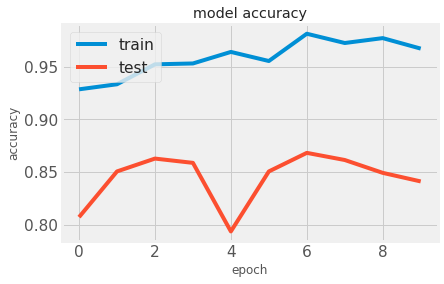

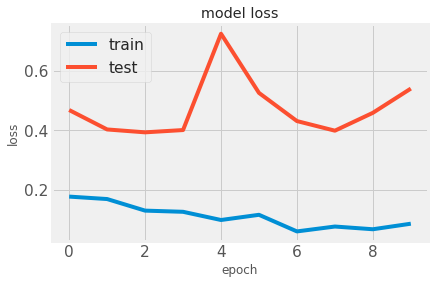

In [ ]:
#ResNet50V2
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.applications import ResNet50V2

baseModel = ResNet50V2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = MaxPooling2D(pool_size=(7, 7))(headModel)

headModel = Flatten(name="flatten")(headModel)
headModel = Dense(256, activation="relu")(headModel)
#headModel = Dropout(0.5)(headModel)
headModel = Dense(1, activation="sigmoid")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the training process
for layer in baseModel.layers:
	layer.trainable = False


opt = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // 32,
    epochs = 10)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4994: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`binary_crossentropy` received `from_logits=True`, but the `output`'


389/389 [==============================] - 420s 1s/step - loss: 1.0470 - accuracy: 0.6361 - val_loss: 0.6499 - val_accuracy: 0.6521
Epoch 2/10
389/389 [==============================] - 236s 607ms/step - loss: 0.6440 - accuracy: 0.6652 - val_loss: 0.6411 - val_accuracy: 0.6664
Epoch 3/10
389/389 [==============================] - 226s 580ms/step - loss: 0.6397 - accuracy: 0.6666 - val_loss: 0.6392 - val_accuracy: 0.6667
Epoch 4/10
389/389 [==============================] - 219s 562ms/step - loss: 0.6382 - accuracy: 0.6667 - val_loss: 0.6389 - val_accuracy: 0.6667
Epoch 5/10
389/389 [==============================] - 218s 560ms/step - loss: 0.6375 - accuracy: 0.6667 - val_loss: 0.6374 - val_accuracy: 0.6667
Epoch 6/10
389/389 [==============================] - 222s 570ms/step - loss: 0.6371 - accuracy: 0.6667 - val_loss: 0.6373 - val_accuracy: 0.6667
Epoch 7/10
389/389 [==============================] - 223s 573ms/step - loss: 0.6369 - accuracy: 0.6667 - val_loss: 0.6369 - val_accuracy:

16719872/16705208 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4994: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`binary_crossentropy` received `from_logits=True`, but the `output`'


188/188 [==============================] - 108s 532ms/step - loss: 1.1207 - accuracy: 0.5000 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 2/10
188/188 [==============================] - 100s 529ms/step - loss: 0.7094 - accuracy: 0.5000 - val_loss: 0.7120 - val_accuracy: 0.5000
Epoch 3/10
188/188 [==============================] - 97s 514ms/step - loss: 0.7263 - accuracy: 0.5000 - val_loss: 0.6996 - val_accuracy: 0.5000
Epoch 4/10
188/188 [==============================] - 97s 516ms/step - loss: 0.7128 - accuracy: 0.5000 - val_loss: 0.7195 - val_accuracy: 0.5000
Epoch 5/10
188/188 [==============================] - 97s 517ms/step - loss: 0.7096 - accuracy: 0.5000 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 6/10
188/188 [==============================] - 100s 530ms/step - loss: 0.7191 - accuracy: 0.5000 - val_loss: 0.6989 - val_accuracy: 0.5000
Epoch 7/10
188/188 [==============================] - 98s 523ms/step - loss: 0.6941 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 

In [ ]:


from tensorflow.keras.applications import EfficientNetB0

baseModel = EfficientNetB0(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = MaxPooling2D(pool_size=(7, 7))(headModel)

headModel = Flatten(name="flatten")(headModel)
headModel = Dense(256, activation="relu")(headModel)
#headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="sigmoid")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the training process
for layer in baseModel.layers:
	layer.trainable = False


opt = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

history=model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // 32,
    epochs = 10)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
188/188 [==============================] - 132s 540ms/step - loss: 1.5236 - accuracy: 0.4894 - val_loss: 0.8214 - val_accuracy: 0.5122
Epoch 2/10
188/188 [==============================] - 98s 521ms/step - loss: 0.8634 - accuracy: 0.5056 - val_loss: 1.2164 - val_accuracy: 0.4837
Epoch 3/10
188/188 [==============================] - 99s 528ms/step - loss: 0.7745 - accuracy: 0.5084 - val_loss: 0.6931 - val_accuracy: 0.5095
Epoch 4/10
188/188 [==============================] - 103s 547ms/step - loss: 0.7996 - accuracy: 0.5029 - val_loss: 0.6995 - val_accuracy: 0.5136
Epoch 5/10
188/188 [==============================] - 103s 549ms/step - loss: 0.7646 - accuracy: 0.5127 - val_loss: 1.1472 - val_accuracy: 0.4823
Epoch 6/10
188/188 [==============================] - 103s 546ms/step - loss: 0.7308 - accuracy: 0.5077 - val_loss: 0.7073 - val_accuracy: 0.5068
Epoch 7/10
188/188 [==============================] - 102s 544ms/step - loss: 0.7241 - accuracy: 0.4968 - val_loss: 0.7031 - v

In [ ]:


from tensorflow.keras.applications import EfficientNetB0

baseModel = EfficientNetB0(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = MaxPooling2D(pool_size=(7, 7))(headModel)

headModel = Flatten(name="flatten")(headModel)
headModel = Dense(256, activation="relu")(headModel)
#headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="sigmoid")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the training process
for layer in baseModel.layers:
	layer.trainable = False


opt = tf.keras.optimizers.SGD(lr=0.0001)
model.compile(optimizer=opt,
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

history=model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // 32,
    epochs = 10)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
188/188 [==============================] - 111s 553ms/step - loss: 1.4476 - accuracy: 0.5107 - val_loss: 1.4005 - val_accuracy: 0.4864
Epoch 2/10
188/188 [==============================] - 100s 531ms/step - loss: 0.7528 - accuracy: 0.5026 - val_loss: 0.7471 - val_accuracy: 0.4891
Epoch 3/10
188/188 [==============================] - 100s 530ms/step - loss: 0.7262 - accuracy: 0.4996 - val_loss: 0.6925 - val_accuracy: 0.5190
Epoch 4/10
188/188 [==============================] - 100s 530ms/step - loss: 0.7159 - accuracy: 0.5016 - val_loss: 0.6937 - val_accuracy: 0.4891
Epoch 5/10
188/188 [==============================] - 100s 531ms/step - loss: 0.7055 - accuracy: 0.5086 - val_loss: 0.6924 - val_accuracy: 0.5190
Epoch 6/10
188/188 [==============================] - 100s 534ms/step - loss: 0.7051 - accuracy: 0.5036 - val_loss: 0.7053 - val_accuracy: 0.4891


Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f61a3163320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


Epoch 7/10
 27/188 [===>..........................] - ETA: 1:18 - loss: 0.7007 - accuracy: 0.5093

KeyboardInterrupt: ignored

In [ ]:

baseModel = EfficientNetB0(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = MaxPooling2D(pool_size=(7, 7))(headModel)

headModel = Flatten(name="flatten")(headModel)
headModel = Dense(256, activation="relu")(headModel)
#headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="sigmoid")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
for layer in baseModel.layers[-20:]:
  if not isinstance(layer, layers.BatchNormalization):
      layer.trainable = True

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(
  optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
)


In [ ]:
epochs = 10  # @param {type: "slider", min:8, max:50}
hist = model.fit(train_generator, epochs=epochs, validation_data=validation_generator, verbose=2)


Epoch 1/10
189/189 - 140s - loss: 0.8797 - accuracy: 0.6657 - val_loss: 1.2848 - val_accuracy: 0.4887
Epoch 2/10
189/189 - 124s - loss: 0.4014 - accuracy: 0.8311 - val_loss: 0.7690 - val_accuracy: 0.5404
Epoch 3/10
189/189 - 122s - loss: 0.2434 - accuracy: 0.8976 - val_loss: 0.9512 - val_accuracy: 0.5523
Epoch 4/10
189/189 - 122s - loss: 0.1504 - accuracy: 0.9431 - val_loss: 0.8997 - val_accuracy: 0.6781
Epoch 5/10
189/189 - 122s - loss: 0.1118 - accuracy: 0.9593 - val_loss: 0.8614 - val_accuracy: 0.5523
Epoch 6/10
189/189 - 123s - loss: 0.0946 - accuracy: 0.9666 - val_loss: 0.8384 - val_accuracy: 0.5788
Epoch 7/10
189/189 - 123s - loss: 0.0636 - accuracy: 0.9778 - val_loss: 0.8878 - val_accuracy: 0.6252
Epoch 8/10
189/189 - 122s - loss: 0.0545 - accuracy: 0.9805 - val_loss: 1.9333 - val_accuracy: 0.5152
Epoch 9/10
189/189 - 122s - loss: 0.0591 - accuracy: 0.9778 - val_loss: 0.8254 - val_accuracy: 0.5854
Epoch 10/10
189/189 - 122s - loss: 0.0445 - accuracy: 0.9825 - val_loss: 2.5626 - 

NameError: ignored

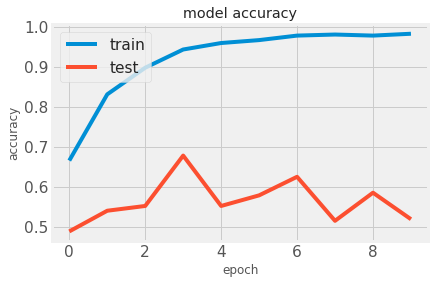

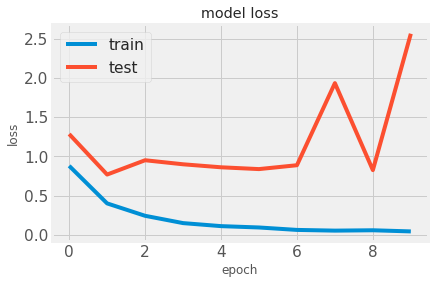

In [ ]:
#EfficientNetB0 for 20 unfreeze
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(test_generator)

24/24 [==============================] - 12s 489ms/step - loss: 2.6733 - accuracy: 0.5258


[2.673306703567505, 0.5257595777511597]

In [ ]:
baseModel = (weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = MaxPooling2D(pool_size=(7, 7))(headModel)

headModel = Flatten(name="flatten")(headModel)
headModel = Dense(256, activation="relu")(headModel)
#headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="sigmoid")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
for layer in baseModel.layers[-20:]:
  if not isinstance(layer, layers.BatchNormalization):
      layer.trainable = True

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(
  optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
)

In [ ]:
import os 
i=0
x=[]
for file in os.listdir("/content/drive/MyDrive/images_covid/train/covid"):
    if file.endswith('.jpg'):

        i+=1
print('the total number of files: ' +str(i))

the total number of files: 586


In [ ]:
import os
try:
    os.makedirs('/content/drive/MyDrive/central_images')
except OSError:
    pass

In [ ]:
import os
try:
    os.makedirs('/content/drive/MyDrive/central_images/LT')
except OSError:
    pass

In [ ]:
import os
try:
    os.makedirs('/content/drive/MyDrive/central_images/non_LT')
except OSError:
    pass

In [ ]:

%cd '/content/drive/MyDrive/Colab Notebooks/DEEPCOVID/'
path = '/content/drive/MyDrive/covid/'

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/DEEPCOVID/'
/content


In [ ]:
#test subsamples

ids_covid = np.sort(next(os.walk(path+'COVID/' ))[1])       #folder name
print('number of COVID cases:', len(ids_covid))
############
df = pd.read_excel(path+'demoghraphic data/DEMOGRAPHIC DATA_final.xlsx')
# for i in range(len(df['file_number'])):
#     df['file_number'][i]= 'S'+ str(int(df['file_number'][i]))

sys.stdout.flush()
GGO=0
COVID=np.zeros((1, 224, 224,1), dtype=np.float32)
for id_ in ids_covid:
    print(id_)
    ids=next(os.walk(path + 'COVID/'+id_))[2]                 #image name
    a=df.loc[df['file_number']==id_,'Patient number'].to_string()
    a=a[-4:]
    df1 = pd.read_excel(path+'demoghraphic data/'+a+'.xlsx')   #excel file for each patient
    df1 = df1.fillna(0)
    b=df1.loc[df1['LT-central']==1,'image number'].array
    
    #df1['GGO']=df1['RT-GGO']+df1['LT-GGO']-df1['RT-GGO']*df1['LT-GGO']# erturn those slides with at least one GGO in left or right or both
    #df.loc[df['file_number']==id_,'GGO']=np.sum(df1['GGO']) # save the numbers of slides with above condition
    # GGO=GGO+np.sum(df1['GGO'])
    #b=df1.loc[(df1['central']==1 ), 'image number'].array
    b=shuffle(b)
    L=50
    if len(b)<50:
      L=len(b)
    b=b[:L]
    print("len b : ", len(b))
    directory= '/content/drive/MyDrive/central_images/LT'
    for n,id1 in tqdm(enumerate(b), total=len(b)): 
    
         img = cv2.imread(path+'COVID/'+id_+'/'+id1+'.jpg') 
         os.chdir(directory)
      
          # List files and directories  
          # in 'C:/Users/Rajnish/Desktop/GeeksforGeeks'  
            
            
          # Filename
         filename = id1+'.jpg'
            
          # Using cv2.imwrite() method
          # Saving the image
         cv2.imwrite(filename, img)
   
            

     



number of COVID cases: 178
S472710
len b :  0


0it [00:00, ?it/s]


S472720
len b :  0


0it [00:00, ?it/s]


S472730
len b :  0


0it [00:00, ?it/s]


S472790
len b :  31


100%|██████████| 31/31 [00:01<00:00, 30.58it/s]


S473770
len b :  0


0it [00:00, ?it/s]


S474760
len b :  0


0it [00:00, ?it/s]


S474770
len b :  0


0it [00:00, ?it/s]


S474970
len b :  0


0it [00:00, ?it/s]


S475070
len b :  0


0it [00:00, ?it/s]


S475100
len b :  0


0it [00:00, ?it/s]


S475330
len b :  0


0it [00:00, ?it/s]


S475630
len b :  0


0it [00:00, ?it/s]


S475670
len b :  0


0it [00:00, ?it/s]


S475840
len b :  0


0it [00:00, ?it/s]


S476350
len b :  0


0it [00:00, ?it/s]


S476380
len b :  0


0it [00:00, ?it/s]


S476710
len b :  0


0it [00:00, ?it/s]

S476990


len b :  0


0it [00:00, ?it/s]

S477560


len b :  0


0it [00:00, ?it/s]

S477690


len b :  0


0it [00:00, ?it/s]


S477730
len b :  0


0it [00:00, ?it/s]

S477750


len b :  0


0it [00:00, ?it/s]

S477760


len b :  0


0it [00:00, ?it/s]

S477770


len b :  0


0it [00:00, ?it/s]


S477970
len b :  0


0it [00:00, ?it/s]


S477990
len b :  0


0it [00:00, ?it/s]

S478000


len b :  0


0it [00:00, ?it/s]


S478020
len b :  0


0it [00:00, ?it/s]


S478690
len b :  0


0it [00:00, ?it/s]

S478710


len b :  15


100%|██████████| 15/15 [00:00<00:00, 23.28it/s]


S478940
len b :  0


0it [00:00, ?it/s]


S479000
len b :  0


0it [00:00, ?it/s]


S479320
len b :  0


0it [00:00, ?it/s]


S479340
len b :  9


100%|██████████| 9/9 [00:00<00:00, 29.38it/s]


S479360
len b :  0


0it [00:00, ?it/s]


S479370
len b :  0


0it [00:00, ?it/s]


S479410
len b :  0


0it [00:00, ?it/s]


S479550
len b :  0


0it [00:00, ?it/s]


S479590
len b :  0


0it [00:00, ?it/s]


S479610
len b :  25


100%|██████████| 25/25 [00:01<00:00, 22.86it/s]


S479670
len b :  0


0it [00:00, ?it/s]


S479940
len b :  0


0it [00:00, ?it/s]


S479980
len b :  0


0it [00:00, ?it/s]


S480000
len b :  17


100%|██████████| 17/17 [00:00<00:00, 27.12it/s]


S480010
len b :  0


0it [00:00, ?it/s]


S480020
len b :  0


0it [00:00, ?it/s]


S480040
len b :  0


0it [00:00, ?it/s]


S480050
len b :  13


100%|██████████| 13/13 [00:00<00:00, 23.01it/s]


S480250
len b :  50


100%|██████████| 50/50 [00:14<00:00,  3.53it/s]


S480300
len b :  0


0it [00:00, ?it/s]


S480330
len b :  0


0it [00:00, ?it/s]


S480340
len b :  0


0it [00:00, ?it/s]


S480360
len b :  0


0it [00:00, ?it/s]


S480410
len b :  0


0it [00:00, ?it/s]


S480430
len b :  0


0it [00:00, ?it/s]


S480450
len b :  0


0it [00:00, ?it/s]


S480460
len b :  0


0it [00:00, ?it/s]


S480760
len b :  0


0it [00:00, ?it/s]

S480820


len b :  0


0it [00:00, ?it/s]

S481420


len b :  0


0it [00:00, ?it/s]


S481430
len b :  0


0it [00:00, ?it/s]

S481470


len b :  0


0it [00:00, ?it/s]

S481540


len b :  0


0it [00:00, ?it/s]


S481550
len b :  0


0it [00:00, ?it/s]


S481580
len b :  0


0it [00:00, ?it/s]


S481590
len b :  0


0it [00:00, ?it/s]


S481700
len b :  0


0it [00:00, ?it/s]


S481710
len b :  0


0it [00:00, ?it/s]


S481720
len b :  0


0it [00:00, ?it/s]

S481730


len b :  0


0it [00:00, ?it/s]


S481790
len b :  0


0it [00:00, ?it/s]

S482050


len b :  0


0it [00:00, ?it/s]


S482160
len b :  0


0it [00:00, ?it/s]


S482640
len b :  0


0it [00:00, ?it/s]

S482870


len b :  0


0it [00:00, ?it/s]

S482960


len b :  0


0it [00:00, ?it/s]

S482970


len b :  0


0it [00:00, ?it/s]

S482980


len b :  0


0it [00:00, ?it/s]

S483210


len b :  0


0it [00:00, ?it/s]

S483220


len b :  19


100%|██████████| 19/19 [00:00<00:00, 25.81it/s]


S483280
len b :  0


0it [00:00, ?it/s]


S483340
len b :  0


0it [00:00, ?it/s]


S483360
len b :  0


0it [00:00, ?it/s]


S483380
len b :  0


0it [00:00, ?it/s]


S483390
len b :  0


0it [00:00, ?it/s]


S483450
len b :  0


0it [00:00, ?it/s]

S483460


len b :  0


0it [00:00, ?it/s]


S483530
len b :  0


0it [00:00, ?it/s]


S483570
len b :  0


0it [00:00, ?it/s]


S483920
len b :  0


0it [00:00, ?it/s]


S484050
len b :  0


0it [00:00, ?it/s]


S484180
len b :  15


100%|██████████| 15/15 [00:00<00:00, 22.53it/s]


S484210
len b :  0


0it [00:00, ?it/s]


S484310
len b :  0


0it [00:00, ?it/s]


S484340
len b :  0


0it [00:00, ?it/s]


S484580
len b :  0


0it [00:00, ?it/s]


S484610
len b :  0


0it [00:00, ?it/s]


S484640
len b :  0


0it [00:00, ?it/s]


S484680
len b :  23


100%|██████████| 23/23 [00:00<00:00, 25.97it/s]


S484840
len b :  0


0it [00:00, ?it/s]


S484850
len b :  0


0it [00:00, ?it/s]


S484860
len b :  0


0it [00:00, ?it/s]


S484900
len b :  0


0it [00:00, ?it/s]


S485010
len b :  11


100%|██████████| 11/11 [00:00<00:00, 20.18it/s]


S485020
len b :  0


0it [00:00, ?it/s]


S485030
len b :  0


0it [00:00, ?it/s]


S485060
len b :  0


0it [00:00, ?it/s]


S485350
len b :  0


0it [00:00, ?it/s]


S485380
len b :  0


0it [00:00, ?it/s]


S485460
len b :  0


0it [00:00, ?it/s]


S485470
len b :  0


0it [00:00, ?it/s]


S485480
len b :  0


0it [00:00, ?it/s]


S486160
len b :  0


0it [00:00, ?it/s]


S486200
len b :  0


0it [00:00, ?it/s]


S486230
len b :  0


0it [00:00, ?it/s]

S486250


len b :  0


0it [00:00, ?it/s]


S486340
len b :  0


0it [00:00, ?it/s]


S486360
len b :  0


0it [00:00, ?it/s]


S486480
len b :  0


0it [00:00, ?it/s]


S486490
len b :  0


0it [00:00, ?it/s]

S486660


len b :  0


0it [00:00, ?it/s]


S486730
len b :  0


0it [00:00, ?it/s]

S486740


len b :  0


0it [00:00, ?it/s]


S486900
len b :  0


0it [00:00, ?it/s]

S486911


len b :  0


0it [00:00, ?it/s]

S486930


len b :  0


0it [00:00, ?it/s]

S486940


len b :  50


100%|██████████| 50/50 [00:27<00:00,  1.83it/s]


S486960
len b :  0


0it [00:00, ?it/s]


S487270
len b :  0


0it [00:00, ?it/s]


S487450
len b :  0


0it [00:00, ?it/s]


S487540
len b :  0


0it [00:00, ?it/s]


S487560
len b :  35


100%|██████████| 35/35 [00:02<00:00, 12.15it/s]


S487970
len b :  0


0it [00:00, ?it/s]


S487980
len b :  0


0it [00:00, ?it/s]


S487990
len b :  0


0it [00:00, ?it/s]


S488000
len b :  0


0it [00:00, ?it/s]


S488040
len b :  50


100%|██████████| 50/50 [00:23<00:00,  2.12it/s]


S488050
len b :  0


0it [00:00, ?it/s]


S488250
len b :  0


0it [00:00, ?it/s]


S488270
len b :  0


0it [00:00, ?it/s]


S488370
len b :  0


0it [00:00, ?it/s]


S488430
len b :  0


0it [00:00, ?it/s]


S488640
len b :  0


0it [00:00, ?it/s]


S488650
len b :  0


0it [00:00, ?it/s]


S488670
len b :  0


0it [00:00, ?it/s]


S488690
len b :  0


0it [00:00, ?it/s]


S488710
len b :  0


0it [00:00, ?it/s]


S488720
len b :  0


0it [00:00, ?it/s]


S488740
len b :  0


0it [00:00, ?it/s]

S488760


len b :  0


0it [00:00, ?it/s]

S488800


len b :  0


0it [00:00, ?it/s]

S489010


len b :  0


0it [00:00, ?it/s]

S489050


len b :  0


0it [00:00, ?it/s]

S489060


len b :  0


0it [00:00, ?it/s]

S489090


len b :  50


100%|██████████| 50/50 [00:27<00:00,  1.84it/s]


S489100
len b :  0


0it [00:00, ?it/s]


S489120
len b :  0


0it [00:00, ?it/s]


S489130
len b :  50


100%|██████████| 50/50 [00:25<00:00,  1.98it/s]


S489140
len b :  0


0it [00:00, ?it/s]


S489190
len b :  0


0it [00:00, ?it/s]


S489200
len b :  0


0it [00:00, ?it/s]


S489380
len b :  0


0it [00:00, ?it/s]


S489390
len b :  0


0it [00:00, ?it/s]


S489440
len b :  29


100%|██████████| 29/29 [00:01<00:00, 24.33it/s]


S489470
len b :  0


0it [00:00, ?it/s]


S489480
len b :  0


0it [00:00, ?it/s]


S489700
len b :  0


0it [00:00, ?it/s]


S489710
len b :  50


100%|██████████| 50/50 [00:30<00:00,  1.62it/s]


S489720
len b :  0


0it [00:00, ?it/s]


S489740
len b :  0


0it [00:00, ?it/s]


S489810
len b :  0


0it [00:00, ?it/s]


S489820
len b :  50


100%|██████████| 50/50 [00:31<00:00,  1.61it/s]


S489860
len b :  0


0it [00:00, ?it/s]


S490220
len b :  50


100%|██████████| 50/50 [00:28<00:00,  1.78it/s]


S490230
len b :  0


0it [00:00, ?it/s]


S490240
len b :  39


100%|██████████| 39/39 [00:04<00:00,  8.07it/s]


S490310
len b :  0


0it [00:00, ?it/s]


S490330
len b :  0


0it [00:00, ?it/s]


In [ ]:
#test subsamples

ids_covid = np.sort(next(os.walk(path+'COVID/' ))[1])       #folder name
print('number of COVID cases:', len(ids_covid))
############
df = pd.read_excel(path+'demoghraphic data/DEMOGRAPHIC DATA_final.xlsx')
# for i in range(len(df['file_number'])):
#     df['file_number'][i]= 'S'+ str(int(df['file_number'][i]))

sys.stdout.flush()
GGO=0
COVID=np.zeros((1, 224, 224,1), dtype=np.float32)
for id_ in ids_covid:
    print(id_)
    ids=next(os.walk(path + 'COVID/'+id_))[2]                 #image name
    a=df.loc[df['file_number']==id_,'Patient number'].to_string()
    a=a[-4:]
    df1 = pd.read_excel(path+'demoghraphic data/'+a+'.xlsx')   #excel file for each patient
    df1 = df1.fillna(0)
    b=df1.loc[df1['LT-central']==0,'image number'].array
    
    #df1['GGO']=df1['RT-GGO']+df1['LT-GGO']-df1['RT-GGO']*df1['LT-GGO']# erturn those slides with at least one GGO in left or right or both
    #df.loc[df['file_number']==id_,'GGO']=np.sum(df1['GGO']) # save the numbers of slides with above condition
    # GGO=GGO+np.sum(df1['GGO'])
    #b=df1.loc[(df1['central']==1 ), 'image number'].array
    b=shuffle(b)
    L=5
    if len(b)<5:
      L=len(b)
    b=b[:L]
    print("len b : ", len(b))
    directory= '/content/drive/MyDrive/central_images/non_LT'
    for n,id1 in tqdm(enumerate(b), total=len(b)): 
          if type(id1)==str:
    

            img = cv2.imread(path+'COVID/'+id_+'/'+id1+'.jpg') 
            if(img is not None):
            
              os.chdir(directory)
              filename = id1+'.jpg'
              cv2.imwrite(filename, img)
            
              

      



number of COVID cases: 178
S472710
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.74it/s]


S472720
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.91it/s]


S472730
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.79it/s]


S472790
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.14it/s]


S473770
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.05it/s]


S474760
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.23it/s]


S474770
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.16it/s]


S474970
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.96it/s]


S475070
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.86it/s]


S475100
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.14it/s]


S475330
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.81it/s]


S475630
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.28it/s]


S475670
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.88it/s]


S475840
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.28it/s]


S476350
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.18it/s]


S476380
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.89it/s]


S476710
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.96it/s]


S476990
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.14it/s]


S477560
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.09it/s]


S477690
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.34it/s]


S477730
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.02it/s]


S477750
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.15it/s]


S477760
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.76it/s]


S477770
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.82it/s]


S477970
len b :  5


100%|██████████| 5/5 [00:01<00:00,  4.29it/s]


S477990
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.35it/s]


S478000
len b :  5


100%|██████████| 5/5 [00:01<00:00,  4.76it/s]


S478020
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.14it/s]


S478690
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.27it/s]


S478710
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.11it/s]


S478940
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.30it/s]


S479000
len b :  5


100%|██████████| 5/5 [00:00<00:00, 746.96it/s]


S479320
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.16it/s]


S479340
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.82it/s]


S479360
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.94it/s]


S479370
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.09it/s]


S479410
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.73it/s]


S479550
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.36it/s]


S479590
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.96it/s]


S479610
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.01it/s]


S479670
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.43it/s]


S479940
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.95it/s]


S479980
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.99it/s]


S480000
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.39it/s]


S480010
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.24it/s]


S480020
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.94it/s]


S480040
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.97it/s]


S480050
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.86it/s]


S480250
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.89it/s]


S480300
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.07it/s]


S480330
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.01it/s]


S480340
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.54it/s]


S480360
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.07it/s]


S480410
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.90it/s]


S480430
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.72it/s]


S480450
len b :  5


100%|██████████| 5/5 [00:01<00:00,  4.71it/s]


S480460
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.27it/s]


S480760
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.25it/s]


S480820
len b :  5


100%|██████████| 5/5 [00:00<00:00, 759.29it/s]


S481420
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.83it/s]


S481430
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.90it/s]


S481470
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.92it/s]


S481540
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.06it/s]


S481550
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.68it/s]


S481580
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.65it/s]


S481590
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.06it/s]


S481700
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.15it/s]


S481710
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.42it/s]


S481720
len b :  5


100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


S481730
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.13it/s]


S481790
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.27it/s]


S482050
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.17it/s]


S482160
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.75it/s]


S482640
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.27it/s]


S482870
len b :  5


100%|██████████| 5/5 [00:01<00:00,  4.14it/s]


S482960
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.43it/s]


S482970
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.95it/s]


S482980
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.00it/s]


S483210
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.16it/s]


S483220
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.43it/s]


S483280
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.00it/s]


S483340
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.10it/s]


S483360
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.07it/s]


S483380
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.99it/s]


S483390
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.24it/s]


S483450
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.70it/s]


S483460
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.20it/s]


S483530
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.03it/s]


S483570
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.63it/s]


S483920
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.09it/s]


S484050
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.00it/s]


S484180
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.35it/s]


S484210
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.26it/s]


S484310
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.24it/s]


S484340
len b :  5


100%|██████████| 5/5 [00:00<00:00,  5.94it/s]


S484580
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.13it/s]


S484610
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.06it/s]


S484640
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.14it/s]


S484680
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.28it/s]


S484840
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.54it/s]


S484850
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.73it/s]


S484860
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.81it/s]


S484900
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.77it/s]


S485010
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.88it/s]


S485020
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.13it/s]


S485030
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.15it/s]


S485060
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.03it/s]


S485350
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.99it/s]


S485380
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.01it/s]


S485460
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.76it/s]


S485470
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.98it/s]


S485480
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.97it/s]


S486160
len b :  5


100%|██████████| 5/5 [00:02<00:00,  2.44it/s]


S486200
len b :  5


100%|██████████| 5/5 [00:02<00:00,  2.26it/s]


S486230
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.08it/s]


S486250
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.00it/s]


S486340
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.93it/s]


S486360
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.52it/s]


S486480
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.69it/s]


S486490
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.31it/s]


S486660
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.01it/s]


S486730
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.66it/s]


S486740
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.03it/s]


S486900
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.37it/s]


S486911
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.74it/s]


S486930
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.80it/s]


S486940
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.88it/s]


S486960
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.03it/s]


S487270
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.93it/s]


S487450
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.78it/s]


S487540
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.55it/s]


S487560
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.53it/s]


S487970
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.99it/s]


S487980
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.97it/s]


S487990
len b :  5


100%|██████████| 5/5 [00:00<00:00, 636.64it/s]

S488000


len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.25it/s]


S488040
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.63it/s]


S488050
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.30it/s]


S488250
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.15it/s]


S488270
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.85it/s]


S488370
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.18it/s]


S488430
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.99it/s]


S488640
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.80it/s]


S488650
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.09it/s]


S488670
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.83it/s]


S488690
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.76it/s]


S488710
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.00it/s]


S488720
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.89it/s]


S488740
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.92it/s]


S488760
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.00it/s]


S488800
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.93it/s]


S489010
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.90it/s]


S489050
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.71it/s]


S489060
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.11it/s]


S489090
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.94it/s]


S489100
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.94it/s]


S489120
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.27it/s]


S489130
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.17it/s]


S489140
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.82it/s]


S489190
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.32it/s]


S489200
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.34it/s]


S489380
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.13it/s]


S489390
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.43it/s]


S489440
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.64it/s]


S489470
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.95it/s]


S489480
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.13it/s]


S489700
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.12it/s]


S489710
len b :  3


100%|██████████| 3/3 [00:00<00:00,  3.57it/s]


S489720
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.88it/s]


S489740
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.18it/s]


S489810
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.86it/s]


S489820
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.94it/s]


S489860
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.90it/s]


S490220
len b :  0


0it [00:00, ?it/s]

S490230


len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.10it/s]


S490240
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.69it/s]


S490310
len b :  5


100%|██████████| 5/5 [00:01<00:00,  2.98it/s]


S490330
len b :  5


100%|██████████| 5/5 [00:01<00:00,  3.01it/s]


In [ ]:
#####

In [ ]:
#####

In [ ]:
#####

In [ ]:
######

In [ ]:
#####

In [ ]:

import os
import sys
import shutil


try:
    shutil.rmtree('/content/drive/MyDrive/Untitled Folder')
except OSError as e:
    print("Error: %s - %s." % (e.filename, e.strerror))

In [ ]:

import os
try:
    os.makedirs('/content/drive/MyDrive/splited_subclasses')
except OSError:
    pass

In [ ]:
pip install split_folders

In [ ]:
# remove duplicate files in train and test 

In [ ]:
unique

['C007_075.jpg',
 'C007_070.jpg',
 'C007_073.jpg',
 'C007_071.jpg',
 'C007_074.jpg',
 'C007_072.jpg']

In [ ]:
dir='/content/drive/MyDrive/central_images_patient-wise/test/RGGO'
unique = []
files_unique= []
for filename in os.listdir(dir):
  unique.append(filename)
  files_unique.append(filename[:4])
     


In [ ]:
# check duplicate file
dir='/content/drive/MyDrive/central_images_patient-wise/train/RTGGO'

for filename in os.listdir(dir):
  if filename in unique:
    filepath=os.path.join(dir, filename)

    print(filename)
    os.remove(filepath)


  




In [ ]:
# check uniqueness of patients 




dir='/content/drive/MyDrive/central_images_patient-wise/train/RGGO'

for filename in os.listdir(dir):
  split=filename[:4]
  #print(split)
  if split in files_unique:
    filepath=os.path.join(dir, filename)
    
    print(filename)
    os.remove(filepath)

In [ ]:
#import splitfolders

#main_dir = '/content/drive/MyDrive/subclasses'
output_dir = '/content/drive/MyDrive/central_images_patient-wise'
#splitfolders.ratio(main_dir, output=output_dir, seed=1337, ratio=(.8, .1, .1))
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./224)
train_generator = train_datagen.flow_from_directory(os.path.join(output_dir,'train'),
                                                    class_mode='categorical',                                      
                                                    batch_size=32,
                                                    target_size=(500,500),
                                                    shuffle=True)

validation_generator = train_datagen.flow_from_directory(os.path.join(output_dir,'test'),
                                                        target_size=(500, 500),
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        shuffle=True) # set as validation data
test_generator= train_datagen.flow_from_directory(os.path.join(output_dir,'test'),
                                                  target_size=(500,500),batch_size=32,class_mode='categorical',shuffle=True)



Found 1561 images belonging to 4 classes.
Found 576 images belonging to 4 classes.
Found 576 images belonging to 4 classes.


In [ ]:
train_generator

In [ ]:
model = Sequential()
model.add(Conv2D(256 , (3,3) , strides = 1 ,input_shape =(224,224,3), padding = 'same' , activation = 'relu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 4 , activation = 'sigmoid'))

In [ ]:
OPTIMIZER = tf.keras.optimizers.Adam(lr = 0.0001, decay = 1e-5)
METRICS = [            
  'acc']
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=OPTIMIZER,metrics=METRICS)
early_stop = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=False)
history = model.fit(
   train_generator,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = test_generator,
    validation_steps = test_generator.samples // 32,
    epochs=10,
    callbacks=early_stop,
    #class_weight=class_weight
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
48/48 [==============================] - 59s 933ms/step - loss: 1.1411 - acc: 0.5507 - val_loss: 3.0339 - val_acc: 0.0104
Epoch 2/10
48/48 [==============================] - 42s 867ms/step - loss: 0.5831 - acc: 0.7175 - val_loss: 4.5111 - val_acc: 0.0104
Epoch 3/10
48/48 [==============================] - 39s 815ms/step - loss: 0.4253 - acc: 0.8228 - val_loss: 5.1164 - val_acc: 0.0104
Epoch 4/10
48/48 [==============================] - 40s 823ms/step - loss: 0.3538 - acc: 0.8528 - val_loss: 4.5867 - val_acc: 0.0104


In [ ]:
model.save('model_M2_subclasses.h5')

In [ ]:
from keras.models import load_model
model=load_model('model_M2_subclasses.h5')

In [ ]:
OPTIMIZER = tf.keras.optimizers.Adam(lr = 0.0001, decay = 1e-5)
METRICS = [            
  'acc']
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=OPTIMIZER,metrics=METRICS)
early_stop = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=False)
history = model.fit(
   train_generator,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = test_generator,
    validation_steps = test_generator.samples // 32,
    epochs=10,
    callbacks=early_stop,
    #class_weight=class_weight
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
110/110 [==============================] - 73s 650ms/step - loss: 0.4455 - acc: 0.8287 - val_loss: 0.6373 - val_acc: 0.7091
Epoch 2/10
110/110 [==============================] - 71s 642ms/step - loss: 0.4054 - acc: 0.8432 - val_loss: 0.6289 - val_acc: 0.7452
Epoch 3/10
110/110 [==============================] - 71s 643ms/step - loss: 0.3985 - acc: 0.8481 - val_loss: 0.6279 - val_acc: 0.7548
Epoch 4/10
110/110 [==============================] - 71s 639ms/step - loss: 0.3858 - acc: 0.8427 - val_loss: 0.6790 - val_acc: 0.7188
Epoch 5/10
110/110 [==============================] - 72s 648ms/step - loss: 0.3795 - acc: 0.8490 - val_loss: 0.6666 - val_acc: 0.7524
Epoch 6/10
110/110 [==============================] - 71s 646ms/step - loss: 0.3426 - acc: 0.8587 - val_loss: 0.6979 - val_acc: 0.7284


In [ ]:
model.evaluate(test_generator)

14/14 [==============================] - 9s 662ms/step - loss: 0.6820 - acc: 0.7302


[0.6819745898246765, 0.7301587462425232]

In [ ]:
from keras.models import load_model
history=load_model('/content/Best-Model-FT.h5')

In [ ]:
model=history

In [ ]:
for layer in model.layers:
  layer.trainable=False

In [ ]:
for layer in model.layers[-10:]:
   if not isinstance(layer, BatchNormalization):
       layer.trainable=True

In [ ]:
def build_model():
  
  model=history
  for layer in model.layers:
    layer.trainable=False
    
  for layer in model.layers[-10:]:
   if not isinstance(layer, BatchNormalization):
       layer.trainable=True
  return model     

In [ ]:
model= build_model()

In [ ]:
for idx in range(len(model.layers)):
  print(model.get_layer(index = idx).name)

In [ ]:
from keras.models import Model

layer_name = 'Batch-Normalization-3'
new_model= Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# added layers 

model2 = Sequential()
model2.add(new_model)
model2.add(Dense(units= 4, activation='sigmoid'))



In [ ]:
OPTIMIZER = tf.keras.optimizers.Adam(lr = 0.0001, decay = 1e-5)
METRICS = [            
  'acc']
model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=OPTIMIZER,metrics=METRICS)
early_stop = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=False)
history = model2.fit(
   train_generator,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = test_generator,
    validation_steps = test_generator.samples // 32,
    epochs=10,
    callbacks=early_stop,
    #class_weight=class_weight
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
110/110 [==============================] - 91s 711ms/step - loss: 1.3607 - acc: 0.4293 - val_loss: 1.1997 - val_acc: 0.5120
Epoch 2/10
110/110 [==============================] - 72s 648ms/step - loss: 1.1427 - acc: 0.5429 - val_loss: 1.0853 - val_acc: 0.5793
Epoch 3/10
110/110 [==============================] - 70s 643ms/step - loss: 1.0267 - acc: 0.6093 - val_loss: 1.0389 - val_acc: 0.5938
Epoch 4/10
110/110 [==============================] - 71s 641ms/step - loss: 0.9416 - acc: 0.6582 - val_loss: 0.9304 - val_acc: 0.6202
Epoch 5/10
110/110 [==============================] - 71s 646ms/step - loss: 0.8782 - acc: 0.6842 - val_loss: 0.9173 - val_acc: 0.6250
Epoch 6/10
110/110 [==============================] - 71s 646ms/step - loss: 0.8382 - acc: 0.7074 - val_loss: 0.8610 - val_acc: 0.6587
Epoch 7/10
110/110 [==============================] - 72s 650ms/step - loss: 0.7815 - acc: 0.7360 - val_loss: 0.8535 - val_acc: 0.6611
Epoch 8/10
110/110 [==============================] - 7

In [ ]:
model2.evaluate(test_generator)

14/14 [==============================] - 12s 855ms/step - loss: 0.8310 - acc: 0.6757


[0.8309587240219116, 0.6757369637489319]

In [ ]:
batch_index=0
predict_list=[]
target=[]
while batch_index <= test_generator.batch_index:
    data,label = test_generator.next()
    
    prediction=model.predict(data)
    j=0
    for i in prediction:
      flat_arr = i.ravel().tolist()
      max_value = max(flat_arr)
      max_index = flat_arr.index(max_value)
      predict_list.append(max_index)
      new_label= label[j].tolist()
      max_value=max(new_label)
      max_index=new_label.index(max_value)
      target.append(max_index)
      j+=1
     



    batch_index = batch_index + 1

In [ ]:
t=np.asarray(target)
p=np.asarray(predict_list)

In [ ]:
diff = t-p
print('diff: ',diff)
print('Correctly classified: ', np.where(diff == 0)[0])
print('Incorrectly claassified: ', np.where(diff != 0)[0])
print('False positives: ', np.where(diff == -1)[0])
print('False negatives: ', np.where(diff == 1)[0])
summitiona=t+p
print("True positive", np.where(summitiona==2)[0])
print("True Negative", np.where(summitiona==0)[0])

true_positive= len(np.where(summitiona==2)[0])
true_negative=len(np.where(summitiona==0)[0])
false_positive=len((np.where(diff == -1)[0]))
false_negative= len((np.where(diff == 1)[0]))

In [ ]:
pr=true_positive/ (true_positive +false_positive) if (true_positive +false_positive)!=0 else 0
rec= true_positive/ (true_positive + false_negative)
specificity= true_negative / (true_negative + false_positive)
PPV= true_positive / ( true_positive+ false_positive) if ( true_positive+ false_positive)!=0 else 0
negative_predictive_value= true_negative/(true_negative + false_negative) if (true_negative + false_negative) !=0 else 0 

In [ ]:
print ("precision", pr)
print("Recall", rec)
print("Specificity" , specificity)
print("PPV", PPV)
print("NPV", negative_predictive_value)




precision 0.8869047619047619
Recall 0.9612903225806452
Specificity 0.6481481481481481
PPV 0.8869047619047619
NPV 0.8536585365853658


In [ ]:
model.evaluate(test_generator)

14/14 [==============================] - 12s 762ms/step - loss: 0.6577 - acc: 0.6893


[0.6576866507530212, 0.6893423795700073]

In [ ]:


from tensorflow.keras.applications import EfficientNetB3


baseModel = EfficientNetB3(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(300, 300, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = MaxPooling2D(pool_size=(7, 7))(headModel)

headModel = Flatten(name="flatten")(headModel)
headModel = Dense(256, activation="relu")(headModel)
#headModel = Dropout(0.5)(headModel)
headModel = Dense(4, activation="softmax")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the training process
for layer in baseModel.layers:
	layer.trainable = False




OPTIMIZER = tf.keras.optimizers.Adam(lr = 0.0001, decay = 1e-5)
METRICS = [            
  'acc']
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=OPTIMIZER,metrics=METRICS)
early_stop = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=False)
history = model.fit(
   train_generator,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = test_generator,
    validation_steps = test_generator.samples // 32,
    epochs=10,
    callbacks=early_stop,
    #class_weight=class_weight
)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
48/48 [==============================] - 74s 1s/step - loss: 0.9533 - acc: 0.4827 - val_loss: 0.8701 - val_acc: 0.4792
Epoch 2/10
48/48 [==============================] - 44s 917ms/step - loss: 0.9159 - acc: 0.4650 - val_loss: 0.8750 - val_acc: 0.4844
Epoch 3/10
48/48 [==============================] - 43s 886ms/step - loss: 0.9270 - acc: 0.4735 - val_loss: 0.8635 - val_acc: 0.4844
Epoch 4/10
48/48 [==============================] - 41s 857ms/step - loss: 0.9208 - acc: 0.4892 - val_loss: 0.8582 - val_acc: 0.4844
Epoch 5/10
48/48 [==============================] - 42s 877ms/step - loss: 0.9307 - acc: 0.4814 - val_loss: 0.8658 - val_acc: 0.4792
Epoch 6/10
48/48 [==============================] - 44s 915ms/step - loss: 0.9192 - acc: 0.4617 - val_loss: 0.8567 - val_acc: 0.4844
Epoch 7/10
48/48 [==============================] - 42s 860ms/step - loss: 0.9264 - acc: 0.4702 - val_loss: 0.8620 - val_acc: 0.4809
Epoch 8/10
48/48 [==============================] - 41s 846ms/step - los

In [ ]:
# load the ResNet-50 network, ensuring the head FC layer sets are left
# off
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import AveragePooling2D
print("[INFO] preparing model...")
baseModel = ResNet50(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(4, activation="softmax")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the training process
for layer in baseModel.layers:
	layer.trainable = False


[INFO] preparing model...


In [ ]:

from tensorflow.keras.applications import VGG16

baseModel = VGG16(weights="imagenet", include_top=False,
  input_tensor=Input(shape=(224, 224, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = MaxPooling2D(pool_size=(7, 7))(headModel)

headModel = Flatten(name="flatten")(headModel)
headModel = Dense(256, activation="relu")(headModel)
#headModel = Dropout(0.5)(headModel)
headModel = Dense(4, activation="sigmoid")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the training process
for layer in baseModel.layers:
  layer.trainable = False







58900480/58889256 [==============================] - 2s 0us/step


In [ ]:

OPTIMIZER = tf.keras.optimizers.Adam(lr = 0.0001, decay = 1e-5)
METRICS = [            
  'acc']
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=OPTIMIZER,metrics=METRICS)
early_stop = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=False)
history = model.fit(
   train_generator,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = test_generator,
    validation_steps = test_generator.samples // 32,
    epochs=10,
    callbacks=early_stop,
    #class_weight=class_weight
)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
48/48 [==============================] - 61s 1s/step - loss: 1.0222 - acc: 0.4879 - val_loss: 0.8673 - val_acc: 0.5000
Epoch 2/10
48/48 [==============================] - 39s 819ms/step - loss: 0.8470 - acc: 0.5827 - val_loss: 0.8870 - val_acc: 0.4878
Epoch 3/10
48/48 [==============================] - 37s 767ms/step - loss: 0.8010 - acc: 0.6442 - val_loss: 0.8836 - val_acc: 0.4948
Epoch 4/10
48/48 [==============================] - 37s 762ms/step - loss: 0.7643 - acc: 0.6651 - val_loss: 0.8943 - val_acc: 0.4809


In [ ]:
model.save('/content/drive/MyDrive/EffiecinetNetb3-multiclass_patient-wise.h5')

In [ ]:
pip install efficientnet

     |████████████████████████████████| 50 kB 6.0 MB/s 


In [ ]:
import numpy as np
import keras

import efficientnet.keras as efn

# For activation definition
from keras.backend import sigmoid
from keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects

class Swish(Activation):

    def __init__(self, activation, **kwargs):
        super(Swish, self).__init__(activation, **kwargs)
        self.__name__ = 'swish'

def swish(x, beta = 1):
    return (x * sigmoid(beta * x))

get_custom_objects().update({'swish': Swish(swish)})

if __name__ == '__main__':
    model = keras.models.load_model('/content/EfficientCovidNet-500.hdf5')

<bound method Model.summary of <keras.engine.functional.Functional object at 0x7efccfe8a550>>

In [ ]:
for layer in model.layers:
  layer.trainable=False

model2= Model(inputs=model.input, outputs=model.layers[-2].output)

model3=Sequential()
model3.add(model2)
model3.add(Dense(256))
model3.add(Activation('relu'))
model3.add(Dense(4))
model3.add(Activation('softmax'))



model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 512)               9315484   
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
 activation_1 (Activation)   (None, 4)                 0         
                                                                 
Total params: 9,447,840
Trainable params: 132,356
Non-trainable params: 9,315,484
_________________________________________________________________


In [ ]:
LOSS = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2)

METRICS = ['accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')]


OPTIMIZER = tf.keras.optimizers.Adam(lr = 1e-2, decay = 1e-5)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=OPTIMIZER,metrics=METRICS)

In [ ]:
# Cosine annealing scheduler
from tensorflow.keras.callbacks import Callback
import math
import tensorflow.keras.backend as K
class CosineAnnealingScheduler(Callback):

    def __init__(self, T_max, eta_max, eta_min=0, verbose=0):
        super(CosineAnnealingScheduler, self).__init__()
        self.T_max = T_max
        self.eta_max = eta_max
        self.eta_min = eta_min
        self.verbose = verbose

    def on_epoch_begin(self, epoch, logs=None):
        if not hasattr(self.model.optimizer, 'lr'):
            raise ValueError('Optimizer must have a "lr" attribute.')
        lr = self.eta_min + (self.eta_max - self.eta_min) * (1 + math.cos(math.pi * epoch / self.T_max)) / 2
        K.set_value(self.model.optimizer.lr, lr)
        if self.verbose > 0:
            print('\nEpoch %05d: CosineAnnealingScheduler setting learning '
                  'rate to %s.' % (epoch + 1, lr))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)

In [ ]:

Early_Stop=15
Callbacks = [
    CosineAnnealingScheduler(5, 1e-3, 1e-6),
    EarlyStopping(monitor='val_accuracy', patience=Early_Stop, mode='auto', min_delta=0.00001, verbose=2, restore_best_weights=False)]

In [ ]:
model3.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=OPTIMIZER,metrics=METRICS)

In [ ]:


# ad
from keras.models import Model

layer_name = 'top_conv'
new_model= Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# added layers 

model2 = Sequential()
model2.add(new_model)
model2.add(Flatten())
model2.add(Dropout(0.2))
model2.add(BatchNormalization(axis=1))
model2.add(Dense(units= 512, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units= 256, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units= 64, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units= 32, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units= 4, activation='sigmoid'))



In [ ]:
for idx in range(len(model2.layers)):
  print(model2.get_layer(index = idx).name)

model_2
flatten_1
dropout_5
batch_normalization_1
dense_7
dropout_6
dense_8
dropout_7
dense_9
dropout_8
dense_10
dropout_9
dense_11


In [ ]:
from tensorflow import keras


# free all layer except the desired layers
# which is in [ ... ]




for layer in model2.layers:
    if layer.name not in ['flatten_1',
'dropout_5',
'batch_normalization_1',
'dense_7',
'dropout_6',
'dense_8',
'dropout_7',
'dense_9',
'dropout_8',
'dense_10',
'dropout_9',
'dense_11']:
        layer.trainable = False
    
    if layer.trainable:
        print(layer.name)




flatten_1
dropout_5
batch_normalization_1
dense_7
dropout_6
dense_8
dropout_7
dense_9
dropout_8
dense_10
dropout_9
dense_11


In [ ]:
LOSS = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2)

OPTIMIZER = tf.keras.optimizers.Adam(lr = 1e-2, decay = 1e-5)



Early_Stop=15
Callbacks = [
    CosineAnnealingScheduler(5, 1e-3, 1e-6),
    EarlyStopping(monitor='val_loss', patience=3, min_delta=0.00001, verbose=2, restore_best_weights=False)]

model2.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=OPTIMIZER,metrics='acc')

model2.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = test_generator,
    validation_steps = test_generator.samples // 32,
    callbacks=Callbacks,
    verbose=2,
    
    epochs = 10)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
48/48 - 44s - loss: 4.0698 - acc: 0.5474 - val_loss: 5.4621 - val_acc: 0.4740 - lr: 0.0010 - 44s/epoch - 923ms/step
Epoch 2/10
48/48 - 36s - loss: 3.3964 - acc: 0.5232 - val_loss: 5.5841 - val_acc: 0.4757 - lr: 9.0460e-04 - 36s/epoch - 746ms/step
Epoch 3/10
48/48 - 37s - loss: 2.2038 - acc: 0.5422 - val_loss: 4.2929 - val_acc: 0.4913 - lr: 6.5485e-04 - 37s/epoch - 766ms/step
Epoch 4/10
48/48 - 36s - loss: 1.7147 - acc: 0.5474 - val_loss: 4.0816 - val_acc: 0.4549 - lr: 3.4615e-04 - 36s/epoch - 756ms/step
Epoch 5/10
48/48 - 36s - loss: 1.4987 - acc: 0.5644 - val_loss: 4.0812 - val_acc: 0.4722 - lr: 9.6396e-05 - 36s/epoch - 744ms/step
Epoch 6/10
48/48 - 36s - loss: 1.2457 - acc: 0.5749 - val_loss: 4.0945 - val_acc: 0.4722 - lr: 1.0000e-06 - 36s/epoch - 745ms/step
Epoch 7/10
48/48 - 36s - loss: 1.4195 - acc: 0.5579 - val_loss: 4.2604 - val_acc: 0.4844 - lr: 9.6396e-05 - 36s/epoch - 744ms/step
Epoch 8/10
48/48 - 36s - loss: 1.1948 - acc: 0.5520 - val_loss: 4.2270 - val_acc: 0.472

In [ ]:
#nasnet

from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras import regularizers
NETWORK = NASNetLarge

input_shape=(224,224,3)
def build_model(OPTIMIZER, LOSS, METRICS):
    model = None
    
    inputs = layers.Input(shape=input_shape)
    #x = img_augmentation(inputs)
    baseModel = NETWORK(include_top=False, input_tensor=inputs, weights="imagenet", pooling ='avg')

    baseModel.trainable = False

    x = BatchNormalization(axis = -1, name="Batch-Normalization-1")(baseModel.output)
    x = Dense(512, activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4))(x)
    x = BatchNormalization(axis = -1, name="Batch-Normalization-2")(x)
    x = Dropout(.2, name="Dropout-1")(x)

    x = Dense(256, activation='relu')(x)
    x = BatchNormalization(axis = -1, name="Batch-Normalization-3")(x)
    
    outputs = Dense(2, activation="softmax", name="Classifier")(x)
    model = tf.keras.Model(inputs=baseModel.input, outputs=outputs, name="Deep-COVID")
    
    model.compile(optimizer = OPTIMIZER, loss = LOSS, metrics = METRICS)
        
    return model


LOSS = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2)

METRICS = ['accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')]


OPTIMIZER = tf.keras.optimizers.Adam(lr = 1e-2, decay = 1e-5)
model = build_model(OPTIMIZER, LOSS, METRICS)






/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


343621632/343610240 [==============================] - 2s 0us/step


In [ ]:
def fit_model(Epochs, Callbacks, class_weight=None):
    history = model.fit(
        train_generator,
        validation_data=validation_generator,
        epochs=20,
        callbacks=Callbacks,
        verbose=2,
        class_weight=class_weight
    )
    return history
    
history = fit_model(20, Callbacks)

NameError: ignored

In [ ]:
model.evaluate(test_generator)

14/14 [==============================] - 11s 733ms/step - loss: 1.3755 - acc: 0.3424


[1.3755038976669312, 0.3424036204814911]

In [ ]:
from keras.models import load_model
model=load_model('/content/drive/MyDrive/EfficientNetB3-multiclass.h5')

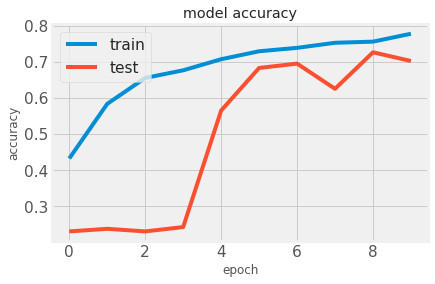

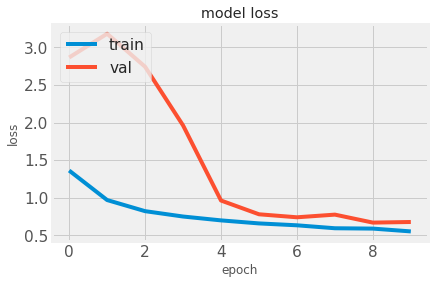

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#evaluate sub-classes






In [ ]:

batch_index=0
predict_list=[]
target=[]
while batch_index <= test_generator.batch_index:
    data,label = test_generator.next()
    prediction=model.predict(data)
    j=0
    for i in prediction:
      flat_arr = i.ravel().tolist()
      max_value = max(flat_arr)
      max_index = flat_arr.index(max_value)
      predict_list.append(max_index)
      new_label= label[j].tolist()
      max_value=max(new_label)
      max_index=new_label.index(max_value)
      target.append(max_index)
      j+=1
     



    batch_index = batch_index + 1

In [ ]:
#multi class
from sklearn.metrics import classification_report
from sklearn import metrics
print(metrics.confusion_matrix(target, predict_list))
print(metrics.classification_report(target, predict_list, digits=4))

[[271   5   0   0]
 [ 15   0   0   0]
 [269  10   0   0]
 [  0   6   0   0]]
              precision    recall  f1-score   support

           0     0.4883    0.9819    0.6522       276
           1     0.0000    0.0000    0.0000        15
           2     0.0000    0.0000    0.0000       279
           3     0.0000    0.0000    0.0000         6

    accuracy                         0.4705       576
   macro avg     0.1221    0.2455    0.1631       576
weighted avg     0.2340    0.4705    0.3125       576



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# for classify 4 classes
TP,FN,FP,TN,pr,rec,specificity,PPV,negative_predictive_value,Accuracy=[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]

j=0
while j<=3:
  for i in range(len (target)):
    if target[i]==j:
      if predict_list[i]==j:
        TP[j]+=1
      if predict_list[i]!=j:
        FN[j]+=1
    if target[i]!=j:
      if predict_list[i]==j:
        FP[j]+=1
      if predict_list[i]!=j:
        TN[j]+=1 


  pr[j]=TP[j]/(TP[j]+FP[j]) if (TP[j] +FP[j])!=0 else 0
  rec[j]= TP[j]/(TP[j] + FN[j]) if (TP[j] + FN[j])!=0 else 0
  specificity[j]= TN[j] / (TN[j] + FP[j]) if (TN[j] + FP[j])!=0 else 0
  PPV[j]= TP[j] / ( TP[j] + FP[j]) if (TP[j]+ FP[j])!=0 else 0
  negative_predictive_value[j]= TN[j]/ (TN[j] + FN[j]) if (TN[j] + FN[j]) !=0 else 0 
  Accuracy[j]= (TP[j]+TN[j])/ (TP[j]+FN[j]+TN[j]+FP[j])
  j+=1


          
  

In [ ]:
for j in range(len(pr)):
  print ("precision",j,"is", pr[j])
  print("Recall",j,"is", rec[j])
  print("Specificity" ,j,"is", specificity[j])
  print("PPV", j,"is", PPV[j])
  print("NPV",j,"is", negative_predictive_value[j])
  print('Accuracy',j,"is" ,Accuracy[j])

precision 0 is 0.4882882882882883
Recall 0 is 0.9818840579710145
Specificity 0 is 0.05333333333333334
PPV 0 is 0.4882882882882883
NPV 0 is 0.7619047619047619
Accuracy 0 is 0.4982638888888889
precision 1 is 0.0
Recall 1 is 0.0
Specificity 1 is 0.9625668449197861
PPV 1 is 0.0
NPV 1 is 0.972972972972973
Accuracy 1 is 0.9375
precision 2 is 0
Recall 2 is 0.0
Specificity 2 is 1.0
PPV 2 is 0
NPV 2 is 0.515625
Accuracy 2 is 0.515625
precision 3 is 0
Recall 3 is 0.0
Specificity 3 is 1.0
PPV 3 is 0
NPV 3 is 0.9895833333333334
Accuracy 3 is 0.9895833333333334


In [ ]:
import statistics
print("Average Accuracy", statistics.mean(Accuracy))
print("Average Precision", statistics.mean(pr))
print("Average Recall", statistics.mean(rec))


print("Average specificity", statistics.mean(specificity))
print("Average NPV", statistics.mean(negative_predictive_value))


Average Accuracy 0.7352430555555556
Average Precision 0.12207207207207207
Average Recall 0.24547101449275363
Average specificity 0.7539750445632798
Average NPV 0.810021517052767


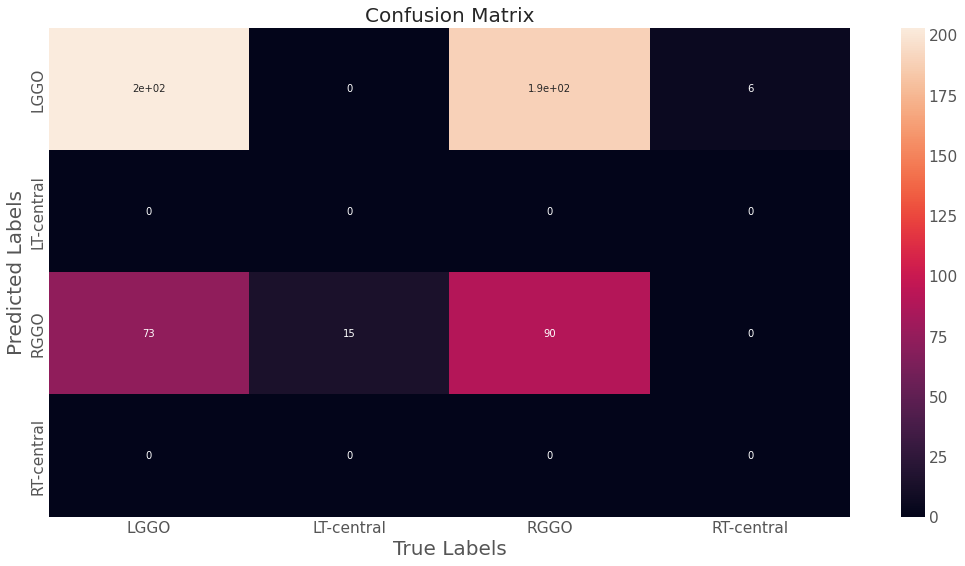

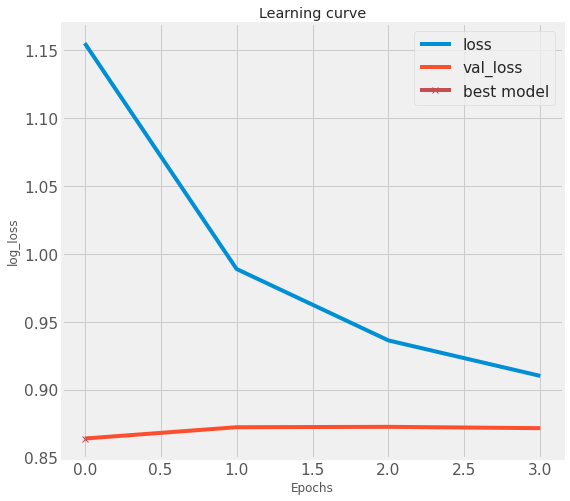

In [ ]:

from sklearn.metrics import confusion_matrix

import seaborn as sns 
labels=['LGGO','LT-central','RGGO','RT-central']
#matrix = confusion_matrix(binary_predictions, y_test.argmax(axis=1))
matrix = confusion_matrix(predict_list, target)
plt.figure(figsize=(16, 9))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('True Labels', size=20)
ax.set_ylabel('Predicted Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot( np.argmin(history.history["val_loss"]), np.min(history.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

In [ ]:
model.evaluate(validation_generator)

14/14 [==============================] - 29s 2s/step - loss: 1.3874 - acc: 0.2336


[1.387353539466858, 0.23356008529663086]

In [ ]:
#datagenerator
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Flatten, GlobalAveragePooling2D
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=(224,224,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#model.add(BatchNormalization(axis=1))

model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))

model.add(GlobalAveragePooling2D())  # this converts our 3D feature maps to 1D feature vectors

#model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(0.2))

model.add(Dense(4))

model.add(Activation('softmax'))

early_stop = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)
opt = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=opt,metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(train_generator, batch_size=32, callbacks=[early_stop], validation_data=validation_generator, epochs=10)

Epoch 1/10
49/49 [==============================] - 59s 1s/step - loss: 1.2498 - acc: 0.4471 - val_loss: 1.3845 - val_acc: 0.4792
Epoch 2/10
49/49 [==============================] - 42s 847ms/step - loss: 1.1075 - acc: 0.4728 - val_loss: 1.3808 - val_acc: 0.4792
Epoch 3/10
49/49 [==============================] - 42s 850ms/step - loss: 0.9999 - acc: 0.5291 - val_loss: 1.3530 - val_acc: 0.4792
Epoch 4/10
49/49 [==============================] - 42s 846ms/step - loss: 0.9605 - acc: 0.5183 - val_loss: 1.3286 - val_acc: 0.4792
Epoch 5/10
49/49 [==============================] - 41s 840ms/step - loss: 0.9388 - acc: 0.5144 - val_loss: 1.2927 - val_acc: 0.4792
Epoch 6/10
49/49 [==============================] - 41s 842ms/step - loss: 0.9340 - acc: 0.5151 - val_loss: 1.2548 - val_acc: 0.4792
Epoch 7/10
49/49 [==============================] - 42s 847ms/step - loss: 0.9308 - acc: 0.5138 - val_loss: 1.2177 - val_acc: 0.4792
Epoch 8/10
49/49 [==============================] - 41s 845ms/step - los

In [ ]:
model.save('/content/drive/MyDrive/M1-subclass-patient-wise.h5')

In [ ]:
data,label= test_generator.next()

In [ ]:
batch_index=0
predict_list=[]
target=[]
while batch_index <= test_generator.batch_index:
    data,label = test_generator.next()
    prediction=model.predict(data)
    j=0
    for i in prediction:
      flat_arr = i.ravel().tolist()
      max_value = max(flat_arr)
      max_index = flat_arr.index(max_value)
      predict_list.append(max_index)
      new_label= label[j].tolist()
      max_value=max(new_label)
      max_index=new_label.index(max_value)
      target.append(max_index)
      j+=1
     



    batch_index = batch_index + 1


In [ ]:
t=np.asarray(target)
p=np.asarray(predict_list)

In [ ]:
# for classify two classes
diff = t-p
print('diff: ',diff)
print('Correctly classified: ', np.where(diff == 0)[0])
print('Incorrectly classified: ', np.where(diff != 0)[0])
print('False positives: ', np.where(diff == -1)[0])
print('False negatives: ', np.where(diff == 1)[0])
summitiona=t+p
print("True positive", np.where(summitiona==2)[0])
print("True Negative", np.where(summitiona==0)[0])

true_positive= len(np.where(summitiona==2)[0])
true_negative=len(np.where(summitiona==0)[0])
false_positive=len((np.where(diff == -1)[0]))
false_negative= len((np.where(diff == 1)[0]))

diff:  [-1  0 -3 -3 -2  0 -1 -3 -2  0 -2  0 -2 -3  0 -3  0 -1 -1  0  0 -3 -3 -3
 -3 -2 -3 -2  0 -3 -3  0  0 -1 -1 -2  0  0 -2 -3 -2 -3 -1 -3 -3  0 -3 -1
 -2 -1 -1  0 -1 -2  0  0 -2  0 -1  0 -1 -2  0 -1 -3  0 -2  0 -1 -2 -3  0
  0 -2 -2 -2 -2  0  0 -1  0 -2 -1 -3 -1 -1  0 -3 -1 -3 -1 -3 -1 -3 -1 -3
 -3 -2  0  0  0  0 -2  0 -3 -1  0 -1  0 -3 -2 -1 -2 -2 -1 -2  0  0 -1 -1
 -2 -3 -1 -1  0 -1 -1  0  0 -3 -2 -1 -2 -2  0 -1 -3 -2 -1 -2 -3 -1 -3 -1
 -2  0  0 -1 -1 -2  0 -3  0 -1  0 -3 -1 -1 -3 -3 -1 -1 -3  0 -3  0  0 -2
 -1 -1  0  0 -1 -3 -1 -1 -2  0 -1  0  0 -2  0  0 -2  0 -1 -3  0  0 -2 -2
 -1 -1  0 -1  0 -1  0  0  0 -3  0 -3  0 -1  0  0  0 -1  0  0 -3  0  0 -3
 -2 -1  0 -2 -1 -2 -3  0 -2 -2 -1  0 -2 -2 -3 -1  0 -2  0 -3 -1 -2 -2  0
  0 -3 -2  0  0 -2 -2  0 -3 -1  0  0 -2 -3  0  0  0 -2 -1 -2 -3 -3 -3  0
  0 -1 -2  0 -1 -2 -1  0  0  0  0 -2 -2 -2  0 -2 -1 -2  0 -3  0 -2 -3 -1
 -3 -1 -3 -2 -3 -2 -3 -1  0 -3 -2  0  0 -3  0 -2 -3  0  0 -3 -2 -3 -2 -3
 -2  0  0 -1  0 -3 -3 -3 -3 -1 -2  0 -3  0 -

In [ ]:
pr=true_positive/ (true_positive +false_positive)
rec= true_positive/(true_positive + false_negative)
specificity= true_negative / (true_negative + false_positive)
PPV= true_positive / ( true_positive+ false_positive)
negative_predictive_value= true_negative/ (true_negative + false_negative)

ZeroDivisionError: ignored

In [ ]:
print(false_positive)

98


In [ ]:
print ("precision", pr)
print("Recall", rec)
print("Specificity" , specificity)
print("PPV", PPV)
print("NPV", negative_predictive_value)

precision 0.9948186528497409
Recall 0.9896907216494846
Specificity 0.994579945799458
PPV 0.9948186528497409
NPV 0.9892183288409704


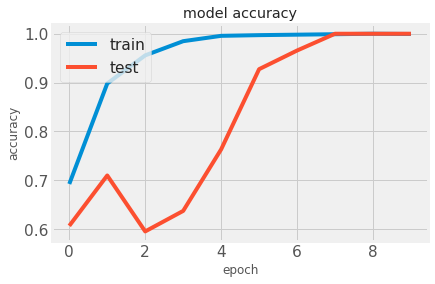

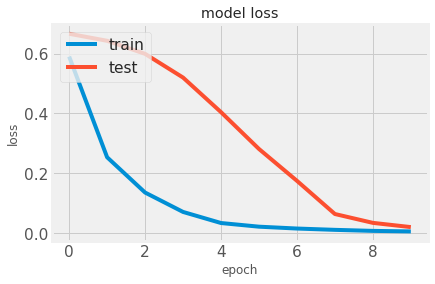

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

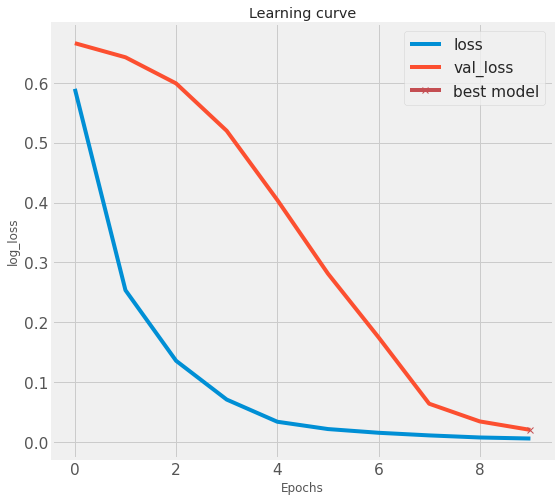

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot( np.argmin(history.history["val_loss"]), np.min(history.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

In [ ]:
model.evaluate(test_generator)

9/9 [==============================] - 4s 425ms/step - loss: 0.0123 - acc: 1.0000


[0.012326519936323166, 1.0]

In [ ]:
batch_index=0
predict_list=[]
target=[]
while batch_index <= test_generator.batch_index:
    data,label = test_generator.next()
    prediction=model.predict(data)
    j=0
    for i in prediction:
      flat_arr = i.ravel().tolist()
      max_value = max(flat_arr)
      max_index = flat_arr.index(max_value)
      predict_list.append(max_index)
      new_label= label[j].tolist()
      max_value=max(new_label)
      max_index=new_label.index(max_value)
      target.append(max_index)
      j+=1
     



    batch_index = batch_index + 1


[Text(0, 0.5, 'non_covid'), Text(0, 1.5, 'covid')]

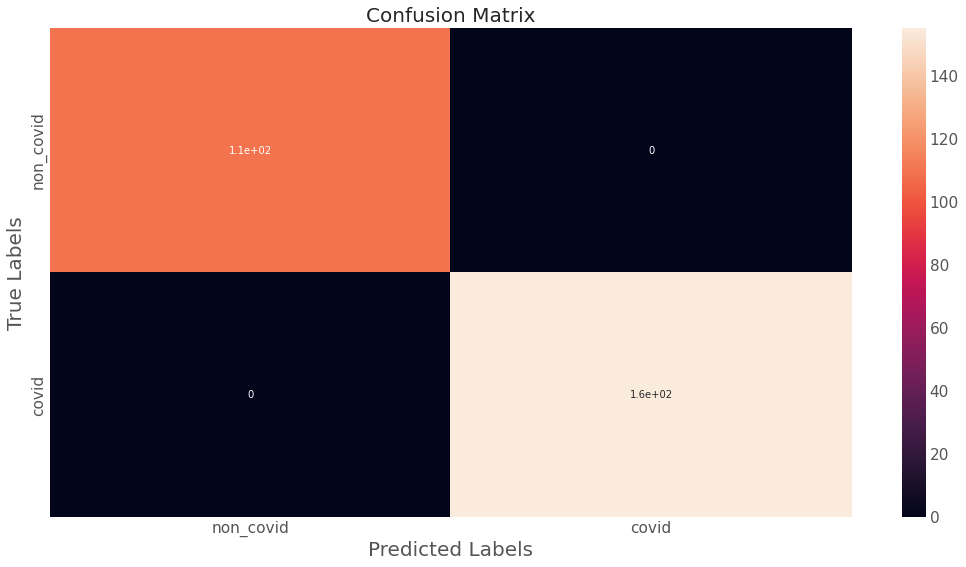

In [ ]:
from sklearn.metrics import confusion_matrix

import seaborn as sns 
labels=['non_covid','covid']
#matrix = confusion_matrix(binary_predictions, y_test.argmax(axis=1))
matrix = confusion_matrix(predict_list, target)
plt.figure(figsize=(16, 9))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
import os
import sys
import shutil


try:
    shutil.rmtree('/content/drive/MyDrive/central_images/spli_data')
except OSError as e:
    print("Error: %s - %s." % (e.filename, e.strerror))

In [ ]:

%cd '/content/drive/MyDrive/Colab Notebooks/DEEPCOVID/'
path = '/content/drive/MyDrive/covid/'

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/DEEPCOVID/'
/content


In [ ]:

import os
try:
    os.makedirs('/content/drive/MyDrive/spli_data')
except OSError:
    pass

In [ ]:

import os
try:
    os.makedirs('/content/drive/MyDrive/central_images/LT')
except OSError:
    pass

In [ ]:

import os
try:
    os.makedirs('/content/drive/MyDrive/central_images/spli_data')
except OSError:
    pass

In [ ]:
import os
try:
    os.makedirs('/content/drive/MyDrive/central_images/RT')
except OSError:
    pass

In [ ]:

import os 
i=0
x=[]
for file in os.listdir("/content/drive/MyDrive/central_images/LT"):
    if file.endswith('.jpg'):

        i+=1
print('the total number of files: ' +str(i))

the total number of files: 681


In [ ]:
#test subsamples

ids_covid = np.sort(next(os.walk(path+'COVID/' ))[1])       #folder name
print('number of COVID cases:', len(ids_covid))
############
df = pd.read_excel(path+'demoghraphic data/DEMOGRAPHIC DATA_final.xlsx')
# for i in range(len(df['file_number'])):
#     df['file_number'][i]= 'S'+ str(int(df['file_number'][i]))

sys.stdout.flush()
GGO=0
COVID=np.zeros((1, 224, 224,1), dtype=np.float32)
for id_ in ids_covid:
    print(id_)
    ids=next(os.walk(path + 'COVID/'+id_))[2]                 #image name
    a=df.loc[df['file_number']==id_,'Patient number'].to_string()
    a=a[-4:]
    df1 = pd.read_excel(path+'demoghraphic data/'+a+'.xlsx')   #excel file for each patient
    df1 = df1.fillna(0)
    b=df1.loc[df1['LT-central']==0,'image number'].array
    
    #df1['GGO']=df1['RT-GGO']+df1['LT-GGO']-df1['RT-GGO']*df1['LT-GGO']# erturn those slides with at least one GGO in left or right or both
    #df.loc[df['file_number']==id_,'GGO']=np.sum(df1['GGO']) # save the numbers of slides with above condition
    # GGO=GGO+np.sum(df1['GGO'])
    #b=df1.loc[(df1['central']==1 ), 'image number'].array
    b=shuffle(b)
    L=4
    if len(b)<4:
      L=len(b)
    b=b[:L]
    print("len b : ", len(b))
    directory= '/content/drive/MyDrive/central_images/non_LT'
    for n,id1 in tqdm(enumerate(b), total=len(b)): 
          if type(id1)==str:
    

            img = cv2.imread(path+'COVID/'+id_+'/'+id1+'.jpg') 
            if(img is not None):
            
              os.chdir(directory)
              filename = id1+'.jpg'
              cv2.imwrite(filename, img)
            
              

      



number of COVID cases: 178
S472710
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.22it/s]


S472720
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.75it/s]


S472730
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.88it/s]


S472790
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.84it/s]


S473770
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.86it/s]


S474760
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.04it/s]


S474770
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.25it/s]


S474970
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.68it/s]


S475070
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.04it/s]


S475100
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.82it/s]


S475330
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.84it/s]


S475630
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.85it/s]


S475670
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.29it/s]


S475840
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.95it/s]


S476350
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.31it/s]


S476380
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.95it/s]


S476710
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.95it/s]


S476990
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.92it/s]


S477560
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.24it/s]


S477690
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.10it/s]


S477730
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.01it/s]


S477750
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.07it/s]


S477760
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.81it/s]


S477770
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.87it/s]


S477970
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.90it/s]


S477990
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.09it/s]


S478000
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.68it/s]


S478020
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.92it/s]


S478690
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.82it/s]


S478710
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.57it/s]


S478940
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.17it/s]


S479000
len b :  4



100%|██████████| 4/4 [00:00<00:00, 511.30it/s]


S479320
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.01it/s]


S479340
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.78it/s]


S479360
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.55it/s]


S479370
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.94it/s]


S479410
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.95it/s]


S479550
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.72it/s]


S479590
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.64it/s]


S479610
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.34it/s]


S479670
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.99it/s]


S479940
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.60it/s]


S479980
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.09it/s]


S480000
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.27it/s]


S480010
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.84it/s]


S480020
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.05it/s]


S480040
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.86it/s]


S480050
len b :  4



100%|██████████| 4/4 [00:00<00:00,  4.14it/s]


S480250
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.31it/s]


S480300
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.70it/s]


S480330
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.06it/s]


S480340
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.28it/s]


S480360
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.05it/s]


S480410
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.68it/s]


S480430
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.12it/s]


S480450
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.11it/s]


S480460
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.57it/s]


S480760
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.01it/s]


S480820
len b :  4



100%|██████████| 4/4 [00:00<00:00, 403.49it/s]


S481420
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.98it/s]


S481430
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.94it/s]


S481470
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.75it/s]


S481540
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.04it/s]


S481550
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.85it/s]


S481580
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.99it/s]


S481590
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.03it/s]


S481700
len b :  4



100%|██████████| 4/4 [00:00<00:00,  4.00it/s]


S481710
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.15it/s]


S481720
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.20it/s]


S481730
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.93it/s]


S481790
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.01it/s]


S482050
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.77it/s]


S482160
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.63it/s]


S482640
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.02it/s]


S482870
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.89it/s]


S482960
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.90it/s]


S482970
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.63it/s]


S482980
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.79it/s]


S483210
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.88it/s]


S483220
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.15it/s]


S483280
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.72it/s]


S483340
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.15it/s]


S483360
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.91it/s]


S483380
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.82it/s]


S483390
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.84it/s]


S483450
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.94it/s]


S483460
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.95it/s]


S483530
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.74it/s]


S483570
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.74it/s]


S483920
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.93it/s]


S484050
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.59it/s]


S484180
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.08it/s]


S484210
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.94it/s]


S484310
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.93it/s]


S484340
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.66it/s]


S484580
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.98it/s]


S484610
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.84it/s]


S484640
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.77it/s]


S484680
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.84it/s]


S484840
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.23it/s]


S484850
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.94it/s]


S484860
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.65it/s]


S484900
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.75it/s]


S485010
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.08it/s]


S485020
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.02it/s]


S485030
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.54it/s]


S485060
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.08it/s]


S485350
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.09it/s]


S485380
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.01it/s]


S485460
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.65it/s]


S485470
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.30it/s]


S485480
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.12it/s]


S486160
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.92it/s]


S486200
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.95it/s]


S486230
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.77it/s]


S486250
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.37it/s]


S486340
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.88it/s]


S486360
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.31it/s]


S486480
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.82it/s]


S486490
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.90it/s]


S486660
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.87it/s]


S486730
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.80it/s]


S486740
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.70it/s]


S486900
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.93it/s]


S486911
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.86it/s]


S486930
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.96it/s]


S486940
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.11it/s]


S486960
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.87it/s]


S487270
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.12it/s]


S487450
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.98it/s]


S487540
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.77it/s]


S487560
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.71it/s]


S487970
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.71it/s]


S487980
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.94it/s]


S487990
len b :  4



100%|██████████| 4/4 [00:00<00:00, 554.18it/s]


S488000
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.89it/s]


S488040
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.00it/s]


S488050
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.03it/s]


S488250
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.58it/s]


S488270
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.01it/s]


S488370
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.13it/s]


S488430
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.89it/s]


S488640
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.71it/s]


S488650
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.93it/s]


S488670
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.98it/s]


S488690
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.73it/s]


S488710
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.86it/s]


S488720
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.89it/s]


S488740
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.24it/s]


S488760
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.28it/s]


S488800
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.94it/s]


S489010
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.01it/s]


S489050
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.72it/s]


S489060
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.11it/s]


S489090
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.70it/s]


S489100
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.79it/s]


S489120
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.57it/s]


S489130
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.19it/s]


S489140
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.74it/s]


S489190
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.79it/s]


S489200
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.73it/s]


S489380
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.80it/s]


S489390
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.40it/s]


S489440
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.66it/s]


S489470
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.25it/s]


S489480
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.76it/s]


S489700
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.62it/s]


S489710
len b :  3



100%|██████████| 3/3 [00:01<00:00,  2.99it/s]


S489720
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.92it/s]


S489740
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.58it/s]


S489810
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.79it/s]


S489820
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.80it/s]


S489860
len b :  4



100%|██████████| 4/4 [00:01<00:00,  3.48it/s]


S490220
len b :  0



0it [00:00, ?it/s]


S490230
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.80it/s]


S490240
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.78it/s]


S490310
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.86it/s]


S490330
len b :  4



100%|██████████| 4/4 [00:01<00:00,  2.67it/s]


In [ ]:
#test subsamples

ids_covid = np.sort(next(os.walk(path+'COVID/' ))[1])       #folder name
print('number of COVID cases:', len(ids_covid))
############
df = pd.read_excel(path+'demoghraphic data/DEMOGRAPHIC DATA_final.xlsx')
# for i in range(len(df['file_number'])):
#     df['file_number'][i]= 'S'+ str(int(df['file_number'][i]))

sys.stdout.flush()
GGO=0
COVID=np.zeros((1, 224, 224,1), dtype=np.float32)
for id_ in ids_covid:
    print(id_)
    ids=next(os.walk(path + 'COVID/'+id_))[2]                 #image name
    a=df.loc[df['file_number']==id_,'Patient number'].to_string()
    a=a[-4:]
    df1 = pd.read_excel(path+'demoghraphic data/'+a+'.xlsx')   #excel file for each patient
    df1 = df1.fillna(0)
    b=df1.loc[df1['LT-GGO']==1,'image number'].array
    
    #df1['GGO']=df1['RT-GGO']+df1['LT-GGO']-df1['RT-GGO']*df1['LT-GGO']# erturn those slides with at least one GGO in left or right or both
    #df.loc[df['file_number']==id_,'GGO']=np.sum(df1['GGO']) # save the numbers of slides with above condition
    # GGO=GGO+np.sum(df1['GGO'])
    #b=df1.loc[(df1['central']==1 ), 'image number'].array
    b=shuffle(b)
    L=50
    if len(b)<50:
      L=len(b)
    b=b[:L]
    print("len b : ", len(b))
    directory= '/content/drive/MyDrive/central_images/LGGO'
    for n,id1 in tqdm(enumerate(b), total=len(b)): 
    
         img = cv2.imread(path+'COVID/'+id_+'/'+id1+'.jpg') 
         os.chdir(directory)
      
          # List files and directories  
          # in 'C:/Users/Rajnish/Desktop/GeeksforGeeks'  
            
            
          # Filename
         filename = id1+'.jpg'
            
          # Using cv2.imwrite() method
          # Saving the image
         cv2.imwrite(filename, img)
   
            

     



number of COVID cases: 178
S472710
len b :  50


100%|██████████| 50/50 [00:17<00:00,  2.94it/s]


S472720
len b :  50


100%|██████████| 50/50 [00:16<00:00,  3.06it/s]


S472730
len b :  0


0it [00:00, ?it/s]


S472790
len b :  8


100%|██████████| 8/8 [00:03<00:00,  2.57it/s]


S473770
len b :  0


0it [00:00, ?it/s]


S474760
len b :  0


0it [00:00, ?it/s]


S474770
len b :  0


0it [00:00, ?it/s]


S474970
len b :  50


100%|██████████| 50/50 [00:16<00:00,  3.10it/s]


S475070
len b :  50


100%|██████████| 50/50 [00:15<00:00,  3.15it/s]


S475100
len b :  0


0it [00:00, ?it/s]


S475330
len b :  0


0it [00:00, ?it/s]


S475630
len b :  0


0it [00:00, ?it/s]


S475670
len b :  0


0it [00:00, ?it/s]


S475840
len b :  50


100%|██████████| 50/50 [00:15<00:00,  3.28it/s]


S476350
len b :  0


0it [00:00, ?it/s]


S476380
len b :  0


0it [00:00, ?it/s]


S476710
len b :  0


0it [00:00, ?it/s]


S476990
len b :  50


100%|██████████| 50/50 [00:16<00:00,  2.95it/s]


S477560
len b :  0


0it [00:00, ?it/s]


S477690
len b :  0


0it [00:00, ?it/s]


S477730
len b :  36


100%|██████████| 36/36 [00:11<00:00,  3.13it/s]


S477750
len b :  4


100%|██████████| 4/4 [00:01<00:00,  3.09it/s]


S477760
len b :  0


0it [00:00, ?it/s]


S477770
len b :  50


100%|██████████| 50/50 [00:15<00:00,  3.16it/s]


S477970
len b :  8


100%|██████████| 8/8 [00:02<00:00,  3.37it/s]


S477990
len b :  0


0it [00:00, ?it/s]


S478000
len b :  50


100%|██████████| 50/50 [00:17<00:00,  2.78it/s]


S478020
len b :  50


100%|██████████| 50/50 [00:15<00:00,  3.25it/s]


S478690
len b :  0


0it [00:00, ?it/s]


S478710
len b :  50


100%|██████████| 50/50 [00:16<00:00,  2.95it/s]


S478940
len b :  11


100%|██████████| 11/11 [00:03<00:00,  3.02it/s]


S479000
len b :  0


0it [00:00, ?it/s]


S479320
len b :  0


0it [00:00, ?it/s]


S479340
len b :  50


100%|██████████| 50/50 [00:16<00:00,  3.12it/s]


S479360
len b :  50


100%|██████████| 50/50 [00:17<00:00,  2.81it/s]


S479370
len b :  0


0it [00:00, ?it/s]


S479410
len b :  11


100%|██████████| 11/11 [00:03<00:00,  3.34it/s]


S479550
len b :  0


0it [00:00, ?it/s]


S479590
len b :  46


100%|██████████| 46/46 [00:13<00:00,  3.31it/s]


S479610
len b :  0


0it [00:00, ?it/s]


S479670
len b :  0


0it [00:00, ?it/s]


S479940
len b :  0


0it [00:00, ?it/s]


S479980
len b :  50


 96%|█████████▌| 48/50 [00:14<00:00,  3.22it/s]


KeyboardInterrupt: ignored

In [ ]:
#test subsamples

ids_covid = np.sort(next(os.walk(path+'COVID/' ))[1])       #folder name
print('number of COVID cases:', len(ids_covid))
############
df = pd.read_excel(path+'demoghraphic data/DEMOGRAPHIC DATA_final.xlsx')
# for i in range(len(df['file_number'])):
#     df['file_number'][i]= 'S'+ str(int(df['file_number'][i]))

sys.stdout.flush()
GGO=0
COVID=np.zeros((1, 224, 224,1), dtype=np.float32)
for id_ in ids_covid:
    print(id_)
    ids=next(os.walk(path + 'COVID/'+id_))[2]                 #image name
    a=df.loc[df['file_number']==id_,'Patient number'].to_string()
    a=a[-4:]
    df1 = pd.read_excel(path+'demoghraphic data/'+a+'.xlsx')   #excel file for each patient
    df1 = df1.fillna(0)
    b=df1.loc[df1['RT-GGO']==1,'image number'].array
    
    #df1['GGO']=df1['RT-GGO']+df1['LT-GGO']-df1['RT-GGO']*df1['LT-GGO']# erturn those slides with at least one GGO in left or right or both
    #df.loc[df['file_number']==id_,'GGO']=np.sum(df1['GGO']) # save the numbers of slides with above condition
    # GGO=GGO+np.sum(df1['GGO'])
    #b=df1.loc[(df1['central']==1 ), 'image number'].array
    b=shuffle(b)
    L=30
    if len(b)<30:
      L=len(b)
    b=b[:L]
    print("len b : ", len(b))
    directory= '/content/drive/MyDrive/central_images/RGGO'
    for n,id1 in tqdm(enumerate(b), total=len(b)): 
    
         img = cv2.imread(path+'COVID/'+id_+'/'+id1+'.jpg') 
         os.chdir(directory)
      
          # List files and directories  
          # in 'C:/Users/Rajnish/Desktop/GeeksforGeeks'  
            
            
          # Filename
         filename = id1+'.jpg'
            
          # Using cv2.imwrite() method
          # Saving the image
         cv2.imwrite(filename, img)
   
            

     



number of COVID cases: 178
S472710
len b :  30


100%|██████████| 30/30 [00:06<00:00,  4.76it/s]


S472720
len b :  30


100%|██████████| 30/30 [00:07<00:00,  3.77it/s]


S472730
len b :  16


100%|██████████| 16/16 [00:04<00:00,  3.27it/s]


S472790
len b :  0


0it [00:00, ?it/s]


S473770
len b :  0


0it [00:00, ?it/s]


S474760
len b :  30


100%|██████████| 30/30 [00:09<00:00,  3.15it/s]


S474770
len b :  17


100%|██████████| 17/17 [00:03<00:00,  4.32it/s]


S474970
len b :  30


100%|██████████| 30/30 [00:07<00:00,  4.11it/s]


S475070
len b :  30


100%|██████████| 30/30 [00:08<00:00,  3.52it/s]


S475100
len b :  30


100%|██████████| 30/30 [00:10<00:00,  2.95it/s]


S475330
len b :  0


0it [00:00, ?it/s]


S475630
len b :  0


0it [00:00, ?it/s]


S475670
len b :  0


0it [00:00, ?it/s]


S475840
len b :  30


100%|██████████| 30/30 [00:07<00:00,  3.80it/s]


S476350
len b :  0


0it [00:00, ?it/s]


S476380
len b :  30


100%|██████████| 30/30 [00:09<00:00,  3.05it/s]


S476710
len b :  30


100%|██████████| 30/30 [00:09<00:00,  3.19it/s]


S476990
len b :  0


0it [00:00, ?it/s]


S477560
len b :  27


100%|██████████| 27/27 [00:08<00:00,  3.20it/s]


S477690
len b :  0


0it [00:00, ?it/s]


S477730
len b :  30


100%|██████████| 30/30 [00:06<00:00,  4.30it/s]


S477750
len b :  30


100%|██████████| 30/30 [00:09<00:00,  3.05it/s]


S477760
len b :  18


100%|██████████| 18/18 [00:05<00:00,  3.15it/s]


S477770
len b :  30


100%|██████████| 30/30 [00:07<00:00,  3.81it/s]


S477970
len b :  30


100%|██████████| 30/30 [00:09<00:00,  3.24it/s]


S477990
len b :  0


0it [00:00, ?it/s]


S478000
len b :  0


0it [00:00, ?it/s]


S478020
len b :  30


100%|██████████| 30/30 [00:08<00:00,  3.66it/s]


S478690
len b :  0


0it [00:00, ?it/s]


S478710
len b :  26


100%|██████████| 26/26 [00:08<00:00,  3.00it/s]


S478940
len b :  30


100%|██████████| 30/30 [00:10<00:00,  2.88it/s]


S479000
len b :  0


0it [00:00, ?it/s]


S479320
len b :  16


100%|██████████| 16/16 [00:06<00:00,  2.64it/s]


S479340
len b :  9


100%|██████████| 9/9 [00:02<00:00,  3.50it/s]


S479360
len b :  30


100%|██████████| 30/30 [00:05<00:00,  5.29it/s]


S479370
len b :  30


100%|██████████| 30/30 [00:09<00:00,  3.03it/s]


S479410
len b :  14


100%|██████████| 14/14 [00:04<00:00,  2.95it/s]


S479550
len b :  0


0it [00:00, ?it/s]


S479590
len b :  23


100%|██████████| 23/23 [00:07<00:00,  3.01it/s]


S479610
len b :  30


100%|██████████| 30/30 [00:09<00:00,  3.04it/s]


S479670
len b :  0


0it [00:00, ?it/s]


S479940
len b :  22


100%|██████████| 22/22 [00:07<00:00,  2.79it/s]


S479980
len b :  30


100%|██████████| 30/30 [00:06<00:00,  4.57it/s]


S480000
len b :  30


100%|██████████| 30/30 [00:09<00:00,  3.11it/s]


S480010
len b :  30


100%|██████████| 30/30 [00:09<00:00,  3.10it/s]


S480020
len b :  30


100%|██████████| 30/30 [00:10<00:00,  2.92it/s]


S480040
len b :  30


100%|██████████| 30/30 [00:09<00:00,  3.04it/s]


S480050
len b :  30


100%|██████████| 30/30 [00:10<00:00,  2.98it/s]


S480250
len b :  30


100%|██████████| 30/30 [00:04<00:00,  7.20it/s]


S480300
len b :  0


0it [00:00, ?it/s]


S480330
len b :  30


100%|██████████| 30/30 [00:09<00:00,  3.00it/s]


S480340
len b :  0


0it [00:00, ?it/s]


S480360
len b :  0


0it [00:00, ?it/s]


S480410
len b :  30


100%|██████████| 30/30 [00:09<00:00,  3.07it/s]


S480430
len b :  30


100%|██████████| 30/30 [00:10<00:00,  2.95it/s]


S480450
len b :  0


0it [00:00, ?it/s]


S480460
len b :  30


100%|██████████| 30/30 [00:10<00:00,  2.91it/s]


S480760
len b :  30


100%|██████████| 30/30 [00:09<00:00,  3.17it/s]


S480820
len b :  0


0it [00:00, ?it/s]


S481420
len b :  30


100%|██████████| 30/30 [00:09<00:00,  3.08it/s]


S481430
len b :  0


0it [00:00, ?it/s]


S481470
len b :  30


100%|██████████| 30/30 [00:09<00:00,  3.07it/s]


S481540
len b :  30


100%|██████████| 30/30 [00:10<00:00,  2.97it/s]


S481550
len b :  29


100%|██████████| 29/29 [00:06<00:00,  4.15it/s]


S481580
len b :  30


100%|██████████| 30/30 [00:09<00:00,  3.13it/s]


S481590
len b :  30


100%|██████████| 30/30 [00:09<00:00,  3.24it/s]


S481700
len b :  30


 53%|█████▎    | 16/30 [00:04<00:04,  3.40it/s]


KeyboardInterrupt: ignored

In [ ]:
#test subsamples

ids_covid = np.sort(next(os.walk(path+'COVID/' ))[1])       #folder name
print('number of COVID cases:', len(ids_covid))
############
df = pd.read_excel(path+'demoghraphic data/DEMOGRAPHIC DATA_final.xlsx')
# for i in range(len(df['file_number'])):
#     df['file_number'][i]= 'S'+ str(int(df['file_number'][i]))

sys.stdout.flush()
GGO=0
COVID=np.zeros((1, 224, 224,1), dtype=np.float32)
for id_ in ids_covid:
    print(id_)
    ids=next(os.walk(path + 'COVID/'+id_))[2]                 #image name
    a=df.loc[df['file_number']==id_,'Patient number'].to_string()
    a=a[-4:]
    df1 = pd.read_excel(path+'demoghraphic data/'+a+'.xlsx')   #excel file for each patient
    df1 = df1.fillna(0)
    b=df1.loc[df1['RT-central']==1,'image number'].array
    
    #df1['GGO']=df1['RT-GGO']+df1['LT-GGO']-df1['RT-GGO']*df1['LT-GGO']# erturn those slides with at least one GGO in left or right or both
    #df.loc[df['file_number']==id_,'GGO']=np.sum(df1['GGO']) # save the numbers of slides with above condition
    # GGO=GGO+np.sum(df1['GGO'])
    #b=df1.loc[(df1['central']==1 ), 'image number'].array
    b=shuffle(b)
    L=50
    if len(b)<50:
      L=len(b)
    b=b[:L]
    print("len b : ", len(b))
    directory= '/content/drive/MyDrive/central_images/RT'
    for n,id1 in tqdm(enumerate(b), total=len(b)): 
    
         img = cv2.imread(path+'COVID/'+id_+'/'+id1+'.jpg') 
         os.chdir(directory)
      
          # List files and directories  
          # in 'C:/Users/Rajnish/Desktop/GeeksforGeeks'  
            
            
          # Filename
         filename = id1+'.jpg'
            
          # Using cv2.imwrite() method
          # Saving the image
         cv2.imwrite(filename, img)
   
            

     



number of COVID cases: 178
S472710
len b :  0


0it [00:00, ?it/s]


S472720
len b :  0


0it [00:00, ?it/s]


S472730
len b :  0


0it [00:00, ?it/s]

S472790


len b :  0


0it [00:00, ?it/s]


S473770
len b :  0


0it [00:00, ?it/s]


S474760
len b :  0


0it [00:00, ?it/s]


S474770
len b :  23


100%|██████████| 23/23 [00:01<00:00, 12.93it/s]


S474970
len b :  8


100%|██████████| 8/8 [00:00<00:00,  9.31it/s]


S475070
len b :  50


100%|██████████| 50/50 [00:10<00:00,  4.56it/s]


S475100
len b :  0


0it [00:00, ?it/s]


S475330
len b :  50


100%|██████████| 50/50 [00:16<00:00,  3.09it/s]


S475630
len b :  0


0it [00:00, ?it/s]


S475670
len b :  21


100%|██████████| 21/21 [00:05<00:00,  3.98it/s]


S475840
len b :  8


100%|██████████| 8/8 [00:00<00:00,  9.67it/s]


S476350
len b :  0


0it [00:00, ?it/s]


S476380
len b :  0


0it [00:00, ?it/s]


S476710
len b :  0


0it [00:00, ?it/s]


S476990
len b :  0


0it [00:00, ?it/s]


S477560
len b :  0


0it [00:00, ?it/s]


S477690
len b :  0


0it [00:00, ?it/s]


S477730
len b :  50


100%|██████████| 50/50 [00:13<00:00,  3.80it/s]


S477750
len b :  3


100%|██████████| 3/3 [00:00<00:00, 11.05it/s]


S477760
len b :  0


0it [00:00, ?it/s]


S477770
len b :  14


100%|██████████| 14/14 [00:00<00:00, 14.47it/s]


S477970
len b :  36


100%|██████████| 36/36 [00:07<00:00,  4.59it/s]


S477990
len b :  0


0it [00:00, ?it/s]


S478000
len b :  0


0it [00:00, ?it/s]


S478020
len b :  0


0it [00:00, ?it/s]


S478690
len b :  0


0it [00:00, ?it/s]


S478710
len b :  0


0it [00:00, ?it/s]


S478940
len b :  0


0it [00:00, ?it/s]


S479000
len b :  0


0it [00:00, ?it/s]


S479320
len b :  0


0it [00:00, ?it/s]


S479340
len b :  0


0it [00:00, ?it/s]

S479360


len b :  0


0it [00:00, ?it/s]

S479370


len b :  0


0it [00:00, ?it/s]


S479410
len b :  0


0it [00:00, ?it/s]


S479550
len b :  0


0it [00:00, ?it/s]


S479590
len b :  0


0it [00:00, ?it/s]


S479610
len b :  0


0it [00:00, ?it/s]

S479670


len b :  0


0it [00:00, ?it/s]


S479940
len b :  0


0it [00:00, ?it/s]

S479980


len b :  0


0it [00:00, ?it/s]

S480000


len b :  41


100%|██████████| 41/41 [00:11<00:00,  3.66it/s]


S480010
len b :  0


0it [00:00, ?it/s]


S480020
len b :  0


0it [00:00, ?it/s]


S480040
len b :  0


0it [00:00, ?it/s]


S480050
len b :  50


100%|██████████| 50/50 [00:13<00:00,  3.71it/s]


S480250
len b :  50


100%|██████████| 50/50 [00:08<00:00,  5.60it/s]


S480300
len b :  0


0it [00:00, ?it/s]


S480330
len b :  0


0it [00:00, ?it/s]


S480340
len b :  0


0it [00:00, ?it/s]


S480360
len b :  0


0it [00:00, ?it/s]


S480410
len b :  0


0it [00:00, ?it/s]


S480430
len b :  33


100%|██████████| 33/33 [00:08<00:00,  3.96it/s]


S480450
len b :  0


0it [00:00, ?it/s]


S480460
len b :  0


0it [00:00, ?it/s]


S480760
len b :  0


0it [00:00, ?it/s]


S480820
len b :  0


0it [00:00, ?it/s]


S481420
len b :  0


0it [00:00, ?it/s]


S481430
len b :  0


0it [00:00, ?it/s]


S481470
len b :  0


0it [00:00, ?it/s]


S481540
len b :  0


0it [00:00, ?it/s]


S481550
len b :  29


100%|██████████| 29/29 [00:01<00:00, 21.91it/s]


S481580
len b :  0


0it [00:00, ?it/s]


S481590
len b :  50


100%|██████████| 50/50 [00:14<00:00,  3.45it/s]


S481700
len b :  44


100%|██████████| 44/44 [00:07<00:00,  5.98it/s]


S481710
len b :  0


0it [00:00, ?it/s]


S481720
len b :  0


0it [00:00, ?it/s]


S481730
len b :  0


0it [00:00, ?it/s]


S481790
len b :  0


0it [00:00, ?it/s]


S482050
len b :  0


0it [00:00, ?it/s]


S482160
len b :  0


0it [00:00, ?it/s]


S482640
len b :  0


0it [00:00, ?it/s]


S482870
len b :  0


0it [00:00, ?it/s]


S482960
len b :  0


0it [00:00, ?it/s]


S482970
len b :  0


0it [00:00, ?it/s]


S482980
len b :  0


0it [00:00, ?it/s]


S483210
len b :  0


0it [00:00, ?it/s]

S483220


len b :  33


100%|██████████| 33/33 [00:09<00:00,  3.53it/s]


S483280
len b :  0


0it [00:00, ?it/s]


S483340
len b :  0


0it [00:00, ?it/s]


S483360
len b :  0


0it [00:00, ?it/s]


S483380
len b :  0


0it [00:00, ?it/s]


S483390
len b :  0


0it [00:00, ?it/s]


S483450
len b :  0


0it [00:00, ?it/s]


S483460
len b :  0


0it [00:00, ?it/s]


S483530
len b :  0


0it [00:00, ?it/s]

S483570


len b :  0


0it [00:00, ?it/s]


S483920
len b :  0


0it [00:00, ?it/s]


S484050
len b :  22


100%|██████████| 22/22 [00:05<00:00,  4.05it/s]


S484180
len b :  0


0it [00:00, ?it/s]


S484210
len b :  0


0it [00:00, ?it/s]


S484310
len b :  0


0it [00:00, ?it/s]


S484340
len b :  0


0it [00:00, ?it/s]


S484580
len b :  0


0it [00:00, ?it/s]


S484610
len b :  0


0it [00:00, ?it/s]


S484640
len b :  0


0it [00:00, ?it/s]


S484680
len b :  0


0it [00:00, ?it/s]

S484840


len b :  0


0it [00:00, ?it/s]

S484850


len b :  0


0it [00:00, ?it/s]

S484860


len b :  0


0it [00:00, ?it/s]


S484900
len b :  0


0it [00:00, ?it/s]

S485010


len b :  19


100%|██████████| 19/19 [00:04<00:00,  4.60it/s]


S485020
len b :  0


0it [00:00, ?it/s]


S485030
len b :  0


0it [00:00, ?it/s]


S485060
len b :  0


0it [00:00, ?it/s]


S485350
len b :  0


0it [00:00, ?it/s]


S485380
len b :  0


0it [00:00, ?it/s]


S485460
len b :  50


100%|██████████| 50/50 [00:14<00:00,  3.54it/s]


S485470
len b :  0


0it [00:00, ?it/s]


S485480
len b :  0


0it [00:00, ?it/s]


S486160
len b :  0


0it [00:00, ?it/s]


S486200
len b :  0


0it [00:00, ?it/s]


S486230
len b :  0


0it [00:00, ?it/s]


S486250
len b :  0


0it [00:00, ?it/s]


S486340
len b :  0


0it [00:00, ?it/s]


S486360
len b :  0


0it [00:00, ?it/s]


S486480
len b :  0


0it [00:00, ?it/s]


S486490
len b :  0


0it [00:00, ?it/s]


S486660
len b :  0


0it [00:00, ?it/s]


S486730
len b :  0


0it [00:00, ?it/s]

S486740


len b :  0


0it [00:00, ?it/s]


S486900
len b :  0


0it [00:00, ?it/s]


S486911
len b :  0


0it [00:00, ?it/s]

S486930


len b :  0


0it [00:00, ?it/s]

S486940


len b :  0


0it [00:00, ?it/s]


S486960
len b :  0


0it [00:00, ?it/s]


S487270
len b :  11


100%|██████████| 11/11 [00:02<00:00,  4.54it/s]


S487450
len b :  0


0it [00:00, ?it/s]


S487540
len b :  0


0it [00:00, ?it/s]


S487560
len b :  0


0it [00:00, ?it/s]


S487970
len b :  0


0it [00:00, ?it/s]


S487980
len b :  0


0it [00:00, ?it/s]


S487990
len b :  0


0it [00:00, ?it/s]


S488000
len b :  50


100%|██████████| 50/50 [00:14<00:00,  3.37it/s]


S488040
len b :  0


0it [00:00, ?it/s]


S488050
len b :  0


0it [00:00, ?it/s]


S488250
len b :  0


0it [00:00, ?it/s]


S488270
len b :  0


0it [00:00, ?it/s]


S488370
len b :  0


0it [00:00, ?it/s]


S488430
len b :  0


0it [00:00, ?it/s]


S488640
len b :  0


0it [00:00, ?it/s]


S488650
len b :  0


0it [00:00, ?it/s]


S488670
len b :  0


0it [00:00, ?it/s]


S488690
len b :  0


0it [00:00, ?it/s]


S488710
len b :  0


0it [00:00, ?it/s]


S488720
len b :  0


0it [00:00, ?it/s]


S488740
len b :  0


0it [00:00, ?it/s]


S488760
len b :  0


0it [00:00, ?it/s]

S488800


len b :  0


0it [00:00, ?it/s]

S489010


len b :  0


0it [00:00, ?it/s]

S489050


len b :  0


0it [00:00, ?it/s]


S489060
len b :  0


0it [00:00, ?it/s]


S489090
len b :  0


0it [00:00, ?it/s]


S489100
len b :  0


0it [00:00, ?it/s]


S489120
len b :  50


100%|██████████| 50/50 [00:16<00:00,  2.99it/s]


S489130
len b :  0


0it [00:00, ?it/s]


S489140
len b :  0


0it [00:00, ?it/s]


S489190
len b :  0


0it [00:00, ?it/s]


S489200
len b :  0


0it [00:00, ?it/s]


S489380
len b :  0


0it [00:00, ?it/s]


S489390
len b :  0


0it [00:00, ?it/s]


S489440
len b :  34


100%|██████████| 34/34 [00:09<00:00,  3.42it/s]


S489470
len b :  0


0it [00:00, ?it/s]


S489480
len b :  0


0it [00:00, ?it/s]


S489700
len b :  36


100%|██████████| 36/36 [00:09<00:00,  3.95it/s]


S489710
len b :  50


100%|██████████| 50/50 [00:09<00:00,  5.39it/s]


S489720
len b :  0


0it [00:00, ?it/s]


S489740
len b :  0


0it [00:00, ?it/s]


S489810
len b :  0


0it [00:00, ?it/s]


S489820
len b :  50


100%|██████████| 50/50 [00:05<00:00,  8.63it/s]


S489860
len b :  12


100%|██████████| 12/12 [00:03<00:00,  3.74it/s]


S490220
len b :  50


100%|██████████| 50/50 [00:07<00:00,  6.38it/s]


S490230
len b :  0


0it [00:00, ?it/s]


S490240
len b :  0


0it [00:00, ?it/s]


S490310
len b :  0


0it [00:00, ?it/s]


S490330
len b :  50


100%|██████████| 50/50 [00:15<00:00,  3.19it/s]


In [ ]:
pip install split_folders

In [ ]:
#import splitfolders

#main_dir = '/content/drive/MyDrive/selected_images_covid'
output_dir = '/content/drive/MyDrive/covid_images_per_patient'
#splitfolders.ratio(main_dir, output=output_dir, seed=1337, ratio=(.8, .1, .1))
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./224)
train_generator = train_datagen.flow_from_directory(os.path.join(output_dir,'train'),
                                                    class_mode='categorical',                                      
                                                    batch_size=32,
                                                    target_size=(224,224),
                                                    shuffle=True)

validation_generator = train_datagen.flow_from_directory(os.path.join(output_dir,'val'),
                                                        target_size=(224, 224),
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        shuffle=True) # set as validation data
test_generator= train_datagen.flow_from_directory(os.path.join(output_dir,'test'),
                                                  target_size=(224,224),batch_size=32,class_mode='categorical',shuffle=True)


Found 7746 images belonging to 2 classes.
Found 817 images belonging to 2 classes.
Found 775 images belonging to 2 classes.


In [ ]:
#datagenerator
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Flatten
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=(224,224,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))

#model.add(Conv2D(64, (3, 3), padding='same'))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#model.add(BatchNormalization(axis=1))

model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

#model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(0.2))

model.add(Dense(2))

model.add(Activation('sigmoid'))

early_stop = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)
opt = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=opt,metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
activation_4 (Activation)    (None, 224, 224, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 112, 112, 64)      448       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 16)      9232      
_________________________________________________________________
activation_5 (Activation)    (None, 112, 112, 16)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 16)       

In [ ]:
history = model.fit(train_generator, batch_size=32, callbacks=[early_stop], validation_data=validation_generator, epochs=10)

In [ ]:
history = model.fit(train_generator, batch_size=32, callbacks=[early_stop], validation_data=validation_generator, epochs=10)

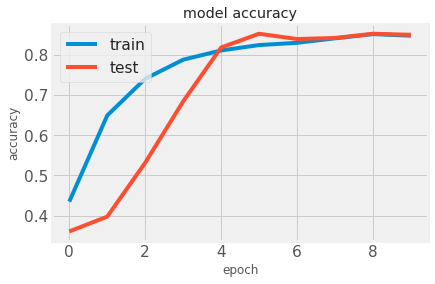

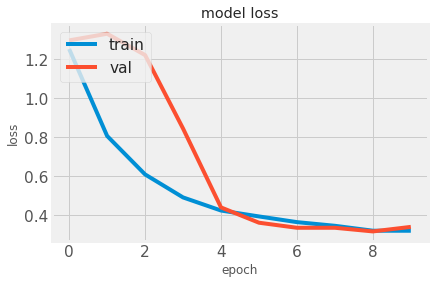

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(test_generator)

13/13 [==============================] - 5s 398ms/step - loss: 0.3648 - acc: 0.8390


[0.3648006319999695, 0.8389610648155212]

In [ ]:
batch_index=0
predict_list=[]
target=[]
while batch_index <= test_generator.batch_index:
    data,label = test_generator.next()
    prediction=model.predict(data)
    j=0
    for i in prediction:
      flat_arr = i.ravel().tolist()
      max_value = max(flat_arr)
      max_index = flat_arr.index(max_value)
      predict_list.append(max_index)
      new_label= label[j].tolist()
      max_value=max(new_label)
      max_index=new_label.index(max_value)
      target.append(max_index)
      j+=1
     



    batch_index = batch_index + 1

[Text(0, 0.5, 'LGGO'),
 Text(0, 1.5, 'LT-central'),
 Text(0, 2.5, 'RGGO'),
 Text(0, 3.5, 'RT-central')]

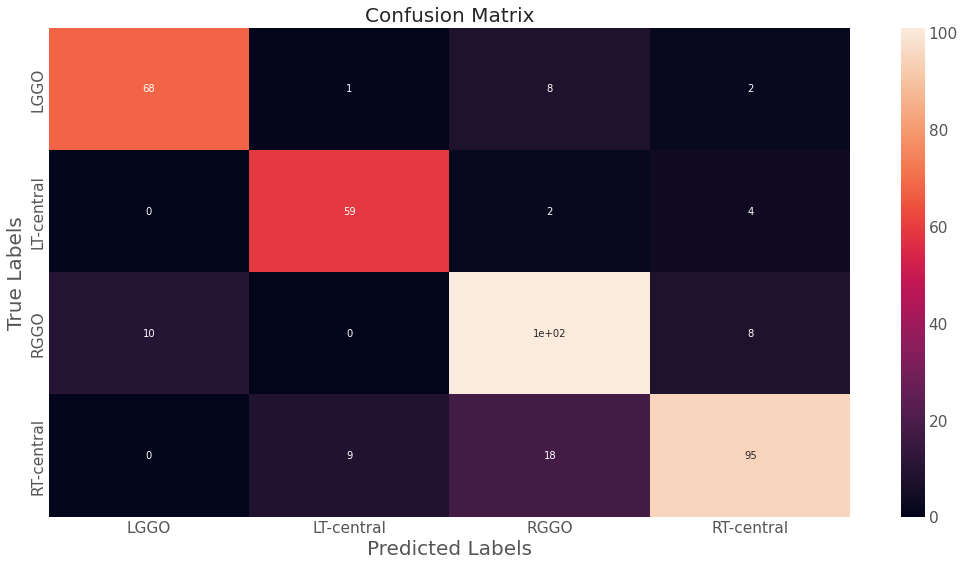

In [ ]:
from sklearn.metrics import confusion_matrix

import seaborn as sns 
labels=['LGGO','LT-central','RGGO','RT-central']
#matrix = confusion_matrix(binary_predictions, y_test.argmax(axis=1))
matrix = confusion_matrix(predict_list, target)
plt.figure(figsize=(16, 9))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

baseModel = EfficientNetB0(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = MaxPooling2D(pool_size=(7, 7))(headModel)

headModel = Flatten(name="flatten")(headModel)
headModel = Dense(256, activation="relu")(headModel)
#headModel = Dropout(0.5)(headModel)
headModel = Dense(4, activation="sigmoid")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the training process
for layer in model.layers[-20:]:
  if not isinstance(layer, BatchNormalization):
            layer.trainable = True

early_stop = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)
opt = tf.keras.optimizers.Adam(lr=0.001)

model.compile(optimizer=opt,
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

history=model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // 32,
    callbacks=[early_stop],
    epochs = 10)

16719872/16705208 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
48/48 [==============================] - 80s 1s/step - loss: 1.8670 - accuracy: 0.6521 - val_loss: 1.1377 - val_accuracy: 0.4792
Epoch 2/10
48/48 [==============================] - 40s 837ms/step - loss: 0.2993 - accuracy: 0.8855 - val_loss: 1.0872 - val_accuracy: 0.4792
Epoch 3/10
48/48 [==============================] - 40s 829ms/step - loss: 0.1633 - accuracy: 0.9431 - val_loss: 0.9639 - val_accuracy: 0.4861
Epoch 4/10
48/48 [==============================] - 41s 846ms/step - loss: 0.2422 - accuracy: 0.9130 - val_loss: 1.1002 - val_accuracy: 0.4792
Epoch 5/10
48/48 [==============================] - 41s 856ms/step - loss: 0.1136 - accuracy: 0.9601 - val_loss: 1.0600 - val_accuracy: 0.4792
Epoch 6/10
48/48 [==============================] - 41s 851ms/step - loss: 0.0644 - accuracy: 0.9771 - val_loss: 0.8904 - val_accuracy: 0.4774
Epoch 7/10
48/48 [==============================] - 41s 843ms/step - loss: 0.0583 - accuracy: 0.9791 - val_loss: 0.9084 - val_accuracy: 0.4774
Ep

In [ ]:
batch_index=0
predict_list=[]
target=[]
while batch_index <= test_generator.batch_index:
    data,label = test_generator.next()
    prediction=model.predict(data)
    j=0
    for i in prediction:
      flat_arr = i.ravel().tolist()
      max_value = max(flat_arr)
      max_index = flat_arr.index(max_value)
      predict_list.append(max_index)
      new_label= label[j].tolist()
      max_value=max(new_label)
      max_index=new_label.index(max_value)
      target.append(max_index)
      j+=1
     



    batch_index = batch_index + 1

In [ ]:
t=np.asarray(target)
p=np.asarray(predict_list)

In [ ]:
diff = t-p
print('diff: ',diff)
print('Correctly classified: ', np.where(diff == 0)[0])
print('Incorrectly classified: ', np.where(diff != 0)[0])
print('False positives: ', np.where(diff == -1)[0])
print('False negatives: ', np.where(diff == 1)[0])
summitiona=t+p
print("True positive", np.where(summitiona==2)[0])
print("True Negative", np.where(summitiona==0)[0])

true_positive= len(np.where(summitiona==2)[0])
true_negative=len(np.where(summitiona==0)[0])
false_positive=len((np.where(diff == -1)[0]))
false_negative= len((np.where(diff == 1)[0]))

diff:  [0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1
 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0
 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0
 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0
 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1
 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1
 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1
 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0
 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0
 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1
 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0
 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1
 1 1 1 1 1 0 1 1 0

In [ ]:
pr=true_positive/ (true_positive +false_positive) if (true_positive +false_positive)!=0 else 0
rec= true_positive/ (true_positive + false_negative)
specificity= true_negative / (true_negative + false_positive)
PPV= true_positive / ( true_positive+ false_positive) if ( true_positive+ false_positive)!=0 else 0
negative_predictive_value= true_negative/(true_negative + false_negative) if (true_negative + false_negative) !=0 else 0 

In [ ]:
print ("precision", pr)
print("Recall", rec)
print("Specificity" , specificity)
print("PPV", PPV)
print("NPV", negative_predictive_value)

precision 0
Recall 0.0
Specificity 1.0
PPV 0
NPV 0.5161290322580645


In [ ]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import AveragePooling2D
# load the ResNet-50 network, ensuring the head FC layer sets are left
# off
print("[INFO] preparing model...")
baseModel = ResNet50V2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the training process
for layer in baseModel.layers:
	layer.trainable = False


[INFO] preparing model...
94683136/94668760 [==============================] - 1s 0us/step


In [ ]:
early_stop = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)
opt = tf.keras.optimizers.Adam(lr=0.001)

model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
hist=model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // 32,
    callbacks=[early_stop],
    epochs = 10)

Epoch 1/10
242/242 [==============================] - 138s 547ms/step - loss: 0.6470 - accuracy: 0.6773 - val_loss: 0.7557 - val_accuracy: 0.6137
Epoch 2/10
242/242 [==============================] - 131s 541ms/step - loss: 0.5396 - accuracy: 0.7245 - val_loss: 0.7255 - val_accuracy: 0.6338
Epoch 3/10
242/242 [==============================] - 131s 542ms/step - loss: 0.4954 - accuracy: 0.7505 - val_loss: 0.7889 - val_accuracy: 0.6250
Epoch 4/10
242/242 [==============================] - 130s 538ms/step - loss: 0.4797 - accuracy: 0.7669 - val_loss: 0.8789 - val_accuracy: 0.5500
Epoch 5/10
242/242 [==============================] - 131s 540ms/step - loss: 0.4397 - accuracy: 0.7883 - val_loss: 0.9180 - val_accuracy: 0.6275


In [ ]:
batch_index=0
predict_list=[]
target=[]
while batch_index <= test_generator.batch_index:
    data,label = test_generator.next()
    prediction=model.predict(data)
    j=0
    for i in prediction:
      flat_arr = i.ravel().tolist()
      max_value = max(flat_arr)
      max_index = flat_arr.index(max_value)
      predict_list.append(max_index)
      new_label= label[j].tolist()
      max_value=max(new_label)
      max_index=new_label.index(max_value)
      target.append(max_index)
      j+=1
     



    batch_index = batch_index + 1

In [ ]:
t=np.asarray(target)
p=np.asarray(predict_list)

In [ ]:
diff = t-p
print('diff: ',diff)
print('Correctly classified: ', np.where(diff == 0)[0])
print('Incorrectly classified: ', np.where(diff != 0)[0])
print('False positives: ', np.where(diff == -1)[0])
print('False negatives: ', np.where(diff == 1)[0])
summitiona=t+p
print("True positive", np.where(summitiona==2)[0])
print("True Negative", np.where(summitiona==0)[0])

true_positive= len(np.where(summitiona==2)[0])
true_negative=len(np.where(summitiona==0)[0])
false_positive=len((np.where(diff == -1)[0]))
false_negative= len((np.where(diff == 1)[0]))

diff:  [ 3  3  2  2  0  1  3  2  0  3  1  3  1  1  3  0  3  1  1  2  2  2  2  3
  3  1  0  3  1  2  3  0  3  3  1  1  3  2  3  3  2  2  1  2  1  2  3  2
  2  3  3  3  1  0  2  0  1  3  0  0  3  1  3  1  1  1  3  3  3  1  2  2
  1  3  2 -1  2  2  1  0  1  3  3  3  3  1  3  3  0  1  2  0  1  2  3  2
  1  1  1  3  2  0  1  3  1  1  2  2  3  0  0  2  3  1  0  3  1  1  0  0
  0  0  2  2  2  3  1  0  1  1  2  3  3  1  0  0  1  2  3  3  0  0  2  3
  0  2  0  1  1  3  2  3  3  3  3  1  2  2  0  3  3  3  0  3  1  2  2  3
  2  1  0  2  3  2  0  2  2  3  2  1  0  3  3  0  3  2  1  2  1  0  0  2
  0  3  1  1  3  0 -1  3  1  3  1  2  0  2  0  1  3  1  1  0  3  3  3  1
  3  1  1  0  3  2  0  1  1  2  0  2  3  3  3  3  3  0  1  0  0  2  3  0
  2  1  2  2  0  3  1  2  3  1  0  1  1  0  1  0  2  3  0  1  3  0  0  3
  3  1  2  3  0  3  1  1  3  0  1  2  3  3  2  0  0  1  3  1  2  1  2  1
  0  0  3  3  2  1  3  2  3  1  0  0  3  0  3  3 -1  3  3  3  0  2  3  0
  2  3  2  0  3  2  2  3  2  3  1  1  2  0  

In [ ]:
pr=true_positive/ (true_positive +false_positive) if (true_positive +false_positive)!=0 else 0
rec= true_positive/ (true_positive + false_negative)
specificity= true_negative / (true_negative + false_positive)
PPV= true_positive / ( true_positive+ false_positive) if ( true_positive+ false_positive)!=0 else 0
negative_predictive_value= true_negative/(true_negative + false_negative) if (true_negative + false_negative) !=0 else 0 

In [ ]:
print ("precision", pr)
print("Recall", rec)
print("Specificity" , specificity)
print("PPV", PPV)
print("NPV", negative_predictive_value)

precision 0.9711538461538461
Recall 0.5024875621890548
Specificity 0.9662921348314607
PPV 0.9711538461538461
NPV 0.46236559139784944


In [ ]:
pip intsall splitfolders

ERROR: unknown command "intsall" - maybe you meant "install"


In [ ]:
#import splitfolders

#main_dir = '/content/drive/MyDrive/central_images'
output_dir = '/content/drive/MyDrive/Untitled Folder'
#splitfolders.ratio(main_dir, output=output_dir, seed=1337, ratio=(.8, .1, .1))
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./224)
train_generator = train_datagen.flow_from_directory(os.path.join(output_dir,'train'),
                                                    class_mode='categorical',                                      
                                                    batch_size=32,
                                                    target_size=(500,500),
                                                    shuffle=True)

validation_generator = train_datagen.flow_from_directory(os.path.join(output_dir,'val'),
                                                        target_size=(500, 500),
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        shuffle=True) # set as validation data
test_generator= train_datagen.flow_from_directory(os.path.join(output_dir,'test'),
                                                  target_size=(500,500),batch_size=32,class_mode='categorical',shuffle=True)


Found 3528 images belonging to 4 classes.
Found 441 images belonging to 4 classes.
Found 441 images belonging to 4 classes.


In [ ]:
path_train='/content/drive/MyDrive/covid_images_per_patient/train'
path_test='/content/drive/MyDrive/covid_images_per_patient/test'
path_val='/content/drive/MyDrive/covid_images_per_patient/val'

In [ ]:
train = {}
test = {}
val={}
for i in os.listdir(path_train):
    train[i] = os.listdir(os.path.join(path_train, i))
for i in os.listdir(path_test):
    test[i] = os.listdir(os.path.join(path_test, i))
for i in os.listdir(path_val):
  val[i] = os.listdir(os.path.join(path_val, i))

In [ ]:
for item in train.keys():
    print(item, len(train[item]))

covid 4671
non_covid 3075


In [ ]:
def weight_classes(extra_weight=False, ew_value=1):
    COUNT_COVID=4671
    COUNT_Non_COVID=3075
    total_COUNT = COUNT_COVID + COUNT_Non_COVID

    weight_for_0 = (1 / COUNT_COVID) * total_COUNT / 2.0 
    weight_for_1 = (1 / COUNT_Non_COVID) * total_COUNT / 2.0
    
    if extra_weight:
        weight_for_1 *= ew_value

    class_weight = {0: weight_for_0, 1: weight_for_1}

    print(f'Weight for class 0: {weight_for_0}')
    print(f'Weight for class 1: {weight_for_1}')
    
    return class_weight

In [ ]:
LOSS = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2)

METRICS = ['accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')]


OPTIMIZER = tf.keras.optimizers.Adam(lr = 1e-2, decay = 1e-5)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
img_augmentation = Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomContrast(factor=0.20)
    ],name="Augmentation")

In [ ]:
# Cosine annealing scheduler
from tensorflow.keras.callbacks import Callback
import math
import tensorflow.keras.backend as K
class CosineAnnealingScheduler(Callback):

    def __init__(self, T_max, eta_max, eta_min=0, verbose=0):
        super(CosineAnnealingScheduler, self).__init__()
        self.T_max = T_max
        self.eta_max = eta_max
        self.eta_min = eta_min
        self.verbose = verbose

    def on_epoch_begin(self, epoch, logs=None):
        if not hasattr(self.model.optimizer, 'lr'):
            raise ValueError('Optimizer must have a "lr" attribute.')
        lr = self.eta_min + (self.eta_max - self.eta_min) * (1 + math.cos(math.pi * epoch / self.T_max)) / 2
        K.set_value(self.model.optimizer.lr, lr)
        if self.verbose > 0:
            print('\nEpoch %05d: CosineAnnealingScheduler setting learning '
                  'rate to %s.' % (epoch + 1, lr))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)

In [ ]:

Early_Stop=3
Callbacks = [
    CosineAnnealingScheduler(5, 1e-3, 1e-6),
    EarlyStopping(monitor='val_acc', patience=Early_Stop, mode='auto', min_delta=0.00001, verbose=2, restore_best_weights=True)]

In [ ]:
class_weight = weight_classes(extra_weight=False, ew_value=1.5)

Weight for class 0: 0.8291586384071933
Weight for class 1: 1.2595121951219512


In [ ]:
#datagenerator
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Flatten
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=(224,224,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#model.add(BatchNormalization(axis=1))

model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

#model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(0.2))

model.add(Dense(2))

model.add(Activation('sigmoid'))

"""early_stop = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)
opt = tf.keras.optimizers.Adam(lr=0.0001)"""

LOSS = tf.keras.losses.CategoricalCrossentropy()
"""
METRICS = ['accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')]
"""

OPTIMIZER = tf.keras.optimizers.Adam(lr = 1e-2, decay = 1e-5)
#model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=opt,metrics=['acc'])

model.compile(loss=LOSS,optimizer=opt,metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=Callbacks
)

NameError: ignored

In [ ]:
model.evaluate(test_generator)

25/25 [==============================] - 153s 6s/step - loss: 0.6931 - accuracy: 0.5161 - precision: 0.5161 - recall: 0.5161


[0.6931460499763489,
 0.5161290168762207,
 0.5161290168762207,
 0.5161290168762207]

In [ ]:

#Covid NET
import tensorflow.keras as keras
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D, Input, MaxPool2D, add, Flatten, Dense, DepthwiseConv2D, GlobalAveragePooling2D
"""

X= (Conv2D(256, (3, 3), activation='relu', input_shape=(224,224,1), padding='same',name='first'))(input)
X=(MaxPooling2D(pool_size=(2, 2), padding='same'))(X)
X= Conv2D(64, (3, 3), padding='same',activation='relu',name='second')(X)
X= (MaxPooling2D(pool_size=(2, 2), padding='same'))(X)
X= BatchNormalization(axis=1)(X)
X= (GlobalAveragePooling2D())(X)
X= (Dense(units= 64, activation='relu'))(X)
X= (Dropout(0.2))(X)
output= (Dense(units=2, activation='sigmoid'))(X)
"""


input= Input(shape=(224,224,3))
x = Conv2D(filters=256, kernel_size=(2, 2), activation='relu', name=  'FP')(input)
x= (MaxPooling2D(pool_size=(2, 2), padding='same'))(x)
x = Conv2D(filters=128, kernel_size=(1, 1), activation='relu', name= 'Expansion')(x)
x= (MaxPooling2D(pool_size=(2, 2), padding='same'))(x)

x = Conv2D(filters=64, kernel_size=(1, 1), activation='relu', name= 'SP')(x)
x= (MaxPooling2D(pool_size=(2, 2), padding='same'))(x)

x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', name= 'Extension')(x)
x= (MaxPooling2D(pool_size=(2, 2), padding='same'))(x)
x= (GlobalAveragePooling2D())(x)
x= (Dense(units= 32, activation='relu',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))(x)

output= (Dense(units=2, activation='sigmoid'))(x)

model = Model(inputs=input, outputs=output)


model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=adam,metrics=['acc'])


In [ ]:
pip install efficientnet

     |████████████████████████████████| 50 kB 5.0 MB/s 


In [ ]:
import numpy as np
import keras

import efficientnet.keras as efn

# For activation definition
from keras.backend import sigmoid
from keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects

class Swish(Activation):

    def __init__(self, activation, **kwargs):
        super(Swish, self).__init__(activation, **kwargs)
        self.__name__ = 'swish'

def swish(x, beta = 1):
    return (x * sigmoid(beta * x))

get_custom_objects().update({'swish': Swish(swish)})


model = keras.models.load_model('/content/EfficientCovidNet-500.hdf5')

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 500, 500, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 250, 250, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 250, 250, 32  128         ['stem_conv[0][0]']              
                                )                                                           

In [ ]:


# ad
from keras.models import Model

layer_name = 'top_conv'
new_model= Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# added layers 

model2 = Sequential()
model2.add(new_model)
model2.add(Flatten())
model2.add(Dropout(0.2))
model2.add(BatchNormalization(axis=1))
model2.add(Dense(units= 512, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units= 256, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units= 64, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units= 32, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units= 4, activation='sigmoid'))



In [ ]:
for idx in range(len(model2.layers)):
  print(model2.get_layer(index = idx).name)

model_3
flatten_2
dropout_10
batch_normalization_2
dense_12
dropout_11
dense_13
dropout_12
dense_14
dropout_13
dense_15
dropout_14
dense_16


In [ ]:
#

for layer in model2.layers:
  layer.trainable=True


In [ ]:
from tensorflow import keras


# free all layer except the desired layers
# which is in [ ... ]



for layer in model2.layers:
    if layer.name not in ['flatten_2',
'dropout_10',
'batch_normalization_2',
'dense_12',
'dropout_11',
'dense_13',
'dropout_12',
'dense_14'
'dropout_13',
'dense_15',
'dropout_14',
'dense_16']:
        layer.trainable = False
    
    if layer.trainable:
        print(layer.name)




flatten_2
dropout_10
batch_normalization_2
dense_12
dropout_11
dense_13
dropout_12
dense_15
dropout_14
dense_16


In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 500, 500, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 250, 250, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 250, 250, 32  128         ['stem_conv[0][0]']              
                                )                                                           

In [ ]:



OPTIMIZER = tf.keras.optimizers.Adam(lr = 0.0001, decay = 1e-5)
METRICS = [            
  'acc']
model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=OPTIMIZER,metrics=METRICS)
early_stop = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=False)
history = model2.fit(
   train_generator,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = test_generator,
    validation_steps = test_generator.samples // 32,
    epochs=10,
    callbacks=early_stop,
    #class_weight=class_weight
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
110/110 [==============================] - 158s 909ms/step - loss: 5.8166 - acc: 0.3602 - val_loss: 2.8971 - val_acc: 0.5721
Epoch 2/10
110/110 [==============================] - 95s 861ms/step - loss: 4.4788 - acc: 0.4545 - val_loss: 1.5894 - val_acc: 0.6490
Epoch 3/10
110/110 [==============================] - 93s 840ms/step - loss: 3.9703 - acc: 0.4671 - val_loss: 1.5949 - val_acc: 0.6322
Epoch 4/10
110/110 [==============================] - 94s 852ms/step - loss: 3.4238 - acc: 0.4800 - val_loss: 1.4022 - val_acc: 0.6490
Epoch 5/10
110/110 [==============================] - 94s 854ms/step - loss: 3.1557 - acc: 0.4974 - val_loss: 1.1824 - val_acc: 0.6442
Epoch 6/10
110/110 [==============================] - 94s 849ms/step - loss: 3.0029 - acc: 0.4971 - val_loss: 1.2534 - val_acc: 0.6250
Epoch 7/10
110/110 [==============================] - 93s 844ms/step - loss: 2.8030 - acc: 0.5026 - val_loss: 1.1897 - val_acc: 0.6082
Epoch 8/10
110/110 [==============================] - 

In [ ]:
model2.evaluate(test_generator)

14/14 [==============================] - 15s 1s/step - loss: 1.2349 - acc: 0.6395


[1.2349029779434204, 0.6394557952880859]

In [ ]:
train_generator.image_shape

(224, 224, 3)

In [ ]:
LOSS = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2)

OPTIMIZER = tf.keras.optimizers.Adam(lr = 0.0001, decay = 1e-5)



Early_Stop=2
"""Callbacks = [
    CosineAnnealingScheduler(5, 1e-3, 1e-6),
    EarlyStopping(monitor='val_accuracy', patience=Early_Stop, mode='auto', min_delta=0.00001, verbose=2, restore_best_weights=True)]
"""

early_stop = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)
model2.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=OPTIMIZER,metrics='acc')

model2.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // 32,
    callbacks=early_stop,
    
    class_weight=class_weight,
    epochs = 10)

In [ ]:
model2.evaluate(test_generator)

24/24 [==============================] - 151s 6s/step - loss: 0.6690 - acc: 0.5125


[0.6689807772636414, 0.5125495195388794]

In [ ]:

def fit_model(Epochs, Callbacks, class_weight=None):
    history = model.fit(
        train_generator,
        validation_data=validation_generator,
        epochs=Epochs,
        callbacks=Callbacks,
        verbose=2,
        class_weight=class_weight
    )
    return history
    
history = fit_model(5, Callbacks, class_weight=class_weight)

In [ ]:

history=model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // 32,
    callbacks=[early_stop],
    epochs = 5)

Epoch 1/5
242/242 [==============================] - 158s 649ms/step - loss: 0.5733 - acc: 0.6974 - val_loss: 0.7064 - val_acc: 0.5163
Epoch 2/5
242/242 [==============================] - 151s 622ms/step - loss: 0.3093 - acc: 0.8713 - val_loss: 0.8784 - val_acc: 0.4737
Epoch 3/5
242/242 [==============================] - 150s 620ms/step - loss: 0.1210 - acc: 0.9623 - val_loss: 1.6087 - val_acc: 0.5038
Epoch 4/5
242/242 [==============================] - 151s 622ms/step - loss: 0.0445 - acc: 0.9896 - val_loss: 2.3947 - val_acc: 0.5188


In [ ]:
from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras import regularizers
NETWORK = NASNetLarge

input_shape=(224,224,3)
def build_model(OPTIMIZER, LOSS, METRICS):
    model = None
    
    inputs = layers.Input(shape=input_shape)
    x = img_augmentation(inputs)
    baseModel = NETWORK(include_top=False, input_tensor=x, weights="imagenet", pooling ='avg')

    baseModel.trainable = False

    x = BatchNormalization(axis = -1, name="Batch-Normalization-1")(baseModel.output)
    x = Dense(512, activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4))(x)
    x = BatchNormalization(axis = -1, name="Batch-Normalization-2")(x)
    x = Dropout(.2, name="Dropout-1")(x)

    x = Dense(256, activation='relu')(x)
    x = BatchNormalization(axis = -1, name="Batch-Normalization-3")(x)
    
    outputs = Dense(2, activation="softmax", name="Classifier")(x)
    model = tf.keras.Model(inputs=baseModel.input, outputs=outputs, name="Deep-COVID")
    
    model.compile(optimizer = OPTIMIZER, loss = LOSS, metrics = METRICS)
        
    return model



model = build_model(OPTIMIZER, LOSS, METRICS)


343621632/343610240 [==============================] - 3s 0us/step


In [ ]:
def fit_model(Epochs, Callbacks, class_weight=None):
    history = model.fit(
        train_generator,
        validation_data=validation_generator,
        epochs=20,
        callbacks=Callbacks,
        verbose=2,
        class_weight=class_weight
    )
    return history
    
history = fit_model(20, Callbacks, class_weight=class_weight)

Epoch 1/20
243/243 - 277s - loss: 1.3341 - accuracy: 0.6743 - val_loss: 1.1937 - val_accuracy: 0.6230 - lr: 0.0010 - 277s/epoch - 1s/step
Epoch 2/20
243/243 - 246s - loss: 1.0002 - accuracy: 0.7729 - val_loss: 1.0483 - val_accuracy: 0.6169 - lr: 9.0460e-04 - 246s/epoch - 1s/step
Epoch 3/20
243/243 - 245s - loss: 0.8425 - accuracy: 0.8317 - val_loss: 1.0474 - val_accuracy: 0.6169 - lr: 6.5485e-04 - 245s/epoch - 1s/step
Epoch 4/20
243/243 - 246s - loss: 0.7591 - accuracy: 0.8704 - val_loss: 0.9974 - val_accuracy: 0.6438 - lr: 3.4615e-04 - 246s/epoch - 1s/step
Epoch 5/20
243/243 - 245s - loss: 0.7047 - accuracy: 0.9046 - val_loss: 0.9827 - val_accuracy: 0.6267 - lr: 9.6396e-05 - 245s/epoch - 1s/step
Epoch 6/20
243/243 - 245s - loss: 0.6851 - accuracy: 0.9156 - val_loss: 0.9903 - val_accuracy: 0.6328 - lr: 1.0000e-06 - 245s/epoch - 1s/step
Epoch 7/20
243/243 - 245s - loss: 0.6760 - accuracy: 0.9214 - val_loss: 0.9920 - val_accuracy: 0.6095 - lr: 9.6396e-05 - 245s/epoch - 1s/step
Epoch 8/20

In [ ]:
###### base model



In [ ]:
base_model=keras.models.load_model('/content/Best-Model-FT.h5')

In [ ]:
base_model.summary()

Model: "Deep-COVID"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Augmentation (Sequential)      (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['Augmentation[0][0]']           
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']

In [ ]:
for i,layer in enumerate(base_model.layers):
    print(i,layer.name,layer.trainable)

0 input_1 True
1 Augmentation True
2 zero_padding2d False
3 conv1/conv False
4 conv1/bn False
5 conv1/relu False
6 zero_padding2d_1 False
7 pool1 False
8 conv2_block1_0_bn False
9 conv2_block1_0_relu False
10 conv2_block1_1_conv False
11 conv2_block1_1_bn False
12 conv2_block1_1_relu False
13 conv2_block1_2_conv False
14 conv2_block1_concat False
15 conv2_block2_0_bn False
16 conv2_block2_0_relu False
17 conv2_block2_1_conv False
18 conv2_block2_1_bn False
19 conv2_block2_1_relu False
20 conv2_block2_2_conv False
21 conv2_block2_concat False
22 conv2_block3_0_bn False
23 conv2_block3_0_relu False
24 conv2_block3_1_conv False
25 conv2_block3_1_bn False
26 conv2_block3_1_relu False
27 conv2_block3_2_conv False
28 conv2_block3_concat False
29 conv2_block4_0_bn False
30 conv2_block4_0_relu False
31 conv2_block4_1_conv False
32 conv2_block4_1_bn False
33 conv2_block4_1_relu False
34 conv2_block4_2_conv False
35 conv2_block4_concat False
36 conv2_block5_0_bn False
37 conv2_block5_0_relu Fals

In [ ]:
for layer in base_model.layers:
  layer.trainable=False

In [ ]:
for i,layer in enumerate(base_model.layers):
    print(i,layer.name,layer.trainable)

0 input_1 False
1 Augmentation False
2 zero_padding2d False
3 conv1/conv False
4 conv1/bn False
5 conv1/relu False
6 zero_padding2d_1 False
7 pool1 False
8 conv2_block1_0_bn False
9 conv2_block1_0_relu False
10 conv2_block1_1_conv False
11 conv2_block1_1_bn False
12 conv2_block1_1_relu False
13 conv2_block1_2_conv False
14 conv2_block1_concat False
15 conv2_block2_0_bn False
16 conv2_block2_0_relu False
17 conv2_block2_1_conv False
18 conv2_block2_1_bn False
19 conv2_block2_1_relu False
20 conv2_block2_2_conv False
21 conv2_block2_concat False
22 conv2_block3_0_bn False
23 conv2_block3_0_relu False
24 conv2_block3_1_conv False
25 conv2_block3_1_bn False
26 conv2_block3_1_relu False
27 conv2_block3_2_conv False
28 conv2_block3_concat False
29 conv2_block4_0_bn False
30 conv2_block4_0_relu False
31 conv2_block4_1_conv False
32 conv2_block4_1_bn False
33 conv2_block4_1_relu False
34 conv2_block4_2_conv False
35 conv2_block4_concat False
36 conv2_block5_0_bn False
37 conv2_block5_0_relu Fa

In [ ]:
for layer in base_model.layers[-10:]:
   if not isinstance(layer, BatchNormalization):
       layer.trainable=True

In [ ]:
for i,layer in enumerate(base_model.layers):
    print(i,layer.name,layer.trainable)

0 input_1 False
1 Augmentation False
2 zero_padding2d False
3 conv1/conv False
4 conv1/bn False
5 conv1/relu False
6 zero_padding2d_1 False
7 pool1 False
8 conv2_block1_0_bn False
9 conv2_block1_0_relu False
10 conv2_block1_1_conv False
11 conv2_block1_1_bn False
12 conv2_block1_1_relu False
13 conv2_block1_2_conv False
14 conv2_block1_concat False
15 conv2_block2_0_bn False
16 conv2_block2_0_relu False
17 conv2_block2_1_conv False
18 conv2_block2_1_bn False
19 conv2_block2_1_relu False
20 conv2_block2_2_conv False
21 conv2_block2_concat False
22 conv2_block3_0_bn False
23 conv2_block3_0_relu False
24 conv2_block3_1_conv False
25 conv2_block3_1_bn False
26 conv2_block3_1_relu False
27 conv2_block3_2_conv False
28 conv2_block3_concat False
29 conv2_block4_0_bn False
30 conv2_block4_0_relu False
31 conv2_block4_1_conv False
32 conv2_block4_1_bn False
33 conv2_block4_1_relu False
34 conv2_block4_2_conv False
35 conv2_block4_concat False
36 conv2_block5_0_bn False
37 conv2_block5_0_relu Fa

In [ ]:
OPTIMIZER = tf.keras.optimizers.SGD(lr = 1e-2, decay = 1e-5)


Fine_Tune_OPTIMIZER = tf.keras.optimizers.Adam(lr = 1e-3, decay = 1e-6)

#early_stop = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)
Callbacks = [
    CosineAnnealingScheduler(10, 1e-3, 1e-6),
    EarlyStopping(monitor='val_loss', patience=1, mode='auto', min_delta=0.00001, verbose=2, restore_best_weights=True)]
base_model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=OPTIMIZER,metrics=METRICS)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
validation_generator.samples

In [ ]:
### 10
history = base_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=Callbacks,
    verbose=2,
    class_weight=class_weight
)

Epoch 1/10
189/189 - 133s - loss: 0.3879 - accuracy: 0.9055 - precision: 0.9055 - recall: 0.9055 - val_loss: 0.3564 - val_accuracy: 0.8993 - val_precision: 0.8993 - val_recall: 0.8993 - lr: 0.0010 - 133s/epoch - 703ms/step
Epoch 2/10
189/189 - 112s - loss: 0.2751 - accuracy: 0.9608 - precision: 0.9608 - recall: 0.9608 - val_loss: 0.3118 - val_accuracy: 0.9205 - val_precision: 0.9205 - val_recall: 0.9205 - lr: 9.7555e-04 - 112s/epoch - 593ms/step
Epoch 3/10
189/189 - 112s - loss: 0.2325 - accuracy: 0.9724 - precision: 0.9724 - recall: 0.9724 - val_loss: 0.2935 - val_accuracy: 0.9338 - val_precision: 0.9338 - val_recall: 0.9338 - lr: 9.0460e-04 - 112s/epoch - 592ms/step
Epoch 4/10
189/189 - 111s - loss: 0.2131 - accuracy: 0.9760 - precision: 0.9760 - recall: 0.9760 - val_loss: 0.2833 - val_accuracy: 0.9338 - val_precision: 0.9338 - val_recall: 0.9338 - lr: 7.9410e-04 - 111s/epoch - 588ms/step
Epoch 5/10
189/189 - 111s - loss: 0.2032 - accuracy: 0.9735 - precision: 0.9735 - recall: 0.9735

In [ ]:
base_model.evaluate(test_generator)

24/24 [==============================] - 13s 530ms/step - loss: 0.2692 - accuracy: 0.9406 - precision: 0.9406 - recall: 0.9406


[0.2692447900772095,
 0.9405547976493835,
 0.9405547976493835,
 0.9405547976493835]

In [ ]:
for layer in base_model.layers[-54:]:
   if not isinstance(layer, BatchNormalization):
       layer.trainable=True

In [ ]:
history = base_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=Callbacks,
    verbose=2,
    class_weight=class_weight
)

Epoch 1/10
243/243 - 141s - loss: 0.1706 - accuracy: 0.9641 - precision: 0.9641 - recall: 0.9641 - val_loss: 2.2441 - val_accuracy: 0.5275 - val_precision: 0.5275 - val_recall: 0.5275 - lr: 0.0010 - 141s/epoch - 580ms/step
Epoch 2/10
243/243 - 139s - loss: 0.1467 - accuracy: 0.9735 - precision: 0.9735 - recall: 0.9735 - val_loss: 2.5111 - val_accuracy: 0.5239 - val_precision: 0.5239 - val_recall: 0.5239 - lr: 9.7555e-04 - 139s/epoch - 574ms/step
Epoch 3/10
243/243 - 139s - loss: 0.1568 - accuracy: 0.9688 - precision: 0.9688 - recall: 0.9688 - val_loss: 2.6056 - val_accuracy: 0.4896 - val_precision: 0.4896 - val_recall: 0.4896 - lr: 9.0460e-04 - 139s/epoch - 573ms/step
Epoch 4/10
Restoring model weights from the end of the best epoch: 1.
243/243 - 142s - loss: 0.1191 - accuracy: 0.9832 - precision: 0.9832 - recall: 0.9832 - val_loss: 2.8478 - val_accuracy: 0.5141 - val_precision: 0.5141 - val_recall: 0.5141 - lr: 7.9410e-04 - 142s/epoch - 584ms/step
Epoch 00004: early stopping


In [ ]:


batch_index=0
predict_list=[]
target=[]
while batch_index <= test_generator.batch_index:
    data,label = test_generator.next()
    prediction=model.predict(data)
    j=0
    for i in prediction:
      flat_arr = i.ravel().tolist()
      max_value = max(flat_arr)
      max_index = flat_arr.index(max_value)
      predict_list.append(max_index)
      new_label= label[j].tolist()
      max_value=max(new_label)
      max_index=new_label.index(max_value)
      target.append(max_index)
      j+=1
     



    batch_index = batch_index + 1

In [ ]:
categories = ['COVID-19', 'Non-COVID-19']

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, mean_squared_error, classification_report
matrix = metrics.confusion_matrix(target,predict_list)

In [ ]:
model.evaluate(test_generator)

24/24 [==============================] - 12s 506ms/step - loss: 0.0214 - acc: 0.9960


[0.02143743261694908, 0.9960370063781738]

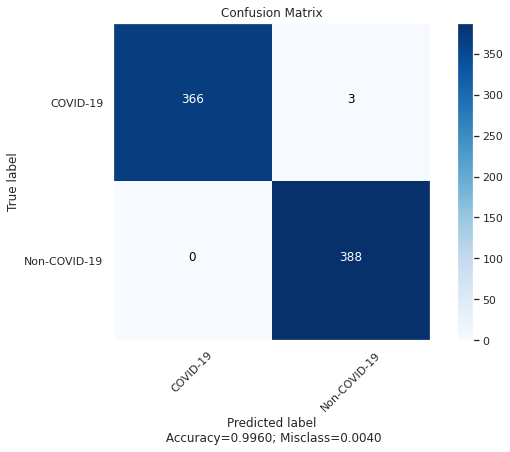

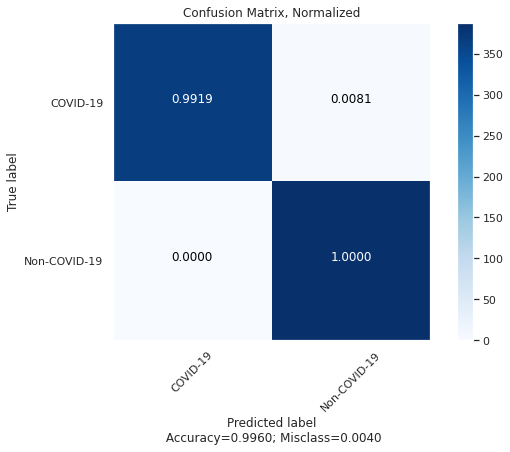

In [ ]:

import itertools
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    sns.set(style="dark")
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\n Accuracy={:0.4f}; Misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
plot_confusion_matrix(cm           = np.array(matrix), 
                      normalize    = False,
                      target_names = categories,
                      title        = "Confusion Matrix")

plot_confusion_matrix(cm           = np.array(matrix), 
                      normalize    = True,
                      target_names = categories,
                      title        = "Confusion Matrix, Normalized")

In [ ]:
FP = matrix.sum(axis=0) - np.diag(matrix)
FN = matrix.sum(axis=1) - np.diag(matrix)
TP = np.diag(matrix)
TN = matrix[:].sum() - (FP + FN + TP)

TPR = TP/(TP+FN)
TNR = TN/(TN+FP) 
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
FDR = FP/(TP+FP)

ACC = (TP+TN)/(TP+FP+FN+TN)

print('Other Metrics:')
MSE = mean_squared_error(target, predict_list)

print('MSE:', MSE)
print('Accuracy:', ACC)
print('Precision (positive predictive value):', PPV)
print('Recall (Sensitivity, hit rate, true positive rate):', TPR)
print('Specificity (true negative rate):', TNR)
print('Negative Predictive Value:', NPV)
print('Fall out (false positive rate):', FPR)
print('False Negative Rate:', FNR)
print('False discovery rate:', FDR)

Other Metrics:
MSE: 0.011889035667107
Accuracy: [0.98811096 0.98811096]
Precision (positive predictive value): [0.97619048 1.        ]
Recall (Sensitivity, hit rate, true positive rate): [1.         0.97680412]
Specificity (true negative rate): [0.97680412 1.        ]
Negative Predictive Value: [1.         0.97619048]
Fall out (false positive rate): [0.02319588 0.        ]
False Negative Rate: [0.         0.02319588]
False discovery rate: [0.02380952 0.        ]


In [ ]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
for idx in range(len(model.layers)):
  print(model.get_layer(index = idx).name)

input
conv2d
max_pooling2d
PEPX1.1FP
PEPX1.1Expansion
PEPX1.1DWConv3_3
PEPX1.1SP
PEPX1.1Extension
PEPX1_Conv
add
PEPX1.2FP
PEPX1.2Expansion
PEPX1.2DWConv3_3
PEPX1.2SP
PEPX1.2Extension
add_1
PEPX1.3FP
PEPX1.3Expansion
PEPX1.3DWConv3_3
PEPX1.3SP
PEPX1.3Extension
add_3
PEPX2.1FP
PEPX2.1Expansion
PEPX2.1DWConv3_3
PEPX2.1SP
add_2
PEPX2.1Extension
PEPX2_Conv
max_pooling2d_2
max_pooling2d_1
add_4
PEPX2.2FP
PEPX2.2Expansion
PEPX2.2DWConv3_3
PEPX2.2SP
PEPX2.2Extension
add_5
PEPX2.3FP
PEPX2.3Expansion
PEPX2.3DWConv3_3
PEPX2.3SP
PEPX2.3Extension
add_6
PEPX2.4FP
PEPX2.4Expansion
PEPX2.4DWConv3_3
PEPX2.4SP
PEPX2.4Extension
add_8
PEPX3.1FP
PEPX3.1Expansion
PEPX3.1DWConv3_3
PEPX3.1SP
PEPX3.1Extension
max_pooling2d_4
PEPX3.2FP
PEPX3.2Expansion
PEPX3.2DWConv3_3
PEPX3.2SP
PEPX3.2Extension
add_9
PEPX3.3FP
PEPX3.3Expansion
PEPX3.3DWConv3_3
PEPX3.3SP
PEPX3.3Extension
add_10
PEPX3.4FP
PEPX3.4Expansion
PEPX3.4DWConv3_3
PEPX3.4SP
PEPX3.4Extension
add_11
PEPX3.5FP
PEPX3.5Expansion
PEPX3.5DWConv3_3
PEPX3.5SP
PE

In [ ]:
# Load a sample image (or multiple ones)
img = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/covid_images/test/Covid_images/C003_032.jpg', target_size=(224, 224))
img = tf.keras.preprocessing.image.img_to_array(img)
img/=255.
model.layers[-1].activation = None


last_conv_layer='PEPX4.3' # target layer is last Conv layer of M1-covid
img=np.expand_dims(img,0)
# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img, model, 'PEPX4.3') 

# Display heatmap
plt.matshow(heatmap)
plt.show()

ValueError: ignored

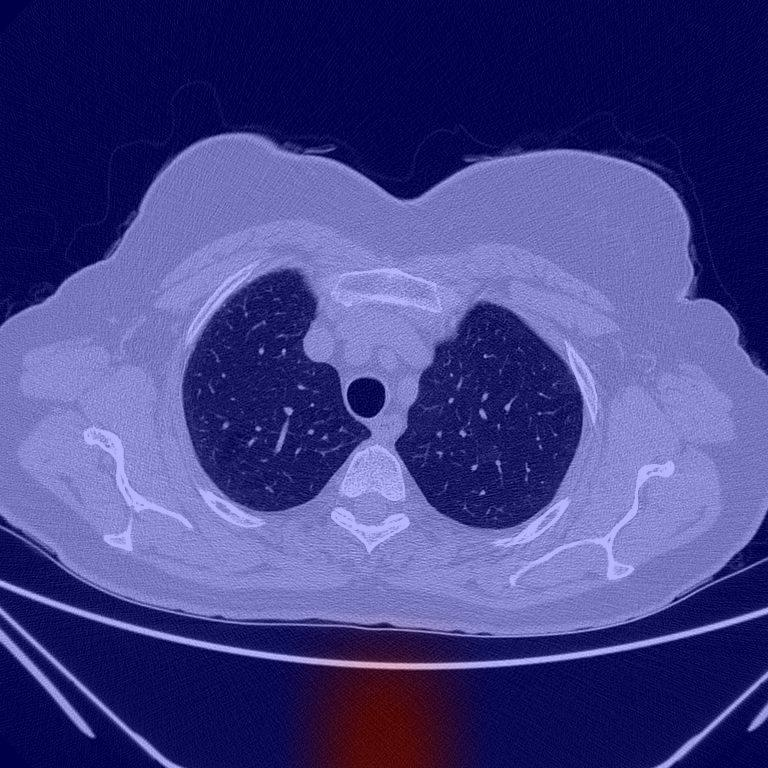

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam('/content/drive/MyDrive/covid_images/test/Covid_images/C003_032.jpg', heatmap)

In [ ]:
pip install tf-explain

     |████████████████████████████████| 43 kB 1.6 MB/s 


In [ ]:

# Load a sample image (or multiple ones)
img = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/covid_images_per_patient/train/covid/C001_025.jpg', target_size=(224, 224))
img = tf.keras.preprocessing.image.img_to_array(img)

data = ([img], None)

In [ ]:

from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity

# Start explainer
explainer = OcclusionSensitivity()
   

    

grid = explainer.explain(data, model,patch_size=4, class_index=1)  # 281 is the tabby cat index in ImageNet

explainer.save(grid, ".", "grad_cam.png")

In [ ]:

#Covid NET
import tensorflow.keras as keras
from tensorflow.keras.layers import Conv2D, Input, MaxPool2D, add, Flatten, Dense, DepthwiseConv2D


def PEPXModel(input_tensor, filters, name):
    x = Conv2D(filters=filters, kernel_size=(1, 1), activation='relu', name=name + 'FP')(input_tensor)
    x = Conv2D(filters=filters, kernel_size=(1, 1), activation='relu', name=name + 'Expansion')(x)
    x = DepthwiseConv2D(kernel_size=(3, 3), activation='relu', padding='same', name=name + 'DWConv3_3')(x)
    x = Conv2D(filters=filters, kernel_size=(1, 1), activation='relu', name=name + 'SP')(x)
    x = Conv2D(filters=filters, kernel_size=(1, 1), activation='relu', name=name + 'Extension')(x)
    return x


def keras_model_build(input_size=(224, 224, 3)):
   
    input = Input(shape=input_size, name='input')
    x = Conv2D(input_shape=input_size, filters=64, kernel_size=(7, 7), activation='relu', padding='same',
               strides=(2, 2))(input)
    x = MaxPool2D(pool_size=(2, 2))(x)
    # PEPX1_Conv1x1
    p_1_y = Conv2D(256, (1, 1), padding='same', activation='relu', name='PEPX1_Conv')(x)

    # Stage1
    y_1_1 = PEPXModel(x, 256, 'PEPX1.1')
    y_1_2 = PEPXModel(add([y_1_1, p_1_y]), 256, 'PEPX1.2')
    y_1_3 = PEPXModel(add([y_1_1, y_1_2, p_1_y]), 256, 'PEPX1.3')
    # PEPX2_Conv1x1
    p_2_y = Conv2D(512, (1, 1), padding='same', activation='relu', name='PEPX2_Conv')(add([p_1_y, y_1_1, y_1_2, y_1_3]))
    p_2_y = MaxPool2D(pool_size=(2, 2))(p_2_y)
    # Stage2结构
    y_2_1 = PEPXModel(add([y_1_3, y_1_2, y_1_1, p_1_y]), 512, 'PEPX2.1')
    y_2_1 = MaxPool2D(pool_size=(2, 2))(y_2_1)
    y_2_2 = PEPXModel(add([y_2_1, p_2_y]), 512, 'PEPX2.2')
    y_2_3 = PEPXModel(add([y_2_1, y_2_2, p_2_y]), 512, 'PEPX2.3')
    y_2_4 = PEPXModel(add([y_2_1, y_2_2, y_2_3, p_2_y]), 512, 'PEPX2.4')
    # PEPX3_Conv1x1
    p_3_y = Conv2D(1024, (1, 1), padding='same', activation='relu', name='PEPX3_Conv')(
        add([p_2_y, y_2_1, y_2_2, y_2_3, y_2_4])
    )
    p_3_y = MaxPool2D(pool_size=(2, 2))(p_3_y)
    # Stage3结构
    y_3_1 = PEPXModel(add([y_2_1, y_2_2, y_2_3, y_2_4, p_2_y]), 1024, 'PEPX3.1')
    y_3_1 = MaxPool2D(pool_size=(2, 2))(y_3_1)
    y_3_2 = PEPXModel(y_3_1, 1024, 'PEPX3.2')
    y_3_3 = PEPXModel(add([y_3_1, y_3_2]), 1024, 'PEPX3.3')
    y_3_4 = PEPXModel(add([y_3_1, y_3_2, y_3_3]), 1024, 'PEPX3.4')
    y_3_5 = PEPXModel(add([y_3_1, y_3_2, y_3_3, y_3_4]), 1024, 'PEPX3.5')
    y_3_6 = PEPXModel(add([y_3_1, y_3_2, y_3_3, y_3_4, y_3_5]), 1024, 'PEPX3.6')

    p_4_y = Conv2D(2048, (1, 1), padding='same', activation='relu', name='PEPX4_Conv1')(
        add([p_3_y, y_3_1, y_3_2, y_3_3, y_3_4, y_3_5, y_3_6])
    )
    p_4_y = MaxPool2D(pool_size=(2, 2))(p_4_y)
 
    y_4_1 = PEPXModel(add([y_3_1, y_3_2, y_3_3, y_3_4, y_3_5, y_3_6, p_3_y]), 2048, 'PEPX4.1')
    y_4_1 = MaxPool2D(pool_size=(2, 2))(y_4_1)
    y_4_2 = PEPXModel(add([y_4_1, p_4_y]), 2048, 'PEPX4.2')
    y_4_3 = PEPXModel(add([y_4_1, y_4_2, p_4_y]), 2048, 'PEPX4.3')

    fla = Flatten()(add([y_4_1, y_4_2, y_4_3, p_4_y]))
    d1 = Dense(1024, activation='relu')(fla)
    d2 = Dense(256, activation='relu')(d1)
    output = Dense(4, activation='softmax')(d2)

    return keras.models.Model(input, output)


if __name__ == '__main__':
    model = keras_model_build()
    model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_24 (Conv2D)             (None, 112, 112, 64  9472        ['input[0][0]']                  
                                )                                                                 
                                                                                                  
 max_pooling2d_32 (MaxPooling2D  (None, 56, 56, 64)  0           ['conv2d_24[0][0]']              
 )                                                                                          

In [ ]:
early_stop = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)
opt = tf.keras.optimizers.Adam(lr=0.0001)

model.compile(optimizer=opt,
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:

history = model.fit(
    train_generator, 
    steps_per_epoch = train_generator.n // 32,
    validation_data= validation_generator,
    validation_steps=validation_generator.n//32, 
    epochs = 10, 
    callbacks = [
        early_stop
    ]
)

Epoch 1/10
48/48 [==============================] - 191s 4s/step - loss: 0.8515 - accuracy: 0.5500 - val_loss: 0.9502 - val_accuracy: 0.4514
Epoch 2/10
48/48 [==============================] - 191s 4s/step - loss: 0.7639 - accuracy: 0.6194 - val_loss: 0.9407 - val_accuracy: 0.5035
Epoch 3/10
48/48 [==============================] - 190s 4s/step - loss: 0.6159 - accuracy: 0.7103 - val_loss: 1.1772 - val_accuracy: 0.5122
Epoch 4/10
48/48 [==============================] - 190s 4s/step - loss: 0.4525 - accuracy: 0.8018 - val_loss: 1.2939 - val_accuracy: 0.5347
Epoch 5/10
48/48 [==============================] - 189s 4s/step - loss: 0.3174 - accuracy: 0.8627 - val_loss: 1.4685 - val_accuracy: 0.5521


In [ ]:
model.save('/content/drive/MyDrive/COVIDNET-subclasses.h5')